In [ ]:
from sklearn.linear_model import LinearRegression
class PredictionCalibrator:
    def __init__(self):
        self.calibration_model = None

    def train_calibration_model(self, predicted, actual):
        """Train calibration model based on predicted vs. actual data."""
        model = LinearRegression()
        predicted = np.array(predicted).reshape(-1, 1)
        actual = np.array(actual).reshape(-1, 1)
        model.fit(predicted, actual)
        self.calibration_model = model

    def apply_calibration(self, predictions):
        """Apply the calibration model to adjust predictions."""
        if self.calibration_model is None:
            raise Exception("Calibration model has not been trained!")
        predictions = np.array(predictions).reshape(-1, 1)
        adjusted_predictions = self.calibration_model.predict(predictions)
        return adjusted_predictions.flatten()


61/61 [==============================] - 1s 19ms/step


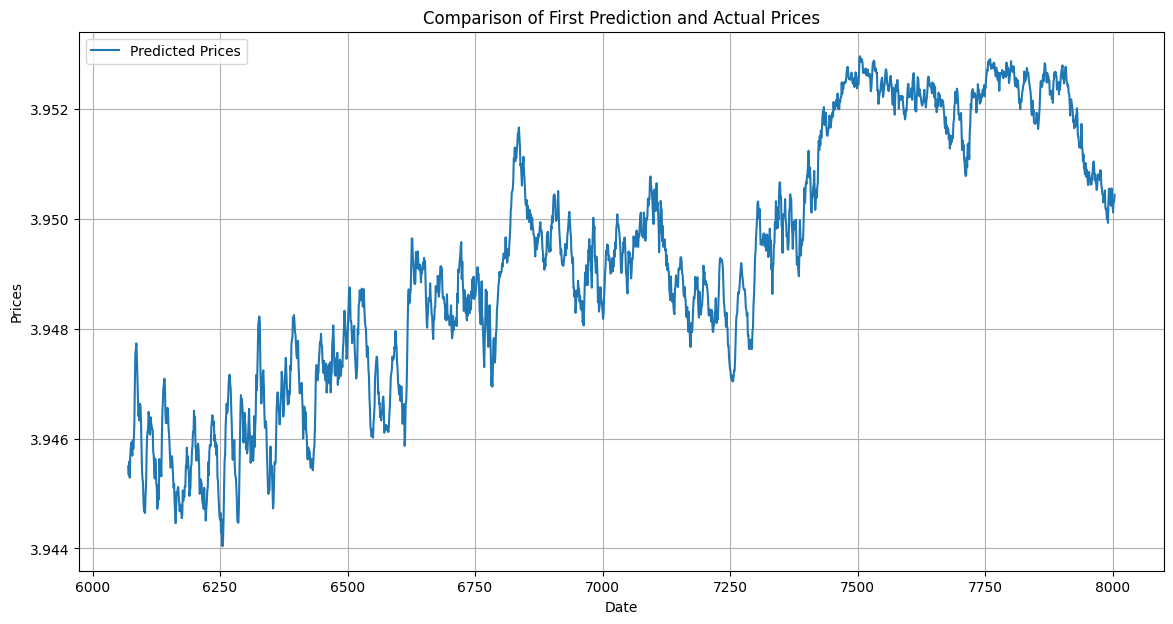

In [ ]:
# 假设test_predictions的形状为(samples, forecast_horizon)
# 这里我们只关注每个序列的第一个预测值和对应的实际值

predictions = model.predict(testX)
test_predictions = predictions['primary_output']  # 获取主输出


# 反标准化预测
test_predictions_first = scaler_y.inverse_transform(test_predictions[:, -1].reshape(-1, 1))
testY_actual_first = scaler_y.inverse_transform(testY[:, -1].reshape(-1, 1))

# 获取与testY相对应的日期，假设df是完整的DataFrame，包含日期索引
prediction_dates = df.index[-len(testY):].to_numpy()

# 确保日期和预测数据长度匹配
prediction_dates = prediction_dates[:len(test_predictions_first)]

# Instance of the calibrator
calibrator = PredictionCalibrator()
# Assuming test_predictions_first are the model's raw outputs
# and testY_actual_first are the corresponding true values
# calibrator.train_calibration_model(test_predictions_first, testY_actual_first)
# Apply calibration to adjust predictions
# adjusted_predictions = calibrator.apply_calibration(test_predictions_first)
# Print adjusted predictions to verify
# print(adjusted_predictions)

adjusted_predictions = test_predictions_first
# 绘图
plt.figure(figsize=(14, 7))
plt.plot(prediction_dates, adjusted_predictions, label='Predicted Prices')
# plt.plot(prediction_dates, testY_actual_first, label='Actual Prices', alpha=0.75)
plt.title('Comparison of First Prediction and Actual Prices')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from google.colab import auth
auth.authenticate_user()


In [ ]:
from google.cloud import storage
import shutil
import tensorflow as tf

# 设置 Google Cloud Storage 配置
# bucket_name = 'cloud-ai-platform-bbd19d83-0559-4c3d-a34d-b2b748ab1d8c'
bucket_name = '2f75d593-8e7b-4418-a5ba-cb2970f0b91e'  # 替换为你的存储桶名称
client = storage.Client()
bucket = client.bucket(bucket_name)

# 下载模型压缩包
blob = bucket.blob('models/saved_model.zip')  # GCS中模型的路径
local_zip_path = '/content/saved_model_archive.zip'
blob.download_to_filename(local_zip_path)

# 解压缩模型到指定目录
local_model_path = '/content/saved_model'
shutil.unpack_archive(local_zip_path, local_model_path, 'zip')


import tensorflow as tf
from keras.layers import TFSMLayer
# 加载 SavedModel
saved_model_path = '/content/saved_model'
# 使用 TFSMLayer 加载模型
model = TFSMLayer(saved_model_path, call_endpoint='serve')  # 或 'serving_default'

print("模型已成功加载为推理层！")


模型已成功加载为推理层！


In [ ]:
from google.cloud import storage
import shutil
import tensorflow as tf

# local_zip_path = '/content/saved_model_archive.zip'
# # 解压缩模型到指定目录
# local_model_path = '/content/saved_model'
# shutil.unpack_archive(local_zip_path, local_model_path, 'zip')


import tensorflow as tf
from keras.layers import TFSMLayer
# 加载 SavedModel
saved_model_path = '/content/saved_model'
# 使用 TFSMLayer 加载模型
model = TFSMLayer(saved_model_path, call_endpoint='serve')  # 或 'serving_default'

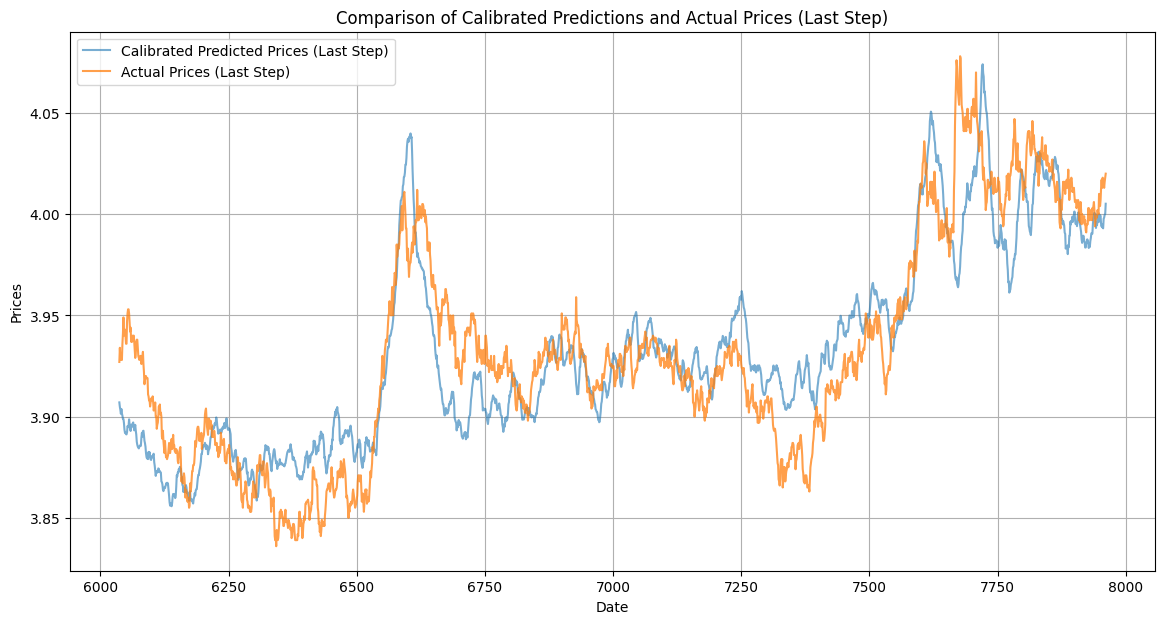

[6037 6038 6039 ... 7959 7960 7961]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# from tensorflow.keras.models import load_model

symbol = 'PENDLEUSDT'
# model_load_path = f"./models_price/{symbol}.h5"
model_load_path = f'/content/model.h5'
# loaded_model = load_model(model_load_path, custom_objects={'PositionalEncoding': PositionalEncoding})


# loaded_model = load_model(
#     model_load_path,
#     custom_objects={
#         'NBeatsBlock':NBeatsBlock,
#         # 'PositionalEncoding': PositionalEncoding,
#                 'ConditionalNormalization': ConditionalNormalization,
#         # 'BahdanauAttention': BahdanauAttention,
#         'total_loss': total_loss,
#         'mse_loss': mse_loss,
#         'ngram_loss': ngram_loss,
#         'ConditionalDropout':ConditionalDropout,
#         'combined_loss':combined_loss,
#         'frechet_loss':frechet_loss,
#         'cross_correlation_loss':cross_correlation_loss,
#         'dtw_loss':dtw_loss,
#         'n_gram_precision':n_gram_precision,
#         'get_ngrams':get_ngrams,
#         'mixed_loss':mixed_loss
#     }
# )


# loaded_model = load_model(
#     'my_model.keras',
#     custom_objects={
#         'ConditionalNormalization': ConditionalNormalization,
#         'NBeatsBlock': NBeatsBlock,
#         'combined_loss': combined_loss,
#         'frechet_loss': frechet_loss,
#         'mse_loss': mse_loss,
#         'cross_correlation_loss': cross_correlation_loss,
#         'dtw_loss': dtw_loss,
#         'ngram_loss': ngram_loss
#     },
#     safe_mode=False  # Allow deserialization of lambda layers
# )



# from tensorflow.keras.models import load_model

# loaded_model = load_model(model_load_path,custom_objects={
# 'ConditionalNormalization': ConditionalNormalization,'NBeatsBlock': NBeatsBlock,'combined_loss': combined_loss,'frechet_loss': frechet_loss,'mse_loss': mse_loss,'cross_correlation_loss':cross_correlation_loss,'dtw_loss':dtw_loss,'ngram_loss':ngram_loss
# }
# )


# # 获取模型的预测
testY = testY_primary
# scaler_y = scalers_list["spot"][0]['Close']
scaler_y = scalers_list[0]['Close']
# # predictions = model.predict(testX)
# # predictions = loaded_model.predict(testX)
# test_predictions = predictions['primary_output']  # 获取主输出

# dummy_input = testX  # 确保 testX 的形状与模型的输入形状匹配
# # 使用 TFSMLayer 直接进行推理
# output = loaded_model(dummy_input)  # 直接调用加载的 TFSMLayer
# # 提取主输出
# test_predictions = output['primary_output']  # 提取主输出


# 将输入拆分为更小的批次进行推理
batch_size = 32  # 根据显存限制设置较小的批次大小
outputs = []
for i in range(0, len(testX), batch_size):
    batch_input = testX[i:i + batch_size]
    # batch_output = loaded_model(batch_input)
    batch_output = model(batch_input)
    outputs.append(batch_output)
# 合并所有批次的输出
output = {
    key: tf.concat([o[key] for o in outputs], axis=0)
    for key in outputs[0]
}
# # 提取主输出
test_predictions = output['primary_output']


# 假设第一个货币是第一个通道
test_predictions_first_currency = test_predictions

# 只取最后一步的预测并进行反标准化
test_predictions_last_step = test_predictions_first_currency[:, -1]  # 取最后一步
test_predictions_last_step = test_predictions_last_step.numpy()
test_predictions_full = scaler_y.inverse_transform(test_predictions_last_step.reshape(-1, 1)).flatten()

# 只取第一个货币的实际值的最后一步并进行反标准化
testY_last_step = testY[:, -1, 0]  # 取最后一步的实际值（第一个货币）
testY_actual_first_currency = scaler_y.inverse_transform(testY_last_step.reshape(-1, 1)).flatten()

# # 校准步骤：使用简单的线性比例校准
# alpha = np.mean(testY_actual_first_currency) / np.mean(test_predictions_full)
# test_predictions_calibrated = test_predictions_full * alpha

# 校准步骤：使用线性回归进行后处理
regressor = LinearRegression()
regressor.fit(test_predictions_full.reshape(-1, 1), testY_actual_first_currency)
test_predictions_calibrated = regressor.predict(test_predictions_full.reshape(-1, 1))

# 假设 df 有与数据对齐的日期索引
prediction_dates = df.index[-len(testY):].to_numpy()

# 获取与最后一步预测值对应的日期
prediction_dates_last_step = prediction_dates[-len(test_predictions_full):]

# 绘制第一个货币的校准后预测和实际价格 (专注于最后一步)
plt.figure(figsize=(14, 7))
plt.plot(prediction_dates_last_step, test_predictions_calibrated, label='Calibrated Predicted Prices (Last Step)', alpha=0.6)
plt.plot(prediction_dates_last_step, testY_actual_first_currency, label='Actual Prices (Last Step)', alpha=0.75)
plt.title('Comparison of Calibrated Predictions and Actual Prices (Last Step)')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()

# 打印最后一步的预测日期
print(prediction_dates_last_step)

# 保存校准后的预测值和日期到 CSV 文件
adjusted_predictions_df = pd.DataFrame(test_predictions_calibrated, columns=['Calibrated Predictions'])
adjusted_predictions_df.to_csv('calibrated_predictions5m.csv', index=False)

prediction_times_df = pd.DataFrame(pd.to_datetime(prediction_dates_last_step), columns=['Prediction Time'])
prediction_times_df.to_csv('prediction_times5m.csv', index=False)


Shape before Reshape: (32, 8, 50, 970, 1)
Shape before Reshape: (32, 8, 50, 970, 1)
Shape before Reshape: (32, 8, 50, 970, 1)
Shape before Reshape: (32, 8, 50, 970, 1)
Shape before Reshape: (32, 8, 50, 970, 1)
Shape before Reshape: (32, 8, 50, 970, 1)
Shape before Reshape: (32, 8, 50, 970, 1)
Shape before Reshape: (32, 8, 50, 970, 1)
Shape before Reshape: (32, 8, 50, 970, 1)
Shape before Reshape: (32, 8, 50, 970, 1)
Shape before Reshape: (32, 8, 50, 970, 1)
Shape before Reshape: (32, 8, 50, 970, 1)
Shape before Reshape: (32, 8, 50, 970, 1)
Shape before Reshape: (32, 8, 50, 970, 1)
Shape before Reshape: (32, 8, 50, 970, 1)
Shape before Reshape: (32, 8, 50, 970, 1)
Shape before Reshape: (32, 8, 50, 970, 1)
Shape before Reshape: (32, 8, 50, 970, 1)
Shape before Reshape: (32, 8, 50, 970, 1)
Shape before Reshape: (32, 8, 50, 970, 1)
Shape before Reshape: (32, 8, 50, 970, 1)
Shape before Reshape: (32, 8, 50, 970, 1)
Shape before Reshape: (32, 8, 50, 970, 1)
Shape before Reshape: (32, 8, 50, 

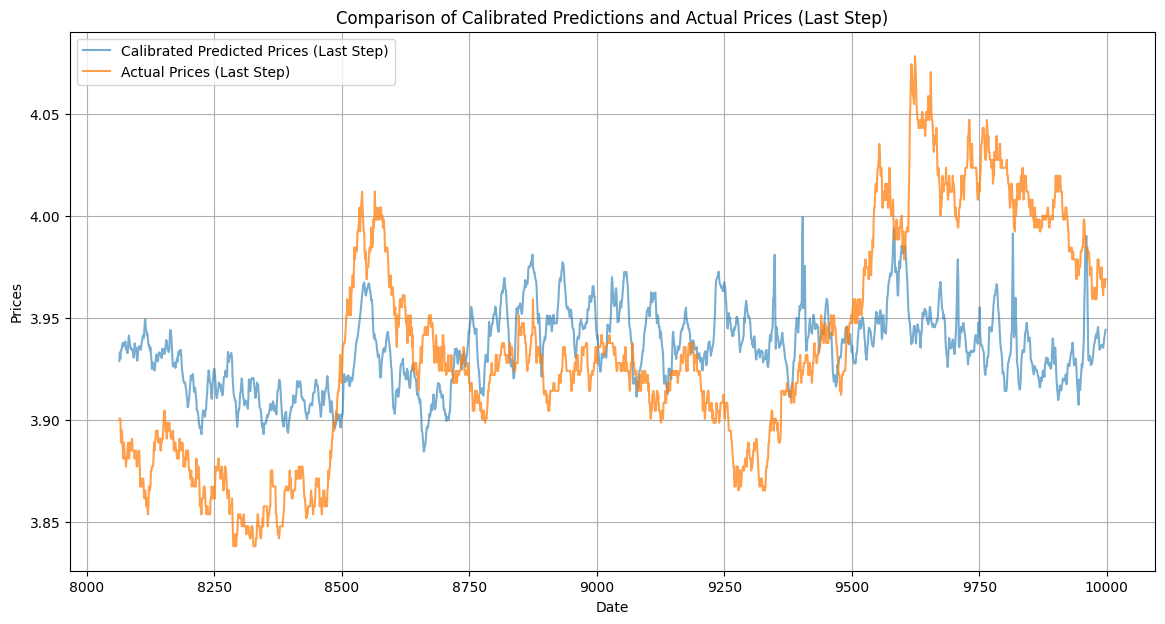

[8064 8065 8066 ... 9996 9997 9998]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# from tensorflow.keras.models import load_model

symbol = 'PENDLEUSDT'
# model_load_path = f"./models_price/{symbol}.h5"
model_load_path = f'/content/model.h5'
# loaded_model = load_model(model_load_path, custom_objects={'PositionalEncoding': PositionalEncoding})


# loaded_model = load_model(
#     model_load_path,
#     custom_objects={
#         'NBeatsBlock':NBeatsBlock,
#         # 'PositionalEncoding': PositionalEncoding,
#                 'ConditionalNormalization': ConditionalNormalization,
#         # 'BahdanauAttention': BahdanauAttention,
#         'total_loss': total_loss,
#         'mse_loss': mse_loss,
#         'ngram_loss': ngram_loss,
#         'ConditionalDropout':ConditionalDropout,
#         'combined_loss':combined_loss,
#         'frechet_loss':frechet_loss,
#         'cross_correlation_loss':cross_correlation_loss,
#         'dtw_loss':dtw_loss,
#         'n_gram_precision':n_gram_precision,
#         'get_ngrams':get_ngrams,
#         'mixed_loss':mixed_loss
#     }
# )


# loaded_model = load_model(
#     'my_model.keras',
#     custom_objects={
#         'ConditionalNormalization': ConditionalNormalization,
#         'NBeatsBlock': NBeatsBlock,
#         'combined_loss': combined_loss,
#         'frechet_loss': frechet_loss,
#         'mse_loss': mse_loss,
#         'cross_correlation_loss': cross_correlation_loss,
#         'dtw_loss': dtw_loss,
#         'ngram_loss': ngram_loss
#     },
#     safe_mode=False  # Allow deserialization of lambda layers
# )



# from tensorflow.keras.models import load_model

# loaded_model = load_model(model_load_path,custom_objects={
# 'ConditionalNormalization': ConditionalNormalization,'NBeatsBlock': NBeatsBlock,'combined_loss': combined_loss,'frechet_loss': frechet_loss,'mse_loss': mse_loss,'cross_correlation_loss':cross_correlation_loss,'dtw_loss':dtw_loss,'ngram_loss':ngram_loss
# }
# )


# # 获取模型的预测
testY = testY_primary
# scaler_y = scalers_list["spot"][0]['Close']
scaler_y = scalers_list[0]['Close']
# # predictions = model.predict(testX)
# # predictions = loaded_model.predict(testX)
# test_predictions = predictions['primary_output']  # 获取主输出

# dummy_input = testX  # 确保 testX 的形状与模型的输入形状匹配
# # 使用 TFSMLayer 直接进行推理
# output = loaded_model(dummy_input)  # 直接调用加载的 TFSMLayer
# # 提取主输出
# test_predictions = output['primary_output']  # 提取主输出


# 将输入拆分为更小的批次进行推理
batch_size = 32  # 根据显存限制设置较小的批次大小
outputs = []
for i in range(0, len(testX), batch_size):
    batch_input = testX[i:i + batch_size]
    # batch_output = loaded_model(batch_input)
    batch_output = model(batch_input)
    outputs.append(batch_output)
# 合并所有批次的输出
output = {
    key: tf.concat([o[key] for o in outputs], axis=0)
    for key in outputs[0]
}
# # 提取主输出
test_predictions = output['primary_output']


# 假设第一个货币是第一个通道
test_predictions_first_currency = test_predictions

# 只取最后一步的预测并进行反标准化
test_predictions_last_step = test_predictions_first_currency[:, -1]  # 取最后一步
test_predictions_last_step = test_predictions_last_step.numpy()
test_predictions_full = scaler_y.inverse_transform(test_predictions_last_step.reshape(-1, 1)).flatten()

# 只取第一个货币的实际值的最后一步并进行反标准化
testY_last_step = testY[:, -1, 0]  # 取最后一步的实际值（第一个货币）
testY_actual_first_currency = scaler_y.inverse_transform(testY_last_step.reshape(-1, 1)).flatten()

# # 校准步骤：使用简单的线性比例校准
# alpha = np.mean(testY_actual_first_currency) / np.mean(test_predictions_full)
# test_predictions_calibrated = test_predictions_full * alpha

# 校准步骤：使用线性回归进行后处理
regressor = LinearRegression()
regressor.fit(test_predictions_full.reshape(-1, 1), testY_actual_first_currency)
test_predictions_calibrated = regressor.predict(test_predictions_full.reshape(-1, 1))

# 假设 df 有与数据对齐的日期索引
prediction_dates = df.index[-len(testY):].to_numpy()

# 获取与最后一步预测值对应的日期
prediction_dates_last_step = prediction_dates[-len(test_predictions_full):]

# 绘制第一个货币的校准后预测和实际价格 (专注于最后一步)
plt.figure(figsize=(14, 7))
plt.plot(prediction_dates_last_step, test_predictions_calibrated, label='Calibrated Predicted Prices (Last Step)', alpha=0.6)
plt.plot(prediction_dates_last_step, testY_actual_first_currency, label='Actual Prices (Last Step)', alpha=0.75)
plt.title('Comparison of Calibrated Predictions and Actual Prices (Last Step)')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()

# 打印最后一步的预测日期
print(prediction_dates_last_step)

# 保存校准后的预测值和日期到 CSV 文件
adjusted_predictions_df = pd.DataFrame(test_predictions_calibrated, columns=['Calibrated Predictions'])
adjusted_predictions_df.to_csv('calibrated_predictions5m.csv', index=False)

prediction_times_df = pd.DataFrame(pd.to_datetime(prediction_dates_last_step), columns=['Prediction Time'])
prediction_times_df.to_csv('prediction_times5m.csv', index=False)


In [ ]:
print(scalers_list)

{'spot': [{'index': MinMaxScaler(feature_range=(-1, 1)), 'Open': MinMaxScaler(feature_range=(-1, 1)), 'High': MinMaxScaler(feature_range=(-1, 1)), 'Low': MinMaxScaler(feature_range=(-1, 1)), 'Close': MinMaxScaler(feature_range=(-1, 1)), 'Volume': MinMaxScaler(feature_range=(-1, 1)), 'Quote Asset Volume': MinMaxScaler(feature_range=(-1, 1)), 'Number of Trades': MinMaxScaler(feature_range=(-1, 1)), 'Taker Buy Base Asset Volume': MinMaxScaler(feature_range=(-1, 1)), 'Taker Buy Quote Asset Volume': MinMaxScaler(feature_range=(-1, 1)), 'KineticEnergy': MinMaxScaler(feature_range=(-1, 1)), 'Cumulative_Kinetic_Energy': MinMaxScaler(feature_range=(-1, 1)), 'Open Time': MinMaxScaler(feature_range=(-1, 1)), 'MA5': MinMaxScaler(feature_range=(-1, 1)), 'MA10': MinMaxScaler(feature_range=(-1, 1)), 'RSI': MinMaxScaler(feature_range=(-1, 1)), 'EMA12': MinMaxScaler(feature_range=(-1, 1)), 'EMA26': MinMaxScaler(feature_range=(-1, 1)), 'MACD': MinMaxScaler(feature_range=(-1, 1)), 'MACD_Signal': MinMaxSc

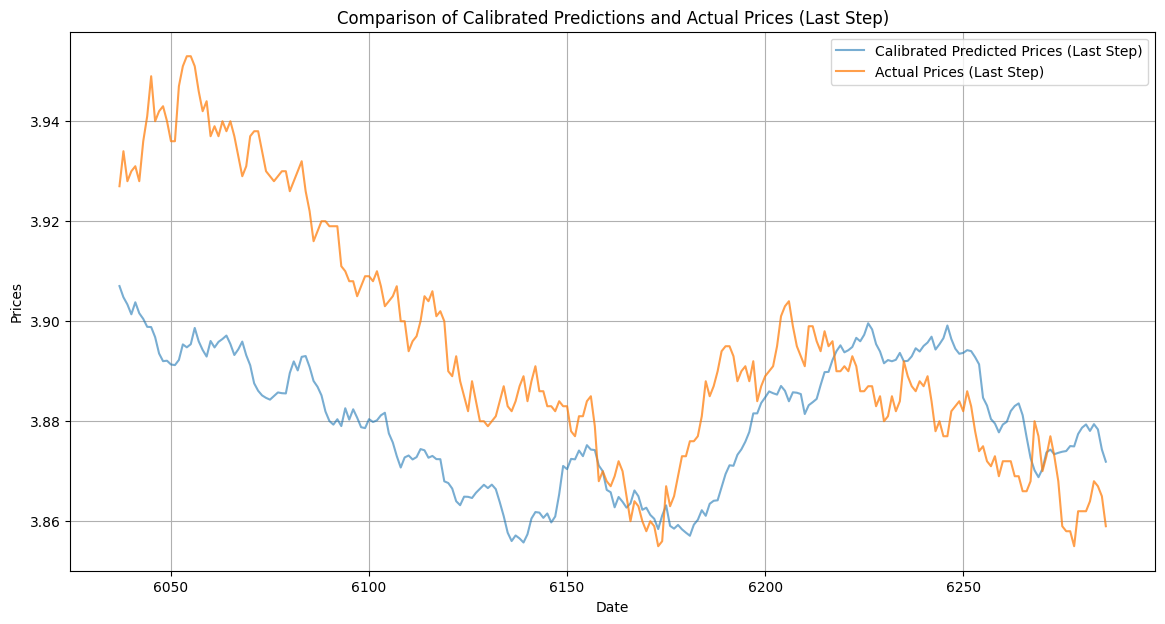

[6037 6038 6039 ... 7959 7960 7961]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 获取模型的预测
# predictions = model.predict(testX)
# test_predictions = predictions['primary_output']  # 获取主输出


# 假设第一个货币是第一个通道
test_predictions_first_currency = test_predictions

# 只取最后一步的预测并进行反标准化
test_predictions_last_step = test_predictions_first_currency[:, -1]  # 取最后一步
# test_predictions_full = scaler_y.inverse_transform(test_predictions_last_step.reshape(-1, 1)).flatten()

# 只取第一个货币的实际值的最后一步并进行反标准化
testY_last_step = testY[:, -1, 0]  # 取最后一步的实际值（第一个货币）
testY_actual_first_currency = scaler_y.inverse_transform(testY_last_step.reshape(-1, 1)).flatten()

# # 校准步骤：使用简单的线性比例校准
# alpha = np.mean(testY_actual_first_currency) / np.mean(test_predictions_full)
# test_predictions_calibrated = test_predictions_full * alpha

# 校准步骤：使用线性回归进行后处理
regressor = LinearRegression()
regressor.fit(test_predictions_full.reshape(-1, 1), testY_actual_first_currency)
test_predictions_calibrated = regressor.predict(test_predictions_full.reshape(-1, 1))

# 假设 df 有与数据对齐的日期索引
prediction_dates = df.index[-len(testY):].to_numpy()

# 获取与最后一步预测值对应的日期
prediction_dates_last_step = prediction_dates[-len(test_predictions_full):]

# 绘制第一个货币的校准后预测和实际价格 (专注于最后一步)
plt.figure(figsize=(14, 7))
plt.plot(prediction_dates_last_step[:250], test_predictions_calibrated[:250], label='Calibrated Predicted Prices (Last Step)', alpha=0.6)
plt.plot(prediction_dates_last_step[:250], testY_actual_first_currency[:250], label='Actual Prices (Last Step)', alpha=0.75)
plt.title('Comparison of Calibrated Predictions and Actual Prices (Last Step)')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()

# 打印最后一步的预测日期
print(prediction_dates_last_step)

# 保存校准后的预测值和日期到 CSV 文件
adjusted_predictions_df = pd.DataFrame(test_predictions_calibrated, columns=['Calibrated Predictions'])
adjusted_predictions_df.to_csv('calibrated_predictions5m.csv', index=False)

prediction_times_df = pd.DataFrame(pd.to_datetime(prediction_dates_last_step), columns=['Prediction Time'])
prediction_times_df.to_csv('prediction_times5m.csv', index=False)


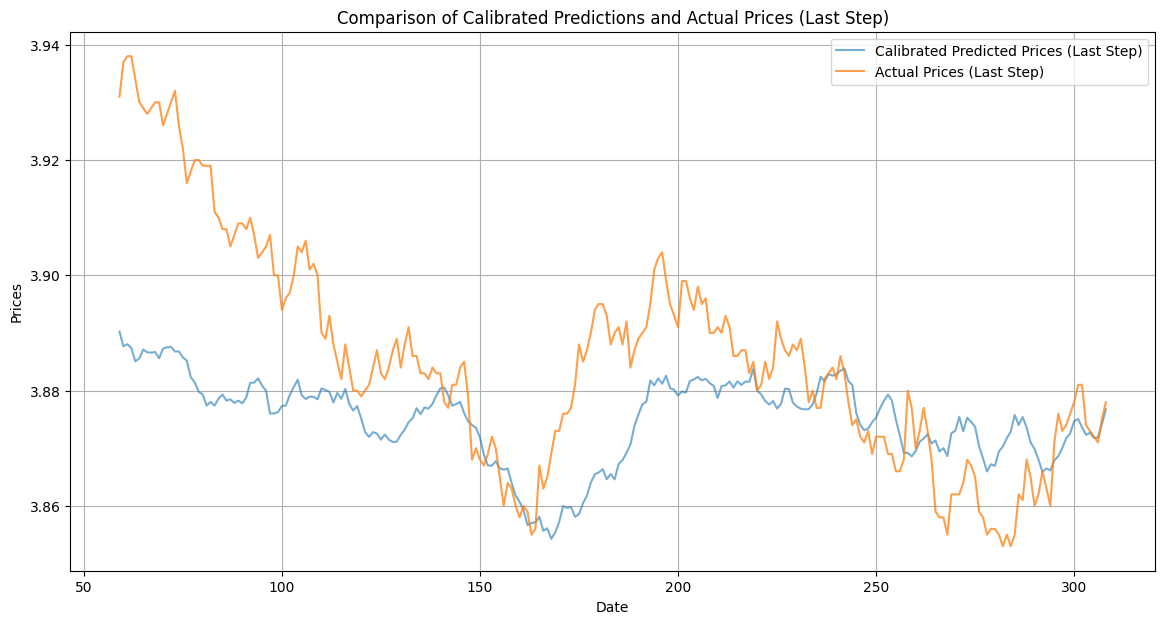

[  59   60   61 ... 1981 1982 1983]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 获取模型的预测
# predictions = model.predict(testX)
# test_predictions = predictions['primary_output']  # 获取主输出


# 假设第一个货币是第一个通道
test_predictions_first_currency = test_predictions

# 只取最后一步的预测并进行反标准化
test_predictions_last_step = test_predictions_first_currency[:, -1]  # 取最后一步
# test_predictions_full = scaler_y.inverse_transform(test_predictions_last_step.reshape(-1, 1)).flatten()

# 只取第一个货币的实际值的最后一步并进行反标准化
testY_last_step = testY[:, -1, 0]  # 取最后一步的实际值（第一个货币）
testY_actual_first_currency = scaler_y.inverse_transform(testY_last_step.reshape(-1, 1)).flatten()

# # 校准步骤：使用简单的线性比例校准
# alpha = np.mean(testY_actual_first_currency) / np.mean(test_predictions_full)
# test_predictions_calibrated = test_predictions_full * alpha

# 校准步骤：使用线性回归进行后处理
regressor = LinearRegression()
regressor.fit(test_predictions_full.reshape(-1, 1), testY_actual_first_currency)
test_predictions_calibrated = regressor.predict(test_predictions_full.reshape(-1, 1))

# 假设 df 有与数据对齐的日期索引
prediction_dates = df.index[-len(testY):].to_numpy()

# 获取与最后一步预测值对应的日期
prediction_dates_last_step = prediction_dates[-len(test_predictions_full):]

# 绘制第一个货币的校准后预测和实际价格 (专注于最后一步)
plt.figure(figsize=(14, 7))
plt.plot(prediction_dates_last_step[:250], test_predictions_calibrated[:250], label='Calibrated Predicted Prices (Last Step)', alpha=0.6)
plt.plot(prediction_dates_last_step[:250], testY_actual_first_currency[:250], label='Actual Prices (Last Step)', alpha=0.75)
plt.title('Comparison of Calibrated Predictions and Actual Prices (Last Step)')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()

# 打印最后一步的预测日期
print(prediction_dates_last_step)

# 保存校准后的预测值和日期到 CSV 文件
adjusted_predictions_df = pd.DataFrame(test_predictions_calibrated, columns=['Calibrated Predictions'])
adjusted_predictions_df.to_csv('calibrated_predictions5m.csv', index=False)

prediction_times_df = pd.DataFrame(pd.to_datetime(prediction_dates_last_step), columns=['Prediction Time'])
prediction_times_df.to_csv('prediction_times5m.csv', index=False)


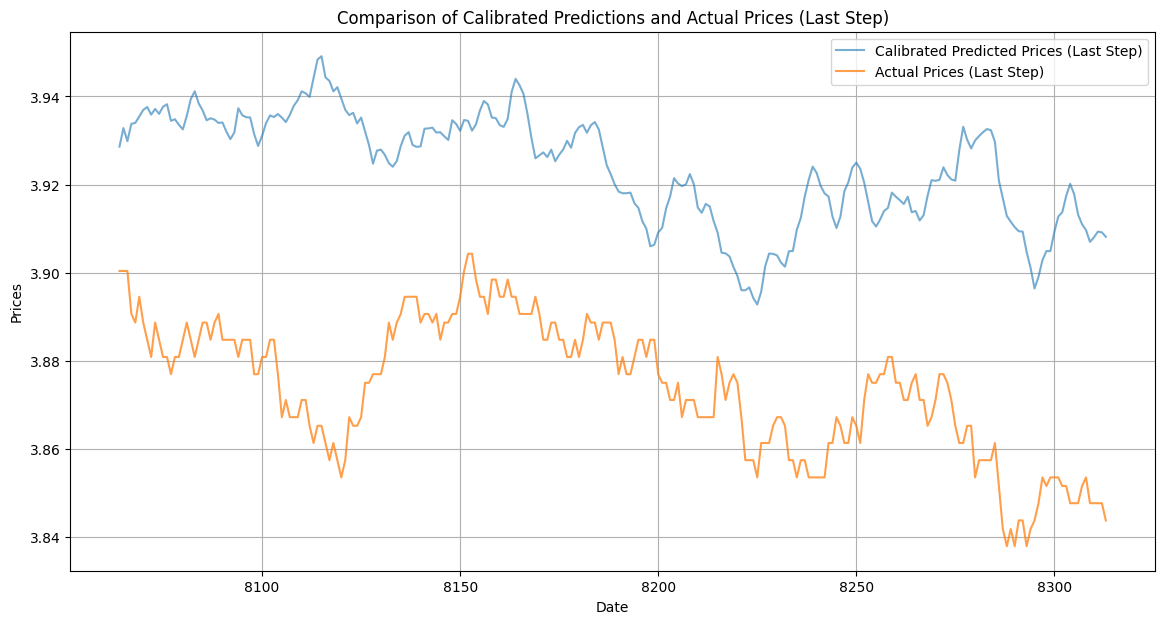

[8064 8065 8066 ... 9996 9997 9998]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 获取模型的预测
# predictions = model.predict(testX)
# test_predictions = predictions['primary_output']  # 获取主输出


# 假设第一个货币是第一个通道
test_predictions_first_currency = test_predictions

# 只取最后一步的预测并进行反标准化
test_predictions_last_step = test_predictions_first_currency[:, -1]  # 取最后一步
# test_predictions_full = scaler_y.inverse_transform(test_predictions_last_step.reshape(-1, 1)).flatten()

# 只取第一个货币的实际值的最后一步并进行反标准化
testY_last_step = testY[:, -1, 0]  # 取最后一步的实际值（第一个货币）
testY_actual_first_currency = scaler_y.inverse_transform(testY_last_step.reshape(-1, 1)).flatten()

# # 校准步骤：使用简单的线性比例校准
# alpha = np.mean(testY_actual_first_currency) / np.mean(test_predictions_full)
# test_predictions_calibrated = test_predictions_full * alpha

# 校准步骤：使用线性回归进行后处理
regressor = LinearRegression()
regressor.fit(test_predictions_full.reshape(-1, 1), testY_actual_first_currency)
test_predictions_calibrated = regressor.predict(test_predictions_full.reshape(-1, 1))

# 假设 df 有与数据对齐的日期索引
prediction_dates = df.index[-len(testY):].to_numpy()

# 获取与最后一步预测值对应的日期
prediction_dates_last_step = prediction_dates[-len(test_predictions_full):]

# 绘制第一个货币的校准后预测和实际价格 (专注于最后一步)
plt.figure(figsize=(14, 7))
plt.plot(prediction_dates_last_step[:250], test_predictions_calibrated[:250], label='Calibrated Predicted Prices (Last Step)', alpha=0.6)
plt.plot(prediction_dates_last_step[:250], testY_actual_first_currency[:250], label='Actual Prices (Last Step)', alpha=0.75)
plt.title('Comparison of Calibrated Predictions and Actual Prices (Last Step)')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()

# 打印最后一步的预测日期
print(prediction_dates_last_step)

# 保存校准后的预测值和日期到 CSV 文件
adjusted_predictions_df = pd.DataFrame(test_predictions_calibrated, columns=['Calibrated Predictions'])
adjusted_predictions_df.to_csv('calibrated_predictions5m.csv', index=False)

prediction_times_df = pd.DataFrame(pd.to_datetime(prediction_dates_last_step), columns=['Prediction Time'])
prediction_times_df.to_csv('prediction_times5m.csv', index=False)


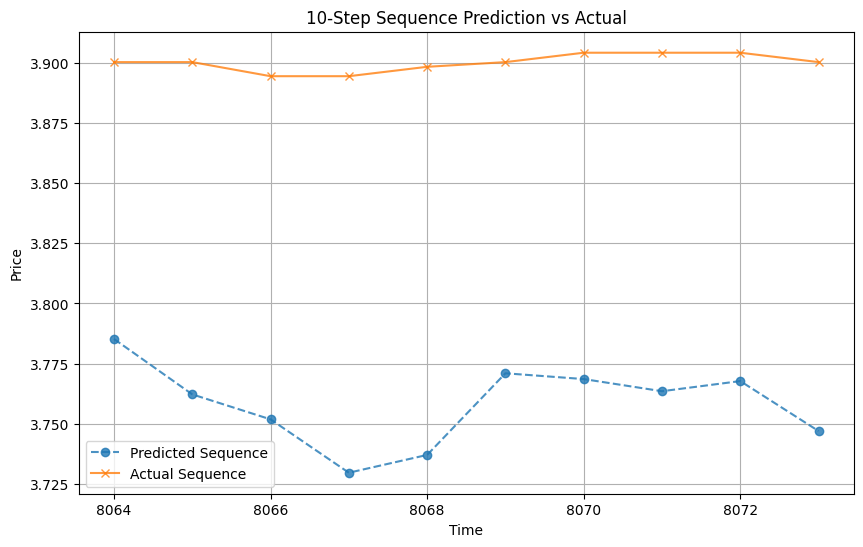

ValueError: x and y must have same first dimension, but have shapes (9,) and (10,)

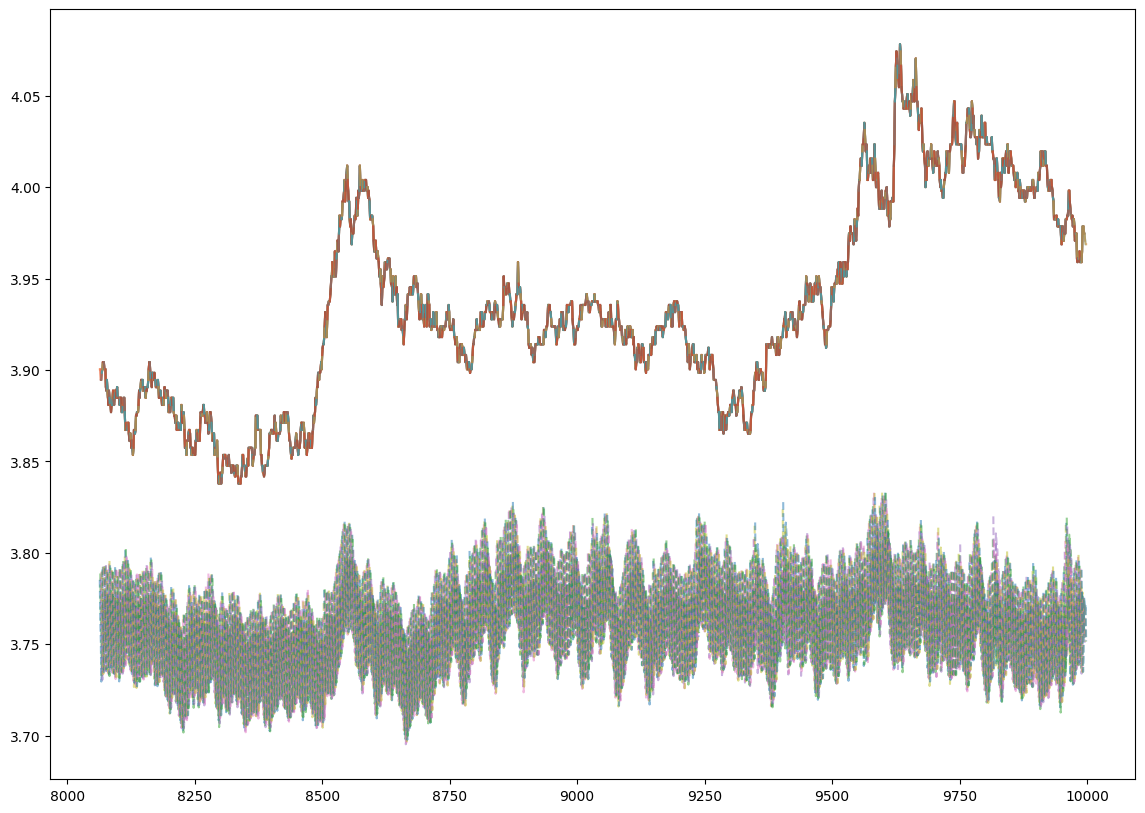

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 获取预测值（多步）
test_predictions_full = test_predictions  # 假设 test_predictions 的形状为 (样本数, 预测步长, 1)
test_predictions_full = test_predictions_full.numpy()  # 如果是 Tensor 转为 NumPy

# 获取实际值（多步）
testY_actual_full = testY  # 假设 testY 的形状为 (样本数, 预测步长, 1)

# 反标准化预测值和实际值
test_predictions_full = scaler_y.inverse_transform(
    test_predictions_full.reshape(-1, 1)
).reshape(test_predictions_full.shape)
testY_actual_full = scaler_y.inverse_transform(
    testY_actual_full.reshape(-1, 1)
).reshape(testY_actual_full.shape)

# 选择要对比的样本序号（可以调整，取一个序列做可视化）
sample_index = 0  # 第一个样本
predicted_sequence = test_predictions_full[sample_index, :, 0]  # 取第一个序列
actual_sequence = testY_actual_full[sample_index, :, 0]  # 对应的真实序列

# 获取预测时间范围
prediction_dates = df.index[-len(testY):]  # 假设 df.index 是时间索引
sequence_dates = prediction_dates[: len(predicted_sequence)]  # 对应的10步时间

# 绘制多步序列对比图
plt.figure(figsize=(10, 6))
plt.plot(sequence_dates, predicted_sequence, label="Predicted Sequence", marker="o", linestyle="--", alpha=0.8)
plt.plot(sequence_dates, actual_sequence, label="Actual Sequence", marker="x", alpha=0.8)
plt.title("10-Step Sequence Prediction vs Actual")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

# 绘制所有样本的预测序列和真实序列在一个图中
plt.figure(figsize=(14, 10))

# 遍历所有样本
for sample_index in range(len(test_predictions_full)):
    predicted_sequence = test_predictions_full[sample_index, :, 0]
    actual_sequence = testY_actual_full[sample_index, :, 0]
    # 确保日期长度与预测序列长度一致
    sequence_dates = prediction_dates[sample_index: sample_index + len(predicted_sequence)]

    # 绘制预测序列
    plt.plot(sequence_dates, predicted_sequence, label=f"Predicted - Sample {sample_index}", linestyle="--", alpha=0.5)
    # 绘制真实序列
    plt.plot(sequence_dates, actual_sequence, label=f"Actual - Sample {sample_index}", alpha=0.5)

# 添加标题和标签
plt.title("All Samples - 10-Step Sequence Prediction vs Actual")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize="small")  # 调整图例位置和大小
plt.grid()

# 调整图例显示和布局
plt.tight_layout()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (9,) and (10,)

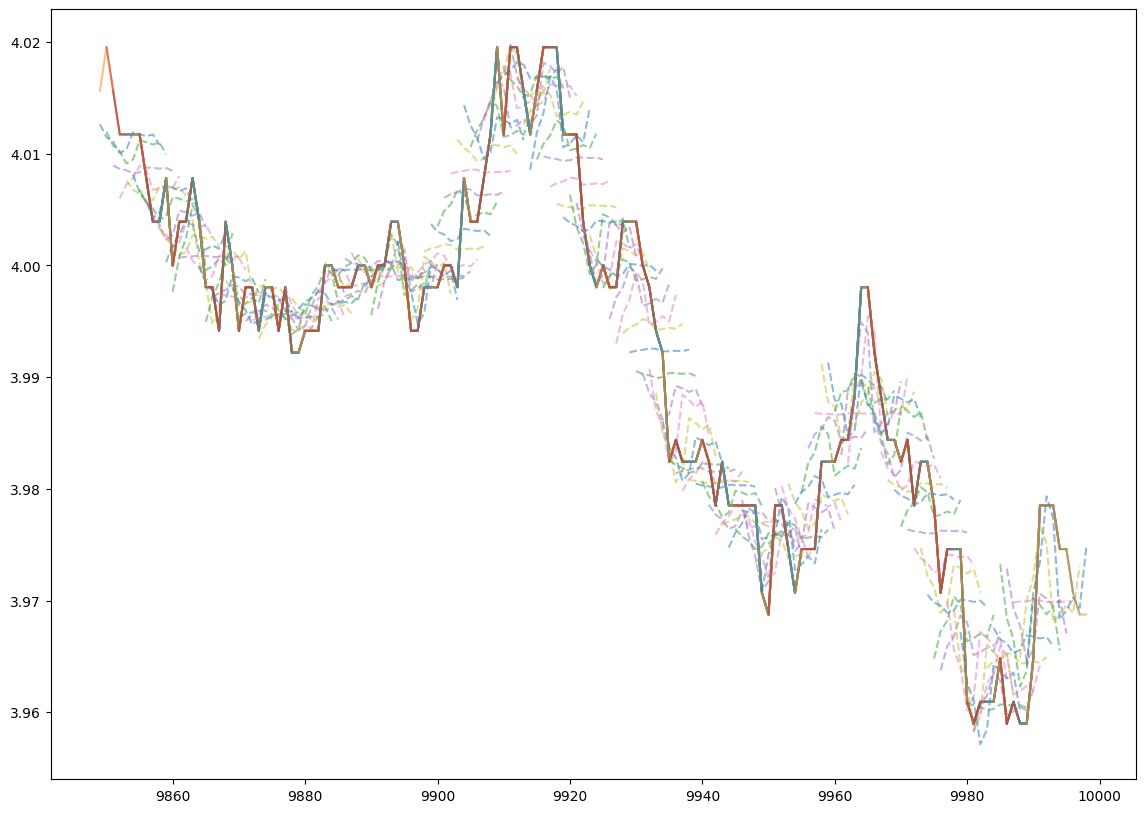

In [ ]:
plt.figure(figsize=(14, 10))

# 遍历最后 150 个样本
num_samples_to_plot = 150
start_index = max(0, len(test_predictions_full) - num_samples_to_plot)

for sample_index in range(start_index, len(test_predictions_full)):
    predicted_sequence = test_predictions_full[sample_index, :, 0]
    actual_sequence = testY_actual_full[sample_index, :, 0]
    sequence_dates = prediction_dates[sample_index: sample_index + len(predicted_sequence)]

    # 使用线性回归校准每个样本
    regressor = LinearRegression()
    regressor.fit(predicted_sequence.reshape(-1, 1), actual_sequence)
    calibrated_sequence = regressor.predict(predicted_sequence.reshape(-1, 1))

    # 绘制校准后的预测序列
    plt.plot(sequence_dates, calibrated_sequence, label=f"Calibrated Predicted - Sample {sample_index}", linestyle="--", alpha=0.5)
    # 绘制真实序列
    plt.plot(sequence_dates, actual_sequence, label=f"Actual - Sample {sample_index}", alpha=0.5)

# 添加标题和标签
plt.title("Last 150 Samples - Per Sample Calibrated 10-Step Sequence Prediction vs Actual")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize="small")  # 调整图例位置和大小
plt.grid()

# 调整图例显示和布局
plt.tight_layout()
plt.show()


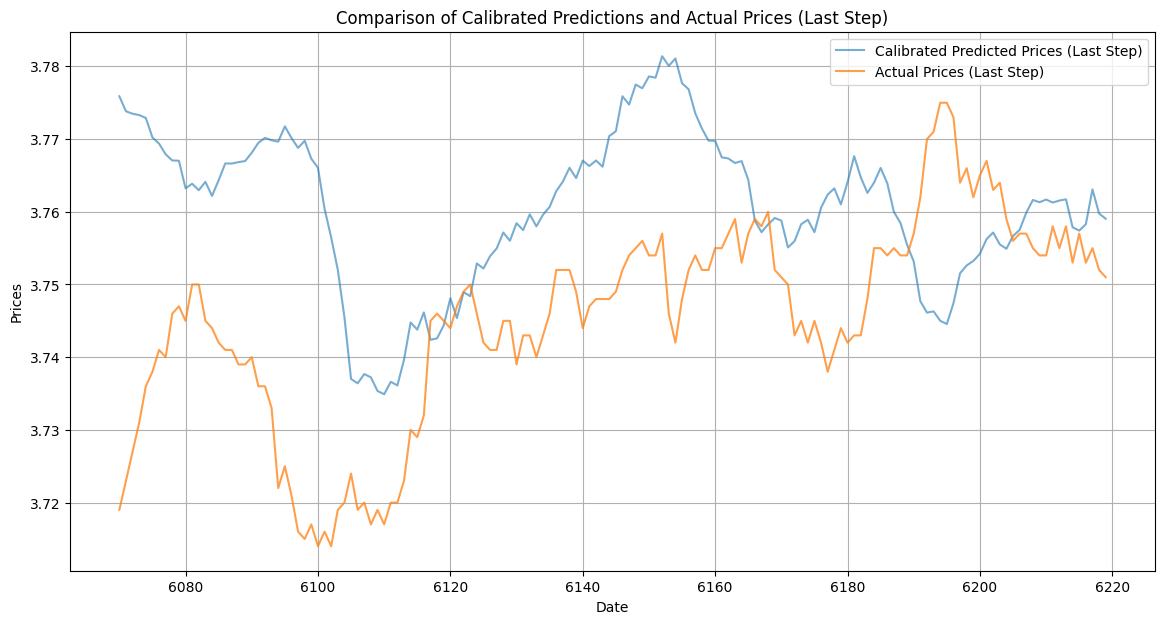

[6070 6071 6072 ... 8002 8003 8004]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 获取模型的预测
# predictions = model.predict(testX)
# test_predictions = predictions['primary_output']  # 获取主输出


# 假设第一个货币是第一个通道
test_predictions_first_currency = test_predictions

# 只取最后一步的预测并进行反标准化
test_predictions_last_step = test_predictions_first_currency[:, -1]  # 取最后一步
# test_predictions_full = scaler_y.inverse_transform(test_predictions_last_step.reshape(-1, 1)).flatten()

# 只取第一个货币的实际值的最后一步并进行反标准化
testY_last_step = testY[:, -1, 0]  # 取最后一步的实际值（第一个货币）
testY_actual_first_currency = scaler_y.inverse_transform(testY_last_step.reshape(-1, 1)).flatten()

# # 校准步骤：使用简单的线性比例校准
# alpha = np.mean(testY_actual_first_currency) / np.mean(test_predictions_full)
# test_predictions_calibrated = test_predictions_full * alpha

# 校准步骤：使用线性回归进行后处理
regressor = LinearRegression()
regressor.fit(test_predictions_full.reshape(-1, 1), testY_actual_first_currency)
test_predictions_calibrated = regressor.predict(test_predictions_full.reshape(-1, 1))

# 假设 df 有与数据对齐的日期索引
prediction_dates = df.index[-len(testY):].to_numpy()

# 获取与最后一步预测值对应的日期
prediction_dates_last_step = prediction_dates[-len(test_predictions_full):]

# 绘制第一个货币的校准后预测和实际价格 (专注于最后一步)
plt.figure(figsize=(14, 7))
plt.plot(prediction_dates_last_step[:150], test_predictions_calibrated[:150], label='Calibrated Predicted Prices (Last Step)', alpha=0.6)
plt.plot(prediction_dates_last_step[:150], testY_actual_first_currency[:150], label='Actual Prices (Last Step)', alpha=0.75)
plt.title('Comparison of Calibrated Predictions and Actual Prices (Last Step)')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()

# 打印最后一步的预测日期
print(prediction_dates_last_step)

# 保存校准后的预测值和日期到 CSV 文件
adjusted_predictions_df = pd.DataFrame(test_predictions_calibrated, columns=['Calibrated Predictions'])
adjusted_predictions_df.to_csv('calibrated_predictions5m.csv', index=False)

prediction_times_df = pd.DataFrame(pd.to_datetime(prediction_dates_last_step), columns=['Prediction Time'])
prediction_times_df.to_csv('prediction_times5m.csv', index=False)


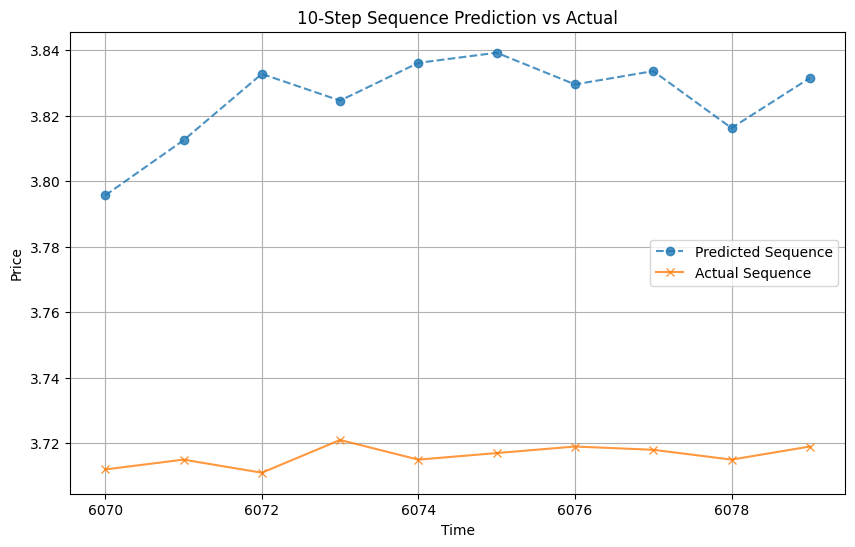

ValueError: x and y must have same first dimension, but have shapes (9,) and (10,)

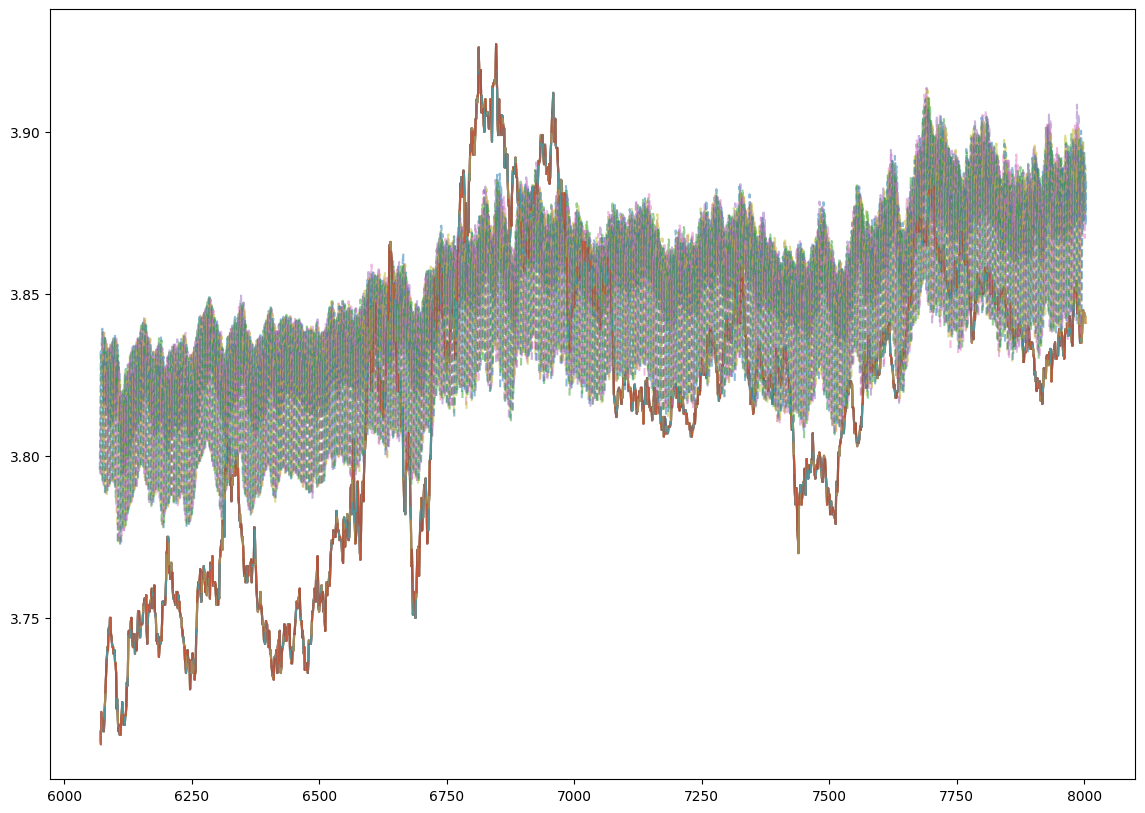

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 获取预测值（多步）
test_predictions_full = test_predictions  # 假设 test_predictions 的形状为 (样本数, 预测步长, 1)
test_predictions_full = test_predictions_full.numpy()  # 如果是 Tensor 转为 NumPy

# 获取实际值（多步）
testY_actual_full = testY  # 假设 testY 的形状为 (样本数, 预测步长, 1)

# 反标准化预测值和实际值
test_predictions_full = scaler_y.inverse_transform(
    test_predictions_full.reshape(-1, 1)
).reshape(test_predictions_full.shape)
testY_actual_full = scaler_y.inverse_transform(
    testY_actual_full.reshape(-1, 1)
).reshape(testY_actual_full.shape)

# 选择要对比的样本序号（可以调整，取一个序列做可视化）
sample_index = 0  # 第一个样本
predicted_sequence = test_predictions_full[sample_index, :, 0]  # 取第一个序列
actual_sequence = testY_actual_full[sample_index, :, 0]  # 对应的真实序列

# 获取预测时间范围
prediction_dates = df.index[-len(testY):]  # 假设 df.index 是时间索引
sequence_dates = prediction_dates[: len(predicted_sequence)]  # 对应的10步时间

# 绘制多步序列对比图
plt.figure(figsize=(10, 6))
plt.plot(sequence_dates, predicted_sequence, label="Predicted Sequence", marker="o", linestyle="--", alpha=0.8)
plt.plot(sequence_dates, actual_sequence, label="Actual Sequence", marker="x", alpha=0.8)
plt.title("10-Step Sequence Prediction vs Actual")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

# 绘制所有样本的预测序列和真实序列在一个图中
plt.figure(figsize=(14, 10))

# 遍历所有样本
for sample_index in range(len(test_predictions_full)):
    predicted_sequence = test_predictions_full[sample_index, :, 0]
    actual_sequence = testY_actual_full[sample_index, :, 0]
    # 确保日期长度与预测序列长度一致
    sequence_dates = prediction_dates[sample_index: sample_index + len(predicted_sequence)]

    # 绘制预测序列
    plt.plot(sequence_dates, predicted_sequence, label=f"Predicted - Sample {sample_index}", linestyle="--", alpha=0.5)
    # 绘制真实序列
    plt.plot(sequence_dates, actual_sequence, label=f"Actual - Sample {sample_index}", alpha=0.5)

# 添加标题和标签
plt.title("All Samples - 10-Step Sequence Prediction vs Actual")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize="small")  # 调整图例位置和大小
plt.grid()

# 调整图例显示和布局
plt.tight_layout()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (9,) and (10,)

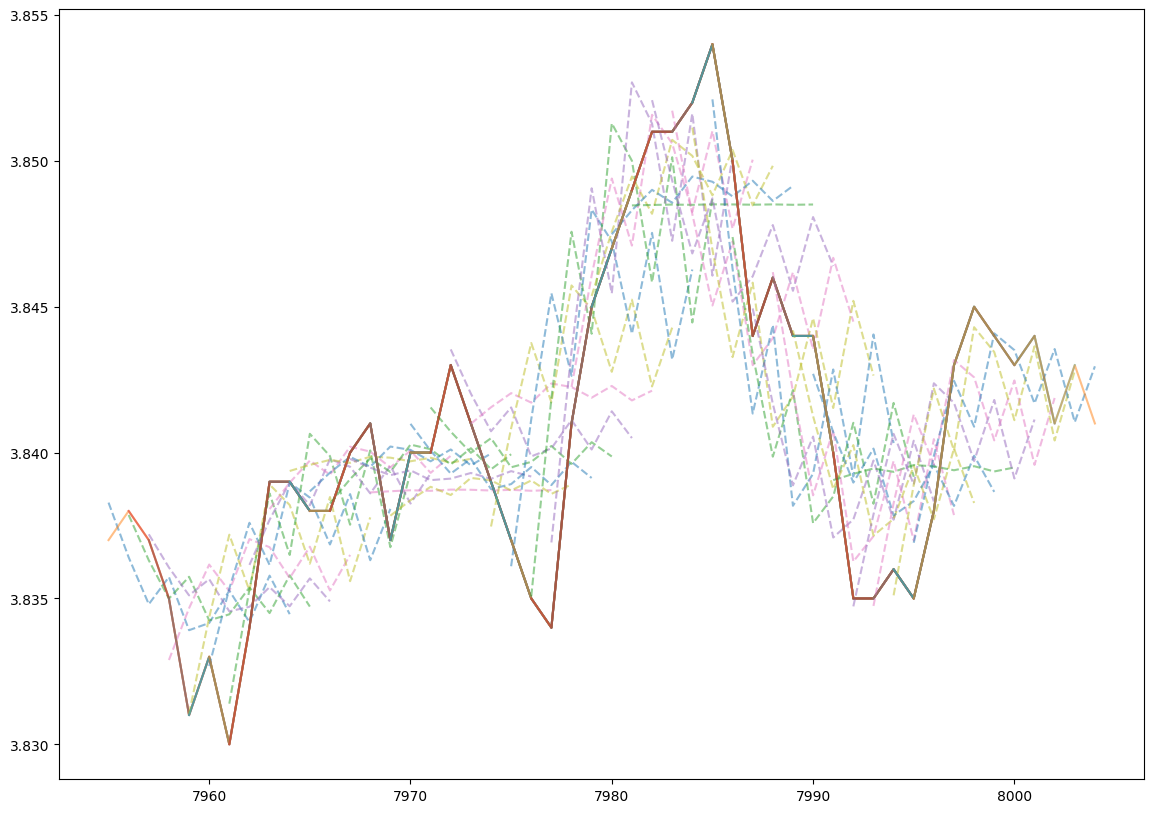

In [ ]:
plt.figure(figsize=(14, 10))

# 遍历最后 150 个样本
num_samples_to_plot = 50
start_index = max(0, len(test_predictions_full) - num_samples_to_plot)

for sample_index in range(start_index, len(test_predictions_full)):
    predicted_sequence = test_predictions_full[sample_index, :, 0]
    actual_sequence = testY_actual_full[sample_index, :, 0]
    sequence_dates = prediction_dates[sample_index: sample_index + len(predicted_sequence)]

    # 使用线性回归校准每个样本
    regressor = LinearRegression()
    regressor.fit(predicted_sequence.reshape(-1, 1), actual_sequence)
    calibrated_sequence = regressor.predict(predicted_sequence.reshape(-1, 1))

    # 绘制校准后的预测序列
    plt.plot(sequence_dates, calibrated_sequence, label=f"Calibrated Predicted - Sample {sample_index}", linestyle="--", alpha=0.5)
    # 绘制真实序列
    plt.plot(sequence_dates, actual_sequence, label=f"Actual - Sample {sample_index}", alpha=0.5)

# 添加标题和标签
plt.title("Last 150 Samples - Per Sample Calibrated 10-Step Sequence Prediction vs Actual")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize="small")  # 调整图例位置和大小
plt.grid()

# 调整图例显示和布局
plt.tight_layout()
plt.show()


In [ ]:
print(f"prediction_dates_last_step length: {len(prediction_dates_last_step)}")
print(f"test_predictions_full length: {len(test_predictions_full)}")
print(f"testY_actual_first_currency length: {len(testY_actual_first_currency)}")


prediction_dates_last_step length: 1924
test_predictions_full length: 3848
testY_actual_first_currency length: 1924


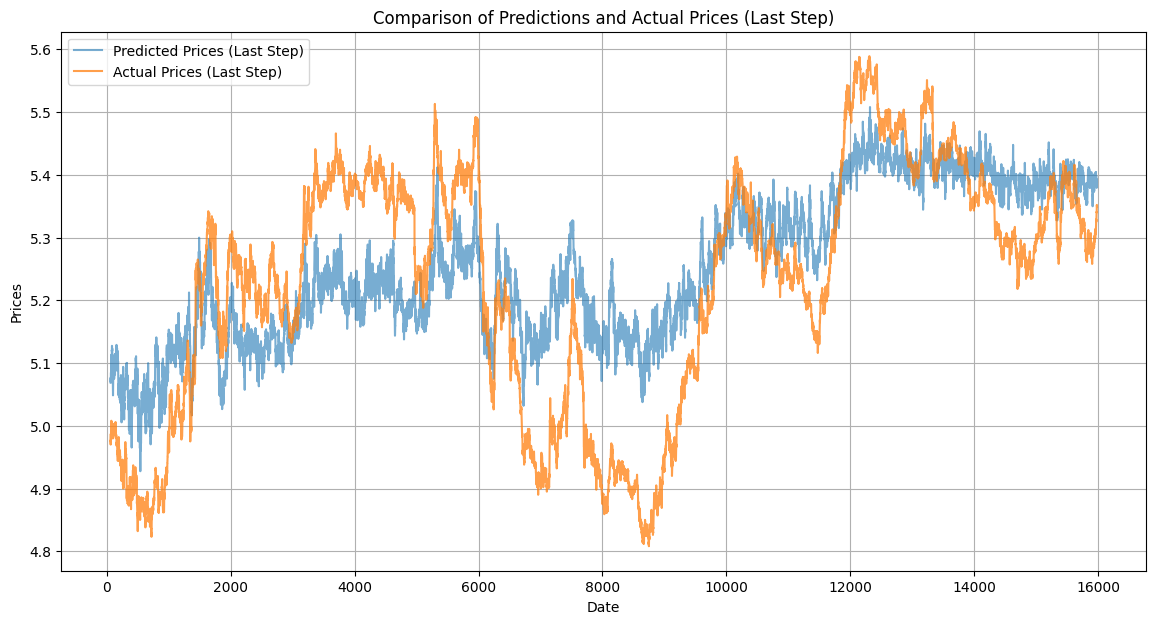

[   59    60    61 ... 15981 15982 15983]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import load_model

testY = testY_primary
scaler_y = scalers_list[0]['Close']
# # 获取模型的预测
# predictions = model.predict(testX)
# test_predictions = predictions['primary_output']  # 获取主输出

# 将输入拆分为更小的批次进行推理
batch_size = 256  # 根据显存限制设置较小的批次大小
outputs = []
for i in range(0, len(testX), batch_size):
    batch_input = testX[i:i + batch_size]
    # batch_output = loaded_model(batch_input)
    batch_output = model(batch_input)
    outputs.append(batch_output)
# 合并所有批次的输出
output = {
    key: tf.concat([o[key] for o in outputs], axis=0)
    for key in outputs[0]
}
# # 提取主输出
test_predictions = output['primary_output']

# 获取第一个货币的预测
test_predictions_first_currency = test_predictions  # 假设第一个货币是第一个通道

# 只取最后一步的预测并进行反标准化
test_predictions_last_step = test_predictions_first_currency[:, -1]  # 取最后一步
test_predictions_last_step = test_predictions_last_step.numpy()
test_predictions_full = scaler_y.inverse_transform(test_predictions_last_step.reshape(-1, 1)).flatten()

# 只取第一个货币的实际值的最后一步并进行反标准化
testY_last_step = testY[:, -1, 0]  # 取最后一步的实际值（第一个货币）
testY_actual_first_currency = scaler_y.inverse_transform(testY_last_step.reshape(-1, 1)).flatten()

# 假设 df 有与数据对齐的日期索引
prediction_dates = df.index[-len(testY):].to_numpy()

# 获取与最后一步预测值对应的日期
prediction_dates_last_step = prediction_dates[-len(test_predictions_full):]

# 绘制第一个货币的预测和实际价格 (专注于最后一步)
plt.figure(figsize=(14, 7))
plt.plot(prediction_dates_last_step, test_predictions_full, label='Predicted Prices (Last Step)', alpha=0.6)
plt.plot(prediction_dates_last_step, testY_actual_first_currency, label='Actual Prices (Last Step)', alpha=0.75)
plt.title('Comparison of Predictions and Actual Prices (Last Step)')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()

# 打印最后一步的预测日期
print(prediction_dates_last_step)

# 保存预测值和日期到 CSV 文件
adjusted_predictions_df = pd.DataFrame(test_predictions_full, columns=['Adjusted Predictions'])
adjusted_predictions_df.to_csv('predictions5m.csv', index=False)

prediction_times_df = pd.DataFrame(pd.to_datetime(prediction_dates_last_step), columns=['Prediction Time'])
prediction_times_df.to_csv('prediction_times5m.csv', index=False)


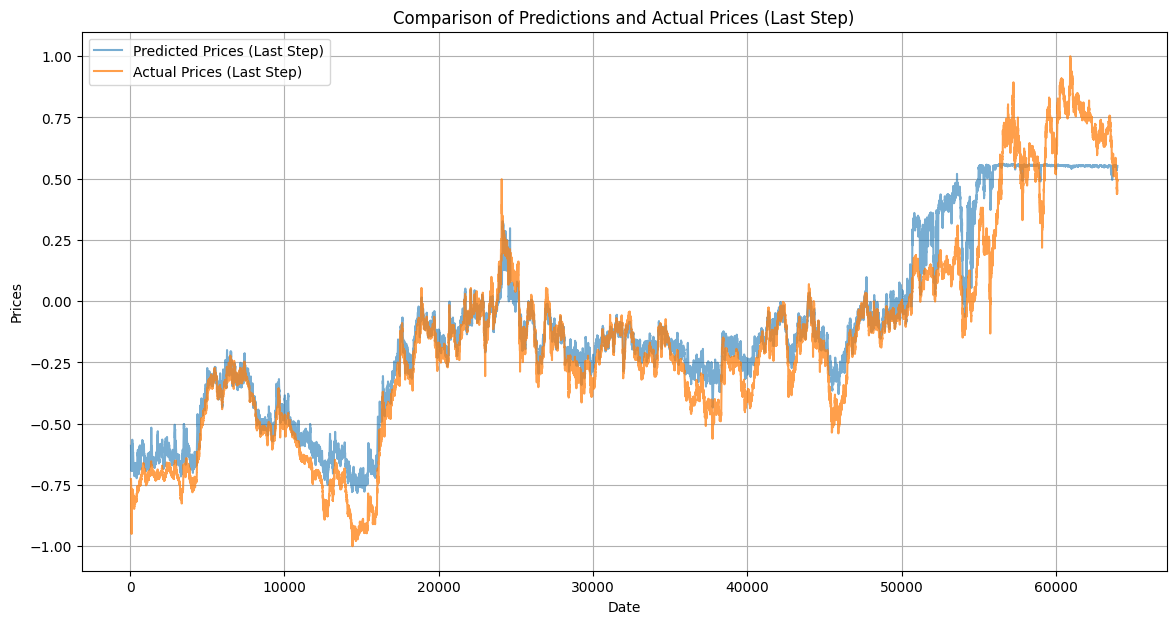

[   59    60    61 ... 63959 63960 63961]


In [ ]:
# 只取最后一步的预测（不反标准化）
test_predictions_last_step = test_predictions_first_currency[:, -1]  # 取最后一步
test_predictions_last_step = test_predictions_last_step.numpy()  # 转换为 NumPy 数组

# 只取第一个货币的实际值的最后一步（不反标准化）
testY_last_step = testY[:, -1, 0]  # 取最后一步的实际值（第一个货币）

# 假设 df 有与数据对齐的日期索引
prediction_dates = df.index[-len(testY):].to_numpy()

# 获取与最后一步预测值对应的日期
prediction_dates_last_step = prediction_dates[-len(test_predictions_last_step):]

# 绘制第一个货币的预测和实际价格 (专注于最后一步)
plt.figure(figsize=(14, 7))
plt.plot(prediction_dates_last_step, test_predictions_last_step, label='Predicted Prices (Last Step)', alpha=0.6)
plt.plot(prediction_dates_last_step, testY_last_step, label='Actual Prices (Last Step)', alpha=0.75)
plt.title('Comparison of Predictions and Actual Prices (Last Step)')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()

# 打印最后一步的预测日期
print(prediction_dates_last_step)

# 保存预测值和日期到 CSV 文件
adjusted_predictions_df = pd.DataFrame(test_predictions_last_step, columns=['Adjusted Predictions'])
adjusted_predictions_df.to_csv('predictions5m_no_rescale.csv', index=False)

prediction_times_df = pd.DataFrame(pd.to_datetime(prediction_dates_last_step), columns=['Prediction Time'])
prediction_times_df.to_csv('prediction_times5m.csv', index=False)


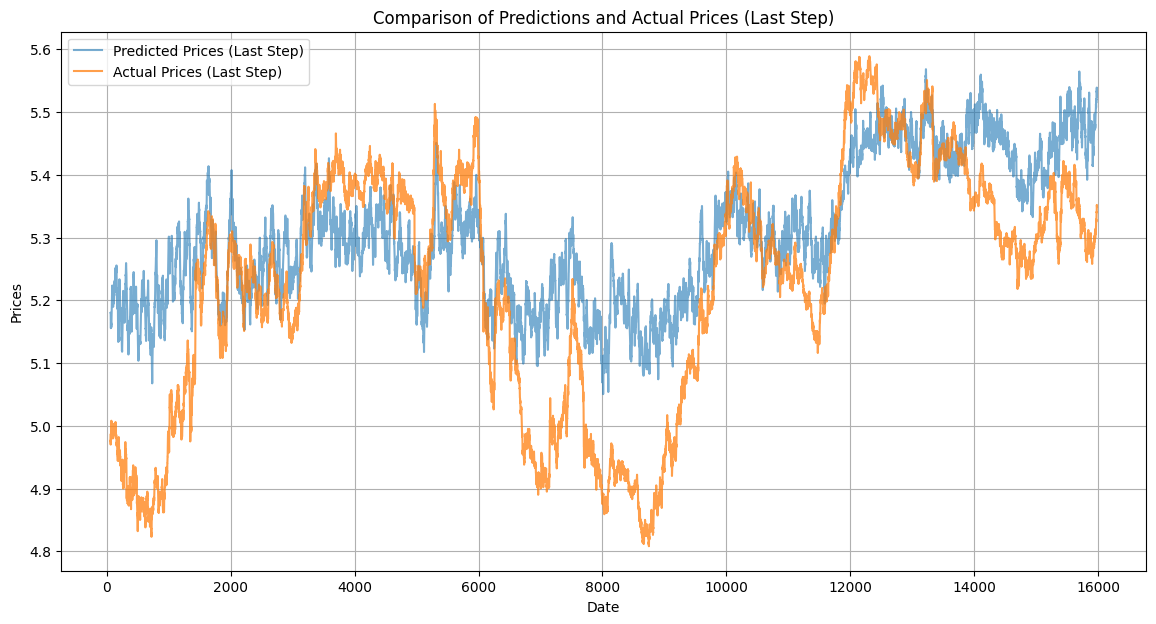

[   59    60    61 ... 15981 15982 15983]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import load_model

testY = testY_primary
scaler_y = scalers_list[0]['Close']
# # 获取模型的预测
# predictions = model.predict(testX)
# test_predictions = predictions['primary_output']  # 获取主输出

# 将输入拆分为更小的批次进行推理
batch_size = 256  # 根据显存限制设置较小的批次大小
outputs = []
for i in range(0, len(testX), batch_size):
    batch_input = testX[i:i + batch_size]
    # batch_output = loaded_model(batch_input)
    batch_output = model(batch_input)
    outputs.append(batch_output)
# 合并所有批次的输出
output = {
    key: tf.concat([o[key] for o in outputs], axis=0)
    for key in outputs[0]
}
# # 提取主输出
test_predictions = output['primary_output'][:, :, 0]  # 获取第二个币种预测
# test_predictions = output['primary_output']

# 获取第一个货币的预测
test_predictions_first_currency = test_predictions  # 假设第一个货币是第一个通道

# 只取最后一步的预测并进行反标准化
test_predictions_last_step = test_predictions_first_currency[:, -1]  # 取最后一步
test_predictions_last_step = test_predictions_last_step.numpy()
test_predictions_full = scaler_y.inverse_transform(test_predictions_last_step.reshape(-1, 1)).flatten()

# 只取第一个货币的实际值的最后一步并进行反标准化
testY_last_step = testY[:, -1, 0]  # 取最后一步的实际值（第一个货币）
testY_actual_first_currency = scaler_y.inverse_transform(testY_last_step.reshape(-1, 1)).flatten()

# 假设 df 有与数据对齐的日期索引
prediction_dates = df.index[-len(testY):].to_numpy()

# 获取与最后一步预测值对应的日期
prediction_dates_last_step = prediction_dates[-len(test_predictions_full):]

# 绘制第一个货币的预测和实际价格 (专注于最后一步)
plt.figure(figsize=(14, 7))
plt.plot(prediction_dates_last_step, test_predictions_full, label='Predicted Prices (Last Step)', alpha=0.6)
plt.plot(prediction_dates_last_step, testY_actual_first_currency, label='Actual Prices (Last Step)', alpha=0.75)
plt.title('Comparison of Predictions and Actual Prices (Last Step)')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()

# 打印最后一步的预测日期
print(prediction_dates_last_step)

# 保存预测值和日期到 CSV 文件
adjusted_predictions_df = pd.DataFrame(test_predictions_full, columns=['Adjusted Predictions'])
adjusted_predictions_df.to_csv('predictions5m.csv', index=False)

prediction_times_df = pd.DataFrame(pd.to_datetime(prediction_dates_last_step), columns=['Prediction Time'])
prediction_times_df.to_csv('prediction_times5m.csv', index=False)


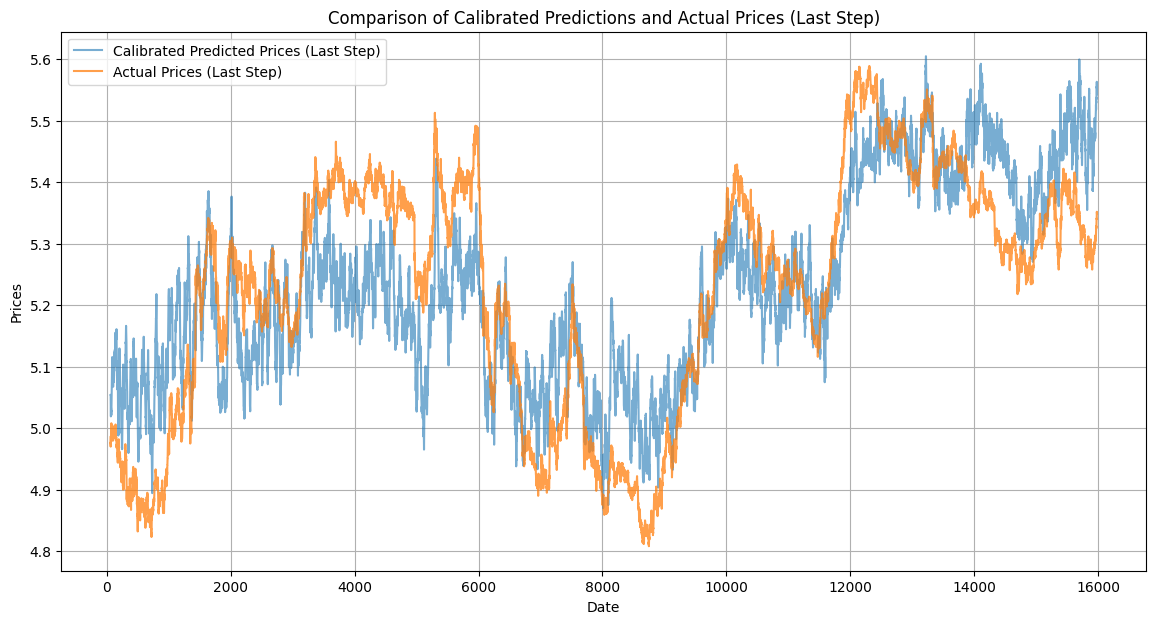

[   59    60    61 ... 15981 15982 15983]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# from tensorflow.keras.models import load_model

symbol = 'PENDLEUSDT'
# model_load_path = f"./models_price/{symbol}.h5"
model_load_path = f'/content/model.h5'
# loaded_model = load_model(model_load_path, custom_objects={'PositionalEncoding': PositionalEncoding})


# loaded_model = load_model(
#     model_load_path,
#     custom_objects={
#         'NBeatsBlock':NBeatsBlock,
#         # 'PositionalEncoding': PositionalEncoding,
#                 'ConditionalNormalization': ConditionalNormalization,
#         # 'BahdanauAttention': BahdanauAttention,
#         'total_loss': total_loss,
#         'mse_loss': mse_loss,
#         'ngram_loss': ngram_loss,
#         'ConditionalDropout':ConditionalDropout,
#         'combined_loss':combined_loss,
#         'frechet_loss':frechet_loss,
#         'cross_correlation_loss':cross_correlation_loss,
#         'dtw_loss':dtw_loss,
#         'n_gram_precision':n_gram_precision,
#         'get_ngrams':get_ngrams,
#         'mixed_loss':mixed_loss
#     }
# )


# loaded_model = load_model(
#     'my_model.keras',
#     custom_objects={
#         'ConditionalNormalization': ConditionalNormalization,
#         'NBeatsBlock': NBeatsBlock,
#         'combined_loss': combined_loss,
#         'frechet_loss': frechet_loss,
#         'mse_loss': mse_loss,
#         'cross_correlation_loss': cross_correlation_loss,
#         'dtw_loss': dtw_loss,
#         'ngram_loss': ngram_loss
#     },
#     safe_mode=False  # Allow deserialization of lambda layers
# )



# from tensorflow.keras.models import load_model

# loaded_model = load_model(model_load_path,custom_objects={
# 'ConditionalNormalization': ConditionalNormalization,'NBeatsBlock': NBeatsBlock,'combined_loss': combined_loss,'frechet_loss': frechet_loss,'mse_loss': mse_loss,'cross_correlation_loss':cross_correlation_loss,'dtw_loss':dtw_loss,'ngram_loss':ngram_loss
# }
# )


# # 获取模型的预测
testY = testY_primary
scaler_y = scalers_list[0]['Close']
# # predictions = model.predict(testX)
# # predictions = loaded_model.predict(testX)
# test_predictions = predictions['primary_output']  # 获取主输出

# dummy_input = testX  # 确保 testX 的形状与模型的输入形状匹配
# # 使用 TFSMLayer 直接进行推理
# output = loaded_model(dummy_input)  # 直接调用加载的 TFSMLayer
# # 提取主输出
# test_predictions = output['primary_output']  # 提取主输出


# 将输入拆分为更小的批次进行推理
batch_size = 256  # 根据显存限制设置较小的批次大小
outputs = []
for i in range(0, len(testX), batch_size):
    batch_input = testX[i:i + batch_size]
    # batch_output = loaded_model(batch_input)
    batch_output = model(batch_input)
    outputs.append(batch_output)
# 合并所有批次的输出
output = {
    key: tf.concat([o[key] for o in outputs], axis=0)
    for key in outputs[0]
}
# # 提取主输出
test_predictions = output['primary_output']


# 假设第一个货币是第一个通道
test_predictions_first_currency = test_predictions

# 只取最后一步的预测并进行反标准化
test_predictions_last_step = test_predictions_first_currency[:, -1]  # 取最后一步
test_predictions_last_step = test_predictions_last_step.numpy()
test_predictions_full = scaler_y.inverse_transform(test_predictions_last_step.reshape(-1, 1)).flatten()

# 只取第一个货币的实际值的最后一步并进行反标准化
testY_last_step = testY[:, -1, 0]  # 取最后一步的实际值（第一个货币）
testY_actual_first_currency = scaler_y.inverse_transform(testY_last_step.reshape(-1, 1)).flatten()

# # 校准步骤：使用简单的线性比例校准
# alpha = np.mean(testY_actual_first_currency) / np.mean(test_predictions_full)
# test_predictions_calibrated = test_predictions_full * alpha

# 校准步骤：使用线性回归进行后处理
regressor = LinearRegression()
regressor.fit(test_predictions_full.reshape(-1, 1), testY_actual_first_currency)
test_predictions_calibrated = regressor.predict(test_predictions_full.reshape(-1, 1))

# 假设 df 有与数据对齐的日期索引
prediction_dates = df.index[-len(testY):].to_numpy()

# 获取与最后一步预测值对应的日期
prediction_dates_last_step = prediction_dates[-len(test_predictions_full):]

# 绘制第一个货币的校准后预测和实际价格 (专注于最后一步)
plt.figure(figsize=(14, 7))
plt.plot(prediction_dates_last_step, test_predictions_calibrated, label='Calibrated Predicted Prices (Last Step)', alpha=0.6)
plt.plot(prediction_dates_last_step, testY_actual_first_currency, label='Actual Prices (Last Step)', alpha=0.75)
plt.title('Comparison of Calibrated Predictions and Actual Prices (Last Step)')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()

# 打印最后一步的预测日期
print(prediction_dates_last_step)

# 保存校准后的预测值和日期到 CSV 文件
adjusted_predictions_df = pd.DataFrame(test_predictions_calibrated, columns=['Calibrated Predictions'])
adjusted_predictions_df.to_csv('calibrated_predictions5m.csv', index=False)

prediction_times_df = pd.DataFrame(pd.to_datetime(prediction_dates_last_step), columns=['Prediction Time'])
prediction_times_df.to_csv('prediction_times5m.csv', index=False)


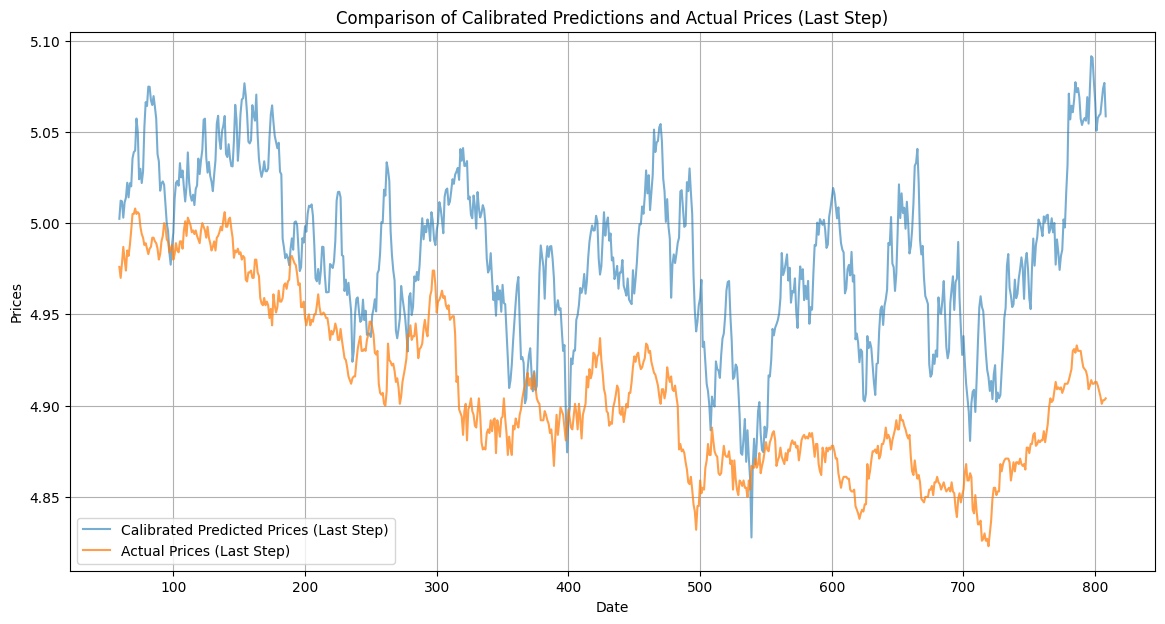

[   59    60    61 ... 15981 15982 15983]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 获取模型的预测
# predictions = model.predict(testX)
# test_predictions = predictions['primary_output']  # 获取主输出


# 假设第一个货币是第一个通道
test_predictions_first_currency = test_predictions

# 只取最后一步的预测并进行反标准化
test_predictions_last_step = test_predictions_first_currency[:, -1]  # 取最后一步
# test_predictions_full = scaler_y.inverse_transform(test_predictions_last_step.reshape(-1, 1)).flatten()

# 只取第一个货币的实际值的最后一步并进行反标准化
testY_last_step = testY[:, -1, 0]  # 取最后一步的实际值（第一个货币）
testY_actual_first_currency = scaler_y.inverse_transform(testY_last_step.reshape(-1, 1)).flatten()

# # 校准步骤：使用简单的线性比例校准
# alpha = np.mean(testY_actual_first_currency) / np.mean(test_predictions_full)
# test_predictions_calibrated = test_predictions_full * alpha

# 校准步骤：使用线性回归进行后处理
regressor = LinearRegression()
regressor.fit(test_predictions_full.reshape(-1, 1), testY_actual_first_currency)
test_predictions_calibrated = regressor.predict(test_predictions_full.reshape(-1, 1))

# 假设 df 有与数据对齐的日期索引
prediction_dates = df.index[-len(testY):].to_numpy()

# 获取与最后一步预测值对应的日期
prediction_dates_last_step = prediction_dates[-len(test_predictions_full):]

# 绘制第一个货币的校准后预测和实际价格 (专注于最后一步)
plt.figure(figsize=(14, 7))
plt.plot(prediction_dates_last_step[:750], test_predictions_calibrated[:750], label='Calibrated Predicted Prices (Last Step)', alpha=0.6)
plt.plot(prediction_dates_last_step[:750], testY_actual_first_currency[:750], label='Actual Prices (Last Step)', alpha=0.75)
plt.title('Comparison of Calibrated Predictions and Actual Prices (Last Step)')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()

# 打印最后一步的预测日期
print(prediction_dates_last_step)

# 保存校准后的预测值和日期到 CSV 文件
adjusted_predictions_df = pd.DataFrame(test_predictions_calibrated, columns=['Calibrated Predictions'])
adjusted_predictions_df.to_csv('calibrated_predictions5m.csv', index=False)

prediction_times_df = pd.DataFrame(pd.to_datetime(prediction_dates_last_step), columns=['Prediction Time'])
prediction_times_df.to_csv('prediction_times5m.csv', index=False)


In [ ]:
print("primary_output shape:", output['primary_output'].shape)

primary_output shape: (63903, 10, 1)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# from tensorflow.keras.models import load_model

symbol = 'PENDLEUSDT'
# model_load_path = f"./models_price/{symbol}.h5"
model_load_path = f'/content/model.h5'
# loaded_model = load_model(model_load_path, custom_objects={'PositionalEncoding': PositionalEncoding})


# loaded_model = load_model(
#     model_load_path,
#     custom_objects={
#         'NBeatsBlock':NBeatsBlock,
#         # 'PositionalEncoding': PositionalEncoding,
#                 'ConditionalNormalization': ConditionalNormalization,
#         # 'BahdanauAttention': BahdanauAttention,
#         'total_loss': total_loss,
#         'mse_loss': mse_loss,
#         'ngram_loss': ngram_loss,
#         'ConditionalDropout':ConditionalDropout,
#         'combined_loss':combined_loss,
#         'frechet_loss':frechet_loss,
#         'cross_correlation_loss':cross_correlation_loss,
#         'dtw_loss':dtw_loss,
#         'n_gram_precision':n_gram_precision,
#         'get_ngrams':get_ngrams,
#         'mixed_loss':mixed_loss
#     }
# )


# loaded_model = load_model(
#     'my_model.keras',
#     custom_objects={
#         'ConditionalNormalization': ConditionalNormalization,
#         'NBeatsBlock': NBeatsBlock,
#         'combined_loss': combined_loss,
#         'frechet_loss': frechet_loss,
#         'mse_loss': mse_loss,
#         'cross_correlation_loss': cross_correlation_loss,
#         'dtw_loss': dtw_loss,
#         'ngram_loss': ngram_loss
#     },
#     safe_mode=False  # Allow deserialization of lambda layers
# )



# from tensorflow.keras.models import load_model

# loaded_model = load_model(model_load_path,custom_objects={
# 'ConditionalNormalization': ConditionalNormalization,'NBeatsBlock': NBeatsBlock,'combined_loss': combined_loss,'frechet_loss': frechet_loss,'mse_loss': mse_loss,'cross_correlation_loss':cross_correlation_loss,'dtw_loss':dtw_loss,'ngram_loss':ngram_loss
# }
# )


# # 获取模型的预测
testY = testY_primary
scaler_y = scalers_list[0]['Close']
# # predictions = model.predict(testX)
# # predictions = loaded_model.predict(testX)
# test_predictions = predictions['primary_output']  # 获取主输出

# dummy_input = testX  # 确保 testX 的形状与模型的输入形状匹配
# # 使用 TFSMLayer 直接进行推理
# output = loaded_model(dummy_input)  # 直接调用加载的 TFSMLayer
# # 提取主输出
# test_predictions = output['primary_output']  # 提取主输出


# 将输入拆分为更小的批次进行推理
batch_size = 256  # 根据显存限制设置较小的批次大小
outputs = []
for i in range(0, len(testX), batch_size):
    batch_input = testX[i:i + batch_size]
    # batch_output = loaded_model(batch_input)
    batch_output = model(batch_input)
    outputs.append(batch_output)
# 合并所有批次的输出
output = {
    key: tf.concat([o[key] for o in outputs], axis=0)
    for key in outputs[0]
}
# # 提取主输出
test_predictions = output['primary_output']


# 假设第一个货币是第一个通道
test_predictions_first_currency = test_predictions

# 只取最后一步的预测并进行反标准化
test_predictions_last_step = test_predictions_first_currency[:, -1]  # 取最后一步
test_predictions_last_step = test_predictions_last_step.numpy()
test_predictions_full = scaler_y.inverse_transform(test_predictions_last_step.reshape(-1, 1)).flatten()

# 只取第一个货币的实际值的最后一步并进行反标准化
testY_last_step = testY[:, -1, 0]  # 取最后一步的实际值（第一个货币）
testY_actual_first_currency = scaler_y.inverse_transform(testY_last_step.reshape(-1, 1)).flatten()

# # 校准步骤：使用简单的线性比例校准
# alpha = np.mean(testY_actual_first_currency) / np.mean(test_predictions_full)
# test_predictions_calibrated = test_predictions_full * alpha

# 校准步骤：使用线性回归进行后处理
regressor = LinearRegression()
regressor.fit(test_predictions_full.reshape(-1, 1), testY_actual_first_currency)
test_predictions_calibrated = regressor.predict(test_predictions_full.reshape(-1, 1))

# 假设 df 有与数据对齐的日期索引
prediction_dates = df.index[-len(testY):].to_numpy()

# 获取与最后一步预测值对应的日期
prediction_dates_last_step = prediction_dates[-len(test_predictions_full):]

# 绘制第一个货币的校准后预测和实际价格 (专注于最后一步)
plt.figure(figsize=(14, 7))
plt.plot(prediction_dates_last_step, test_predictions_calibrated, label='Calibrated Predicted Prices (Last Step)', alpha=0.6)
plt.plot(prediction_dates_last_step, testY_actual_first_currency, label='Actual Prices (Last Step)', alpha=0.75)
plt.title('Comparison of Calibrated Predictions and Actual Prices (Last Step)')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()

# 打印最后一步的预测日期
print(prediction_dates_last_step)

# 保存校准后的预测值和日期到 CSV 文件
adjusted_predictions_df = pd.DataFrame(test_predictions_calibrated, columns=['Calibrated Predictions'])
adjusted_predictions_df.to_csv('calibrated_predictions5m.csv', index=False)

prediction_times_df = pd.DataFrame(pd.to_datetime(prediction_dates_last_step), columns=['Prediction Time'])
prediction_times_df.to_csv('prediction_times5m.csv', index=False)


ValueError: Found input variables with inconsistent numbers of samples: [3848, 1924]

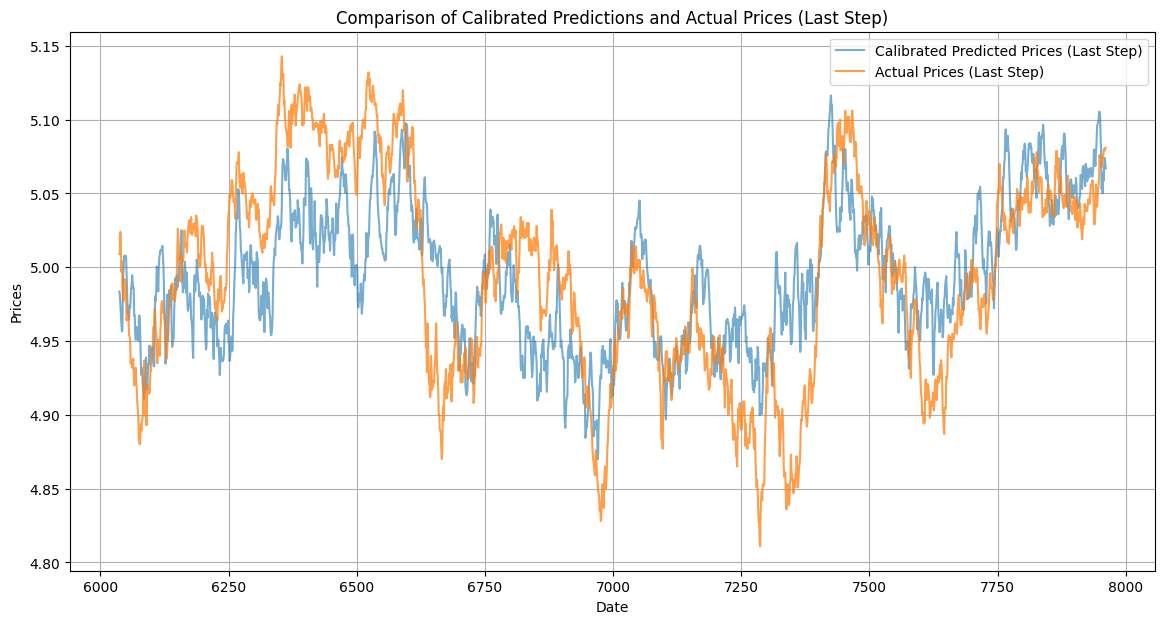

[6037 6038 6039 ... 7959 7960 7961]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# from tensorflow.keras.models import load_model

symbol = 'PENDLEUSDT'
# model_load_path = f"./models_price/{symbol}.h5"
model_load_path = f'/content/model.h5'
# loaded_model = load_model(model_load_path, custom_objects={'PositionalEncoding': PositionalEncoding})


# loaded_model = load_model(
#     model_load_path,
#     custom_objects={
#         'NBeatsBlock':NBeatsBlock,
#         # 'PositionalEncoding': PositionalEncoding,
#                 'ConditionalNormalization': ConditionalNormalization,
#         # 'BahdanauAttention': BahdanauAttention,
#         'total_loss': total_loss,
#         'mse_loss': mse_loss,
#         'ngram_loss': ngram_loss,
#         'ConditionalDropout':ConditionalDropout,
#         'combined_loss':combined_loss,
#         'frechet_loss':frechet_loss,
#         'cross_correlation_loss':cross_correlation_loss,
#         'dtw_loss':dtw_loss,
#         'n_gram_precision':n_gram_precision,
#         'get_ngrams':get_ngrams,
#         'mixed_loss':mixed_loss
#     }
# )


# loaded_model = load_model(
#     'my_model.keras',
#     custom_objects={
#         'ConditionalNormalization': ConditionalNormalization,
#         'NBeatsBlock': NBeatsBlock,
#         'combined_loss': combined_loss,
#         'frechet_loss': frechet_loss,
#         'mse_loss': mse_loss,
#         'cross_correlation_loss': cross_correlation_loss,
#         'dtw_loss': dtw_loss,
#         'ngram_loss': ngram_loss
#     },
#     safe_mode=False  # Allow deserialization of lambda layers
# )



# from tensorflow.keras.models import load_model

# loaded_model = load_model(model_load_path,custom_objects={
# 'ConditionalNormalization': ConditionalNormalization,'NBeatsBlock': NBeatsBlock,'combined_loss': combined_loss,'frechet_loss': frechet_loss,'mse_loss': mse_loss,'cross_correlation_loss':cross_correlation_loss,'dtw_loss':dtw_loss,'ngram_loss':ngram_loss
# }
# )


# # 获取模型的预测
testY = testY_primary
scaler_y = scalers_list[0]['Close']
# # predictions = model.predict(testX)
# # predictions = loaded_model.predict(testX)
# test_predictions = predictions['primary_output']  # 获取主输出

# dummy_input = testX  # 确保 testX 的形状与模型的输入形状匹配
# # 使用 TFSMLayer 直接进行推理
# output = loaded_model(dummy_input)  # 直接调用加载的 TFSMLayer
# # 提取主输出
# test_predictions = output['primary_output']  # 提取主输出


# 将输入拆分为更小的批次进行推理
batch_size = 256  # 根据显存限制设置较小的批次大小
outputs = []
for i in range(0, len(testX), batch_size):
    batch_input = testX[i:i + batch_size]
    # batch_output = loaded_model(batch_input)
    batch_output = model(batch_input)
    outputs.append(batch_output)
# 合并所有批次的输出
output = {
    key: tf.concat([o[key] for o in outputs], axis=0)
    for key in outputs[0]
}
# # 提取主输出
test_predictions = output['primary_output']


# 假设第一个货币是第一个通道
test_predictions_first_currency = test_predictions

# 只取最后一步的预测并进行反标准化
test_predictions_last_step = test_predictions_first_currency[:, -1]  # 取最后一步
test_predictions_last_step = test_predictions_last_step.numpy()
test_predictions_full = scaler_y.inverse_transform(test_predictions_last_step.reshape(-1, 1)).flatten()

# 只取第一个货币的实际值的最后一步并进行反标准化
testY_last_step = testY[:, -1, 0]  # 取最后一步的实际值（第一个货币）
testY_actual_first_currency = scaler_y.inverse_transform(testY_last_step.reshape(-1, 1)).flatten()

# # 校准步骤：使用简单的线性比例校准
# alpha = np.mean(testY_actual_first_currency) / np.mean(test_predictions_full)
# test_predictions_calibrated = test_predictions_full * alpha

# 校准步骤：使用线性回归进行后处理
regressor = LinearRegression()
regressor.fit(test_predictions_full.reshape(-1, 1), testY_actual_first_currency)
test_predictions_calibrated = regressor.predict(test_predictions_full.reshape(-1, 1))

# 假设 df 有与数据对齐的日期索引
prediction_dates = df.index[-len(testY):].to_numpy()

# 获取与最后一步预测值对应的日期
prediction_dates_last_step = prediction_dates[-len(test_predictions_full):]

# 绘制第一个货币的校准后预测和实际价格 (专注于最后一步)
plt.figure(figsize=(14, 7))
plt.plot(prediction_dates_last_step, test_predictions_calibrated, label='Calibrated Predicted Prices (Last Step)', alpha=0.6)
plt.plot(prediction_dates_last_step, testY_actual_first_currency, label='Actual Prices (Last Step)', alpha=0.75)
plt.title('Comparison of Calibrated Predictions and Actual Prices (Last Step)')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()

# 打印最后一步的预测日期
print(prediction_dates_last_step)

# 保存校准后的预测值和日期到 CSV 文件
adjusted_predictions_df = pd.DataFrame(test_predictions_calibrated, columns=['Calibrated Predictions'])
adjusted_predictions_df.to_csv('calibrated_predictions5m.csv', index=False)

prediction_times_df = pd.DataFrame(pd.to_datetime(prediction_dates_last_step), columns=['Prediction Time'])
prediction_times_df.to_csv('prediction_times5m.csv', index=False)


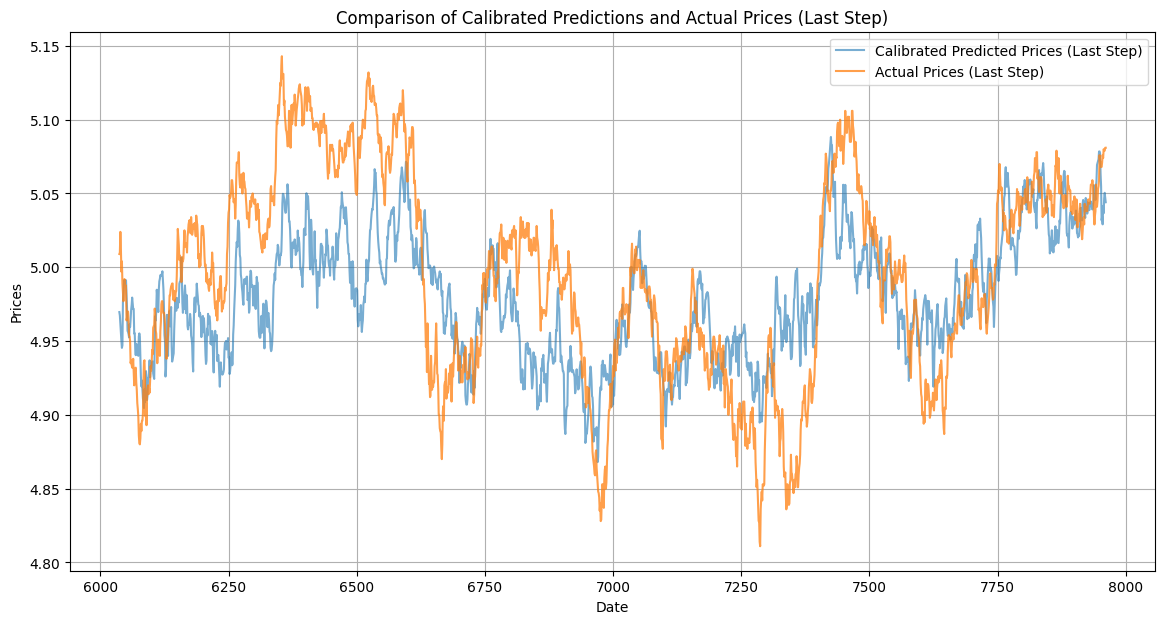

[6037 6038 6039 ... 7959 7960 7961]


In [ ]:
# 只取最后一步的预测并进行反标准化
test_predictions_last_step = test_predictions_first_currency[:, -1]  # 取最后一步
# test_predictions_full = scaler_y.inverse_transform(test_predictions_last_step.reshape(-1, 1)).flatten()
test_predictions_last_step = scaler_y.inverse_transform(test_predictions[:, -1])

# 只取第一个货币的实际值的最后一步并进行反标准化
testY_last_step = testY[:, -1, 0]  # 取最后一步的实际值（第一个货币）
testY_actual_first_currency = scaler_y.inverse_transform(testY_last_step.reshape(-1, 1)).flatten()
testY_last_step = scaler_y.inverse_transform(testY_primary[:, -1, 0].reshape(-1, 1))

last_50_predictions = test_predictions_last_step[-1150:]
last_50_actuals = testY_last_step[-1150:]
# 训练校准模型
calibrator = PredictionCalibrator()
calibrator.train_calibration_model(last_50_predictions, last_50_actuals)
test_predictions_calibrated = calibrator.apply_calibration(test_predictions_last_step)

# 假设 df 有与数据对齐的日期索引
prediction_dates = df.index[-len(testY):].to_numpy()

# 获取与最后一步预测值对应的日期
prediction_dates_last_step = prediction_dates[-len(test_predictions_full):]

# 绘制第一个货币的校准后预测和实际价格 (专注于最后一步)
plt.figure(figsize=(14, 7))
plt.plot(prediction_dates_last_step, test_predictions_calibrated, label='Calibrated Predicted Prices (Last Step)', alpha=0.6)
plt.plot(prediction_dates_last_step, testY_actual_first_currency, label='Actual Prices (Last Step)', alpha=0.75)
plt.title('Comparison of Calibrated Predictions and Actual Prices (Last Step)')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()

# 打印最后一步的预测日期
print(prediction_dates_last_step)

# 保存校准后的预测值和日期到 CSV 文件
adjusted_predictions_df = pd.DataFrame(test_predictions_calibrated, columns=['Calibrated Predictions'])
adjusted_predictions_df.to_csv('calibrated_predictions5m.csv', index=False)

prediction_times_df = pd.DataFrame(pd.to_datetime(prediction_dates_last_step), columns=['Prediction Time'])
prediction_times_df.to_csv('prediction_times5m.csv', index=False)

In [ ]:
import numpy as np

# 假设 testX 是你的输入数据
dummy_input = testX  # 确保 testX 的形状与模型的输入形状匹配

# 使用 TFSMLayer 直接进行推理
output = loaded_model(dummy_input)  # 直接调用加载的 TFSMLayer

# 提取主输出
test_predictions = output['primary_output']  # 提取主输出
print("主输出预测:", test_predictions)

# 如果需要辅助输出或相位输出，可以访问它们
auxiliary_output = output['auxiliary_output']
phase_output = output['phase_output']

print("辅助输出预测:", auxiliary_output)
print("相位输出预测:", phase_output)


主输出预测: tf.Tensor(
[[[ 0.03209974]
  [-0.27305943]
  [-0.54587054]
  ...
  [-0.47020268]
  [ 0.1076869 ]
  [ 0.01673231]]

 [[ 0.03251834]
  [-0.26984614]
  [-0.54389644]
  ...
  [-0.46110174]
  [ 0.10944775]
  [ 0.01566809]]

 [[ 0.02685058]
  [-0.27676395]
  [-0.53628665]
  ...
  [-0.46488622]
  [ 0.10450687]
  [ 0.02921827]]

 ...

 [[ 0.04706834]
  [-0.27930835]
  [-0.61343354]
  ...
  [-0.48510328]
  [ 0.09221292]
  [ 0.00631416]]

 [[ 0.04647343]
  [-0.2771613 ]
  [-0.6133591 ]
  ...
  [-0.48040146]
  [ 0.09579699]
  [ 0.0083354 ]]

 [[ 0.04117781]
  [-0.28135777]
  [-0.60754025]
  ...
  [-0.4745487 ]
  [ 0.09717239]
  [ 0.00481626]]], shape=(125, 10, 1), dtype=float32)
辅助输出预测: tf.Tensor(
[[[[ 0.18133014  0.33538538  0.16894415 ...  0.2514515   0.22606929
     0.22264835]
   [ 0.25888625  0.15818398  0.13333865 ...  0.27374431  0.02955474
     0.01975888]
   [ 0.22419438  0.19580671  0.2606518  ...  0.49464712  0.28988275
     0.08504923]
   ...
   [ 0.3133845   0.2534857   0.2472

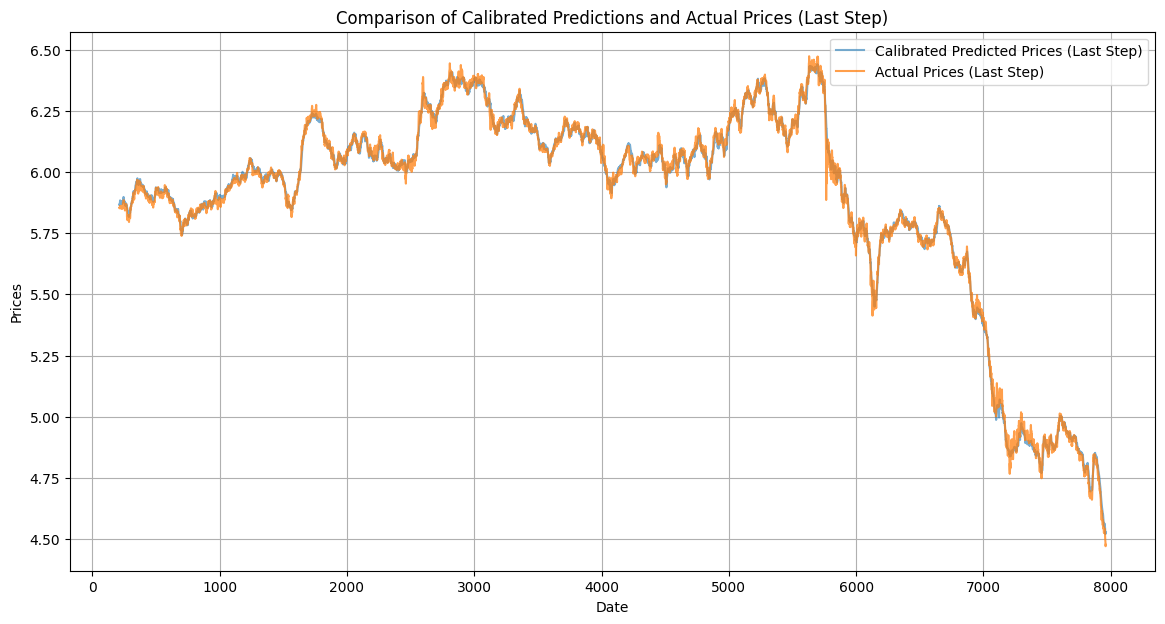

[  59   60   61 ... 7959 7960 7961]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 获取模型的预测
# predictions = model.predict(testX)
# test_predictions = predictions['primary_output']  # 获取主输出

# 将 EagerTensor 转换为 NumPy 数组进行操作
test_predictions = test_predictions[:, -1].numpy()  # 转换为 NumPy


# 假设第一个货币是第一个通道
test_predictions_first_currency = test_predictions


# 只取最后一步的预测并进行反标准化
test_predictions_last_step = test_predictions_first_currency[:, -1]  # 取最后一步
test_predictions_full = scaler_y.inverse_transform(test_predictions_last_step.reshape(-1, 1)).flatten()

# 只取第一个货币的实际值的最后一步并进行反标准化
testY_last_step = testY[:, -1, 0]  # 取最后一步的实际值（第一个货币）
testY_actual_first_currency = scaler_y.inverse_transform(testY_last_step.reshape(-1, 1)).flatten()

# # 校准步骤：使用简单的线性比例校准
# alpha = np.mean(testY_actual_first_currency) / np.mean(test_predictions_full)
# test_predictions_calibrated = test_predictions_full * alpha

# 校准步骤：使用线性回归进行后处理
regressor = LinearRegression()
regressor.fit(test_predictions_full.reshape(-1, 1), testY_actual_first_currency)
test_predictions_calibrated = regressor.predict(test_predictions_full.reshape(-1, 1))

# 假设 df 有与数据对齐的日期索引
prediction_dates = df.index[-len(testY):].to_numpy()

# 获取与最后一步预测值对应的日期
prediction_dates_last_step = prediction_dates[-len(test_predictions_full):]

# 绘制第一个货币的校准后预测和实际价格 (专注于最后一步)
plt.figure(figsize=(14, 7))
plt.plot(prediction_dates_last_step[-7750:], test_predictions_calibrated[-7750:], label='Calibrated Predicted Prices (Last Step)', alpha=0.6)
plt.plot(prediction_dates_last_step[-7750:], testY_actual_first_currency[-7750:], label='Actual Prices (Last Step)', alpha=0.75)
plt.title('Comparison of Calibrated Predictions and Actual Prices (Last Step)')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()

# 打印最后一步的预测日期
print(prediction_dates_last_step)

# 保存校准后的预测值和日期到 CSV 文件
adjusted_predictions_df = pd.DataFrame(test_predictions_calibrated, columns=['Calibrated Predictions'])
adjusted_predictions_df.to_csv('calibrated_predictions5m.csv', index=False)

prediction_times_df = pd.DataFrame(pd.to_datetime(prediction_dates_last_step), columns=['Prediction Time'])
prediction_times_df.to_csv('prediction_times5m.csv', index=False)


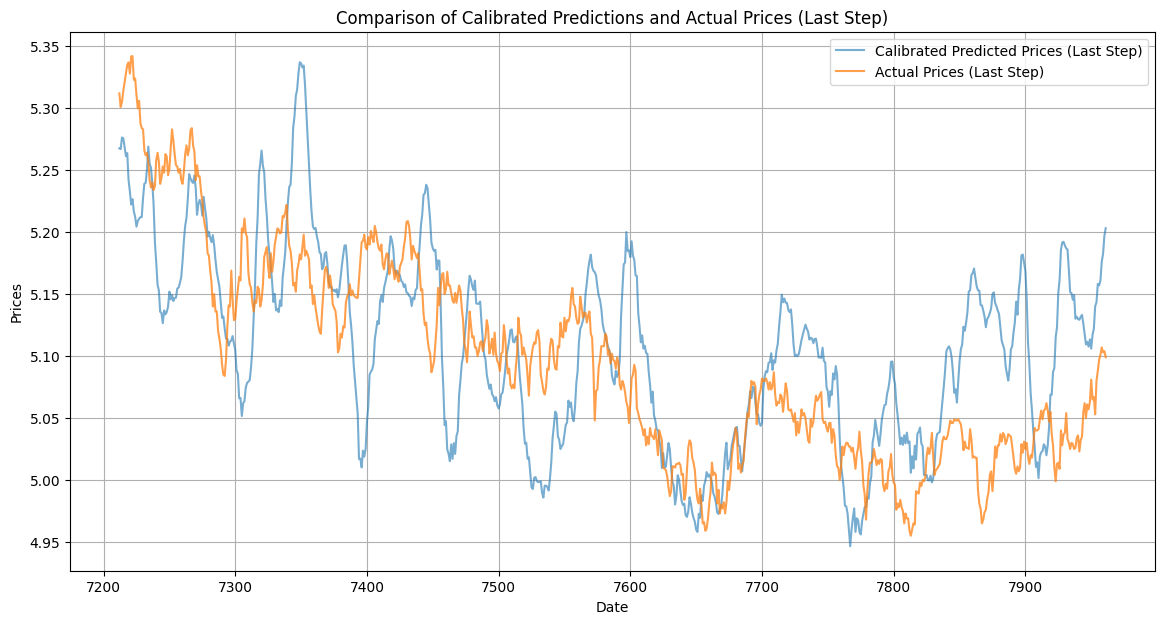

[6037 6038 6039 ... 7959 7960 7961]
[6037 6038 6039 ... 7959 7960 7961]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 获取模型的预测
# predictions = model.predict(testX)
# test_predictions = predictions['primary_output']  # 获取主输出

# 将 EagerTensor 转换为 NumPy 数组进行操作
# test_predictions = test_predictions[:, -1].numpy()  # 转换为 NumPy


# 假设第一个货币是第一个通道
test_predictions_first_currency = test_predictions


# 只取最后一步的预测并进行反标准化
test_predictions_last_step = test_predictions_first_currency[:, -1]  # 取最后一步
# test_predictions_full = scaler_y.inverse_transform(test_predictions_last_step.reshape(-1, 1)).flatten()
test_predictions_last_step = scaler_y.inverse_transform(test_predictions[:, -1])

# 只取第一个货币的实际值的最后一步并进行反标准化
testY_last_step = testY[:, -1, 0]  # 取最后一步的实际值（第一个货币）
testY_actual_first_currency = scaler_y.inverse_transform(testY_last_step.reshape(-1, 1)).flatten()
testY_last_step = scaler_y.inverse_transform(testY_primary[:, -1, 0].reshape(-1, 1))

# # 校准步骤：使用简单的线性比例校准
# alpha = np.mean(testY_actual_first_currency) / np.mean(test_predictions_full)
# test_predictions_calibrated = test_predictions_full * alpha

# # 校准步骤：使用线性回归进行后处理
# regressor = LinearRegression()
# regressor.fit(test_predictions_full.reshape(-1, 1), testY_actual_first_currency)
# test_predictions_calibrated = regressor.predict(test_predictions_full.reshape(-1, 1))

last_50_predictions = test_predictions_last_step[-8550:]
last_50_actuals = testY_last_step[-8550:]
# 训练校准模型
calibrator = PredictionCalibrator()
calibrator.train_calibration_model(last_50_predictions, last_50_actuals)
test_predictions_calibrated = calibrator.apply_calibration(test_predictions_last_step)

# 假设 df 有与数据对齐的日期索引
prediction_dates = df.index[-len(testY):].to_numpy()

# 获取与最后一步预测值对应的日期
prediction_dates_last_step = prediction_dates[-len(test_predictions_full):]

# 绘制第一个货币的校准后预测和实际价格 (专注于最后一步)
plt.figure(figsize=(14, 7))
plt.plot(prediction_dates_last_step[-750:], test_predictions_calibrated[-750:], label='Calibrated Predicted Prices (Last Step)', alpha=0.6)
plt.plot(prediction_dates_last_step[-750:], testY_actual_first_currency[-750:], label='Actual Prices (Last Step)', alpha=0.75)
plt.title('Comparison of Calibrated Predictions and Actual Prices (Last Step)')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()

# 打印最后一步的预测日期
print(prediction_dates_last_step)

# 保存校准后的预测值和日期到 CSV 文件
adjusted_predictions_df = pd.DataFrame(test_predictions_calibrated, columns=['Calibrated Predictions'])
adjusted_predictions_df.to_csv('calibrated_predictions5m.csv', index=False)

prediction_times_df = pd.DataFrame(pd.to_datetime(prediction_dates_last_step), columns=['Prediction Time'])
prediction_times_df.to_csv('prediction_times5m.csv', index=False)

print(prediction_dates)

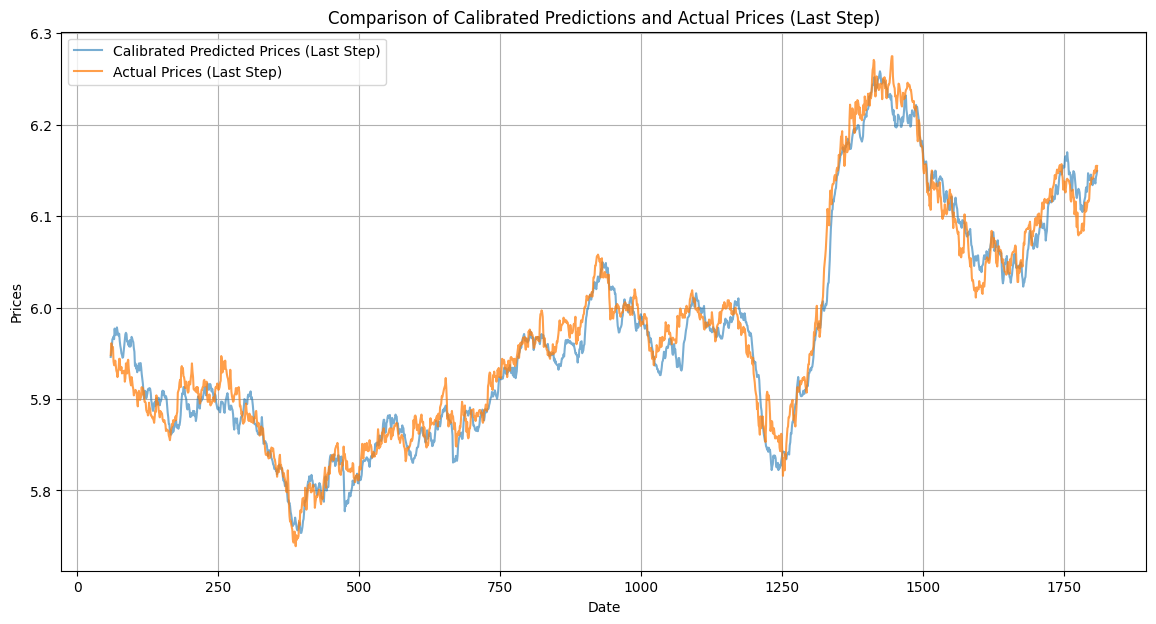

[  59   60   61 ... 7959 7960 7961]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 获取模型的预测
# predictions = model.predict(testX)
# test_predictions = predictions['primary_output']  # 获取主输出


# 假设第一个货币是第一个通道
test_predictions_first_currency = test_predictions

# 只取最后一步的预测并进行反标准化
test_predictions_last_step = test_predictions_first_currency[:, -1]  # 取最后一步
test_predictions_full = scaler_y.inverse_transform(test_predictions_last_step.reshape(-1, 1)).flatten()

# 只取第一个货币的实际值的最后一步并进行反标准化
testY_last_step = testY[:, -1, 0]  # 取最后一步的实际值（第一个货币）
testY_actual_first_currency = scaler_y.inverse_transform(testY_last_step.reshape(-1, 1)).flatten()

# # 校准步骤：使用简单的线性比例校准
# alpha = np.mean(testY_actual_first_currency) / np.mean(test_predictions_full)
# test_predictions_calibrated = test_predictions_full * alpha

# 校准步骤：使用线性回归进行后处理
regressor = LinearRegression()
regressor.fit(test_predictions_full.reshape(-1, 1), testY_actual_first_currency)
test_predictions_calibrated = regressor.predict(test_predictions_full.reshape(-1, 1))

# 假设 df 有与数据对齐的日期索引
prediction_dates = df.index[-len(testY):].to_numpy()

# 获取与最后一步预测值对应的日期
prediction_dates_last_step = prediction_dates[-len(test_predictions_full):]

# 绘制第一个货币的校准后预测和实际价格 (专注于最后一步)
plt.figure(figsize=(14, 7))
plt.plot(prediction_dates_last_step[:1750], test_predictions_calibrated[:1750], label='Calibrated Predicted Prices (Last Step)', alpha=0.6)
plt.plot(prediction_dates_last_step[:1750], testY_actual_first_currency[:1750], label='Actual Prices (Last Step)', alpha=0.75)
plt.title('Comparison of Calibrated Predictions and Actual Prices (Last Step)')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()

# 打印最后一步的预测日期
print(prediction_dates_last_step)

# 保存校准后的预测值和日期到 CSV 文件
adjusted_predictions_df = pd.DataFrame(test_predictions_calibrated, columns=['Calibrated Predictions'])
adjusted_predictions_df.to_csv('calibrated_predictions5m.csv', index=False)

prediction_times_df = pd.DataFrame(pd.to_datetime(prediction_dates_last_step), columns=['Prediction Time'])
prediction_times_df.to_csv('prediction_times5m.csv', index=False)


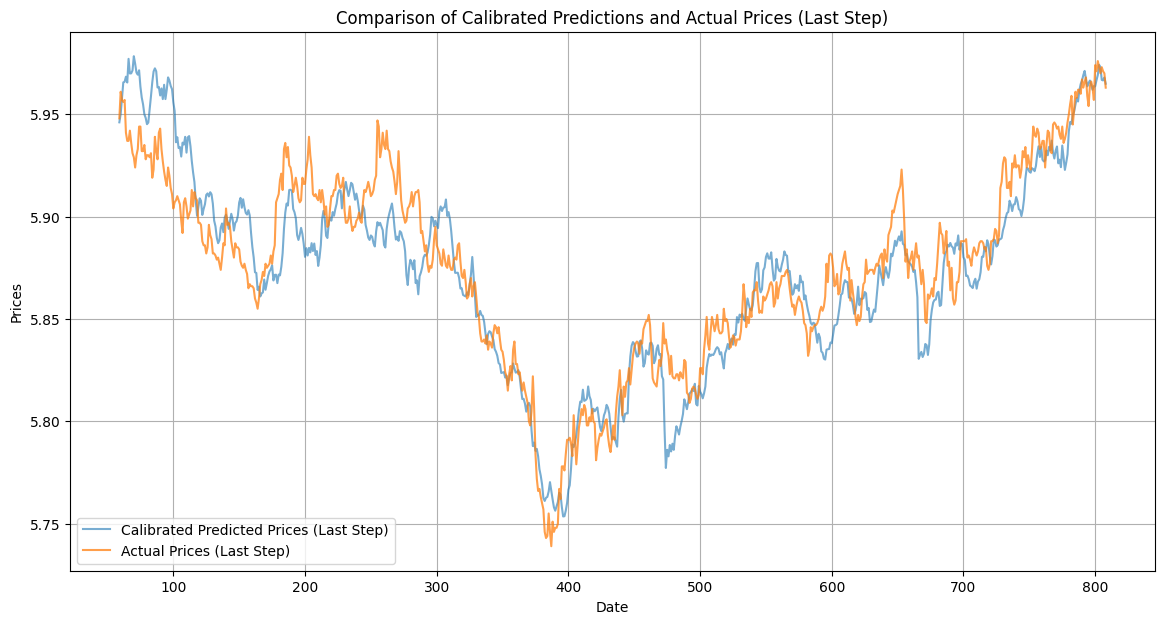

[  59   60   61 ... 7959 7960 7961]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 获取模型的预测
# predictions = model.predict(testX)
# test_predictions = predictions['primary_output']  # 获取主输出


# 假设第一个货币是第一个通道
test_predictions_first_currency = test_predictions

# 只取最后一步的预测并进行反标准化
test_predictions_last_step = test_predictions_first_currency[:, -1]  # 取最后一步
test_predictions_full = scaler_y.inverse_transform(test_predictions_last_step.reshape(-1, 1)).flatten()

# 只取第一个货币的实际值的最后一步并进行反标准化
testY_last_step = testY[:, -1, 0]  # 取最后一步的实际值（第一个货币）
testY_actual_first_currency = scaler_y.inverse_transform(testY_last_step.reshape(-1, 1)).flatten()

# # 校准步骤：使用简单的线性比例校准
# alpha = np.mean(testY_actual_first_currency) / np.mean(test_predictions_full)
# test_predictions_calibrated = test_predictions_full * alpha

# 校准步骤：使用线性回归进行后处理
regressor = LinearRegression()
regressor.fit(test_predictions_full.reshape(-1, 1), testY_actual_first_currency)
test_predictions_calibrated = regressor.predict(test_predictions_full.reshape(-1, 1))

# 假设 df 有与数据对齐的日期索引
prediction_dates = df.index[-len(testY):].to_numpy()

# 获取与最后一步预测值对应的日期
prediction_dates_last_step = prediction_dates[-len(test_predictions_full):]

# 绘制第一个货币的校准后预测和实际价格 (专注于最后一步)
plt.figure(figsize=(14, 7))
plt.plot(prediction_dates_last_step[:750], test_predictions_calibrated[:750], label='Calibrated Predicted Prices (Last Step)', alpha=0.6)
plt.plot(prediction_dates_last_step[:750], testY_actual_first_currency[:750], label='Actual Prices (Last Step)', alpha=0.75)
plt.title('Comparison of Calibrated Predictions and Actual Prices (Last Step)')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()

# 打印最后一步的预测日期
print(prediction_dates_last_step)

# 保存校准后的预测值和日期到 CSV 文件
adjusted_predictions_df = pd.DataFrame(test_predictions_calibrated, columns=['Calibrated Predictions'])
adjusted_predictions_df.to_csv('calibrated_predictions5m.csv', index=False)

prediction_times_df = pd.DataFrame(pd.to_datetime(prediction_dates_last_step), columns=['Prediction Time'])
prediction_times_df.to_csv('prediction_times5m.csv', index=False)


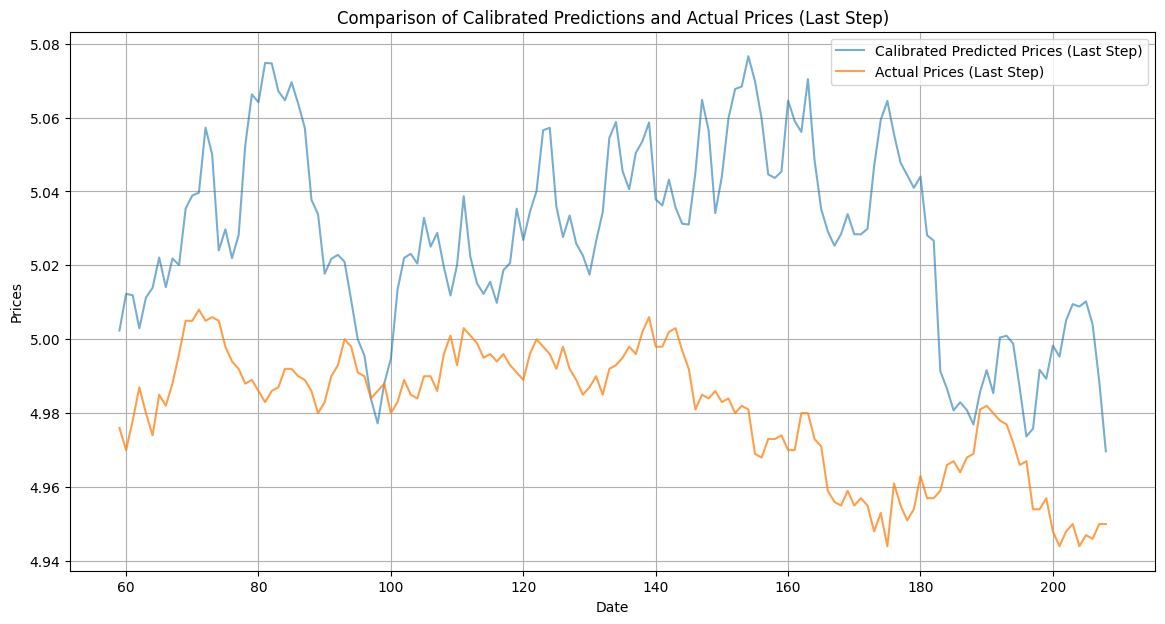

[   59    60    61 ... 15981 15982 15983]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 获取模型的预测
# predictions = model.predict(testX)
# test_predictions = predictions['primary_output']  # 获取主输出


# 假设第一个货币是第一个通道
test_predictions_first_currency = test_predictions

# 只取最后一步的预测并进行反标准化
test_predictions_last_step = test_predictions_first_currency[:, -1]  # 取最后一步
# test_predictions_full = scaler_y.inverse_transform(test_predictions_last_step.reshape(-1, 1)).flatten()

# 只取第一个货币的实际值的最后一步并进行反标准化
testY_last_step = testY[:, -1, 0]  # 取最后一步的实际值（第一个货币）
testY_actual_first_currency = scaler_y.inverse_transform(testY_last_step.reshape(-1, 1)).flatten()

# # 校准步骤：使用简单的线性比例校准
# alpha = np.mean(testY_actual_first_currency) / np.mean(test_predictions_full)
# test_predictions_calibrated = test_predictions_full * alpha

# 校准步骤：使用线性回归进行后处理
regressor = LinearRegression()
regressor.fit(test_predictions_full.reshape(-1, 1), testY_actual_first_currency)
test_predictions_calibrated = regressor.predict(test_predictions_full.reshape(-1, 1))

# 假设 df 有与数据对齐的日期索引
prediction_dates = df.index[-len(testY):].to_numpy()

# 获取与最后一步预测值对应的日期
prediction_dates_last_step = prediction_dates[-len(test_predictions_full):]

# 绘制第一个货币的校准后预测和实际价格 (专注于最后一步)
plt.figure(figsize=(14, 7))
plt.plot(prediction_dates_last_step[:150], test_predictions_calibrated[:150], label='Calibrated Predicted Prices (Last Step)', alpha=0.6)
plt.plot(prediction_dates_last_step[:150], testY_actual_first_currency[:150], label='Actual Prices (Last Step)', alpha=0.75)
plt.title('Comparison of Calibrated Predictions and Actual Prices (Last Step)')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()

# 打印最后一步的预测日期
print(prediction_dates_last_step)

# 保存校准后的预测值和日期到 CSV 文件
adjusted_predictions_df = pd.DataFrame(test_predictions_calibrated, columns=['Calibrated Predictions'])
adjusted_predictions_df.to_csv('calibrated_predictions5m.csv', index=False)

prediction_times_df = pd.DataFrame(pd.to_datetime(prediction_dates_last_step), columns=['Prediction Time'])
prediction_times_df.to_csv('prediction_times5m.csv', index=False)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import pandas as pd
from binance.client import Client
from datetime import datetime
from datetime import datetime, timedelta, timezone
from sklearn.preprocessing import MinMaxScaler
from collections import deque
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from scipy.signal import stft


def get_klines_automatically(symbol, interval, total_klines_needed):
    client = Client(api_key='SNyqQeDDCeNHqpsRTs90r27VWeXRsYnuNZJwwyr4Udb59F5oHAbYvasdqkSMdZVF', api_secret='ovA13MGxsQo7S7SOuxMgHUWj2nGakkhuu8JqaKvbZR995346Ryv2hHXjmBSS3h2I')

    # 每次请求的K线数量，币安限制通常为1000
    klines_per_request = 1000

    # 计算初始开始时间，基于当前时间往回计算所需的K线数量所覆盖的时间段
    now = datetime.utcnow()
    # 对于15分钟K线，需要调整计算开始时间的逻辑
    minutes_needed = total_klines_needed * 1
    start_time = now - timedelta(minutes=minutes_needed)
    start_str = start_time.strftime("%d %b, %Y %H:%M:%S")

    all_klines = []

    while len(all_klines) < total_klines_needed:
        klines = client.get_historical_klines(symbol, interval, start_str, limit=klines_per_request)
        all_klines.extend(klines)

        # 更新开始时间为最后一批K线的结束时间
        if klines:
            last_open_time = klines[-1][0]
            start_str = datetime.fromtimestamp(last_open_time / 1000) + timedelta(minutes=1)  # 调整为15分钟
            start_str = start_str.strftime("%d %b, %Y %H:%M:%S")
        else:
            break

    # 截断超过所需数量的数据
    all_klines = all_klines[:total_klines_needed]

    return all_klines


def calculate_gbp_usd_klines(btc_gbp_klines, btc_usd_klines):
    gbp_usd_klines = []

    for gbp_kline, usd_kline in zip(btc_gbp_klines, btc_usd_klines):
        # 通过四个价格来计算 GBP/USD 的 K 线数据
        open_gbp_usd = float(usd_kline[1]) / float(gbp_kline[1])  # 开盘价
        high_gbp_usd = float(usd_kline[2]) / float(gbp_kline[3])  # 最高价
        low_gbp_usd = float(usd_kline[3]) / float(gbp_kline[2])   # 最低价
        close_gbp_usd = float(usd_kline[4]) / float(gbp_kline[4]) # 收盘价

        # 获取VWAP和Volume等其他字段，计算方法依然是基于现有的逻辑
        vwap_gbp_usd = float(usd_kline[5]) / float(gbp_kline[5]) if float(gbp_kline[5]) != 0 else 0
        volume_gbp_usd = float(usd_kline[6])  # 按照 USD 的成交量

        # 时间戳保持一致
        open_time = gbp_kline[0]
        trades = usd_kline[7]  # 成交笔数

        # 结果格式：[时间戳, 开盘价, 最高价, 最低价, 收盘价, VWAP, Volume, Trades]
        gbp_usd_klines.append([open_time, open_gbp_usd, high_gbp_usd, low_gbp_usd, close_gbp_usd, vwap_gbp_usd, volume_gbp_usd, trades])

    return gbp_usd_klines

def calculate_kinetic_energy(df):
    df['Close'] = df['Close'].astype(float)
    df['Volume'] = df['Volume'].astype(float)
    df.index = pd.to_datetime(df.index)
    df['Price_Change'] = df['Close'].diff()
    df['Time_Change'] = df.index.to_series().diff().dt.total_seconds()
    df['Velocity'] = df['Price_Change'] / df['Time_Change']
    df['Mass'] = df['Volume']
    df['KineticEnergy'] = 0.5 * df['Mass'] * df['Velocity'] ** 2

    # Calculate the cumulative kinetic energy (integral)
    df['Cumulative_Kinetic_Energy'] = df['KineticEnergy'].cumsum()

    # Calculate the cumulative sum of cumulative kinetic energy (double integral)
    df['Double_Cumulative_KE'] = df['Cumulative_Kinetic_Energy'].cumsum()

    return df[['KineticEnergy', 'Cumulative_Kinetic_Energy', 'Double_Cumulative_KE']]

def convert_to_heikin_ashi_with_columns(klines):
    df = pd.DataFrame(klines, columns=['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'Taker Buy Base Asset Volume', 'Taker Buy Quote Asset Volume', 'Ignore'])
    numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'Number of Trades', 'Taker Buy Base Asset Volume', 'Taker Buy Quote Asset Volume']
    for column in numeric_columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')

    df['HA_Close'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4

    ha_open = [(df['Open'][0] + df['Close'][0]) / 2]  # Initial HA open is average of first candle's open and close
    for i in range(1, len(df)):
        ha_open.append((ha_open[i-1] + df['HA_Close'][i-1]) / 2)
    df['HA_Open'] = ha_open

    df['HA_High'] = df[['High', 'HA_Open', 'HA_Close']].max(axis=1)
    df['HA_Low'] = df[['Low', 'HA_Open', 'HA_Close']].min(axis=1)

    # Optionally, you can replace original OHLC with HA values or keep both
    df['Open'] = df['HA_Open']
    df['Close'] = df['HA_Close']
    df['High'] = df['HA_High']
    df['Low'] = df['HA_Low']

    return df
def add_technical_indicators(df):
    import ta  # Technical Analysis library
    # Add moving averages
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['SMA_50'] = df['Close'].rolling(window=50).mean()

    # Add Relative Strength Index (RSI)
    df['RSI'] = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()

    # Add Moving Average Convergence Divergence (MACD)
    macd = ta.trend.MACD(df['Close'])
    df['MACD'] = macd.macd()
    df['MACD_signal'] = macd.macd_signal()

    df = df.dropna()  # Drop rows with NaN values
    return df

def SARIMAX_p(klines, num_predictions):
    # klines = self.convert_to_heikin_ashi_with_columns(klines)

    columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'Taker Buy Base Asset Volume', 'Taker Buy Quote Asset Volume', 'Ignore']

    df = pd.DataFrame(klines, columns=columns)
    # 将时间戳转换为日期时间格式
    df['Open Time'] = pd.to_datetime(df['Open Time'], unit='ms')
    df['Close Time'] = pd.to_datetime(df['Close Time'], unit='ms')
    # 设置Open Time为索引
    df.set_index('Open Time', inplace=True)

    df[['KineticEnergy', 'Cumulative_Kinetic_Energy', 'Double_Cumulative_KE']] = calculate_kinetic_energy(df)
    df = df.dropna()

    # 选择需要的列
#         df = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'Number of Trades', 'Taker Buy Base Asset Volume', 'Taker Buy Quote Asset Volume', 'KineticEnergy','Velocity','Price_Change','Price_Dynamics','Ignore']]
    df = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'Number of Trades', 'Taker Buy Base Asset Volume', 'Taker Buy Quote Asset Volume','KineticEnergy','Cumulative_Kinetic_Energy','Ignore']]
    # print(df.head())

    from statsmodels.tsa.statespace.sarimax import SARIMAX
    # 确保时间序列是按日期排序的
    df.sort_index(inplace=True)
    # 处理缺失值（如果有的话）
    df.fillna(method='ffill', inplace=True)  # 前向填充
    df.fillna(method='bfill', inplace=True)  # 后向填充

    # 假设df是您的DataFrame，并且它包含了目标变量'y'和一个或多个外部解释变量
    # 以'Close'作为我们要预测的目标，以'Volume'作为外部变量的示例
    y = df['Close'].values
    X = df[['Volume']].values  # X可以是多个外部解释变量

    # 分割数据集为训练集和"预测集"，这里不使用传统的train_test_split，因为我们直接基于num_predictions来划分
    split_idx = len(y) - num_predictions  # 计算训练集和预测集的分界索引
    X_train, X_pred = X[:split_idx], X[split_idx:]
    y_train = y[:split_idx]

    # 构建ARIMAX模型
    model_arimax = SARIMAX(y_train, exog=X_train, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
    # 拟合模型
    result_arimax = model_arimax.fit()

    # 使用模型进行预测，这里我们直接对未来的num_predictions个时间点进行预测
    predictions_arimax = result_arimax.forecast(steps=num_predictions, exog=X_pred)
    predictions_arimax = predictions_arimax.reshape(-1, 1)

    return predictions_arimax

In [ ]:
!python --version
import sys
print(sys.version)


Python 3.10.12
3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]


In [ ]:
# !pip uninstall tensorflow -y
# !pip install tensorflow==2.15
import os
os._exit(00)

In [ ]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
!pip install conda-package-handling
!wget https://anaconda.org/conda-forge/ta-lib/0.5.1/download/linux-64/ta-lib-0.5.1-py311h9ecbd09_0.conda
!cph x ta-lib-0.5.1-py311h9ecbd09_0.conda
!mv ./ta-lib-0.5.1-py311h9ecbd09_0/lib/python3.11/site-packages/talib /usr/local/lib/python3.11/dist-packages/
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4127    0  4127    0     0   8356      0 --:--:-- --:--:-- --:--:--  8371
100  517k  100  517k    0     0   236k      0  0:00:02  0:00:02 --:--:--  423k
--2025-01-29 11:24:50--  https://anaconda.org/conda-forge/ta-lib/0.5.1/download/linux-64/ta-lib-0.5.1-py311h9ecbd09_0.conda
Resolving anaconda.org (anaconda.org)... 104.19.144.37, 104.19.145.37, 2606:4700::6813:9125, ...
Connecting to anaconda.org (anaconda.org)|104.19.144.37|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://binstar-cio-packages-prod.s3.amazonaws.com/5f738b4b78d4370a69f82984/673b62920c609ff6945bb24d?response-content-disposition=attachment%3B%20filename%3D%22ta-lib-0.5.1-py311h9ecbd09_0.conda%22%3B%20filename%2A%3DUTF-8%27%27ta-lib-0.5.1-py311h9ecbd09_0.conda&response-content-type=application%2Foctet-stream&X-Amz-Algorithm=

In [ ]:
!pip install featuretools

!pip install python-binance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.9/587.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.2/215.2 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.7/113.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 52.0 MB/s eta 0:00:00


In [ ]:
import featuretools as ft
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 假设get_klines_automatically和calculate_kinetic_energy已经定义

# # 获取数据
# symbol = "GBPUSDT"
symbol = "PENDLEUSDT"  # 交易对
interval = "1m"        # 时间间隔
lookback = 10000  # 回溯的数据量
# lookback = 8 * 60 * 100   # 回溯的数据量
total_klines_needed = lookback

klines = get_klines_automatically(symbol, interval, total_klines_needed)


# 定义列名
columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'Taker Buy Base Asset Volume', 'Taker Buy Quote Asset Volume', 'Ignore']

# 创建DataFrame
df = pd.DataFrame(klines, columns=columns)
df['Open Time'] = pd.to_datetime(df['Open Time'], unit='ms')
df['Close Time'] = pd.to_datetime(df['Close Time'], unit='ms')
df['index'] = df.index  # 创建索引列

# 计算动能
df[['KineticEnergy', 'Cumulative_Kinetic_Energy', 'Double_Cumulative_KE']] = calculate_kinetic_energy(df)
df = df.dropna()

# 选择需要的列
df = df[['index', 'Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'Number of Trades', 'Taker Buy Base Asset Volume', 'Taker Buy Quote Asset Volume', 'KineticEnergy', 'Cumulative_Kinetic_Energy', 'Open Time']]

import talib

# 添加技术指标
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA10'] = df['Close'].rolling(window=10).mean()
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
df['EMA12'] = talib.EMA(df['Close'], timeperiod=12)
df['EMA26'] = talib.EMA(df['Close'], timeperiod=26)
df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['BB_upper'], df['BB_middle'], df['BB_lower'] = talib.BBANDS(df['Close'], timeperiod=20)
df['ADX'] = talib.ADX(df['High'], df['Low'], df['Close'], timeperiod=14)
df['CCI'] = talib.CCI(df['High'], df['Low'], df['Close'], timeperiod=14)
df['Williams %R'] = talib.WILLR(df['High'], df['Low'], df['Close'], timeperiod=14)
df['Stochastic Oscillator %K'], df['Stochastic Oscillator %D'] = talib.STOCH(df['High'], df['Low'], df['Close'])
df['ATR'] = talib.ATR(df['High'], df['Low'], df['Close'], timeperiod=14)  # 平均真实波幅
df['ROC'] = talib.ROC(df['Close'], timeperiod=10)  # 变动率指标
# df['OBV'] = talib.OBV(df['Close'], df['Volume'])  # 成交量指标
# df['MFI'] = talib.MFI(df['High'], df['Low'], df['Close'], df['Volume'], timeperiod=14)  # 资金流量指标

# df['cum_volume_price'] = (df['Close'] * df['Volume']).cumsum()
# df['cum_volume'] = df['Volume'].cumsum()
# df['VWAP'] = df['cum_volume_price'] / df['cum_volume']

df['Parabolic_SAR'] = talib.SAR(df['High'], df['Low'], acceleration=0.02, maximum=0.2)
df['Bollinger_Width'] = (df['BB_upper'] - df['BB_lower']) / df['BB_middle']
# Calculate Accumulation/Distribution Line
# df['ad'] = talib.AD(df['High'], df['Low'], df['Close'], df['Volume'])

# Calculate the 3-day and 10-day Exponential Moving Averages of the AD Line
# df['ema3'] = talib.EMA(df['ad'], timeperiod=3)
# df['ema10'] = talib.EMA(df['ad'], timeperiod=10)

# Calculate the Chaikin Oscillator
# df['chaikin_oscillator'] = df['ema3'] - df['ema10']

df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)
df['Close'] = df['Close'].astype(float)

# Now calculate the Stochastic Oscillator
df['slowk'], df['slowd'] = talib.STOCH(
    df['High'].values,
    df['Low'].values,
    df['Close'].values,
    fastk_period=14,
    slowk_period=3,
    slowk_matype=0,
    slowd_period=3,
    slowd_matype=0
)

# Featuretools 实体集定义
es = ft.EntitySet(id="klines_data")
es = es.add_dataframe(dataframe_name="klines", dataframe=df, index="index", time_index="Open Time")
# 选择适合分钟级别数据的转换和聚合原语
trans_primitives = ["day", "hour", "minute", "cum_mean", "cum_sum"]
agg_primitives = ["mean", "sum", "min", "max", "std"]
# 深度特征合成（DFS）
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name="klines", trans_primitives=trans_primitives, agg_primitives=agg_primitives)
print(feature_matrix)
print(feature_defs)
# 重命名 feature_matrix 中的列，避免与原始数据冲突
feature_matrix.columns = [f"feature_{col}" for col in feature_matrix.columns]
# 将生成的特征与原始数据合并
df = df.reset_index(drop=True)
feature_matrix = feature_matrix.reset_index(drop=True)
df = pd.concat([df, feature_matrix], axis=1)

df = df.dropna()  # 去除因计算技术指标产生的NaN值

print(df)

# 分割数据集
train_df, test_df = train_test_split(df, test_size=0.2, shuffle=False)

# 归一化处理
scalers = {column: MinMaxScaler(feature_range=(-1, 1)).fit(df[[column]]) for column in df.columns}

for column in df.columns:
    train_df[column] = scalers[column].transform(train_df[[column]])
    test_df[column] = scalers[column].transform(test_df[[column]])



# def create_dataset(dataset, target_index, look_back=50, forecast_horizon=10):
#     X, Y_primary, Y_auxiliary = [], [], []
#     for i in range(len(dataset) - look_back - forecast_horizon + 1):
#         X.append(dataset[i:(i + look_back), :])
#         Y_primary.append(dataset[(i + look_back):(i + look_back + forecast_horizon), target_index])
#         Y_auxiliary.append(dataset[i:(i + look_back), :])  # assuming you want to reconstruct the input sequence

#     # X = np.array(X)
#     # Y_primary = np.array(Y_primary)
#     # Y_auxiliary = np.array(Y_auxiliary)

#     X = np.array(X, dtype=np.float32)
#     Y_primary = np.array(Y_primary, dtype=np.float32)
#     Y_auxiliary = np.array(Y_auxiliary, dtype=np.float32)

#     # Reshape Y_primary to match the output shape expectations of your model
#     Y_primary = Y_primary.reshape(Y_primary.shape[0], Y_primary.shape[1], 1)

#     return X, Y_primary, Y_auxiliary


# train_data_scaled = train_df.values
# test_data_scaled = test_df.values

# # trainX, trainY = create_dataset(train_data_scaled, 50, 10)
# # testX, testY = create_dataset(test_data_scaled, 50, 10)

# target_index = df.columns.get_loc("Close")  # 获取 'Close' 列的索引
# print(df.columns)
# # target_index = 1
# print(target_index)
# # Adjusted use of create_dataset
# trainX, trainY_primary, trainY_auxiliary = create_dataset(train_data_scaled, target_index)
# testX, testY_primary, testY_auxiliary = create_dataset(test_data_scaled, target_index)



# import numpy as np
# import tensorflow as tf

# # 使用STFT计算频域特征
# @tf.function
# def to_frequency_domain_stft(y, frame_length=50, frame_step=25):
#     # 使用TensorFlow的STFT计算频域特征
#     stft_result = tf.signal.stft(y, frame_length=frame_length, frame_step=frame_step, fft_length=frame_length)
#     # 取绝对值作为频域特征
#     freq_magnitude = tf.abs(stft_result)
#     return freq_magnitude

# def create_auxiliary_targets_in_batches(y, batch_size=500, frame_length=50, frame_step=25):
#     num_batches = y.shape[0] // batch_size + 1
#     freq_features = []

#     for i in range(num_batches):
#         # 在CPU上加载小批次数据
#         batch_y = y[i * batch_size: (i + 1) * batch_size]
#         # 将小批次数据传输到GPU并计算STFT
#         batch_freq_features = to_frequency_domain_stft(tf.convert_to_tensor(batch_y), frame_length=frame_length, frame_step=frame_step)
#         # 将结果从GPU传回CPU
#         freq_features.append(batch_freq_features.numpy())

#     return np.concatenate(freq_features, axis=0)


# # 创建数据集，并计算Y_auxiliary的STFT特征
# def create_dataset(dataset, target_index, look_back=50, forecast_horizon=10, batch_size=1000, frame_length=50, frame_step=25):
#     X, Y_primary, Y_auxiliary = [], [], []

#     for i in range(len(dataset) - look_back - forecast_horizon + 1):
#         X.append(dataset[i:(i + look_back), :])
#         Y_primary.append(dataset[(i + look_back):(i + look_back + forecast_horizon), target_index])
#         Y_auxiliary.append(dataset[i:(i + look_back), :])

#     X = np.array(X, dtype=np.float32)
#     Y_primary = np.array(Y_primary, dtype=np.float32)
#     Y_auxiliary = np.array(Y_auxiliary, dtype=np.float32)
#     Y_primary = Y_primary.reshape(Y_primary.shape[0], Y_primary.shape[1], 1)

#     # 计算辅助任务的频域特征，分批处理STFT并使用GPU计算
#     Y_auxiliary = create_auxiliary_targets_in_batches(Y_auxiliary, batch_size=batch_size, frame_length=frame_length, frame_step=frame_step)

#     return X, Y_primary, Y_auxiliary


# 使用STFT计算频域特征，并提取相位信息
@tf.function
def to_frequency_domain_stft(y, frame_length=50, frame_step=25):
    # 使用TensorFlow的STFT计算频域特征
    stft_result = tf.signal.stft(y, frame_length=frame_length, frame_step=frame_step, fft_length=frame_length)

    # 取绝对值作为频域特征
    freq_magnitude = tf.abs(stft_result)

    # 手动计算相位角度 (使用实部和虚部的atan2)
    real_part = tf.math.real(stft_result)
    imag_part = tf.math.imag(stft_result)
    freq_phase = tf.math.atan2(imag_part, real_part)

    return freq_magnitude, freq_phase


def create_auxiliary_targets_in_batches(y, batch_size=500, frame_length=50, frame_step=25):
    num_batches = y.shape[0] // batch_size + 1
    freq_features = []
    phase_features = []

    for i in range(num_batches):
        # 在CPU上加载小批次数据
        batch_y = y[i * batch_size: (i + 1) * batch_size]
        # 将小批次数据传输到GPU并计算STFT
        batch_freq_features, batch_phase_features = to_frequency_domain_stft(tf.convert_to_tensor(batch_y), frame_length=frame_length, frame_step=frame_step)

        # 将结果从GPU传回CPU
        freq_features.append(batch_freq_features.numpy())
        phase_features.append(batch_phase_features.numpy())

    return np.concatenate(freq_features, axis=0), np.concatenate(phase_features, axis=0)

# # 创建数据集，并计算Y_auxiliary的STFT特征和相位信息
# def create_dataset(dataset, target_index, look_back=50, forecast_horizon=10, batch_size=1000, frame_length=50, frame_step=25):
#     X, Y_primary, Y_auxiliary, Y_phase = [], [], [], []

#     for i in range(len(dataset) - look_back - forecast_horizon + 1):
#         X.append(dataset[i:(i + look_back), :])
#         Y_primary.append(dataset[(i + look_back):(i + look_back + forecast_horizon), target_index])
#         Y_auxiliary.append(dataset[i:(i + look_back), :])

#     X = np.array(X, dtype=np.float32)
#     Y_primary = np.array(Y_primary, dtype=np.float32)
#     Y_auxiliary = np.array(Y_auxiliary, dtype=np.float32)
#     Y_primary = Y_primary.reshape(Y_primary.shape[0], Y_primary.shape[1], 1)

#     # 计算辅助任务的频域特征和相位信息，分批处理STFT并使用GPU计算
#     Y_auxiliary, Y_phase = create_auxiliary_targets_in_batches(Y_auxiliary, batch_size=batch_size, frame_length=frame_length, frame_step=frame_step)

#     return X, Y_primary, Y_auxiliary, Y_phase

def create_dataset(dataset, target_index, look_back=50, forecast_horizon=10, batch_size=1000, frame_length=50, frame_step=25):
    X, Y_primary, Y_auxiliary, Y_phase = [], [], [], []

    for i in range(len(dataset) - look_back - forecast_horizon + 1):
        X.append(dataset[i:(i + look_back), :])
        Y_primary.append(dataset[(i + look_back):(i + look_back + forecast_horizon), target_index])
        Y_auxiliary.append(dataset[i:(i + look_back), :])

    X = np.array(X, dtype=np.float32)
    Y_primary = np.array(Y_primary, dtype=np.float32)
    Y_auxiliary = np.array(Y_auxiliary, dtype=np.float32)
    Y_primary = Y_primary.reshape(Y_primary.shape[0], Y_primary.shape[1], 1)

    # 计算辅助任务的频域特征和相位信息，分批处理STFT并使用GPU计算
    Y_auxiliary, Y_phase = create_auxiliary_targets_in_batches(Y_auxiliary, batch_size=batch_size, frame_length=frame_length, frame_step=frame_step)

    # 展平频域特征和相位信息，使它们的维度与 X 匹配
    freq_magnitude_expanded = Y_auxiliary.reshape(Y_auxiliary.shape[0], Y_auxiliary.shape[1], -1)  # (batch_size, time_steps, freq_features)
    phase_expanded = Y_phase.reshape(Y_phase.shape[0], Y_phase.shape[1], -1)  # (batch_size, time_steps, phase_features)

    # 将频域特征和相位信息添加到X中
    X = np.concatenate([X, freq_magnitude_expanded, phase_expanded], axis=-1)  # 在最后一维拼接特征

    return X, Y_primary, Y_auxiliary, Y_phase



# 检查是否有GPU
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)




import tensorflow as tf

from multiprocessing import Pool
# TFRecord 写入函数，增加相位信息
def write_shard(filename, X_shard, Y_primary_shard, Y_auxiliary_shard, Y_phase_shard, compression_type):
    with tf.io.TFRecordWriter(filename, options=compression_type) as writer:
        for i in range(X_shard.shape[0]):
            feature = {
                'X': tf.train.Feature(float_list=tf.train.FloatList(value=X_shard[i].flatten())),
                'Y_primary': tf.train.Feature(float_list=tf.train.FloatList(value=Y_primary_shard[i].flatten())),
                'Y_auxiliary': tf.train.Feature(float_list=tf.train.FloatList(value=Y_auxiliary_shard[i].flatten())),
                'Y_phase': tf.train.Feature(float_list=tf.train.FloatList(value=Y_phase_shard[i].flatten()))  # 添加相位信息
            }
            example = tf.train.Example(features=tf.train.Features(feature=feature))
            writer.write(example.SerializeToString())

# 保存到 TFRecord 函数，增加相位信息
def save_to_tfrecords_sharded(X, Y_primary, Y_auxiliary, Y_phase, base_filename, num_shards=10, num_threads=4, compression_type=None):
    shard_size = X.shape[0] // num_shards
    shard_filenames = []

    for i in range(num_shards):
        start_idx = i * shard_size
        end_idx = (i + 1) * shard_size if i != num_shards - 1 else X.shape[0]
        shard_filenames.append(f"{base_filename}_part_{i + 1}-of-{num_shards}.tfrecords")

    # 如果选择了压缩类型，设置相应的TFRecordWriter选项
    if compression_type == "GZIP":
        compression_type = tf.io.TFRecordOptions(compression_type=tf.io.TFRecordCompressionType.GZIP)
    else:
        compression_type = None

    # 创建进程池来并行处理写入操作
    with Pool(num_threads) as pool:
        pool.starmap(write_shard, zip(shard_filenames,
                                      np.array_split(X, num_shards),
                                      np.array_split(Y_primary, num_shards),
                                      np.array_split(Y_auxiliary, num_shards),
                                      np.array_split(Y_phase, num_shards),
                                      [compression_type] * num_shards))

# 设置保存路径、压缩类型和分片数
base_filename_train = 'train_data'
base_filename_test = 'test_data'
compression_type = None  # 使用 "GZIP" 进行压缩，或者 None 代表不压缩
num_shards = 10
num_threads = 4

train_data_scaled = train_df.values
test_data_scaled = test_df.values

target_index = df.columns.get_loc("Close")
trainX, trainY_primary, trainY_auxiliary,trainY_phase = create_dataset(train_data_scaled, target_index)
testX, testY_primary, testY_auxiliary,testY_phase = create_dataset(test_data_scaled, target_index)

# 保存训练集和测试集，增加相位信息
save_to_tfrecords_sharded(trainX, trainY_primary, trainY_auxiliary, trainY_phase, base_filename_train, num_shards=num_shards, num_threads=num_threads, compression_type=compression_type)
save_to_tfrecords_sharded(testX, testY_primary, testY_auxiliary, testY_phase, base_filename_test, num_shards=num_shards, num_threads=num_threads, compression_type=compression_type)


ModuleNotFoundError: No module named 'talib'

In [ ]:
from google.colab import auth
auth.authenticate_user()


In [ ]:
# %%writefile main.py
import pandas as pd
from google.cloud import storage
import tensorflow as tf
import pickle
# import mnist_setup
# from google.colab import auth
# auth.authenticate_user()


# Create a GCS client
client = storage.Client()

# cloud-ai-platform-bbd19d83-0559-4c3d-a34d-b2b748ab1d8c
bucket_name = 'cloud-ai-platform-bbd19d83-0559-4c3d-a34d-b2b748ab1d8c'
# bucket_name = 'colabbinanc'
# Specify your GCS bucket name
# bucket_name = '2f75d593-8e7b-4418-a5ba-cb2970f0b91e'  # 替换为你的存储桶名称
# bucket_name = "artifacts.peak-equator-278210.appspot.com"
bucket = client.bucket(bucket_name)


# def download_from_gcs(gcs_file_path, local_file_path):
#     blob = bucket.blob(gcs_file_path)
#     blob.download_to_filename(local_file_path)
#     print(f"File {gcs_file_path} downloaded to {local_file_path}.")

# # Download train and test data from GCS
# download_from_gcs("path/to/trainX.npy", "trainX.npy")
# download_from_gcs("path/to/trainY_primary.npy", "trainY_primary.npy")
# download_from_gcs("path/to/trainY_auxiliary.npy", "trainY_auxiliary.npy")
# download_from_gcs("path/to/trainY_phase.npy", "trainY_phase.npy")

# download_from_gcs("path/to/testX.npy", "testX.npy")
# download_from_gcs("path/to/testY_primary.npy", "testY_primary.npy")
# download_from_gcs("path/to/testY_auxiliary.npy", "testY_auxiliary.npy")
# download_from_gcs("path/to/testY_phase.npy", "testY_phase.npy")

# import numpy as np

# # Load the downloaded .npy files
# trainX = np.load("trainX.npy")
# trainY_primary = np.load("trainY_primary.npy")
# trainY_auxiliary = np.load("trainY_auxiliary.npy")
# trainY_phase = np.load("trainY_phase.npy")

# testX = np.load("testX.npy")
# testY_primary = np.load("testY_primary.npy")
# testY_auxiliary = np.load("testY_auxiliary.npy")
# testY_phase = np.load("testY_phase.npy")






import concurrent.futures
import numpy as np
from google.cloud import storage

# 定义下载函数
def download_from_gcs(gcs_file_path, local_file_path):
    blob = bucket.blob(gcs_file_path)
    blob.download_to_filename(local_file_path)
    print(f"File {gcs_file_path} downloaded to {local_file_path}.")

# 使用多线程并行下载
file_mappings = [
    ("path/to/trainX.npy", "trainX.npy"),
    ("path/to/trainY_primary.npy", "trainY_primary.npy"),
    ("path/to/trainY_auxiliary.npy", "trainY_auxiliary.npy"),
    ("path/to/trainY_phase.npy", "trainY_phase.npy"),
    ("path/to/testX.npy", "testX.npy"),
    ("path/to/testY_primary.npy", "testY_primary.npy"),
    ("path/to/testY_auxiliary.npy", "testY_auxiliary.npy"),
    ("path/to/testY_phase.npy", "testY_phase.npy"),
]

with concurrent.futures.ThreadPoolExecutor() as executor:
    # 提交并行任务
    results = [executor.submit(download_from_gcs, gcs_file, local_file) for gcs_file, local_file in file_mappings]

# 加载下载的 .npy 文件
trainX = np.load("trainX.npy")
trainY_primary = np.load("trainY_primary.npy")
trainY_auxiliary = np.load("trainY_auxiliary.npy")
trainY_phase = np.load("trainY_phase.npy")
testX = np.load("testX.npy")
testY_primary = np.load("testY_primary.npy")
testY_auxiliary = np.load("testY_auxiliary.npy")
testY_phase = np.load("testY_phase.npy")

# trainX = np.load("trainX.npy", mmap_mode='r').astype(np.float16)
# trainY_primary = np.load("trainY_primary.npy", mmap_mode='r').astype(np.float16)
# trainY_auxiliary = np.load("trainY_auxiliary.npy", mmap_mode='r').astype(np.float16)
# trainY_phase = np.load("trainY_phase.npy", mmap_mode='r').astype(np.float16)
# testX = np.load("testX.npy", mmap_mode='r').astype(np.float16)
# testY_primary = np.load("testY_primary.npy", mmap_mode='r').astype(np.float16)
# testY_auxiliary = np.load("testY_auxiliary.npy", mmap_mode='r').astype(np.float16)
# testY_phase = np.load("testY_phase.npy", mmap_mode='r').astype(np.float16)


# 下载并加载 scalers_list
download_from_gcs("path/to/scalers_list.pkl", "scalers_list.pkl")
# 加载 .pkl 文件（scalers_list）
with open("scalers_list.pkl", "rb") as f:
    scalers_list = pickle.load(f)  # 读取并加载 scalers_list

# 定义下载函数
def download_from_gcs(gcs_file_path, local_file_path):
    blob = bucket.blob(gcs_file_path)
    blob.download_to_filename(local_file_path)
    print(f"File {gcs_file_path} downloaded to {local_file_path}.")

# 1. 从 GCS 下载 pickle 文件
download_from_gcs("path/to/combined_train_df.pkl", "combined_train_df.pkl")
download_from_gcs("path/to/combined_test_df.pkl", "combined_test_df.pkl")

# 2. 读取本地的 pickle 文件为 DataFrame
combined_train_df = pd.read_pickle("combined_train_df.pkl")
combined_test_df = pd.read_pickle("combined_test_df.pkl")

# 打印数据框确认读取是否成功
print(combined_train_df)
print(combined_test_df)
df = combined_test_df

from multiprocessing import Pool
# TFRecord 写入函数，增加相位信息
def write_shard(filename, X_shard, Y_primary_shard, Y_auxiliary_shard, Y_phase_shard, compression_type):
    with tf.io.TFRecordWriter(filename, options=compression_type) as writer:
        for i in range(X_shard.shape[0]):
            feature = {
                'X': tf.train.Feature(float_list=tf.train.FloatList(value=X_shard[i].flatten())),
                'Y_primary': tf.train.Feature(float_list=tf.train.FloatList(value=Y_primary_shard[i].flatten())),
                'Y_auxiliary': tf.train.Feature(float_list=tf.train.FloatList(value=Y_auxiliary_shard[i].flatten())),
                'Y_phase': tf.train.Feature(float_list=tf.train.FloatList(value=Y_phase_shard[i].flatten()))  # 添加相位信息
            }
            example = tf.train.Example(features=tf.train.Features(feature=feature))
            writer.write(example.SerializeToString())

# 保存到 TFRecord 函数，增加相位信息
def save_to_tfrecords_sharded(X, Y_primary, Y_auxiliary, Y_phase, base_filename, num_shards=10, num_threads=4, compression_type=None):
    shard_size = X.shape[0] // num_shards
    shard_filenames = []

    for i in range(num_shards):
        start_idx = i * shard_size
        end_idx = (i + 1) * shard_size if i != num_shards - 1 else X.shape[0]
        shard_filenames.append(f"{base_filename}_part_{i + 1}-of-{num_shards}.tfrecords")

    # 如果选择了压缩类型，设置相应的TFRecordWriter选项
    if compression_type == "GZIP":
        compression_type = tf.io.TFRecordOptions(compression_type=tf.io.TFRecordCompressionType.GZIP)
    else:
        compression_type = None

    # 创建进程池来并行处理写入操作
    with Pool(num_threads) as pool:
        pool.starmap(write_shard, zip(shard_filenames,
                                      np.array_split(X, num_shards),
                                      np.array_split(Y_primary, num_shards),
                                      np.array_split(Y_auxiliary, num_shards),
                                      np.array_split(Y_phase, num_shards),
                                      [compression_type] * num_shards))

# 设置保存路径、压缩类型和分片数
base_filename_train = 'train_data'
base_filename_test = 'test_data'
compression_type = None  # 使用 "GZIP" 进行压缩，或者 None 代表不压缩
num_shards = 10
num_threads = 4

# 保存训练集和测试集，增加相位信息
save_to_tfrecords_sharded(trainX, trainY_primary, trainY_auxiliary, trainY_phase, base_filename_train, num_shards=num_shards, num_threads=num_threads, compression_type=compression_type)
save_to_tfrecords_sharded(testX, testY_primary, testY_auxiliary, testY_phase, base_filename_test, num_shards=num_shards, num_threads=num_threads, compression_type=compression_type)




File path/to/testY_primary.npy downloaded to testY_primary.npy.
File path/to/trainY_primary.npy downloaded to trainY_primary.npy.


KeyboardInterrupt: 

In [ ]:
import talib
import featuretools as ft
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import grangercausalitytests

# 定义一个通用函数来处理每个币种的数据
def process_symbol_data(symbol, interval="1m", lookback=80000):
    # 获取数据
    total_klines_needed = lookback
    klines = get_klines_automatically(symbol, interval, total_klines_needed)

    # 定义列名
    columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'Taker Buy Base Asset Volume', 'Taker Buy Quote Asset Volume', 'Ignore']

    # 创建DataFrame
    df = pd.DataFrame(klines, columns=columns)
    df['Open Time'] = pd.to_datetime(df['Open Time'], unit='ms')
    df['Close Time'] = pd.to_datetime(df['Close Time'], unit='ms')
    df['index'] = df.index  # 创建索引列

    # 计算动能
    df[['KineticEnergy', 'Cumulative_Kinetic_Energy', 'Double_Cumulative_KE']] = calculate_kinetic_energy(df)
    df = df.dropna()

    # 选择需要的列
    df = df[['index', 'Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'Number of Trades', 'Taker Buy Base Asset Volume', 'Taker Buy Quote Asset Volume', 'KineticEnergy', 'Cumulative_Kinetic_Energy', 'Open Time']]


    # 添加技术指标
    df['MA5'] = df['Close'].rolling(window=5).mean()
    df['MA10'] = df['Close'].rolling(window=10).mean()
    df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
    df['EMA12'] = talib.EMA(df['Close'], timeperiod=12)
    df['EMA26'] = talib.EMA(df['Close'], timeperiod=26)
    df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    df['BB_upper'], df['BB_middle'], df['BB_lower'] = talib.BBANDS(df['Close'], timeperiod=20)
    df['ADX'] = talib.ADX(df['High'], df['Low'], df['Close'], timeperiod=14)
    df['CCI'] = talib.CCI(df['High'], df['Low'], df['Close'], timeperiod=14)
    df['Williams %R'] = talib.WILLR(df['High'], df['Low'], df['Close'], timeperiod=14)
    df['Stochastic Oscillator %K'], df['Stochastic Oscillator %D'] = talib.STOCH(df['High'], df['Low'], df['Close'])
    df['ATR'] = talib.ATR(df['High'], df['Low'], df['Close'], timeperiod=14)  # 平均真实波幅
    df['ROC'] = talib.ROC(df['Close'], timeperiod=10)  # 变动率指标
    df['OBV'] = talib.OBV(df['Close'], df['Volume'])  # 成交量指标
    df['MFI'] = talib.MFI(df['High'], df['Low'], df['Close'], df['Volume'], timeperiod=14)  # 资金流量指标

    df['cum_volume_price'] = (df['Close'] * df['Volume']).cumsum()
    df['cum_volume'] = df['Volume'].cumsum()
    df['VWAP'] = df['cum_volume_price'] / df['cum_volume']

    df['Parabolic_SAR'] = talib.SAR(df['High'], df['Low'], acceleration=0.02, maximum=0.2)
    df['Bollinger_Width'] = (df['BB_upper'] - df['BB_lower']) / df['BB_middle']
    # Calculate Accumulation/Distribution Line
    df['ad'] = talib.AD(df['High'], df['Low'], df['Close'], df['Volume'])

    # Calculate the 3-day and 10-day Exponential Moving Averages of the AD Line
    df['ema3'] = talib.EMA(df['ad'], timeperiod=3)
    df['ema10'] = talib.EMA(df['ad'], timeperiod=10)

    # Calculate the Chaikin Oscillator
    df['chaikin_oscillator'] = df['ema3'] - df['ema10']

    df['High'] = df['High'].astype(float)
    df['Low'] = df['Low'].astype(float)
    df['Close'] = df['Close'].astype(float)

    # Now calculate the Stochastic Oscillator
    df['slowk'], df['slowd'] = talib.STOCH(
        df['High'].values,
        df['Low'].values,
        df['Close'].values,
        fastk_period=14,
        slowk_period=3,
        slowk_matype=0,
        slowd_period=3,
        slowd_matype=0
    )

    # # 添加技术指标
    # df['MA5'] = df['Close'].rolling(window=5).mean()
    # df['MA10'] = df['Close'].rolling(window=10).mean()
    # df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
    # df['EMA12'] = talib.EMA(df['Close'], timeperiod=12)
    # df['EMA26'] = talib.EMA(df['Close'], timeperiod=26)
    # df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    # df['BB_upper'], df['BB_middle'], df['BB_lower'] = talib.BBANDS(df['Close'], timeperiod=20)
    # df['ADX'] = talib.ADX(df['High'], df['Low'], df['Close'], timeperiod=14)
    # df['CCI'] = talib.CCI(df['High'], df['Low'], df['Close'], timeperiod=14)
    # df['Williams %R'] = talib.WILLR(df['High'], df['Low'], df['Close'], timeperiod=14)
    # df['Stochastic Oscillator %K'], df['Stochastic Oscillator %D'] = talib.STOCH(df['High'], df['Low'], df['Close'])
    # df['ATR'] = talib.ATR(df['High'], df['Low'], df['Close'], timeperiod=14)  # 平均真实波幅
    # df['ROC'] = talib.ROC(df['Close'], timeperiod=10)  # 变动率指标
    # # df['OBV'] = talib.OBV(df['Close'], df['Volume'])  # 成交量指标
    # # df['MFI'] = talib.MFI(df['High'], df['Low'], df['Close'], df['Volume'], timeperiod=14)  # 资金流量指标

    # # df['cum_volume_price'] = (df['Close'] * df['Volume']).cumsum()
    # # df['cum_volume'] = df['Volume'].cumsum()
    # # df['VWAP'] = df['cum_volume_price'] / df['cum_volume']

    # df['Parabolic_SAR'] = talib.SAR(df['High'], df['Low'], acceleration=0.02, maximum=0.2)
    # df['Bollinger_Width'] = (df['BB_upper'] - df['BB_lower']) / df['BB_middle']
    # # Calculate Accumulation/Distribution Line
    # # df['ad'] = talib.AD(df['High'], df['Low'], df['Close'], df['Volume'])

    # # Calculate the 3-day and 10-day Exponential Moving Averages of the AD Line
    # # df['ema3'] = talib.EMA(df['ad'], timeperiod=3)
    # # df['ema10'] = talib.EMA(df['ad'], timeperiod=10)

    # # Calculate the Chaikin Oscillator
    # # df['chaikin_oscillator'] = df['ema3'] - df['ema10']

    # df['High'] = df['High'].astype(float)
    # df['Low'] = df['Low'].astype(float)
    # df['Close'] = df['Close'].astype(float)

    # # Now calculate the Stochastic Oscillator
    # df['slowk'], df['slowd'] = talib.STOCH(
    #     df['High'].values,
    #     df['Low'].values,
    #     df['Close'].values,
    #     fastk_period=14,
    #     slowk_period=3,
    #     slowk_matype=0,
    #     slowd_period=3,
    #     slowd_matype=0
    # )

    # Featuretools 实体集定义
    es = ft.EntitySet(id="klines_data")
    es = es.add_dataframe(dataframe_name="klines", dataframe=df, index="index", time_index="Open Time")
    # 选择适合分钟级别数据的转换和聚合原语
    trans_primitives = ["day", "hour", "minute", "cum_mean", "cum_sum"]
    agg_primitives = ["mean", "sum", "min", "max", "std"]
    # 深度特征合成（DFS）
    feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name="klines", trans_primitives=trans_primitives, agg_primitives=agg_primitives)
    print(feature_matrix)
    print(feature_defs)
    # 重命名 feature_matrix 中的列，避免与原始数据冲突
    feature_matrix.columns = [f"feature_{col}" for col in feature_matrix.columns]
    # 将生成的特征与原始数据合并
    df = df.reset_index(drop=True)
    feature_matrix = feature_matrix.reset_index(drop=True)
    df = pd.concat([df, feature_matrix], axis=1)

    # # 计算Granger因果关系特征
    # granger_features = compute_granger_features_sliding_window(df, window_size=50, maxlag=5)

    # # 将Granger特征与原始数据合并
    # granger_features = granger_features.reset_index(drop=True)
    # df = pd.concat([df, granger_features], axis=1)


    df = df.dropna()  # 去除因计算技术指标产生的NaN值

    print(df)
    # 保存原始数据
    original_df = df.copy()

    # 分割数据集
    train_df, test_df = train_test_split(df, test_size=0.2, shuffle=False)

    # 归一化处理
    scalers = {column: MinMaxScaler(feature_range=(-1, 1)).fit(df[[column]]) for column in df.columns}

    for column in df.columns:
        train_df[column] = scalers[column].transform(train_df[[column]])
        test_df[column] = scalers[column].transform(test_df[[column]])

    return train_df, test_df, scalers,original_df

# 计算滑动窗口的Granger因果关系特征
def compute_granger_features_sliding_window(df, window_size=50, maxlag=5):
    granger_features = []
    for start_idx in range(len(df) - window_size):
        window_data = df[start_idx:start_idx + window_size]

        # Compute Granger causality features for this window
        window_features = {}
        for column in ['Close', 'Volume', 'High', 'Low']:
            try:
                # Perform Granger causality test without verbose argument
                granger_result = grangercausalitytests(window_data[['Close', column]], maxlag=maxlag, verbose=False)
                # Collect F-statistics or p-values from the Granger causality test
                for lag in range(1, maxlag + 1):
                    window_features[f'{column}_granger_lag_{lag}'] = granger_result[lag][0]['ssr_ftest'][0]
            except Exception as e:
                print(f"Granger causality test failed for {column}: {str(e)}")
                for lag in range(1, maxlag + 1):
                    window_features[f'{column}_granger_lag_{lag}'] = np.nan  # 如果失败则填充NaN

        granger_features.append(window_features)

    # 将结果转换为DataFrame
    return pd.DataFrame(granger_features)

import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests


# # Granger因果关系特征提取函数
# def add_granger_causality_features_seq2seq(df_main, df_aux, look_back=50, forecast_horizon=10, maxlag=10):
#     granger_results = []
#     num_rows = len(df_main)
#     for i in range(num_rows - look_back - forecast_horizon):
#     # for i in range(num_rows - look_back - forecast_horizon + 1):
#         window_main = df_main[i:i + look_back]
#         window_aux = df_aux[i:i + look_back]
#         window_granger_features = {}
#         for feature in ['Close', 'Volume', 'High', 'Low']:
#             try:
#                 granger_data = pd.concat([window_main[feature], window_aux[feature]], axis=1)
#                 granger_data.columns = [f'{feature}_main', f'{feature}_aux']
#                 granger_test_result = grangercausalitytests(granger_data, maxlag=maxlag, verbose=False)
#                 # print(granger_test_result)
#                 for lag in range(1, maxlag + 1):
#                     window_granger_features[f'{feature}_granger_lag_{lag}'] = granger_test_result[lag][0]['ssr_ftest'][1]
#             except Exception as e:
#                 for lag in range(1, maxlag + 1):
#                     window_granger_features[f'{feature}_granger_lag_{lag}'] = 1.0
#         granger_results.append(window_granger_features)

#     granger_features_df = pd.DataFrame(granger_results)
#     padding_size = num_rows - len(granger_features_df) - forecast_horizon
#     padding = pd.DataFrame(np.zeros((padding_size, granger_features_df.shape[1])), columns=granger_features_df.columns)
#     granger_features_df = pd.concat([padding, granger_features_df], ignore_index=True)

#     df_main = pd.concat([df_main.reset_index(drop=True), granger_features_df], axis=1)
#     df_main = df_main.dropna().reset_index(drop=True)
#     return df_main

from sklearn.preprocessing import StandardScaler

# def normalize_features(df, feature_columns):
#     """
#     标准化指定列的特征（Z-score 标准化）
#     """
#     scaler = StandardScaler()
#     df[feature_columns] = scaler.fit_transform(df[feature_columns])
#     return df

from sklearn.preprocessing import MinMaxScaler

def normalize_features(df, feature_columns, feature_range=(-1, 1)):
    """
    使用 MinMaxScaler 对指定列的特征进行标准化
    :param df: 数据框
    :param feature_columns: 需要标准化的列名列表
    :param feature_range: MinMaxScaler 的标准化范围
    :return: 标准化后的 DataFrame 和每列的 Scaler 字典
    """
    scalers = {}  # 用于存储每列的 scaler
    for column in feature_columns:
        scaler = MinMaxScaler(feature_range=feature_range)
        df[[column]] = scaler.fit_transform(df[[column]])
        scalers[column] = scaler  # 保存每列的 scaler

    return df


def add_granger_causality_features_seq2seq(df_main, df_aux, look_back=50, forecast_horizon=10, maxlag=10):
    granger_results = []
    num_rows = len(df_main)

    for i in range(num_rows - look_back - forecast_horizon):
        window_main = df_main[i:i + look_back]
        window_aux = df_aux[i:i + look_back]
        window_granger_features = {}

        for feature in ['Close', 'Volume', 'High', 'Low']:
            try:
                # 构造两个序列的特征窗口
                granger_data = pd.concat([window_main[feature], window_aux[feature]], axis=1)
                granger_data.columns = [f'{feature}_main', f'{feature}_aux']

                # 计算格兰杰因果检验
                granger_test_result = grangercausalitytests(granger_data, maxlag=maxlag, verbose=False)

                for lag in range(1, maxlag + 1):
                    # 提取统计量和 p 值
                    test_results = granger_test_result[lag][0]
                    # window_granger_features[f'{feature}_granger_ssr_ftest_stat_lag_{lag}'] = test_results['ssr_ftest'][0]  # F 检验统计量
                    window_granger_features[f'{feature}_granger_ssr_ftest_pval_lag_{lag}'] = test_results['ssr_ftest'][1]  # F 检验 p 值
                    # window_granger_features[f'{feature}_granger_ssr_chi2test_stat_lag_{lag}'] = test_results['ssr_chi2test'][0]  # 卡方检验统计量
                    window_granger_features[f'{feature}_granger_ssr_chi2test_pval_lag_{lag}'] = test_results['ssr_chi2test'][1]  # 卡方检验 p 值
                    # window_granger_features[f'{feature}_granger_lrtest_stat_lag_{lag}'] = test_results['lrtest'][0]  # 似然比检验统计量
                    window_granger_features[f'{feature}_granger_lrtest_pval_lag_{lag}'] = test_results['lrtest'][1]  # 似然比检验 p 值

                    # # 提取自由度
                    # df1 = test_results['ssr_ftest'][2]
                    # df2 = test_results['ssr_ftest'][3]
                    # window_granger_features[f'{feature}_granger_df1_lag_{lag}'] = df1
                    # window_granger_features[f'{feature}_granger_df2_lag_{lag}'] = df2

                    # 结合自由度的复合特征
                    # window_granger_features[f'{feature}_granger_normalized_ftest_stat_lag_{lag}'] = test_results['ssr_ftest'][0] * (df1 / df2)

            except Exception as e:
                # 异常处理：为所有特征赋默认值
                print(f"Error processing feature {feature} at index {i}: {e}")
                for lag in range(1, maxlag + 1):
                    window_granger_features[f'{feature}_ssr_ftest_stat_lag_{lag}'] = 0.0
                    # window_granger_features[f'{feature}_ssr_ftest_pval_lag_{lag}'] = 1.0
                    window_granger_features[f'{feature}_ssr_chi2test_stat_lag_{lag}'] = 0.0
                    # window_granger_features[f'{feature}_ssr_chi2test_pval_lag_{lag}'] = 1.0
                    window_granger_features[f'{feature}_lrtest_stat_lag_{lag}'] = 0.0
                    # window_granger_features[f'{feature}_lrtest_pval_lag_{lag}'] = 1.0
                    # window_granger_features[f'{feature}_df1_lag_{lag}'] = 1.0
                    # window_granger_features[f'{feature}_df2_lag_{lag}'] = 1.0
                    # window_granger_features[f'{feature}_normalized_ftest_stat_lag_{lag}'] = 0.0

        # 保存每个窗口的特征
        granger_results.append(window_granger_features)

    # 构造特征 DataFrame，并对齐主数据集
    granger_features_df = pd.DataFrame(granger_results)
    padding_size = num_rows - len(granger_features_df) - forecast_horizon
    padding = pd.DataFrame(np.zeros((padding_size, granger_features_df.shape[1])), columns=granger_features_df.columns)
    granger_features_df = pd.concat([padding, granger_features_df], ignore_index=True)

    df_main = pd.concat([df_main.reset_index(drop=True), granger_features_df], axis=1)

    # 获取需要标准化的列
    granger_feature_columns = granger_features_df.columns.tolist()
    # 对提取的特征进行标准化
    df_main = normalize_features(df_main, granger_feature_columns)
    # 返回标准化后的数据集
    df_main = df_main.dropna().reset_index(drop=True)

    return df_main


# 处理多个币种
symbols = ["PENDLEUSDT", "ETHUSDT"]  # 可以添加更多币种
train_dfs = []
test_dfs = []
scalers_list = []

# for symbol in symbols:
#     train_df, test_df, scalers = process_symbol_data(symbol)
#     train_dfs.append(train_df)
#     test_dfs.append(test_df)
#     scalers_list.append(scalers)

# import concurrent.futures

# # 处理多个币种的函数，使用多线程并行处理
# def process_multiple_symbols(symbols):
#     with concurrent.futures.ThreadPoolExecutor() as executor:
#         # 提交任务，executor.map 会并行运行每个 symbol 的处理函数
#         results = list(executor.map(process_symbol_data, symbols))

#     # 分离结果为不同的数据集和缩放器
#     train_dfs = []
#     test_dfs = []
#     scalers_list = []

#     for train_df, test_df, scalers,original_df_main in results:
#         train_dfs.append(train_df)
#         test_dfs.append(test_df)
#         scalers_list.append(scalers)

#     return train_dfs, test_dfs, scalers_list

# 多币种并行处理
import concurrent.futures
# 处理多个币种数据并添加Granger因果关系特征用于seq2seq模型
def process_multiple_symbols(symbols, look_back=50, forecast_horizon=10, maxlag=10):
    """
    并行处理多个币种数据，并计算每个币种之间的Granger因果关系特征。
    :param symbols: 币种列表
    :param look_back: 输入序列的步长 (50)
    :param forecast_horizon: 预测步数 (10)
    :param maxlag: Granger 因果关系的最大滞后期 (3)
    :return: 处理后的训练集、测试集和缩放器列表
    """
    with concurrent.futures.ThreadPoolExecutor() as executor:
        # 并行处理每个币种的数据
        results = list(executor.map(process_symbol_data, symbols))

    train_dfs = []
    test_dfs = []
    scalers_list = []
    original_dfs = []

    # 对每个币种对进行 Granger 因果关系计算
    for i in range(len(symbols)):
        train_df_main, test_df_main, scalers_main,original_df_main = results[i]

        # 为每个币种，尝试与其他币种组合计算 Granger 因果关系特征
        for j in range(len(symbols)):
            if i != j:  # 跳过自己和自己之间的因果关系
                train_df_aux, test_df_aux, scalers_aux,original_df_aux = results[j]

                # 为训练集和测试集添加 Granger 因果关系特征
                train_df_main = add_granger_causality_features_seq2seq(
                    train_df_main, train_df_aux, look_back=look_back, forecast_horizon=forecast_horizon, maxlag=maxlag
                )

                test_df_main = add_granger_causality_features_seq2seq(
                    test_df_main, test_df_aux, look_back=look_back, forecast_horizon=forecast_horizon, maxlag=maxlag
                )

        # 最终将处理后的数据添加到列表中
        train_dfs.append(train_df_main)
        test_dfs.append(test_df_main)
        scalers_list.append(scalers_main)
        original_dfs.append(original_df_main)

    return train_dfs, test_dfs, scalers_list,original_dfs



# # 使用并行处理
# train_dfs, test_dfs, scalers_list = process_multiple_symbols(symbols)

# # 你可以在此处合并多个币种的训练集和测试集，或者单独使用每个币种的数据。
# # 例如，合并多个币种的数据：
# combined_train_df = pd.concat(train_dfs, axis=1)  # 在特征维度拼接
# combined_test_df = pd.concat(test_dfs, axis=1)    # 在特征维度拼接


# # 打印合并后的数据集
# print(combined_train_df)
# print(combined_test_df)

# 使用并行处理
train_dfs, test_dfs, scalers_list, original_dfs = process_multiple_symbols(symbols)

# 你可以在此处合并多个币种的训练集和测试集，或者单独使用每个币种的数据。
# 例如，合并多个币种的数据：
combined_train_df = pd.concat(train_dfs, axis=1)  # 在特征维度拼接
combined_test_df = pd.concat(test_dfs, axis=1)    # 在特征维度拼接
combined_original_train_df = pd.concat(original_dfs, axis=1)  # 合并原始数据


# 打印合并后的数据集
print(combined_train_df)
print(combined_test_df)

# 使用STFT计算频域特征，并提取相位信息
@tf.function
def to_frequency_domain_stft(y, frame_length=50, frame_step=25):
    # 使用TensorFlow的STFT计算频域特征
    stft_result = tf.signal.stft(y, frame_length=frame_length, frame_step=frame_step, fft_length=frame_length)

    # 取绝对值作为频域特征
    freq_magnitude = tf.abs(stft_result)

    # 手动计算相位角度 (使用实部和虚部的atan2)
    real_part = tf.math.real(stft_result)
    imag_part = tf.math.imag(stft_result)
    freq_phase = tf.math.atan2(imag_part, real_part)

    return freq_magnitude, freq_phase


def create_auxiliary_targets_in_batches(y, batch_size=500, frame_length=50, frame_step=25):
    num_batches = y.shape[0] // batch_size + 1
    freq_features = []
    phase_features = []

    for i in range(num_batches):
        # 在CPU上加载小批次数据
        batch_y = y[i * batch_size: (i + 1) * batch_size]
        # 将小批次数据传输到GPU并计算STFT
        batch_freq_features, batch_phase_features = to_frequency_domain_stft(tf.convert_to_tensor(batch_y), frame_length=frame_length, frame_step=frame_step)

        # 将结果从GPU传回CPU
        freq_features.append(batch_freq_features.numpy())
        phase_features.append(batch_phase_features.numpy())

    return np.concatenate(freq_features, axis=0), np.concatenate(phase_features, axis=0)

# # 创建数据集，并计算Y_auxiliary的STFT特征和相位信息
# def create_dataset(dataset, target_index, look_back=50, forecast_horizon=10, batch_size=1000, frame_length=50, frame_step=25):
#     X, Y_primary, Y_auxiliary, Y_phase = [], [], [], []

#     for i in range(len(dataset) - look_back - forecast_horizon + 1):
#         X.append(dataset[i:(i + look_back), :])
#         Y_primary.append(dataset[(i + look_back):(i + look_back + forecast_horizon), target_index])
#         Y_auxiliary.append(dataset[i:(i + look_back), :])

#     X = np.array(X, dtype=np.float32)
#     Y_primary = np.array(Y_primary, dtype=np.float32)
#     Y_auxiliary = np.array(Y_auxiliary, dtype=np.float32)
#     Y_primary = Y_primary.reshape(Y_primary.shape[0], Y_primary.shape[1], 1)

#     # 计算辅助任务的频域特征和相位信息，分批处理STFT并使用GPU计算
#     Y_auxiliary, Y_phase = create_auxiliary_targets_in_batches(Y_auxiliary, batch_size=batch_size, frame_length=frame_length, frame_step=frame_step)

#     return X, Y_primary, Y_auxiliary, Y_phase

def create_dataset(dataset, target_index, look_back=50, forecast_horizon=10, batch_size=1000, frame_length=50, frame_step=25):
    X, Y_primary, Y_auxiliary, Y_phase = [], [], [], []

    for i in range(len(dataset) - look_back - forecast_horizon + 1):
        X.append(dataset[i:(i + look_back), :])
        Y_primary.append(dataset[(i + look_back):(i + look_back + forecast_horizon), target_index])
        Y_auxiliary.append(dataset[i:(i + look_back), :])

    X = np.array(X, dtype=np.float32)
    Y_primary = np.array(Y_primary, dtype=np.float32)
    Y_auxiliary = np.array(Y_auxiliary, dtype=np.float32)

    # 调试输出
    print(f"Shape of Y_primary: {Y_primary.shape}")

    # 不进行重塑，保留第三维度大小为 2
    # Y_primary = Y_primary.reshape(Y_primary.shape[0], Y_primary.shape[1], 1)

    # 计算辅助任务的频域特征和相位信息，分批处理STFT并使用GPU计算
    Y_auxiliary, Y_phase = create_auxiliary_targets_in_batches(Y_auxiliary, batch_size=batch_size, frame_length=frame_length, frame_step=frame_step)

    # 展平频域特征和相位信息，使它们的维度与 X 匹配
    freq_magnitude_expanded = Y_auxiliary.reshape(Y_auxiliary.shape[0], Y_auxiliary.shape[1], -1)  # (batch_size, time_steps, freq_features)
    phase_expanded = Y_phase.reshape(Y_phase.shape[0], Y_phase.shape[1], -1)  # (batch_size, time_steps, phase_features)

    # 将频域特征和相位信息添加到X中
    X = np.concatenate([X, freq_magnitude_expanded, phase_expanded], axis=-1)  # 在最后一维拼接特征

    return X, Y_primary, Y_auxiliary, Y_phase



from multiprocessing import Pool
# TFRecord 写入函数，增加相位信息
def write_shard(filename, X_shard, Y_primary_shard, Y_auxiliary_shard, Y_phase_shard, compression_type):
    with tf.io.TFRecordWriter(filename, options=compression_type) as writer:
        for i in range(X_shard.shape[0]):
            feature = {
                'X': tf.train.Feature(float_list=tf.train.FloatList(value=X_shard[i].flatten())),
                'Y_primary': tf.train.Feature(float_list=tf.train.FloatList(value=Y_primary_shard[i].flatten())),
                'Y_auxiliary': tf.train.Feature(float_list=tf.train.FloatList(value=Y_auxiliary_shard[i].flatten())),
                'Y_phase': tf.train.Feature(float_list=tf.train.FloatList(value=Y_phase_shard[i].flatten()))  # 添加相位信息
            }
            example = tf.train.Example(features=tf.train.Features(feature=feature))
            writer.write(example.SerializeToString())

# 保存到 TFRecord 函数，增加相位信息
def save_to_tfrecords_sharded(X, Y_primary, Y_auxiliary, Y_phase, base_filename, num_shards=10, num_threads=4, compression_type=None):
    shard_size = X.shape[0] // num_shards
    shard_filenames = []

    for i in range(num_shards):
        start_idx = i * shard_size
        end_idx = (i + 1) * shard_size if i != num_shards - 1 else X.shape[0]
        shard_filenames.append(f"{base_filename}_part_{i + 1}-of-{num_shards}.tfrecords")

    # 如果选择了压缩类型，设置相应的TFRecordWriter选项
    if compression_type == "GZIP":
        compression_type = tf.io.TFRecordOptions(compression_type=tf.io.TFRecordCompressionType.GZIP)
    else:
        compression_type = None

    # 创建进程池来并行处理写入操作
    with Pool(num_threads) as pool:
        pool.starmap(write_shard, zip(shard_filenames,
                                      np.array_split(X, num_shards),
                                      np.array_split(Y_primary, num_shards),
                                      np.array_split(Y_auxiliary, num_shards),
                                      np.array_split(Y_phase, num_shards),
                                      [compression_type] * num_shards))

# 设置保存路径、压缩类型和分片数
base_filename_train = 'train_data'
base_filename_test = 'test_data'
compression_type = None  # 使用 "GZIP" 进行压缩，或者 None 代表不压缩
num_shards = 10
num_threads = 4

train_data_scaled = combined_train_df.values
test_data_scaled = combined_test_df.values

target_index = combined_train_df.columns.get_loc("Close")
trainX, trainY_primary, trainY_auxiliary,trainY_phase = create_dataset(train_data_scaled, target_index)
testX, testY_primary, testY_auxiliary,testY_phase = create_dataset(test_data_scaled, target_index)

# # 保存训练集和测试集，增加相位信息
# save_to_tfrecords_sharded(trainX, trainY_primary, trainY_auxiliary, trainY_phase, base_filename_train, num_shards=num_shards, num_threads=num_threads, compression_type=compression_type)
# save_to_tfrecords_sharded(testX, testY_primary, testY_auxiliary, testY_phase, base_filename_test, num_shards=num_shards, num_threads=num_threads, compression_type=compression_type)

df = combined_train_df

import numpy as np
from google.cloud import storage
import pickle

# 初始化 GCS 客户端
client = storage.Client()
# bucket_name = "artifacts.peak-equator-278210.appspot.com"
# bucket_name = '2f75d593-8e7b-4418-a5ba-cb2970f0b91e'  # 替换为你的存储桶名称
bucket_name = 'cloud-ai-platform-bbd19d83-0559-4c3d-a34d-b2b748ab1d8c'
# bucket_name = 'colabbinanc'
bucket = client.get_bucket(bucket_name)

# 定义上传函数
def upload_to_gcs(local_file_path,  gcs_file_path):
    blob = bucket.blob(gcs_file_path)
    blob.upload_from_filename(local_file_path)
    print(f"File {local_file_path} uploaded to {gcs_file_path}.")

# 保存并上传训练和测试数据到 GCS
np.save("trainX.npy", trainX)
upload_to_gcs("trainX.npy", "path/to/trainX.npy")

np.save("trainY_primary.npy", trainY_primary)
upload_to_gcs("trainY_primary.npy", "path/to/trainY_primary.npy")

np.save("trainY_auxiliary.npy", trainY_auxiliary)
upload_to_gcs("trainY_auxiliary.npy", "path/to/trainY_auxiliary.npy")

np.save("trainY_phase.npy", trainY_phase)
upload_to_gcs("trainY_phase.npy", "path/to/trainY_phase.npy")

np.save("testX.npy", testX)
upload_to_gcs("testX.npy", "path/to/testX.npy")

np.save("testY_primary.npy", testY_primary)
upload_to_gcs("testY_primary.npy", "path/to/testY_primary.npy")

np.save("testY_auxiliary.npy", testY_auxiliary)
upload_to_gcs("testY_auxiliary.npy", "path/to/testY_auxiliary.npy")

np.save("testY_phase.npy", testY_phase)
upload_to_gcs("testY_phase.npy", "path/to/testY_phase.npy")

# 保存并上传 scalers_list 到 GCS
with open("scalers_list.pkl", "wb") as f:
    pickle.dump(scalers_list, f)  # 将 scalers_list 保存为 pkl 文件
upload_to_gcs("scalers_list.pkl", "path/to/scalers_list.pkl")  # 上传到 GCS

# 1. 保存 combined_train_df 和 combined_test_df 为 pickle 文件
combined_train_df.to_pickle("combined_train_df.pkl")
combined_test_df.to_pickle("combined_test_df.pkl")

# 2. 上传 pickle 文件到 GCS
upload_to_gcs("combined_train_df.pkl", "path/to/combined_train_df.pkl")
upload_to_gcs("combined_test_df.pkl", "path/to/combined_test_df.pkl")


/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. 

        Open   High    Low  Close   Volume  Quote Asset Volume  \
index                                                            
1      5.191  5.194  5.190  5.192    908.1           4714.7330   
2      5.191  5.191  5.184  5.185   1579.3           8192.0139   
3      5.186  5.197  5.185  5.196   3710.4          19261.8258   
4      5.195  5.201  5.194  5.199  11412.3          59345.4820   
5      5.199  5.199  5.196  5.197   1452.6           7550.8741   
...      ...    ...    ...    ...      ...                 ...   
79995  3.872  3.874  3.872  3.874    385.3           1492.4632   
79996  3.874  3.875  3.871  3.871    557.1           2157.4076   
79997  3.872  3.872  3.868  3.872    934.0           3614.3772   
79998  3.871  3.876  3.870  3.870   3121.5          12088.6336   
79999  3.870  3.871  3.870  3.870    424.8           1644.0960   

       Number of Trades  Taker Buy Base Asset Volume  \
index                                                  
1                    31      

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


          index      Open          High       Low     Close    Volume  \
0     -1.000000 -0.041176 -4.066346e-02 -0.030352 -0.038739 -0.991438   
1     -0.999975 -0.039572 -4.119850e-02 -0.029277 -0.038205 -0.997188   
2     -0.999950 -0.039037 -4.119850e-02 -0.030352 -0.040342 -0.994378   
3     -0.999925 -0.041176 -4.173355e-02 -0.030352 -0.041411 -0.986677   
4     -0.999900 -0.041711 -4.012841e-02 -0.030352 -0.037670 -0.988488   
...         ...       ...           ...       ...       ...       ...   
63957  0.599625  0.010160  8.025682e-03  0.021219  0.010419 -0.999646   
63958  0.599650  0.009626  7.490637e-03  0.017459  0.006145 -0.901350   
63959  0.599675  0.005348  2.675227e-03  0.013699  0.002404 -0.996578   
63960  0.599700  0.002139  1.605136e-03  0.013699  0.004542 -0.999492   
63961  0.599725  0.002139 -4.440892e-16  0.013161  0.002939 -0.990759   

       Quote Asset Volume  Number of Trades  Taker Buy Base Asset Volume  \
0               -0.993135         -0.981305    

In [ ]:
import talib
import featuretools as ft
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import grangercausalitytests

# 定义一个通用函数来处理每个币种的数据
def process_symbol_data(symbol, interval="1m", market_type='futures',lookback=10000):
    # 获取数据
    total_klines_needed = lookback
    klines = get_klines_automatically(symbol, interval, total_klines_needed)

    # 定义列名
    columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'Taker Buy Base Asset Volume', 'Taker Buy Quote Asset Volume', 'Ignore']

    # 创建DataFrame
    df = pd.DataFrame(klines, columns=columns)
    df['Open Time'] = pd.to_datetime(df['Open Time'], unit='ms')
    df['Close Time'] = pd.to_datetime(df['Close Time'], unit='ms')
    df['index'] = df.index  # 创建索引列

    # 计算动能
    df[['KineticEnergy', 'Cumulative_Kinetic_Energy', 'Double_Cumulative_KE']] = calculate_kinetic_energy(df)
    df = df.dropna()

    # 选择需要的列
    df = df[['index', 'Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'Number of Trades', 'Taker Buy Base Asset Volume', 'Taker Buy Quote Asset Volume', 'KineticEnergy', 'Cumulative_Kinetic_Energy', 'Open Time']]


    # 添加技术指标
    df['MA5'] = df['Close'].rolling(window=5).mean()
    df['MA10'] = df['Close'].rolling(window=10).mean()
    df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
    df['EMA12'] = talib.EMA(df['Close'], timeperiod=12)
    df['EMA26'] = talib.EMA(df['Close'], timeperiod=26)
    df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    df['BB_upper'], df['BB_middle'], df['BB_lower'] = talib.BBANDS(df['Close'], timeperiod=20)
    df['ADX'] = talib.ADX(df['High'], df['Low'], df['Close'], timeperiod=14)
    df['CCI'] = talib.CCI(df['High'], df['Low'], df['Close'], timeperiod=14)
    df['Williams %R'] = talib.WILLR(df['High'], df['Low'], df['Close'], timeperiod=14)
    df['Stochastic Oscillator %K'], df['Stochastic Oscillator %D'] = talib.STOCH(df['High'], df['Low'], df['Close'])
    df['ATR'] = talib.ATR(df['High'], df['Low'], df['Close'], timeperiod=14)  # 平均真实波幅
    df['ROC'] = talib.ROC(df['Close'], timeperiod=10)  # 变动率指标
    df['OBV'] = talib.OBV(df['Close'], df['Volume'])  # 成交量指标
    df['MFI'] = talib.MFI(df['High'], df['Low'], df['Close'], df['Volume'], timeperiod=14)  # 资金流量指标

    df['cum_volume_price'] = (df['Close'] * df['Volume']).cumsum()
    df['cum_volume'] = df['Volume'].cumsum()
    df['VWAP'] = df['cum_volume_price'] / df['cum_volume']

    df['Parabolic_SAR'] = talib.SAR(df['High'], df['Low'], acceleration=0.02, maximum=0.2)
    df['Bollinger_Width'] = (df['BB_upper'] - df['BB_lower']) / df['BB_middle']
    # Calculate Accumulation/Distribution Line
    df['ad'] = talib.AD(df['High'], df['Low'], df['Close'], df['Volume'])

    # Calculate the 3-day and 10-day Exponential Moving Averages of the AD Line
    df['ema3'] = talib.EMA(df['ad'], timeperiod=3)
    df['ema10'] = talib.EMA(df['ad'], timeperiod=10)

    # Calculate the Chaikin Oscillator
    df['chaikin_oscillator'] = df['ema3'] - df['ema10']

    df['High'] = df['High'].astype(float)
    df['Low'] = df['Low'].astype(float)
    df['Close'] = df['Close'].astype(float)

    # Now calculate the Stochastic Oscillator
    df['slowk'], df['slowd'] = talib.STOCH(
        df['High'].values,
        df['Low'].values,
        df['Close'].values,
        fastk_period=14,
        slowk_period=3,
        slowk_matype=0,
        slowd_period=3,
        slowd_matype=0
    )

    # # 添加技术指标
    # df['MA5'] = df['Close'].rolling(window=5).mean()
    # df['MA10'] = df['Close'].rolling(window=10).mean()
    # df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
    # df['EMA12'] = talib.EMA(df['Close'], timeperiod=12)
    # df['EMA26'] = talib.EMA(df['Close'], timeperiod=26)
    # df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    # df['BB_upper'], df['BB_middle'], df['BB_lower'] = talib.BBANDS(df['Close'], timeperiod=20)
    # df['ADX'] = talib.ADX(df['High'], df['Low'], df['Close'], timeperiod=14)
    # df['CCI'] = talib.CCI(df['High'], df['Low'], df['Close'], timeperiod=14)
    # df['Williams %R'] = talib.WILLR(df['High'], df['Low'], df['Close'], timeperiod=14)
    # df['Stochastic Oscillator %K'], df['Stochastic Oscillator %D'] = talib.STOCH(df['High'], df['Low'], df['Close'])
    # df['ATR'] = talib.ATR(df['High'], df['Low'], df['Close'], timeperiod=14)  # 平均真实波幅
    # df['ROC'] = talib.ROC(df['Close'], timeperiod=10)  # 变动率指标
    # # df['OBV'] = talib.OBV(df['Close'], df['Volume'])  # 成交量指标
    # # df['MFI'] = talib.MFI(df['High'], df['Low'], df['Close'], df['Volume'], timeperiod=14)  # 资金流量指标

    # # df['cum_volume_price'] = (df['Close'] * df['Volume']).cumsum()
    # # df['cum_volume'] = df['Volume'].cumsum()
    # # df['VWAP'] = df['cum_volume_price'] / df['cum_volume']

    # df['Parabolic_SAR'] = talib.SAR(df['High'], df['Low'], acceleration=0.02, maximum=0.2)
    # df['Bollinger_Width'] = (df['BB_upper'] - df['BB_lower']) / df['BB_middle']
    # # Calculate Accumulation/Distribution Line
    # # df['ad'] = talib.AD(df['High'], df['Low'], df['Close'], df['Volume'])

    # # Calculate the 3-day and 10-day Exponential Moving Averages of the AD Line
    # # df['ema3'] = talib.EMA(df['ad'], timeperiod=3)
    # # df['ema10'] = talib.EMA(df['ad'], timeperiod=10)

    # # Calculate the Chaikin Oscillator
    # # df['chaikin_oscillator'] = df['ema3'] - df['ema10']

    # df['High'] = df['High'].astype(float)
    # df['Low'] = df['Low'].astype(float)
    # df['Close'] = df['Close'].astype(float)

    # # Now calculate the Stochastic Oscillator
    # df['slowk'], df['slowd'] = talib.STOCH(
    #     df['High'].values,
    #     df['Low'].values,
    #     df['Close'].values,
    #     fastk_period=14,
    #     slowk_period=3,
    #     slowk_matype=0,
    #     slowd_period=3,
    #     slowd_matype=0
    # )

    # Featuretools 实体集定义
    es = ft.EntitySet(id="klines_data")
    es = es.add_dataframe(dataframe_name="klines", dataframe=df, index="index", time_index="Open Time")
    # 选择适合分钟级别数据的转换和聚合原语
    trans_primitives = ["day", "hour", "minute", "cum_mean", "cum_sum"]
    agg_primitives = ["mean", "sum", "min", "max", "std"]
    # 深度特征合成（DFS）
    feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name="klines", trans_primitives=trans_primitives, agg_primitives=agg_primitives)
    print(feature_matrix)
    print(feature_defs)
    # 重命名 feature_matrix 中的列，避免与原始数据冲突
    feature_matrix.columns = [f"feature_{col}" for col in feature_matrix.columns]
    # 将生成的特征与原始数据合并
    df = df.reset_index(drop=True)
    feature_matrix = feature_matrix.reset_index(drop=True)
    df = pd.concat([df, feature_matrix], axis=1)

    # # 计算Granger因果关系特征
    # granger_features = compute_granger_features_sliding_window(df, window_size=50, maxlag=5)

    # # 将Granger特征与原始数据合并
    # granger_features = granger_features.reset_index(drop=True)
    # df = pd.concat([df, granger_features], axis=1)


    df = df.dropna()  # 去除因计算技术指标产生的NaN值

    print(df)
    # 保存原始数据
    original_df = df.copy()

    # 分割数据集
    train_df, test_df = train_test_split(df, test_size=0.2, shuffle=False)

    # 归一化处理
    scalers = {column: MinMaxScaler(feature_range=(-1, 1)).fit(df[[column]]) for column in df.columns}

    for column in df.columns:
        train_df[column] = scalers[column].transform(train_df[[column]])
        test_df[column] = scalers[column].transform(test_df[[column]])

    return train_df, test_df, scalers,original_df

# 计算滑动窗口的Granger因果关系特征
def compute_granger_features_sliding_window(df, window_size=50, maxlag=5):
    granger_features = []
    for start_idx in range(len(df) - window_size):
        window_data = df[start_idx:start_idx + window_size]

        # Compute Granger causality features for this window
        window_features = {}
        for column in ['Close', 'Volume', 'High', 'Low']:
            try:
                # Perform Granger causality test without verbose argument
                granger_result = grangercausalitytests(window_data[['Close', column]], maxlag=maxlag, verbose=False)
                # Collect F-statistics or p-values from the Granger causality test
                for lag in range(1, maxlag + 1):
                    window_features[f'{column}_granger_lag_{lag}'] = granger_result[lag][0]['ssr_ftest'][0]
            except Exception as e:
                print(f"Granger causality test failed for {column}: {str(e)}")
                for lag in range(1, maxlag + 1):
                    window_features[f'{column}_granger_lag_{lag}'] = np.nan  # 如果失败则填充NaN

        granger_features.append(window_features)

    # 将结果转换为DataFrame
    return pd.DataFrame(granger_features)

import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests


# Granger因果关系特征提取函数
def add_granger_causality_features_seq2seq(df_main, df_aux, look_back=50, forecast_horizon=10, maxlag=3):
    granger_results = []
    num_rows = len(df_main)
    for i in range(num_rows - look_back - forecast_horizon):
    # for i in range(num_rows - look_back - forecast_horizon + 1):
        window_main = df_main[i:i + look_back]
        window_aux = df_aux[i:i + look_back]
        window_granger_features = {}
        for feature in ['Close', 'Volume', 'High', 'Low']:
            try:
                granger_data = pd.concat([window_main[feature], window_aux[feature]], axis=1)
                granger_data.columns = [f'{feature}_main', f'{feature}_aux']
                granger_test_result = grangercausalitytests(granger_data, maxlag=maxlag, verbose=False)
                # print(granger_test_result)
                for lag in range(1, maxlag + 1):
                    window_granger_features[f'{feature}_granger_lag_{lag}'] = granger_test_result[lag][0]['ssr_ftest'][1]
            except Exception as e:
                for lag in range(1, maxlag + 1):
                    window_granger_features[f'{feature}_granger_lag_{lag}'] = 1.0
        granger_results.append(window_granger_features)

    granger_features_df = pd.DataFrame(granger_results)
    padding_size = num_rows - len(granger_features_df) - forecast_horizon
    padding = pd.DataFrame(np.zeros((padding_size, granger_features_df.shape[1])), columns=granger_features_df.columns)
    granger_features_df = pd.concat([padding, granger_features_df], ignore_index=True)

    df_main = pd.concat([df_main.reset_index(drop=True), granger_features_df], axis=1)
    df_main = df_main.dropna().reset_index(drop=True)
    return df_main

# from sklearn.preprocessing import StandardScaler

# def normalize_features(df, feature_columns):
#     """
#     标准化指定列的特征（Z-score 标准化）
#     """
#     scaler = StandardScaler()
#     df[feature_columns] = scaler.fit_transform(df[feature_columns])
#     return df

from sklearn.preprocessing import MinMaxScaler

def normalize_features(df, feature_columns, feature_range=(-1, 1)):
    """
    使用 MinMaxScaler 对指定列的特征进行标准化
    :param df: 数据框
    :param feature_columns: 需要标准化的列名列表
    :param feature_range: MinMaxScaler 的标准化范围
    :return: 标准化后的 DataFrame 和每列的 Scaler 字典
    """
    scalers = {}  # 用于存储每列的 scaler
    for column in feature_columns:
        scaler = MinMaxScaler(feature_range=feature_range)
        df[[column]] = scaler.fit_transform(df[[column]])
        scalers[column] = scaler  # 保存每列的 scaler

    return df


# def add_granger_causality_features_seq2seq(df_main, df_aux, look_back=50, forecast_horizon=10, maxlag=10):
#     granger_results = []
#     num_rows = len(df_main)

#     for i in range(num_rows - look_back - forecast_horizon):
#         window_main = df_main[i:i + look_back]
#         window_aux = df_aux[i:i + look_back]
#         window_granger_features = {}

#         for feature in ['Close', 'Volume', 'High', 'Low']:
#             try:
#                 # 构造两个序列的特征窗口
#                 granger_data = pd.concat([window_main[feature], window_aux[feature]], axis=1)
#                 granger_data.columns = [f'{feature}_main', f'{feature}_aux']

#                 # 计算格兰杰因果检验
#                 granger_test_result = grangercausalitytests(granger_data, maxlag=maxlag, verbose=False)

#                 for lag in range(1, maxlag + 1):
#                     # 提取统计量和 p 值
#                     test_results = granger_test_result[lag][0]
#                     # window_granger_features[f'{feature}_granger_ssr_ftest_stat_lag_{lag}'] = test_results['ssr_ftest'][0]  # F 检验统计量
#                     window_granger_features[f'{feature}_granger_ssr_ftest_pval_lag_{lag}'] = test_results['ssr_ftest'][1]  # F 检验 p 值
#                     # window_granger_features[f'{feature}_granger_ssr_chi2test_stat_lag_{lag}'] = test_results['ssr_chi2test'][0]  # 卡方检验统计量
#                     # window_granger_features[f'{feature}_granger_ssr_chi2test_pval_lag_{lag}'] = test_results['ssr_chi2test'][1]  # 卡方检验 p 值
#                     # window_granger_features[f'{feature}_granger_lrtest_stat_lag_{lag}'] = test_results['lrtest'][0]  # 似然比检验统计量
#                     # window_granger_features[f'{feature}_granger_lrtest_pval_lag_{lag}'] = test_results['lrtest'][1]  # 似然比检验 p 值

#                     # # 提取自由度
#                     # df1 = test_results['ssr_ftest'][2]
#                     # df2 = test_results['ssr_ftest'][3]
#                     # window_granger_features[f'{feature}_granger_df1_lag_{lag}'] = df1
#                     # window_granger_features[f'{feature}_granger_df2_lag_{lag}'] = df2

#                     # 结合自由度的复合特征
#                     # window_granger_features[f'{feature}_granger_normalized_ftest_stat_lag_{lag}'] = test_results['ssr_ftest'][0] * (df1 / df2)

#             except Exception as e:
#                 # 异常处理：为所有特征赋默认值
#                 print(f"Error processing feature {feature} at index {i}: {e}")
#                 for lag in range(1, maxlag + 1):
#                     # window_granger_features[f'{feature}_ssr_ftest_stat_lag_{lag}'] = 0.0
#                     window_granger_features[f'{feature}_ssr_ftest_pval_lag_{lag}'] = 1.0
#                     # window_granger_features[f'{feature}_ssr_chi2test_stat_lag_{lag}'] = 0.0
#                     # window_granger_features[f'{feature}_ssr_chi2test_pval_lag_{lag}'] = 1.0
#                     # window_granger_features[f'{feature}_lrtest_stat_lag_{lag}'] = 0.0
#                     # window_granger_features[f'{feature}_lrtest_pval_lag_{lag}'] = 1.0
#                     # window_granger_features[f'{feature}_df1_lag_{lag}'] = 1.0
#                     # window_granger_features[f'{feature}_df2_lag_{lag}'] = 1.0
#                     # window_granger_features[f'{feature}_normalized_ftest_stat_lag_{lag}'] = 0.0

#         # 保存每个窗口的特征
#         granger_results.append(window_granger_features)

#     # 构造特征 DataFrame，并对齐主数据集
#     granger_features_df = pd.DataFrame(granger_results)
#     padding_size = num_rows - len(granger_features_df) - forecast_horizon
#     padding = pd.DataFrame(np.zeros((padding_size, granger_features_df.shape[1])), columns=granger_features_df.columns)
#     granger_features_df = pd.concat([padding, granger_features_df], ignore_index=True)

#     df_main = pd.concat([df_main.reset_index(drop=True), granger_features_df], axis=1)

#     # 获取需要标准化的列
#     granger_feature_columns = granger_features_df.columns.tolist()
#     # 对提取的特征进行标准化
#     df_main = normalize_features(df_main, granger_feature_columns)
#     # 返回标准化后的数据集
#     df_main = df_main.dropna().reset_index(drop=True)

#     return df_main


# from cmlp import cMLP, cMLPSparse, train_model_ista, train_unregularized

# import torch
# import numpy as np
# import pandas as pd

# def add_granger_causality_features_seq2seq(df_main, df_aux, look_back=50, forecast_horizon=10, maxlag=3, hidden=[100], device='cuda'):
#     """
#     使用 cMLP 替代传统 Granger 因果关系方法，提取滞后因果特征（支持 GPU）。

#     Args:
#         df_main: 主币种数据（DataFrame）。
#         df_aux: 辅助币种数据（DataFrame）。
#         look_back: 输入窗口长度（如 50）。
#         forecast_horizon: 预测窗口长度（如 10）。
#         maxlag: 滞后步数（如 3）。
#         hidden: cMLP 中隐藏层的神经元数列表。
#         device: 计算设备（'cuda' 或 'cpu'）。

#     Returns:
#         包含因果关系特征的主币种数据（DataFrame）。
#     """
#     device = torch.device(device if torch.cuda.is_available() else 'cpu')  # 检查 GPU 可用性
#     granger_results = []
#     num_rows = len(df_main)

#     for i in range(num_rows - look_back - forecast_horizon):
#         # 截取当前窗口数据
#         window_main = df_main[i:i + look_back].values  # 主币种
#         window_aux = df_aux[i:i + look_back].values  # 辅助币种

#         # 转换为 PyTorch 张量，并移动到 GPU
#         window_main_tensor = torch.tensor(window_main, dtype=torch.float32, device=device).unsqueeze(0)  # (1, look_back, features)
#         window_aux_tensor = torch.tensor(window_aux, dtype=torch.float32, device=device).unsqueeze(0)  # (1, look_back, features)

#         # 合并主币种和辅助币种数据
#         input_tensor = torch.cat([window_main_tensor, window_aux_tensor], dim=2)  # (1, look_back, 2*features)

#         # 定义 cMLP 模型
#         num_features = input_tensor.shape[-1]  # 主币种 + 辅助币种特征数
#         cmlp = cMLP(num_series=num_features, lag=maxlag, hidden=hidden).to(device)  # 将模型移动到 GPU

#         # 使用随机初始化训练模型
#         train_data = input_tensor  # 数据作为输入和输出（只用于训练）
#         train_model_ista(cmlp, train_data, lr=0.01, max_iter=100, lam=0.1)

#         # 提取 Granger 因果关系矩阵
#         gc_matrix = cmlp.GC(threshold=False, ignore_lag=False).detach().cpu().numpy()

#         print(gc_matrix)
#         print(f"gc_matrix shape: {gc_matrix.shape}")


#         # 转换为可用特征
#         window_granger_features = {}
#         for feature_idx in range(gc_matrix.shape[1]):  # 遍历每个特征
#             for lag in range(gc_matrix.shape[2]):  # 遍历每个滞后步
#                 window_granger_features[f'feature_{feature_idx}_lag_{lag}'] = gc_matrix[:, feature_idx, lag].mean()

#         granger_results.append(window_granger_features)

#     # 将提取的因果特征转换为 DataFrame
#     granger_features_df = pd.DataFrame(granger_results)

#     # 补齐因果特征长度
#     padding_size = num_rows - len(granger_features_df) - forecast_horizon
#     padding = pd.DataFrame(np.zeros((padding_size, granger_features_df.shape[1])), columns=granger_features_df.columns)
#     granger_features_df = pd.concat([padding, granger_features_df], ignore_index=True)

#     # 将因果特征与主币种数据合并
#     df_main = pd.concat([df_main.reset_index(drop=True), granger_features_df], axis=1)
#     df_main = df_main.dropna().reset_index(drop=True)

#     return df_main

# from torch.utils.data import DataLoader, TensorDataset

# def add_granger_causality_features_seq2seq_batch(df_main, df_aux, look_back=50, forecast_horizon=10, maxlag=3, hidden=[100], device='cuda', features=['Close', 'Volume', 'High', 'Low'], batch_size=512):
#     """
#     使用 cMLP 批量处理窗口，仅处理指定的特征，增大批量并优化数据加载。
#     """
#     device = torch.device(device if torch.cuda.is_available() else 'cpu')
#     num_rows = len(df_main)

#     # 只提取指定特征
#     df_main = df_main[features]
#     df_aux = df_aux[features]

#     # 构建批量窗口数据
#     windows_main = []
#     windows_aux = []
#     for i in range(num_rows - look_back - forecast_horizon):
#         windows_main.append(df_main[i:i + look_back].values)
#         windows_aux.append(df_aux[i:i + look_back].values)

#     # 转换为 PyTorch 张量
#     windows_main_tensor = torch.tensor(windows_main, dtype=torch.float32)
#     windows_aux_tensor = torch.tensor(windows_aux, dtype=torch.float32)

#     # 创建 DataLoader 进行批量加载
#     dataset = TensorDataset(windows_main_tensor, windows_aux_tensor)
#     dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

#     # 初始化存储因果特征的列表
#     granger_results = []

#     for batch_main, batch_aux in dataloader:
#         # 将数据移动到 GPU
#         batch_main = batch_main.to(device)
#         batch_aux = batch_aux.to(device)

#         # 合并主币种和辅助币种数据
#         input_tensor = torch.cat([batch_main, batch_aux], dim=2)  # (batch_size, look_back, 2*features)

#         # 定义 cMLP 模型
#         num_features = input_tensor.shape[-1]
#         cmlp = cMLP(num_series=num_features, lag=maxlag, hidden=hidden).to(device)

#         # 使用随机初始化训练模型
#         train_model_ista(cmlp, input_tensor, lr=0.01, max_iter=100, lam=0.1)

#         # 提取 Granger 因果关系矩阵
#         gc_matrix = cmlp.GC(threshold=False, ignore_lag=False).detach().cpu().numpy()

#         print(gc_matrix)
#         print(f"gc_matrix shape: {gc_matrix.shape}")

#         # 转换为可用特征
#         for batch_idx in range(gc_matrix.shape[0]):
#             window_granger_features = {}
#             for feature_idx in range(gc_matrix.shape[1]):  # 遍历每个特征
#                 for lag in range(gc_matrix.shape[2]):  # 遍历每个滞后步
#                     window_granger_features[f'{features[feature_idx]}_lag_{lag}'] = gc_matrix[batch_idx, feature_idx, lag]
#             granger_results.append(window_granger_features)

#     # 将提取的因果特征转换为 DataFrame
#     granger_features_df = pd.DataFrame(granger_results)

#     # 补齐因果特征长度
#     padding_size = num_rows - len(granger_features_df) - forecast_horizon
#     padding = pd.DataFrame(np.zeros((padding_size, granger_features_df.shape[1])), columns=granger_features_df.columns)
#     granger_features_df = pd.concat([padding, granger_features_df], ignore_index=True)

#     # 将因果特征与主币种数据合并
#     df_main = pd.concat([df_main.reset_index(drop=True), granger_features_df], axis=1)
#     df_main = df_main.dropna().reset_index(drop=True)

#     return df_main




# 处理多个币种
symbols = ["PENDLEUSDT", "ETHUSDT"]  # 可以添加更多币种
train_dfs = []
test_dfs = []
scalers_list = []

# for symbol in symbols:
#     train_df, test_df, scalers = process_symbol_data(symbol)
#     train_dfs.append(train_df)
#     test_dfs.append(test_df)
#     scalers_list.append(scalers)

# import concurrent.futures

# # 处理多个币种的函数，使用多线程并行处理
# def process_multiple_symbols(symbols):
#     with concurrent.futures.ThreadPoolExecutor() as executor:
#         # 提交任务，executor.map 会并行运行每个 symbol 的处理函数
#         results = list(executor.map(process_symbol_data, symbols))

#     # 分离结果为不同的数据集和缩放器
#     train_dfs = []
#     test_dfs = []
#     scalers_list = []

#     for train_df, test_df, scalers,original_df_main in results:
#         train_dfs.append(train_df)
#         test_dfs.append(test_df)
#         scalers_list.append(scalers)

#     return train_dfs, test_dfs, scalers_list

# # 多币种并行处理
# import concurrent.futures
# # 处理多个币种数据并添加Granger因果关系特征用于seq2seq模型
# def process_multiple_symbols(symbols, look_back=50, forecast_horizon=10, maxlag=10):
#     """
#     并行处理多个币种数据，并计算每个币种之间的Granger因果关系特征。
#     :param symbols: 币种列表
#     :param look_back: 输入序列的步长 (50)
#     :param forecast_horizon: 预测步数 (10)
#     :param maxlag: Granger 因果关系的最大滞后期 (3)
#     :return: 处理后的训练集、测试集和缩放器列表
#     """
#     with concurrent.futures.ThreadPoolExecutor() as executor:
#         # 并行处理每个币种的数据
#         results = list(executor.map(process_symbol_data, symbols))

#     train_dfs = []
#     test_dfs = []
#     scalers_list = []
#     original_dfs = []

#     # 对每个币种对进行 Granger 因果关系计算
#     for i in range(len(symbols)):
#         train_df_main, test_df_main, scalers_main,original_df_main = results[i]

#         # 为每个币种，尝试与其他币种组合计算 Granger 因果关系特征
#         for j in range(len(symbols)):
#             if i != j:  # 跳过自己和自己之间的因果关系
#                 train_df_aux, test_df_aux, scalers_aux,original_df_aux = results[j]

#                 # 为训练集和测试集添加 Granger 因果关系特征
#                 train_df_main = add_granger_causality_features_seq2seq(
#                     train_df_main, train_df_aux, look_back=look_back, forecast_horizon=forecast_horizon, maxlag=maxlag
#                 )

#                 test_df_main = add_granger_causality_features_seq2seq(
#                     test_df_main, test_df_aux, look_back=look_back, forecast_horizon=forecast_horizon, maxlag=maxlag
#                 )

#         # 最终将处理后的数据添加到列表中
#         train_dfs.append(train_df_main)
#         test_dfs.append(test_df_main)
#         scalers_list.append(scalers_main)
#         original_dfs.append(original_df_main)

#     return train_dfs, test_dfs, scalers_list,original_dfs


import concurrent.futures
from functools import partial

def process_multiple_symbols(symbols, look_back=50, forecast_horizon=10, maxlag=3, interval="1m"):
    """
    并行处理多个币种数据，同时获取现货和合约数据，并计算Granger因果关系特征。

    :param symbols: 币种列表 (如 ["PENDLEUSDT", "ETHUSDT"])
    :param look_back: 输入序列的步长 (50)
    :param forecast_horizon: 预测步数 (10)
    :param maxlag: Granger因果关系的最大滞后期 (3)
    :param interval: K线时间间隔 (如 "15m")
    :param total_klines_needed: 每个币种需要的K线数量
    :return: 现货和合约的训练集、测试集和缩放器列表
    """

    # 并行处理现货和合约数据
    futures_and_spot_data = {}
    with concurrent.futures.ThreadPoolExecutor() as executor:
        for market_type in ["futures","spot"]:
            tasks = {symbol: executor.submit(process_symbol_data, symbol,interval, market_type) for symbol in symbols}
            for symbol, future in tasks.items():
                futures_and_spot_data[(symbol, market_type)] = future.result()

    # 解析现货和合约数据
    train_dfs = {"spot": [], "futures": []}
    test_dfs = {"spot": [], "futures": []}
    scalers_list = {"spot": [], "futures": []}
    original_dfs = {"spot": [], "futures": []}

    for symbol in symbols:
        for market_type in ["futures","spot"]:
            train_df_main, test_df_main, scalers_main, original_df_main = futures_and_spot_data[(symbol, market_type)]
            train_dfs[market_type].append(train_df_main)
            test_dfs[market_type].append(test_df_main)
            scalers_list[market_type].append(scalers_main)
            original_dfs[market_type].append(original_df_main)

            # 计算Granger因果关系
            for other_symbol in symbols:
                if symbol != other_symbol:
                    other_train_df, other_test_df, _, _ = futures_and_spot_data[(other_symbol, market_type)]

                    # 为训练集和测试集添加Granger因果关系特征
                    train_df_main = add_granger_causality_features_seq2seq(
                        train_df_main, other_train_df, look_back=look_back, forecast_horizon=forecast_horizon, maxlag=maxlag
                    )
                    test_df_main = add_granger_causality_features_seq2seq(
                        test_df_main, other_test_df, look_back=look_back, forecast_horizon=forecast_horizon, maxlag=maxlag
                    )

    return train_dfs, test_dfs, scalers_list, original_dfs


# # 使用并行处理
# train_dfs, test_dfs, scalers_list = process_multiple_symbols(symbols)

# # 你可以在此处合并多个币种的训练集和测试集，或者单独使用每个币种的数据。
# # 例如，合并多个币种的数据：
# combined_train_df = pd.concat(train_dfs, axis=1)  # 在特征维度拼接
# combined_test_df = pd.concat(test_dfs, axis=1)    # 在特征维度拼接


# # 打印合并后的数据集
# print(combined_train_df)
# print(combined_test_df)

# 使用并行处理
train_dfs, test_dfs, scalers_list, original_dfs = process_multiple_symbols(symbols)

# # 你可以在此处合并多个币种的训练集和测试集，或者单独使用每个币种的数据。
# # 例如，合并多个币种的数据：
# combined_train_df = pd.concat(train_dfs, axis=1)  # 在特征维度拼接
# combined_test_df = pd.concat(test_dfs, axis=1)    # 在特征维度拼接
# combined_original_train_df = pd.concat(original_dfs, axis=1)  # 合并原始数据


# 假设 train_dfs 和 test_dfs 是从 process_multiple_symbols 返回的结果
spot_train_dfs = train_dfs["spot"]  # 现货训练数据
futures_train_dfs = train_dfs["futures"]  # 合约训练数据
spot_test_dfs = test_dfs["spot"]  # 现货测试数据
futures_test_dfs = test_dfs["futures"]  # 合约测试数据

# 分别拼接现货和合约的训练数据
combined_spot_train_df = pd.concat(spot_train_dfs, axis=1)  # 现货训练数据拼接
combined_futures_train_df = pd.concat(futures_train_dfs, axis=1)  # 合约训练数据拼接

# 分别拼接现货和合约的测试数据
combined_spot_test_df = pd.concat(spot_test_dfs, axis=1)  # 现货测试数据拼接
combined_futures_test_df = pd.concat(futures_test_dfs, axis=1)  # 合约测试数据拼接

# 合并现货和合约的训练数据
combined_train_df = pd.concat([combined_spot_train_df, combined_futures_train_df], axis=1)

# 合并现货和合约的测试数据
combined_test_df = pd.concat([combined_spot_test_df, combined_futures_test_df], axis=1)

# 打印结果
print("Combined Train DataFrame:")
print(combined_train_df)
print("Combined Test DataFrame:")
print(combined_test_df)


# 使用STFT计算频域特征，并提取相位信息
@tf.function
def to_frequency_domain_stft(y, frame_length=50, frame_step=25):
    # 使用TensorFlow的STFT计算频域特征
    stft_result = tf.signal.stft(y, frame_length=frame_length, frame_step=frame_step, fft_length=frame_length)

    # 取绝对值作为频域特征
    freq_magnitude = tf.abs(stft_result)

    # 手动计算相位角度 (使用实部和虚部的atan2)
    real_part = tf.math.real(stft_result)
    imag_part = tf.math.imag(stft_result)
    freq_phase = tf.math.atan2(imag_part, real_part)

    return freq_magnitude, freq_phase


def create_auxiliary_targets_in_batches(y, batch_size=500, frame_length=50, frame_step=25):
    num_batches = y.shape[0] // batch_size + 1
    freq_features = []
    phase_features = []

    for i in range(num_batches):
        # 在CPU上加载小批次数据
        batch_y = y[i * batch_size: (i + 1) * batch_size]
        # 将小批次数据传输到GPU并计算STFT
        batch_freq_features, batch_phase_features = to_frequency_domain_stft(tf.convert_to_tensor(batch_y), frame_length=frame_length, frame_step=frame_step)

        # 将结果从GPU传回CPU
        freq_features.append(batch_freq_features.numpy())
        phase_features.append(batch_phase_features.numpy())

    return np.concatenate(freq_features, axis=0), np.concatenate(phase_features, axis=0)

# # 创建数据集，并计算Y_auxiliary的STFT特征和相位信息
# def create_dataset(dataset, target_index, look_back=50, forecast_horizon=10, batch_size=1000, frame_length=50, frame_step=25):
#     X, Y_primary, Y_auxiliary, Y_phase = [], [], [], []

#     for i in range(len(dataset) - look_back - forecast_horizon + 1):
#         X.append(dataset[i:(i + look_back), :])
#         Y_primary.append(dataset[(i + look_back):(i + look_back + forecast_horizon), target_index])
#         Y_auxiliary.append(dataset[i:(i + look_back), :])

#     X = np.array(X, dtype=np.float32)
#     Y_primary = np.array(Y_primary, dtype=np.float32)
#     Y_auxiliary = np.array(Y_auxiliary, dtype=np.float32)
#     Y_primary = Y_primary.reshape(Y_primary.shape[0], Y_primary.shape[1], 1)

#     # 计算辅助任务的频域特征和相位信息，分批处理STFT并使用GPU计算
#     Y_auxiliary, Y_phase = create_auxiliary_targets_in_batches(Y_auxiliary, batch_size=batch_size, frame_length=frame_length, frame_step=frame_step)

#     return X, Y_primary, Y_auxiliary, Y_phase

def create_dataset(dataset, target_index, look_back=50, forecast_horizon=10, batch_size=1000, frame_length=50, frame_step=25):
    X, Y_primary, Y_auxiliary, Y_phase = [], [], [], []

    for i in range(len(dataset) - look_back - forecast_horizon + 1):
        X.append(dataset[i:(i + look_back), :])
        Y_primary.append(dataset[(i + look_back):(i + look_back + forecast_horizon), target_index])
        Y_auxiliary.append(dataset[i:(i + look_back), :])

    X = np.array(X, dtype=np.float32)
    Y_primary = np.array(Y_primary, dtype=np.float32)
    Y_auxiliary = np.array(Y_auxiliary, dtype=np.float32)

    # 调试输出
    print(f"Shape of Y_primary: {Y_primary.shape}")

    # 不进行重塑，保留第三维度大小为 2
    # Y_primary = Y_primary.reshape(Y_primary.shape[0], Y_primary.shape[1], 1)

    # 计算辅助任务的频域特征和相位信息，分批处理STFT并使用GPU计算
    Y_auxiliary, Y_phase = create_auxiliary_targets_in_batches(Y_auxiliary, batch_size=batch_size, frame_length=frame_length, frame_step=frame_step)

    # 展平频域特征和相位信息，使它们的维度与 X 匹配
    freq_magnitude_expanded = Y_auxiliary.reshape(Y_auxiliary.shape[0], Y_auxiliary.shape[1], -1)  # (batch_size, time_steps, freq_features)
    phase_expanded = Y_phase.reshape(Y_phase.shape[0], Y_phase.shape[1], -1)  # (batch_size, time_steps, phase_features)

    # 将频域特征和相位信息添加到X中
    X = np.concatenate([X, freq_magnitude_expanded, phase_expanded], axis=-1)  # 在最后一维拼接特征

    return X, Y_primary, Y_auxiliary, Y_phase



from multiprocessing import Pool
# TFRecord 写入函数，增加相位信息
def write_shard(filename, X_shard, Y_primary_shard, Y_auxiliary_shard, Y_phase_shard, compression_type):
    with tf.io.TFRecordWriter(filename, options=compression_type) as writer:
        for i in range(X_shard.shape[0]):
            feature = {
                'X': tf.train.Feature(float_list=tf.train.FloatList(value=X_shard[i].flatten())),
                'Y_primary': tf.train.Feature(float_list=tf.train.FloatList(value=Y_primary_shard[i].flatten())),
                'Y_auxiliary': tf.train.Feature(float_list=tf.train.FloatList(value=Y_auxiliary_shard[i].flatten())),
                'Y_phase': tf.train.Feature(float_list=tf.train.FloatList(value=Y_phase_shard[i].flatten()))  # 添加相位信息
            }
            example = tf.train.Example(features=tf.train.Features(feature=feature))
            writer.write(example.SerializeToString())

# 保存到 TFRecord 函数，增加相位信息
def save_to_tfrecords_sharded(X, Y_primary, Y_auxiliary, Y_phase, base_filename, num_shards=10, num_threads=4, compression_type=None):
    shard_size = X.shape[0] // num_shards
    shard_filenames = []

    for i in range(num_shards):
        start_idx = i * shard_size
        end_idx = (i + 1) * shard_size if i != num_shards - 1 else X.shape[0]
        shard_filenames.append(f"{base_filename}_part_{i + 1}-of-{num_shards}.tfrecords")

    # 如果选择了压缩类型，设置相应的TFRecordWriter选项
    if compression_type == "GZIP":
        compression_type = tf.io.TFRecordOptions(compression_type=tf.io.TFRecordCompressionType.GZIP)
    else:
        compression_type = None

    # 创建进程池来并行处理写入操作
    with Pool(num_threads) as pool:
        pool.starmap(write_shard, zip(shard_filenames,
                                      np.array_split(X, num_shards),
                                      np.array_split(Y_primary, num_shards),
                                      np.array_split(Y_auxiliary, num_shards),
                                      np.array_split(Y_phase, num_shards),
                                      [compression_type] * num_shards))

# 设置保存路径、压缩类型和分片数
base_filename_train = 'train_data'
base_filename_test = 'test_data'
compression_type = None  # 使用 "GZIP" 进行压缩，或者 None 代表不压缩
num_shards = 10
num_threads = 4

train_data_scaled = combined_train_df.values
test_data_scaled = combined_test_df.values

target_index = combined_train_df.columns.get_loc("Close")
trainX, trainY_primary, trainY_auxiliary,trainY_phase = create_dataset(train_data_scaled, target_index)
testX, testY_primary, testY_auxiliary,testY_phase = create_dataset(test_data_scaled, target_index)

# # 保存训练集和测试集，增加相位信息
# save_to_tfrecords_sharded(trainX, trainY_primary, trainY_auxiliary, trainY_phase, base_filename_train, num_shards=num_shards, num_threads=num_threads, compression_type=compression_type)
# save_to_tfrecords_sharded(testX, testY_primary, testY_auxiliary, testY_phase, base_filename_test, num_shards=num_shards, num_threads=num_threads, compression_type=compression_type)

df = combined_train_df

/usr/local/lib/python3.11/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.11/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.11/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.11/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. 

          Open     High      Low    Close     Volume  Quote Asset Volume  \
index                                                                      
1      3258.30  3259.50  3256.21  3256.98   172.6944        5.626662e+05   
2      3257.00  3258.61  3256.99  3257.81    51.3574        1.673263e+05   
3      3257.81  3262.94  3257.81  3262.22   322.6759        1.052277e+06   
4      3262.22  3265.28  3261.55  3265.15   282.9328        9.234363e+05   
5      3265.15  3266.36  3264.02  3264.26   157.0952        5.129776e+05   
...        ...      ...      ...      ...        ...                 ...   
995    3251.52  3259.22  3241.44  3250.62  5597.3818        1.820152e+07   
996    3250.64  3254.54  3243.55  3248.58  3750.9552        1.218754e+07   
997    3248.57  3252.16  3242.43  3246.96  2197.3088        7.135959e+06   
998    3246.95  3248.26  3232.00  3233.07  3560.6524        1.153008e+07   
999    3233.07  3246.99  3233.07  3245.14  1034.3365        3.353552e+06   

       Numb

/usr/local/lib/python3.11/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.11/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.11/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.11/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. 

        Open   High    Low  Close   Volume  Quote Asset Volume  \
index                                                            
1      3.628  3.630  3.626  3.626    931.7           3380.8867   
2      3.625  3.631  3.625  3.627    648.1           2351.5743   
3      3.629  3.638  3.629  3.636   1138.6           4137.3543   
4      3.636  3.642  3.636  3.642    856.8           3118.3176   
5      3.642  3.643  3.641  3.641     96.5            351.3965   
...      ...    ...    ...    ...      ...                 ...   
995    3.554  3.570  3.545  3.558  31084.8         110589.9902   
996    3.559  3.569  3.542  3.550  49315.8         175000.3133   
997    3.549  3.554  3.534  3.540  15894.5          56300.1761   
998    3.542  3.544  3.514  3.523  14883.6          52515.2038   
999    3.524  3.545  3.524  3.541   2971.2          10505.3713   

       Number of Trades  Taker Buy Base Asset Volume  \
index                                                  
1                    31      

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print resul

Combined Train DataFrame:
        index      Open      High       Low     Close    Volume  \
33  -1.000000  0.666667  0.585859  0.684211  0.675127 -0.968509   
34  -0.997927  0.676768  0.666667  0.747368  0.705584 -0.969819   
35  -0.995855  0.686869  0.606061  0.642105  0.583756 -0.968035   
36  -0.993782  0.575758  0.494949  0.568421  0.543147 -0.712206   
37  -0.991710  0.555556  0.484848  0.568421  0.522843 -0.766290   
..        ...       ...       ...       ...       ...       ...   
800  0.589637 -0.595960 -0.656566 -0.589474 -0.573604 -0.970245   
801  0.591710 -0.575758 -0.636364 -0.557895 -0.573604 -0.790420   
802  0.593782 -0.585859 -0.666667 -0.621053 -0.634518 -0.986755   
803  0.595855 -0.636364 -0.696970 -0.621053 -0.614213 -0.995210   
804  0.597927 -0.585859 -0.656566 -0.589474 -0.604061 -0.972974   

     Quote Asset Volume  Number of Trades  Taker Buy Base Asset Volume  \
33            -0.968231         -0.922294                    -0.983402   
34            -0.9694

In [ ]:
import talib
import featuretools as ft
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import grangercausalitytests

# 定义一个通用函数来处理每个币种的数据
def process_symbol_data(symbol, interval="1m", lookback=100000):
    # 获取数据
    total_klines_needed = lookback
    klines = get_klines_automatically(symbol, interval, total_klines_needed)

    # 定义列名
    columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'Taker Buy Base Asset Volume', 'Taker Buy Quote Asset Volume', 'Ignore']

    # 创建DataFrame
    df = pd.DataFrame(klines, columns=columns)
    df['Open Time'] = pd.to_datetime(df['Open Time'], unit='ms')
    df['Close Time'] = pd.to_datetime(df['Close Time'], unit='ms')
    df['index'] = df.index  # 创建索引列

    # 计算动能
    df[['KineticEnergy', 'Cumulative_Kinetic_Energy', 'Double_Cumulative_KE']] = calculate_kinetic_energy(df)
    df = df.dropna()

    # 选择需要的列
    df = df[['index', 'Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'Number of Trades', 'Taker Buy Base Asset Volume', 'Taker Buy Quote Asset Volume', 'KineticEnergy', 'Cumulative_Kinetic_Energy', 'Open Time']]


    # 添加技术指标
    df['MA5'] = df['Close'].rolling(window=5).mean()
    df['MA10'] = df['Close'].rolling(window=10).mean()
    df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
    df['EMA12'] = talib.EMA(df['Close'], timeperiod=12)
    df['EMA26'] = talib.EMA(df['Close'], timeperiod=26)
    df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    df['BB_upper'], df['BB_middle'], df['BB_lower'] = talib.BBANDS(df['Close'], timeperiod=20)
    df['ADX'] = talib.ADX(df['High'], df['Low'], df['Close'], timeperiod=14)
    df['CCI'] = talib.CCI(df['High'], df['Low'], df['Close'], timeperiod=14)
    df['Williams %R'] = talib.WILLR(df['High'], df['Low'], df['Close'], timeperiod=14)
    df['Stochastic Oscillator %K'], df['Stochastic Oscillator %D'] = talib.STOCH(df['High'], df['Low'], df['Close'])
    df['ATR'] = talib.ATR(df['High'], df['Low'], df['Close'], timeperiod=14)  # 平均真实波幅
    df['ROC'] = talib.ROC(df['Close'], timeperiod=10)  # 变动率指标
    df['OBV'] = talib.OBV(df['Close'], df['Volume'])  # 成交量指标
    df['MFI'] = talib.MFI(df['High'], df['Low'], df['Close'], df['Volume'], timeperiod=14)  # 资金流量指标

    df['cum_volume_price'] = (df['Close'] * df['Volume']).cumsum()
    df['cum_volume'] = df['Volume'].cumsum()
    df['VWAP'] = df['cum_volume_price'] / df['cum_volume']

    df['Parabolic_SAR'] = talib.SAR(df['High'], df['Low'], acceleration=0.02, maximum=0.2)
    df['Bollinger_Width'] = (df['BB_upper'] - df['BB_lower']) / df['BB_middle']
    # Calculate Accumulation/Distribution Line
    df['ad'] = talib.AD(df['High'], df['Low'], df['Close'], df['Volume'])

    # Calculate the 3-day and 10-day Exponential Moving Averages of the AD Line
    df['ema3'] = talib.EMA(df['ad'], timeperiod=3)
    df['ema10'] = talib.EMA(df['ad'], timeperiod=10)

    # Calculate the Chaikin Oscillator
    df['chaikin_oscillator'] = df['ema3'] - df['ema10']

    df['High'] = df['High'].astype(float)
    df['Low'] = df['Low'].astype(float)
    df['Close'] = df['Close'].astype(float)

    # Now calculate the Stochastic Oscillator
    df['slowk'], df['slowd'] = talib.STOCH(
        df['High'].values,
        df['Low'].values,
        df['Close'].values,
        fastk_period=14,
        slowk_period=3,
        slowk_matype=0,
        slowd_period=3,
        slowd_matype=0
    )

    # # 添加技术指标
    # df['MA5'] = df['Close'].rolling(window=5).mean()
    # df['MA10'] = df['Close'].rolling(window=10).mean()
    # df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
    # df['EMA12'] = talib.EMA(df['Close'], timeperiod=12)
    # df['EMA26'] = talib.EMA(df['Close'], timeperiod=26)
    # df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    # df['BB_upper'], df['BB_middle'], df['BB_lower'] = talib.BBANDS(df['Close'], timeperiod=20)
    # df['ADX'] = talib.ADX(df['High'], df['Low'], df['Close'], timeperiod=14)
    # df['CCI'] = talib.CCI(df['High'], df['Low'], df['Close'], timeperiod=14)
    # df['Williams %R'] = talib.WILLR(df['High'], df['Low'], df['Close'], timeperiod=14)
    # df['Stochastic Oscillator %K'], df['Stochastic Oscillator %D'] = talib.STOCH(df['High'], df['Low'], df['Close'])
    # df['ATR'] = talib.ATR(df['High'], df['Low'], df['Close'], timeperiod=14)  # 平均真实波幅
    # df['ROC'] = talib.ROC(df['Close'], timeperiod=10)  # 变动率指标
    # # df['OBV'] = talib.OBV(df['Close'], df['Volume'])  # 成交量指标
    # # df['MFI'] = talib.MFI(df['High'], df['Low'], df['Close'], df['Volume'], timeperiod=14)  # 资金流量指标

    # # df['cum_volume_price'] = (df['Close'] * df['Volume']).cumsum()
    # # df['cum_volume'] = df['Volume'].cumsum()
    # # df['VWAP'] = df['cum_volume_price'] / df['cum_volume']

    # df['Parabolic_SAR'] = talib.SAR(df['High'], df['Low'], acceleration=0.02, maximum=0.2)
    # df['Bollinger_Width'] = (df['BB_upper'] - df['BB_lower']) / df['BB_middle']
    # # Calculate Accumulation/Distribution Line
    # # df['ad'] = talib.AD(df['High'], df['Low'], df['Close'], df['Volume'])

    # # Calculate the 3-day and 10-day Exponential Moving Averages of the AD Line
    # # df['ema3'] = talib.EMA(df['ad'], timeperiod=3)
    # # df['ema10'] = talib.EMA(df['ad'], timeperiod=10)

    # # Calculate the Chaikin Oscillator
    # # df['chaikin_oscillator'] = df['ema3'] - df['ema10']

    # df['High'] = df['High'].astype(float)
    # df['Low'] = df['Low'].astype(float)
    # df['Close'] = df['Close'].astype(float)

    # # Now calculate the Stochastic Oscillator
    # df['slowk'], df['slowd'] = talib.STOCH(
    #     df['High'].values,
    #     df['Low'].values,
    #     df['Close'].values,
    #     fastk_period=14,
    #     slowk_period=3,
    #     slowk_matype=0,
    #     slowd_period=3,
    #     slowd_matype=0
    # )

    # Featuretools 实体集定义
    es = ft.EntitySet(id="klines_data")
    es = es.add_dataframe(dataframe_name="klines", dataframe=df, index="index", time_index="Open Time")
    # 选择适合分钟级别数据的转换和聚合原语
    trans_primitives = ["day", "hour", "minute", "cum_mean", "cum_sum"]
    agg_primitives = ["mean", "sum", "min", "max", "std"]
    # 深度特征合成（DFS）
    feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name="klines", trans_primitives=trans_primitives, agg_primitives=agg_primitives)
    print(feature_matrix)
    print(feature_defs)
    # 重命名 feature_matrix 中的列，避免与原始数据冲突
    feature_matrix.columns = [f"feature_{col}" for col in feature_matrix.columns]
    # 将生成的特征与原始数据合并
    df = df.reset_index(drop=True)
    feature_matrix = feature_matrix.reset_index(drop=True)
    df = pd.concat([df, feature_matrix], axis=1)

    # # 计算Granger因果关系特征
    # granger_features = compute_granger_features_sliding_window(df, window_size=50, maxlag=5)

    # # 将Granger特征与原始数据合并
    # granger_features = granger_features.reset_index(drop=True)
    # df = pd.concat([df, granger_features], axis=1)


    df = df.dropna()  # 去除因计算技术指标产生的NaN值

    print(df)
    # 保存原始数据
    original_df = df.copy()

    # 分割数据集
    train_df, test_df = train_test_split(df, test_size=0.2, shuffle=False)

    # 归一化处理
    scalers = {column: MinMaxScaler(feature_range=(-1, 1)).fit(df[[column]]) for column in df.columns}

    for column in df.columns:
        train_df[column] = scalers[column].transform(train_df[[column]])
        test_df[column] = scalers[column].transform(test_df[[column]])

    return train_df, test_df, scalers,original_df

# 计算滑动窗口的Granger因果关系特征
def compute_granger_features_sliding_window(df, window_size=50, maxlag=5):
    granger_features = []
    for start_idx in range(len(df) - window_size):
        window_data = df[start_idx:start_idx + window_size]

        # Compute Granger causality features for this window
        window_features = {}
        for column in ['Close', 'Volume', 'High', 'Low']:
            try:
                # Perform Granger causality test without verbose argument
                granger_result = grangercausalitytests(window_data[['Close', column]], maxlag=maxlag, verbose=False)
                # Collect F-statistics or p-values from the Granger causality test
                for lag in range(1, maxlag + 1):
                    window_features[f'{column}_granger_lag_{lag}'] = granger_result[lag][0]['ssr_ftest'][0]
            except Exception as e:
                print(f"Granger causality test failed for {column}: {str(e)}")
                for lag in range(1, maxlag + 1):
                    window_features[f'{column}_granger_lag_{lag}'] = np.nan  # 如果失败则填充NaN

        granger_features.append(window_features)

    # 将结果转换为DataFrame
    return pd.DataFrame(granger_features)

import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests


# Granger因果关系特征提取函数
def add_granger_causality_features_seq2seq(df_main, df_aux, look_back=50, forecast_horizon=10, maxlag=10):
    granger_results = []
    num_rows = len(df_main)
    for i in range(num_rows - look_back - forecast_horizon):
    # for i in range(num_rows - look_back - forecast_horizon + 1):
        window_main = df_main[i:i + look_back]
        window_aux = df_aux[i:i + look_back]
        window_granger_features = {}
        for feature in ['Close', 'Volume', 'High', 'Low']:
            try:
                granger_data = pd.concat([window_main[feature], window_aux[feature]], axis=1)
                granger_data.columns = [f'{feature}_main', f'{feature}_aux']
                granger_test_result = grangercausalitytests(granger_data, maxlag=maxlag, verbose=False)
                for lag in range(1, maxlag + 1):
                    window_granger_features[f'{feature}_granger_lag_{lag}'] = granger_test_result[lag][0]['ssr_ftest'][1]
            except Exception as e:
                for lag in range(1, maxlag + 1):
                    window_granger_features[f'{feature}_granger_lag_{lag}'] = 1.0
        granger_results.append(window_granger_features)

    granger_features_df = pd.DataFrame(granger_results)
    padding_size = num_rows - len(granger_features_df) - forecast_horizon
    padding = pd.DataFrame(np.zeros((padding_size, granger_features_df.shape[1])), columns=granger_features_df.columns)
    granger_features_df = pd.concat([padding, granger_features_df], ignore_index=True)

    df_main = pd.concat([df_main.reset_index(drop=True), granger_features_df], axis=1)
    df_main = df_main.dropna().reset_index(drop=True)
    return df_main

def add_granger_causality_features_seq2seq(df_main, df_aux, look_back=50, forecast_horizon=10, maxlag=3):
    """
    计算一阶差分后进行 Granger 因果关系特征提取。
    """
    granger_results = []
    num_rows = len(df_main)

    for i in range(num_rows - look_back - forecast_horizon):
        # 提取窗口
        window_main = df_main[i:i + look_back]
        window_aux = df_aux[i:i + look_back]

        # 初始化存储每个窗口的 Granger 特征
        window_granger_features = {}

        for feature in ['Close', 'Volume', 'High', 'Low']:
            try:
                # 计算一阶差分
                window_main_diff = window_main[feature].diff().dropna().reset_index(drop=True)
                window_aux_diff = window_aux[feature].diff().dropna().reset_index(drop=True)

                # 构建差分后的数据集
                granger_data = pd.concat([window_main_diff, window_aux_diff], axis=1)
                granger_data.columns = [f'{feature}_main_diff', f'{feature}_aux_diff']

                # 进行 Granger 因果关系检验
                granger_test_result = grangercausalitytests(granger_data, maxlag=maxlag, verbose=False)

                # 提取每个滞后的 p 值
                for lag in range(1, maxlag + 1):
                    window_granger_features[f'{feature}_granger_diff_lag_{lag}'] = granger_test_result[lag][0]['ssr_ftest'][1]

            except Exception as e:
                # 异常处理：为所有滞后赋默认值
                print(f"Error processing feature {feature} at index {i}: {e}")
                for lag in range(1, maxlag + 1):
                    window_granger_features[f'{feature}_granger_diff_lag_{lag}'] = 1.0

        # 保存当前窗口的 Granger 特征
        granger_results.append(window_granger_features)

    # 构造特征 DataFrame，并对齐主数据集
    granger_features_df = pd.DataFrame(granger_results)
    padding_size = num_rows - len(granger_features_df) - forecast_horizon
    padding = pd.DataFrame(np.zeros((padding_size, granger_features_df.shape[1])), columns=granger_features_df.columns)
    granger_features_df = pd.concat([padding, granger_features_df], ignore_index=True)

    # 合并 Granger 特征到主数据集
    df_main = pd.concat([df_main.reset_index(drop=True), granger_features_df], axis=1)
    df_main = df_main.dropna().reset_index(drop=True)

    return df_main


# 处理多个币种
symbols = ["PENDLEUSDT", "ETHUSDT"]  # 可以添加更多币种
train_dfs = []
test_dfs = []
scalers_list = []

# for symbol in symbols:
#     train_df, test_df, scalers = process_symbol_data(symbol)
#     train_dfs.append(train_df)
#     test_dfs.append(test_df)
#     scalers_list.append(scalers)

import concurrent.futures

# 处理多个币种的函数，使用多线程并行处理
def process_multiple_symbols(symbols):
    with concurrent.futures.ThreadPoolExecutor() as executor:
        # 提交任务，executor.map 会并行运行每个 symbol 的处理函数
        results = list(executor.map(process_symbol_data, symbols))

    # 分离结果为不同的数据集和缩放器
    train_dfs = []
    test_dfs = []
    scalers_list = []

    for train_df, test_df, scalers,original_df_main in results:
        train_dfs.append(train_df)
        test_dfs.append(test_df)
        scalers_list.append(scalers)

    return train_dfs, test_dfs, scalers_list

# # 多币种并行处理
# import concurrent.futures
# # 处理多个币种数据并添加Granger因果关系特征用于seq2seq模型
# def process_multiple_symbols(symbols, look_back=50, forecast_horizon=10, maxlag=3):
#     """
#     并行处理多个币种数据，并计算每个币种之间的Granger因果关系特征。
#     :param symbols: 币种列表
#     :param look_back: 输入序列的步长 (50)
#     :param forecast_horizon: 预测步数 (10)
#     :param maxlag: Granger 因果关系的最大滞后期 (3)
#     :return: 处理后的训练集、测试集和缩放器列表
#     """
#     with concurrent.futures.ThreadPoolExecutor() as executor:
#         # 并行处理每个币种的数据
#         results = list(executor.map(process_symbol_data, symbols))

#     train_dfs = []
#     test_dfs = []
#     scalers_list = []
#     original_dfs = []

#     # 对每个币种对进行 Granger 因果关系计算
#     for i in range(len(symbols)):
#         train_df_main, test_df_main, scalers_main,original_df_main = results[i]

#         # 为每个币种，尝试与其他币种组合计算 Granger 因果关系特征
#         for j in range(len(symbols)):
#             if i != j:  # 跳过自己和自己之间的因果关系
#                 train_df_aux, test_df_aux, scalers_aux,original_df_aux = results[j]

#                 # 为训练集和测试集添加 Granger 因果关系特征
#                 train_df_main = add_granger_causality_features_seq2seq(
#                     train_df_main, train_df_aux, look_back=look_back, forecast_horizon=forecast_horizon, maxlag=maxlag
#                 )

#                 test_df_main = add_granger_causality_features_seq2seq(
#                     test_df_main, test_df_aux, look_back=look_back, forecast_horizon=forecast_horizon, maxlag=maxlag
#                 )

#         # 最终将处理后的数据添加到列表中
#         train_dfs.append(train_df_main)
#         test_dfs.append(test_df_main)
#         scalers_list.append(scalers_main)
#         original_dfs.append(original_df_main)

#     return train_dfs, test_dfs, scalers_list,original_dfs



# 使用并行处理
train_dfs, test_dfs, scalers_list = process_multiple_symbols(symbols)

# 你可以在此处合并多个币种的训练集和测试集，或者单独使用每个币种的数据。
# 例如，合并多个币种的数据：
combined_train_df = pd.concat(train_dfs, axis=1)  # 在特征维度拼接
combined_test_df = pd.concat(test_dfs, axis=1)    # 在特征维度拼接


# # 打印合并后的数据集
# print(combined_train_df)
# print(combined_test_df)

# # 使用并行处理
# train_dfs, test_dfs, scalers_list, original_dfs = process_multiple_symbols(symbols)

# # 你可以在此处合并多个币种的训练集和测试集，或者单独使用每个币种的数据。
# # 例如，合并多个币种的数据：
# combined_train_df = pd.concat(train_dfs, axis=1)  # 在特征维度拼接
# combined_test_df = pd.concat(test_dfs, axis=1)    # 在特征维度拼接
# combined_original_train_df = pd.concat(original_dfs, axis=1)  # 合并原始数据


# 打印合并后的数据集
print(combined_train_df)
print(combined_test_df)

# 使用STFT计算频域特征，并提取相位信息
@tf.function
def to_frequency_domain_stft(y, frame_length=50, frame_step=25):
    # 使用TensorFlow的STFT计算频域特征
    stft_result = tf.signal.stft(y, frame_length=frame_length, frame_step=frame_step, fft_length=frame_length)

    # 取绝对值作为频域特征
    freq_magnitude = tf.abs(stft_result)

    # 手动计算相位角度 (使用实部和虚部的atan2)
    real_part = tf.math.real(stft_result)
    imag_part = tf.math.imag(stft_result)
    freq_phase = tf.math.atan2(imag_part, real_part)

    return freq_magnitude, freq_phase


def create_auxiliary_targets_in_batches(y, batch_size=500, frame_length=50, frame_step=25):
    num_batches = y.shape[0] // batch_size + 1
    freq_features = []
    phase_features = []

    for i in range(num_batches):
        # 在CPU上加载小批次数据
        batch_y = y[i * batch_size: (i + 1) * batch_size]
        # 将小批次数据传输到GPU并计算STFT
        batch_freq_features, batch_phase_features = to_frequency_domain_stft(tf.convert_to_tensor(batch_y), frame_length=frame_length, frame_step=frame_step)

        # 将结果从GPU传回CPU
        freq_features.append(batch_freq_features.numpy())
        phase_features.append(batch_phase_features.numpy())

    return np.concatenate(freq_features, axis=0), np.concatenate(phase_features, axis=0)

# # 创建数据集，并计算Y_auxiliary的STFT特征和相位信息
# def create_dataset(dataset, target_index, look_back=50, forecast_horizon=10, batch_size=1000, frame_length=50, frame_step=25):
#     X, Y_primary, Y_auxiliary, Y_phase = [], [], [], []

#     for i in range(len(dataset) - look_back - forecast_horizon + 1):
#         X.append(dataset[i:(i + look_back), :])
#         Y_primary.append(dataset[(i + look_back):(i + look_back + forecast_horizon), target_index])
#         Y_auxiliary.append(dataset[i:(i + look_back), :])

#     X = np.array(X, dtype=np.float32)
#     Y_primary = np.array(Y_primary, dtype=np.float32)
#     Y_auxiliary = np.array(Y_auxiliary, dtype=np.float32)
#     Y_primary = Y_primary.reshape(Y_primary.shape[0], Y_primary.shape[1], 1)

#     # 计算辅助任务的频域特征和相位信息，分批处理STFT并使用GPU计算
#     Y_auxiliary, Y_phase = create_auxiliary_targets_in_batches(Y_auxiliary, batch_size=batch_size, frame_length=frame_length, frame_step=frame_step)

#     return X, Y_primary, Y_auxiliary, Y_phase

def create_dataset(dataset, target_index, look_back=50, forecast_horizon=10, batch_size=1000, frame_length=50, frame_step=25):
    X, Y_primary, Y_auxiliary, Y_phase = [], [], [], []

    for i in range(len(dataset) - look_back - forecast_horizon + 1):
        X.append(dataset[i:(i + look_back), :])
        Y_primary.append(dataset[(i + look_back):(i + look_back + forecast_horizon), target_index])
        Y_auxiliary.append(dataset[i:(i + look_back), :])

    X = np.array(X, dtype=np.float32)
    Y_primary = np.array(Y_primary, dtype=np.float32)
    Y_auxiliary = np.array(Y_auxiliary, dtype=np.float32)

    # 调试输出
    print(f"Shape of Y_primary: {Y_primary.shape}")

    # 不进行重塑，保留第三维度大小为 2
    # Y_primary = Y_primary.reshape(Y_primary.shape[0], Y_primary.shape[1], 1)

    # 计算辅助任务的频域特征和相位信息，分批处理STFT并使用GPU计算
    Y_auxiliary, Y_phase = create_auxiliary_targets_in_batches(Y_auxiliary, batch_size=batch_size, frame_length=frame_length, frame_step=frame_step)

    # 展平频域特征和相位信息，使它们的维度与 X 匹配
    freq_magnitude_expanded = Y_auxiliary.reshape(Y_auxiliary.shape[0], Y_auxiliary.shape[1], -1)  # (batch_size, time_steps, freq_features)
    phase_expanded = Y_phase.reshape(Y_phase.shape[0], Y_phase.shape[1], -1)  # (batch_size, time_steps, phase_features)

    # 将频域特征和相位信息添加到X中
    X = np.concatenate([X, freq_magnitude_expanded, phase_expanded], axis=-1)  # 在最后一维拼接特征

    return X, Y_primary, Y_auxiliary, Y_phase



from multiprocessing import Pool
# TFRecord 写入函数，增加相位信息
def write_shard(filename, X_shard, Y_primary_shard, Y_auxiliary_shard, Y_phase_shard, compression_type):
    with tf.io.TFRecordWriter(filename, options=compression_type) as writer:
        for i in range(X_shard.shape[0]):
            feature = {
                'X': tf.train.Feature(float_list=tf.train.FloatList(value=X_shard[i].flatten())),
                'Y_primary': tf.train.Feature(float_list=tf.train.FloatList(value=Y_primary_shard[i].flatten())),
                'Y_auxiliary': tf.train.Feature(float_list=tf.train.FloatList(value=Y_auxiliary_shard[i].flatten())),
                'Y_phase': tf.train.Feature(float_list=tf.train.FloatList(value=Y_phase_shard[i].flatten()))  # 添加相位信息
            }
            example = tf.train.Example(features=tf.train.Features(feature=feature))
            writer.write(example.SerializeToString())

# 保存到 TFRecord 函数，增加相位信息
def save_to_tfrecords_sharded(X, Y_primary, Y_auxiliary, Y_phase, base_filename, num_shards=10, num_threads=4, compression_type=None):
    shard_size = X.shape[0] // num_shards
    shard_filenames = []

    for i in range(num_shards):
        start_idx = i * shard_size
        end_idx = (i + 1) * shard_size if i != num_shards - 1 else X.shape[0]
        shard_filenames.append(f"{base_filename}_part_{i + 1}-of-{num_shards}.tfrecords")

    # 如果选择了压缩类型，设置相应的TFRecordWriter选项
    if compression_type == "GZIP":
        compression_type = tf.io.TFRecordOptions(compression_type=tf.io.TFRecordCompressionType.GZIP)
    else:
        compression_type = None

    # 创建进程池来并行处理写入操作
    with Pool(num_threads) as pool:
        pool.starmap(write_shard, zip(shard_filenames,
                                      np.array_split(X, num_shards),
                                      np.array_split(Y_primary, num_shards),
                                      np.array_split(Y_auxiliary, num_shards),
                                      np.array_split(Y_phase, num_shards),
                                      [compression_type] * num_shards))

# 设置保存路径、压缩类型和分片数
base_filename_train = 'train_data'
base_filename_test = 'test_data'
compression_type = None  # 使用 "GZIP" 进行压缩，或者 None 代表不压缩
num_shards = 10
num_threads = 4

train_data_scaled = combined_train_df.values
test_data_scaled = combined_test_df.values

target_index = combined_train_df.columns.get_loc("Close")
trainX, trainY_primary, trainY_auxiliary,trainY_phase = create_dataset(train_data_scaled, target_index)
testX, testY_primary, testY_auxiliary,testY_phase = create_dataset(test_data_scaled, target_index)

# # 保存训练集和测试集，增加相位信息
# save_to_tfrecords_sharded(trainX, trainY_primary, trainY_auxiliary, trainY_phase, base_filename_train, num_shards=num_shards, num_threads=num_threads, compression_type=compression_type)
# save_to_tfrecords_sharded(testX, testY_primary, testY_auxiliary, testY_phase, base_filename_test, num_shards=num_shards, num_threads=num_threads, compression_type=compression_type)

df = combined_train_df

/usr/local/lib/python3.11/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.11/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.11/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.11/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. 

        Open   High    Low  Close  Volume  Quote Asset Volume  \
index                                                           
1      4.959  4.962  4.955  4.959  2008.9           9961.5538   
2      4.960  4.963  4.957  4.958  1045.1           5183.3238   
3      4.960  4.961  4.958  4.960   795.5           3945.6338   
4      4.959  4.960  4.955  4.958    99.2            491.8013   
5      4.957  4.959  4.953  4.954  1055.1           5229.4632   
...      ...    ...    ...    ...     ...                 ...   
99995  3.235  3.235  3.235  3.235    76.4            247.1540   
99996  3.234  3.237  3.234  3.236  1652.4           5347.4105   
99997  3.237  3.240  3.237  3.240   191.2            619.1494   
99998  3.237  3.237  3.235  3.235   430.3           1392.4811   
99999  3.237  3.238  3.236  3.237   612.2           1981.9576   

       Number of Trades  Taker Buy Base Asset Volume  \
index                                                  
1                    96                   

Auxiliary images shape: (703, 13, 26, 50)
Phase images shape: (703, 13, 26, 50)


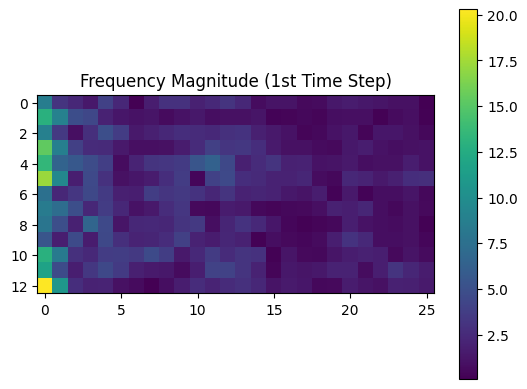

In [ ]:
# 调整维度为 (batch_size, height, width, channels)
trainY_auxiliary_images = trainY_auxiliary.transpose(0, 2, 3, 1)  # (7903, 22, 26, 50)
trainY_phase_images = trainY_phase.transpose(0, 2, 3, 1)          # (7903, 22, 26, 50)

print("Auxiliary images shape:", trainY_auxiliary_images.shape)  # 应为 (7903, 22, 26, 50)
print("Phase images shape:", trainY_phase_images.shape)          # 应为 (7903, 22, 26, 50)

# 可视化单个样本的图像
import matplotlib.pyplot as plt
plt.imshow(trainY_auxiliary_images[0, :, :, 0], cmap='viridis')  # 显示第一个样本的第一个时间步图像
plt.colorbar()
plt.title("Frequency Magnitude (1st Time Step)")
plt.show()


In [ ]:
def create_dataset(dataset, target_index, look_back=50, forecast_horizon=10, batch_size=1000, frame_length=50, frame_step=25):
    """
    生成时间序列数据及对应的频域图像特征
    """
    X, Y_primary, Y_auxiliary, Y_phase = [], [], [], []

    # 滑动窗口生成数据
    for i in range(len(dataset) - look_back - forecast_horizon + 1):
        X.append(dataset[i:(i + look_back), :])  # 滑动窗口数据
        Y_primary.append(dataset[(i + look_back):(i + look_back + forecast_horizon), target_index])  # 主目标
        Y_auxiliary.append(dataset[i:(i + look_back), :])  # 辅助输入

    # 转换为 NumPy 数组
    X = np.array(X, dtype=np.float32)  # 原始输入数据
    Y_primary = np.array(Y_primary, dtype=np.float32)
    Y_auxiliary = np.array(Y_auxiliary, dtype=np.float32)

    # 调试输出
    print(f"Shape of X: {X.shape}")
    print(f"Shape of Y_primary: {Y_primary.shape}")

    # 使用 STFT 生成频域特征和相位特征
    freq_images, phase_images = create_auxiliary_targets_in_batches(
        Y_auxiliary[:, :, target_index], batch_size=batch_size, frame_length=frame_length, frame_step=frame_step
    )

    freq_images =  freq_images.numpy()
    phase_images =  phase_images.numpy()

    # # 将频域特征和相位特征扩展为图像格式
    # freq_images = freq_images.reshape(freq_images.shape[0], freq_images.shape[1], freq_images.shape[2], 1)
    # phase_images = phase_images.reshape(phase_images.shape[0], phase_images.shape[1], phase_images.shape[2], 1)

    # 检查形状
    print(f"Shape of Frequency Images: {freq_images.shape}")
    print(f"Shape of Phase Images: {phase_images.shape}")

    # 将频域特征与相位特征添加到输入数据中
    X = np.concatenate([X, freq_images, phase_images], axis=-1)

    return X, Y_primary, freq_images, phase_images


In [ ]:
trainX, trainY_primary, train_freq_images, train_phase_images = create_dataset(
    train_data_scaled, target_index, look_back=50, forecast_horizon=10, frame_length=25, frame_step=10
)

testX, testY_primary, test_freq_images, test_phase_images = create_dataset(
    test_data_scaled, target_index, look_back=50, forecast_horizon=10, frame_length=25, frame_step=10
)

print(f"Train X Shape: {trainX.shape}")
print(f"Train Frequency Images Shape: {train_freq_images.shape}")
print(f"Train Phase Images Shape: {train_phase_images.shape}")
print(f"Train Y_primary Shape: {trainY_primary.shape}")


Shape of X: (7903, 50, 370)
Shape of Y_primary: (7903, 10, 2)
Shape of Frequency Images: (7903, 50, 0, 1)
Shape of Phase Images: (7903, 50, 0, 1)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 4 dimension(s)

In [ ]:
# 获取 "Close" 列的索引
target_index = combined_train_df.columns.get_loc("Close")

# 生成训练集和测试集
trainX, trainY_primary, train_freq_images, train_phase_images = create_dataset_with_images(
    train_data_scaled, target_index, look_back=50, forecast_horizon=10
)
testX, testY_primary, test_freq_images, test_phase_images = create_dataset_with_images(
    test_data_scaled, target_index, look_back=50, forecast_horizon=10
)


Shape of Input Features (X): (7903, 50, 370)
Shape of Frequency Images: (7903, 50, 0, 1)
Shape of Phase Images: (7903, 50, 0, 1)
Shape of Y_primary: (7903, 10, 2)
Shape of Input Features (X): (1925, 50, 370)
Shape of Frequency Images: (1925, 50, 0, 1)
Shape of Phase Images: (1925, 50, 0, 1)
Shape of Y_primary: (1925, 10, 2)


In [ ]:
import numpy as np
import tensorflow as tf
from pyts.image import GramianAngularField

# @tf.function
# def to_frequency_domain_stft(y, frame_length=50, frame_step=25):
#     """使用 STFT 将时间序列转换为频谱图"""
#     stft_result = tf.signal.stft(y, frame_length=frame_length, frame_step=frame_step, fft_length=frame_length)
#     magnitude_spectrum = tf.abs(stft_result)
#     return magnitude_spectrum

# @tf.function
# def to_frequency_domain_stft(y, frame_length=50, frame_step=25):
#     """使用 STFT 将时间序列转换为频谱图"""
#     stft_result = tf.signal.stft(y, frame_length=frame_length, frame_step=frame_step, fft_length=frame_length)
#     magnitude_spectrum = tf.abs(stft_result)  # 幅值
#     real_part = tf.math.real(stft_result)  # 实部
#     imag_part = tf.math.imag(stft_result)  # 虚部
#     phase_spectrum = tf.math.atan2(imag_part, real_part)  # 相位
#     return magnitude_spectrum, phase_spectrum

# 使用STFT计算频域特征，并提取相位信息
@tf.function
def to_frequency_domain_stft(y, frame_length=50, frame_step=25):
    # 使用TensorFlow的STFT计算频域特征
    stft_result = tf.signal.stft(y, frame_length=frame_length, frame_step=frame_step, fft_length=frame_length)

    # 取绝对值作为频域特征
    freq_magnitude = tf.abs(stft_result)

    # 手动计算相位角度 (使用实部和虚部的atan2)
    real_part = tf.math.real(stft_result)
    imag_part = tf.math.imag(stft_result)
    freq_phase = tf.math.atan2(imag_part, real_part)

    return freq_magnitude, freq_phase


def create_auxiliary_targets_in_batches(y, batch_size=500, frame_length=50, frame_step=25):
    num_batches = y.shape[0] // batch_size + 1
    freq_features = []
    phase_features = []

    for i in range(num_batches):
        # 在CPU上加载小批次数据
        batch_y = y[i * batch_size: (i + 1) * batch_size]
        # 将小批次数据传输到GPU并计算STFT
        batch_freq_features, batch_phase_features = to_frequency_domain_stft(tf.convert_to_tensor(batch_y), frame_length=frame_length, frame_step=frame_step)
        # print(batch_freq_features)

        # 将结果从GPU传回CPU
        freq_features.append(batch_freq_features.numpy())
        phase_features.append(batch_phase_features.numpy())

    return np.concatenate(freq_features, axis=0), np.concatenate(phase_features, axis=0)

def create_dataset_with_images(dataset, target_index, look_back=50, forecast_horizon=10, batch_size=1000, frame_length=50, frame_step=25, use_stft=True):
    """
    修复 STFT 图像生成问题
    """
    X, Y_primary, Y_auxiliary, Y_phase, X_images = [], [], [], [], []

    for i in range(len(dataset) - look_back - forecast_horizon + 1):
        # 提取时间序列窗口
        X_window = dataset[i:(i + look_back), :]
        Y_window = dataset[(i + look_back):(i + look_back + forecast_horizon), target_index]

        # 添加主任务和辅助任务数据
        X.append(X_window)
        Y_primary.append(Y_window)
        Y_auxiliary.append(X_window)

        # 检查 target_index 的形状
        if isinstance(target_index, (list, tuple, np.ndarray)):
            # 针对多列索引，取平均值或特定列
            X_window_target = X_window[:, target_index].mean(axis=1)  # 聚合为一维
        else:
            # 针对单列索引
            X_window_target = X_window[:, target_index].flatten()  # 转换为一维

        # 调整 frame_length 以匹配时间序列长度
        adjusted_frame_length = min(frame_length, len(X_window_target))

        # 跳过无效窗口
        if adjusted_frame_length <= 1:
            print(f"Skipping window {i}: insufficient length {len(X_window_target)}")
            continue

        # 生成 STFT 或 GAF 图像
        if use_stft:
            freq_magnitude, _ = to_frequency_domain_stft(
                X_window_target, frame_length=adjusted_frame_length, frame_step=frame_step
            )
            if freq_magnitude.shape[-1] == 0:
                print(f"Skipping invalid STFT output for window {i}")
                continue
            X_images.append(freq_magnitude.numpy())  # 保存幅值
        else:
            gaf_image = gaf.fit_transform(X_window_target.reshape(1, -1))[0]
            X_images.append(gaf_image)  # 保存 GAF 图像

    # 转换为 NumPy 数组
    X = np.array(X, dtype=np.float32)
    Y_primary = np.array(Y_primary, dtype=np.float32)
    Y_auxiliary = np.array(Y_auxiliary, dtype=np.float32)
    X_images = np.array(X_images, dtype=np.float32)

    # 计算辅助任务的频域特征和相位信息
    Y_auxiliary, Y_phase = create_auxiliary_targets_in_batches(Y_auxiliary, batch_size=batch_size, frame_length=frame_length, frame_step=frame_step)

    # 展平频域特征和相位信息
    freq_magnitude_expanded = Y_auxiliary.reshape(Y_auxiliary.shape[0], Y_auxiliary.shape[1], -1)  # (batch_size, time_steps, freq_features)
    phase_expanded = Y_phase.reshape(Y_phase.shape[0], Y_phase.shape[1], -1)  # (batch_size, time_steps, phase_features)

    # 将频域特征和相位信息添加到 X
    X = np.concatenate([X, freq_magnitude_expanded, phase_expanded], axis=-1)  # 在最后一维拼接特征

    return X, Y_primary, Y_auxiliary, Y_phase, X_images


In [ ]:
!pip install pyts

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 65.2 MB/s eta 0:00:00


In [ ]:
# 使用修改后的函数生成数据集
X, Y_primary, Y_auxiliary, Y_phase, X_images = create_dataset_with_images(
    dataset=train_data_scaled,
    target_index=combined_train_df.columns.get_loc("Close"),
    look_back=50,
    forecast_horizon=10,
    use_stft=True  # 或者设置为 False 使用 GAF
)

# 检查生成的图像形状
print(f"Shape of STFT/GAF Images: {X_images.shape}")


Shape of STFT/GAF Images: (7903, 1, 26)


In [ ]:
print(f"trainX shape: {trainX.shape}")
print(f"trainY_primary shape: {trainY_primary.shape}")
print(f"trainY_auxiliary shape: {trainY_auxiliary.shape}")
print(f"trainY_phase shape: {trainY_phase.shape}")


trainX shape: (713, 50, 2044)
trainY_primary shape: (713, 10, 4)
trainY_auxiliary shape: (713, 50, 26, 26)
trainY_phase shape: (713, 50, 26, 26)


In [ ]:
print(f"trainX shape: {trainX.shape}")
print(f"trainY_primary shape: {trainY_primary.shape}")
print(f"trainY_auxiliary shape: {trainY_auxiliary.shape}")
print(f"trainY_phase shape: {trainY_phase.shape}")


trainX shape: (79913, 50, 970)
trainY_primary shape: (79913, 10, 2)
trainY_auxiliary shape: (79913, 50, 12, 26)
trainY_phase shape: (79913, 50, 12, 26)


In [ ]:
df = combined_train_df
# 确保列名唯一
def deduplicate_columns(columns):
    seen = {}
    new_columns = []
    for col in columns:
        if col not in seen:
            seen[col] = 0
        else:
            seen[col] += 1
        new_columns.append(f"{col}_{seen[col]}" if seen[col] > 0 else col)
    return new_columns

# 应用去重逻辑
df.columns = deduplicate_columns(df.columns)

# 1. 提取所有 Granger 特征列名
granger_columns = [col for col in df.columns if 'granger' in col]

# 2. 获取 Granger 特征的列索引
granger_indices = [df.columns.get_loc(col) for col in granger_columns]

print("去重后的 Granger 特征列名:", granger_columns)
print("去重后的 Granger 特征索引:", granger_indices)


去重后的 Granger 特征列名: ['Close_granger_ssr_ftest_pval_lag_1', 'Close_granger_ssr_chi2test_pval_lag_1', 'Close_granger_lrtest_pval_lag_1', 'Close_granger_ssr_ftest_pval_lag_2', 'Close_granger_ssr_chi2test_pval_lag_2', 'Close_granger_lrtest_pval_lag_2', 'Close_granger_ssr_ftest_pval_lag_3', 'Close_granger_ssr_chi2test_pval_lag_3', 'Close_granger_lrtest_pval_lag_3', 'Close_granger_ssr_ftest_pval_lag_4', 'Close_granger_ssr_chi2test_pval_lag_4', 'Close_granger_lrtest_pval_lag_4', 'Close_granger_ssr_ftest_pval_lag_5', 'Close_granger_ssr_chi2test_pval_lag_5', 'Close_granger_lrtest_pval_lag_5', 'Close_granger_ssr_ftest_pval_lag_6', 'Close_granger_ssr_chi2test_pval_lag_6', 'Close_granger_lrtest_pval_lag_6', 'Close_granger_ssr_ftest_pval_lag_7', 'Close_granger_ssr_chi2test_pval_lag_7', 'Close_granger_lrtest_pval_lag_7', 'Close_granger_ssr_ftest_pval_lag_8', 'Close_granger_ssr_chi2test_pval_lag_8', 'Close_granger_lrtest_pval_lag_8', 'Close_granger_ssr_ftest_pval_lag_9', 'Close_granger_ssr_chi2test_pv

In [ ]:
from google.colab import files

# 保存为 CSV 文件
df.to_csv('original_df_PENDLEUSDT.csv', index=False)
# 下载到本地
files.download('original_df_PENDLEUSDT.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
from google.cloud import storage
import pickle

# 初始化 GCS 客户端
client = storage.Client()
# bucket_name = "artifacts.peak-equator-278210.appspot.com"
# bucket_name = '2f75d593-8e7b-4418-a5ba-cb2970f0b91e'  # 替换为你的存储桶名称
# bucket_name = 'cloud-ai-platform-bbd19d83-0559-4c3d-a34d-b2b748ab1d8c'
bucket_name = 'cloud-ai-platform-fe8ff3f8-38ad-4f4b-91e1-63966aa89201'
# bucket_name = 'colabbinanc'
bucket = client.get_bucket(bucket_name)

# 定义上传函数
def upload_to_gcs(local_file_path,  gcs_file_path):
    blob = bucket.blob(gcs_file_path)
    blob.upload_from_filename(local_file_path)
    print(f"File {local_file_path} uploaded to {gcs_file_path}.")

# 保存并上传训练和测试数据到 GCS
np.save("trainX.npy", trainX)
upload_to_gcs("trainX.npy", "path/to/trainX.npy")

np.save("trainY_primary.npy", trainY_primary)
upload_to_gcs("trainY_primary.npy", "path/to/trainY_primary.npy")

np.save("trainY_auxiliary.npy", trainY_auxiliary)
upload_to_gcs("trainY_auxiliary.npy", "path/to/trainY_auxiliary.npy")

np.save("trainY_phase.npy", trainY_phase)
upload_to_gcs("trainY_phase.npy", "path/to/trainY_phase.npy")

np.save("testX.npy", testX)
upload_to_gcs("testX.npy", "path/to/testX.npy")

np.save("testY_primary.npy", testY_primary)
upload_to_gcs("testY_primary.npy", "path/to/testY_primary.npy")

np.save("testY_auxiliary.npy", testY_auxiliary)
upload_to_gcs("testY_auxiliary.npy", "path/to/testY_auxiliary.npy")

np.save("testY_phase.npy", testY_phase)
upload_to_gcs("testY_phase.npy", "path/to/testY_phase.npy")

# 保存并上传 scalers_list 到 GCS
with open("scalers_list.pkl", "wb") as f:
    pickle.dump(scalers_list, f)  # 将 scalers_list 保存为 pkl 文件
upload_to_gcs("scalers_list.pkl", "path/to/scalers_list.pkl")  # 上传到 GCS

# 1. 保存 combined_train_df 和 combined_test_df 为 pickle 文件
combined_train_df.to_pickle("combined_train_df.pkl")
combined_test_df.to_pickle("combined_test_df.pkl")

# 2. 上传 pickle 文件到 GCS
upload_to_gcs("combined_train_df.pkl", "path/to/combined_train_df.pkl")
upload_to_gcs("combined_test_df.pkl", "path/to/combined_test_df.pkl")


File trainX.npy uploaded to path/to/trainX.npy.
File trainY_primary.npy uploaded to path/to/trainY_primary.npy.
File trainY_auxiliary.npy uploaded to path/to/trainY_auxiliary.npy.
File trainY_phase.npy uploaded to path/to/trainY_phase.npy.
File testX.npy uploaded to path/to/testX.npy.
File testY_primary.npy uploaded to path/to/testY_primary.npy.
File testY_auxiliary.npy uploaded to path/to/testY_auxiliary.npy.
File testY_phase.npy uploaded to path/to/testY_phase.npy.
File scalers_list.pkl uploaded to path/to/scalers_list.pkl.
File combined_train_df.pkl uploaded to path/to/combined_train_df.pkl.
File combined_test_df.pkl uploaded to path/to/combined_test_df.pkl.


In [ ]:
!gcloud storage buckets add-iam-policy-binding gs://cloud-ai-platform-bbd19d83-0559-4c3d-a34d-b2b748ab1d8c \
    --member="user:wkai8474@gmail.com" \
    --role="roles/storage.admin"


bindings:
- members:
  - projectEditor:peak-equator-278210
  - user:chiquipardlo@gmail.com
  - user:wkai8474@gmail.com
  - user:xiaopeng.zhang.fr@gmail.com
  role: roles/storage.admin
- members:
  - projectOwner:peak-equator-278210
  role: roles/storage.legacyBucketOwner
- members:
  - projectViewer:peak-equator-278210
  role: roles/storage.legacyBucketReader
etag: CAU=
kind: storage#policy
resourceId: projects/_/buckets/cloud-ai-platform-bbd19d83-0559-4c3d-a34d-b2b748ab1d8c
version: 1


In [ ]:
!gcloud projects list
!gcloud config set project peak-equator-278210


PROJECT_ID           NAME              PROJECT_NUMBER
instant-land-278210  My First Project  44933004017
peak-equator-278210  My First Project  450169284255
Updated property [core/project].


In [ ]:
!gcloud config list
!gcloud storage buckets list


[component_manager]
disable_update_check = True
[compute]
gce_metadata_read_timeout_sec = 0
[core]
account = wkai8474@gmail.com
project = peak-equator-278210

Your active configuration is: [default]
---
creation_time: 2024-07-16T13:45:51+0000
default_storage_class: STANDARD
generation: 1721137548299841405
location: ASIA
location_type: multi-region
metageneration: 1
name: 2f75d593-8e7b-4418-a5ba-cb2970f0b91e
public_access_prevention: enforced
rpo: DEFAULT
soft_delete_policy:
  effectiveTime: '2024-07-16T13:45:51.203000+00:00'
  retentionDurationSeconds: '604800'
storage_url: gs://2f75d593-8e7b-4418-a5ba-cb2970f0b91e/
uniform_bucket_level_access: true
update_time: 2024-07-16T13:45:51+0000
---
acl:
- entity: project-owners-450169284255
  projectTeam:
    projectNumber: '450169284255'
    team: owners
  role: OWNER
- entity: project-editors-450169284255
  projectTeam:
    projectNumber: '450169284255'
    team: editors
  role: OWNER
- entity: project-viewers-450169284255
  projectTeam:
   

In [ ]:
!gcloud auth login


Go to the following link in your browser, and complete the sign-in prompts:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=cMiD408n3FxZoXv7QGWrIsGYluH9Jc&prompt=consent&token_usage=remote&access_type=offline&code_challenge=3If4i4gxk2X6vdcGzuzT4qRuy9mafzcbnOyQDO-SSDc&code_challenge_method=S256

Once finished, enter the verification code provided in your browser: 4/0AanRRrs2nFV6qMTZ5vncnG8tXrlKnH71S6Za1YKeidzhvpu9O_pRasEZgfcVu_Xl8vTxsQ

You are now logged in as [wkai8474@gmail.com].
Your current project is 

In [ ]:
# %%writefile main.py
import pandas as pd
from google.cloud import storage
import tensorflow as tf
import pickle


import concurrent.futures
import numpy as np
from google.cloud import storage

trainX = np.load("trainX.npy", mmap_mode='r').astype(np.float16)
trainY_primary = np.load("trainY_primary.npy", mmap_mode='r').astype(np.float16)
trainY_auxiliary = np.load("trainY_auxiliary.npy", mmap_mode='r').astype(np.float16)
trainY_phase = np.load("trainY_phase.npy", mmap_mode='r').astype(np.float16)
testX = np.load("testX.npy", mmap_mode='r').astype(np.float16)
testY_primary = np.load("testY_primary.npy", mmap_mode='r').astype(np.float16)
testY_auxiliary = np.load("testY_auxiliary.npy", mmap_mode='r').astype(np.float16)
testY_phase = np.load("testY_phase.npy", mmap_mode='r').astype(np.float16)

# 加载 .pkl 文件（scalers_list）
with open("scalers_list.pkl", "rb") as f:
    scalers_list = pickle.load(f)  # 读取并加载 scalers_list

# 2. 读取本地的 pickle 文件为 DataFrame
combined_train_df = pd.read_pickle("combined_train_df.pkl")
combined_test_df = pd.read_pickle("combined_test_df.pkl")

# 打印数据框确认读取是否成功
print(combined_train_df)
print(combined_test_df)
df = combined_test_df

         index      Open      High       Low     Close    Volume  \
0    -1.000000  0.656410  0.630573  0.641221  0.636829 -0.951800   
1    -0.999799  0.635897  0.610191  0.590331  0.616368 -0.852081   
2    -0.999599  0.615385  0.589809  0.595420  0.578005 -0.947932   
3    -0.999398  0.576923  0.561783  0.580153  0.565217 -0.945344   
4    -0.999197  0.561538  0.559236  0.572519  0.552430 -0.973376   
...        ...       ...       ...       ...       ...       ...   
7957  0.596989 -0.148718 -0.169427 -0.124682 -0.148338 -0.998720   
7958  0.597190 -0.148718 -0.161783 -0.122137 -0.143223 -0.989803   
7959  0.597391 -0.148718 -0.164331 -0.122137 -0.145780 -0.996904   
7960  0.597592 -0.151282 -0.171975 -0.134860 -0.156010 -0.994389   
7961  0.597792 -0.156410 -0.156688 -0.129771 -0.135550 -0.991102   

      Quote Asset Volume  Number of Trades  Taker Buy Base Asset Volume  \
0              -0.947557         -0.927565                    -0.981829   
1              -0.839635         

In [ ]:
# %%writefile mnist_setup.py

import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Add, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Input, Dense, Add, Flatten, Reshape
from tensorflow.keras.layers import Input, Conv1D,Conv2D,Conv3D, BatchNormalization, RepeatVector, TimeDistributed, Dense, LSTM, Add, MultiHeadAttention, LayerNormalization, Dropout,Reshape
from tensorflow.keras.models import Sequential


tf.config.optimizer.set_jit(True)

# 检查GPU
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Add, Reshape


# # N-BEATS Block
# class NBeatsBlock(tf.keras.layers.Layer):
#     def __init__(self, input_size, forecast_size, units, n_layers, **kwargs):
#         super(NBeatsBlock, self).__init__(**kwargs)
#         self.units = units
#         self.n_layers = n_layers

#         # 全连接层堆叠
#         self.fc_layers = [Dense(units, activation='relu') for _ in range(n_layers)]

#         # 输出预测和残差的全连接层
#         self.backcast_fc = Dense(input_size * 173, activation='linear')  # 50 * 173
#         self.forecast_fc = Dense(forecast_size, activation='linear')  # 10 * 1

#     def call(self, inputs):
#         # 展平输入
#         x = Flatten()(inputs)

#         for fc in self.fc_layers:
#             x = fc(x)

#         # 预测backcast（用于残差）和 forecast（用于预测）
#         backcast = self.backcast_fc(x)
#         forecast = self.forecast_fc(x)

#         # 将backcast和forecast重新调整回目标形状
#         backcast = Reshape((inputs.shape[1], inputs.shape[2]))(backcast)  # Reshape to (50, 173)
#         forecast = Reshape((10, 1))(forecast)  # Reshape to (10, 1)

#         return backcast, forecast


# # N-BEATS模型
# def NBeats(input_size, forecast_size, n_blocks=3, n_layers=4, units=128):
#     inputs = Input(shape=(input_size, 173))  # 这里的输入形状是 (50, 173)

#     # 堆叠块
#     backcast = inputs
#     forecasts = []
#     backcasts = []

#     for _ in range(n_blocks):
#         block = NBeatsBlock(input_size=input_size, forecast_size=forecast_size, units=units, n_layers=n_layers)
#         backcast_pred, forecast = block(backcast)

#         # 直接更新backcast为残差
#         backcast = backcast - backcast_pred

#         # 存储每个块的预测
#         forecasts.append(forecast)
#         backcasts.append(backcast_pred)

#     # # 汇总各个块的预测
#     # final_forecast = Add()(forecasts)  # Shape (10, 1)
#     # final_backcast = Add()(backcasts)  # Shape (50, 173)

#     # # 定义多个输出
#     # model = Model(inputs=inputs, outputs={'primary_output': final_forecast, 'auxiliary_output': final_backcast})

#     # 汇总各个块的预测
#     final_forecast = Lambda(lambda x: x, name='primary_output')(Add()(forecasts))  # Shape (10, 1)
#     final_backcast = Lambda(lambda x: x, name='auxiliary_output')(Add()(backcasts))  # Shape (50, 173)

#     # 定义多个输出
#     model = Model(inputs=inputs, outputs={'primary_output': final_forecast, 'auxiliary_output': final_backcast})

#     return model

class ConditionalDropout(tf.keras.layers.Layer):
    def __init__(self, initial_rate=0.5, **kwargs):
        super(ConditionalDropout, self).__init__(**kwargs)
        self.initial_rate = initial_rate  # 初始的 Dropout 比例

    def call(self, inputs, training=False):
        # 计算输入特征的均值
        input_mean = tf.reduce_mean(inputs)

        # 根据输入均值动态调整 Dropout 比例
        dropout_rate = self.initial_rate * (1.0 / (1.0 + input_mean))

        # 使用 Keras 内置的 Dropout，并根据动态比例应用
        return tf.keras.layers.Dropout(dropout_rate)(inputs, training=training)

class ConditionalNormalization(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(ConditionalNormalization, self).__init__(**kwargs)
        self.batch_norm = BatchNormalization()
        self.layer_norm = LayerNormalization()

    def call(self, inputs, training=False):
        # 假设条件基于输入特征的均值
        condition = tf.reduce_mean(inputs, axis=-1, keepdims=True)

        # 使用简单的条件逻辑来决定使用哪种归一化策略
        threshold = 0.5  # 你可以根据任务需求调整这个阈值
        use_batch_norm = tf.reduce_mean(condition) > threshold

        # 根据条件动态选择 BatchNormalization 或 LayerNormalization
        if use_batch_norm:
            return self.batch_norm(inputs, training=training)
        else:
            return self.layer_norm(inputs)

# # N-BEATS Block with ConditionalDropout
# class NBeatsBlock(tf.keras.layers.Layer):
#     def __init__(self, input_size, forecast_size, units, n_layers, dropout_rate=0.5, **kwargs):
#         super(NBeatsBlock, self).__init__(**kwargs)
#         self.units = units
#         self.n_layers = n_layers
#         self.dropout = ConditionalDropout(initial_rate=dropout_rate)  # Conditional dropout layer

#         # Fully connected layers
#         self.fc_layers = [Dense(units, activation='relu') for _ in range(n_layers)]

#         # Output layers for backcast (residual) and forecast
#         self.backcast_fc = Dense(input_size * 173, activation='linear')  # Backcast output
#         self.forecast_fc = Dense(forecast_size, activation='linear')  # Forecast output

#     def call(self, inputs, training=False):
#         # Flatten the inputs
#         x = Flatten()(inputs)

#         for fc in self.fc_layers:
#             x = fc(x)
#             x = self.dropout(x, training=training)  # Apply conditional dropout after each layer

#         # Predict backcast (residual) and forecast
#         backcast = self.backcast_fc(x)
#         forecast = self.forecast_fc(x)

#         # Reshape the outputs back to their original shape
#         backcast = Reshape((inputs.shape[1], inputs.shape[2]))(backcast)  # (50, 173)
#         forecast = Reshape((10, 1))(forecast)  # (10, 1)

#         return backcast, forecast


# # N-BEATS model with ConditionalDropout in each block
# def NBeats(input_size, forecast_size, n_blocks=3, n_layers=4, units=128, dropout_rate=0.5):
#     inputs = Input(shape=(input_size, 173))  # Input shape is (50, 173)

#     # Initialize backcast and create lists to store forecasts and backcasts
#     backcast = inputs
#     forecasts = []
#     backcasts = []

#     for _ in range(n_blocks):
#         block = NBeatsBlock(input_size=input_size, forecast_size=forecast_size, units=units, n_layers=n_layers, dropout_rate=dropout_rate)
#         backcast_pred, forecast = block(backcast)

#         # Update backcast to be the residual
#         backcast = backcast - backcast_pred

#         # Store the forecast and backcast predictions
#         forecasts.append(forecast)
#         backcasts.append(backcast_pred)

#     # Combine forecasts and backcasts
#     final_forecast = Lambda(lambda x: x, name='primary_output')(Add()(forecasts))  # Final forecast (10, 1)
#     # final_backcast = Lambda(lambda x: x, name='auxiliary_output')(Add()(backcasts))  # Final backcast (50, 173)
#     final_backcast = Lambda(lambda x: x[:, :input_size // 2, :], name='auxiliary_output')(Add()(backcasts))  # Shape (25, 173)

#     # Define the model with two outputs
#     model = Model(inputs=inputs, outputs={'primary_output': final_forecast, 'auxiliary_output': final_backcast})

#     return model


import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input, Add, Lambda, Reshape
from tensorflow.keras.models import Model

# # N-BEATS Block with ConditionalDropout
# class NBeatsBlock(tf.keras.layers.Layer):
#     def __init__(self, input_size, forecast_size, units, n_layers, dropout_rate=0.5, **kwargs):
#         super(NBeatsBlock, self).__init__(**kwargs)
#         self.units = units
#         self.n_layers = n_layers

#         # Fully connected layers
#         self.fc_layers = [Dense(units, activation='relu') for _ in range(n_layers)]

#         # Output layers for backcast (residual) and forecast
#         self.backcast_fc = Dense(input_size * 173, activation='linear')  # Backcast output
#         self.forecast_fc = Dense(forecast_size, activation='linear')  # Forecast output

#     def call(self, inputs, training=False):
#         # Flatten the inputs
#         x = Flatten()(inputs)

#         for fc in self.fc_layers:
#             x = fc(x)

#         # Predict backcast (residual) and forecast
#         backcast = self.backcast_fc(x)
#         forecast = self.forecast_fc(x)

#         # Reshape the outputs back to their original shape
#         backcast = Reshape((inputs.shape[1], 173))(backcast)  # (50, 173)
#         forecast = Reshape((10, 1))(forecast)  # (10, 1)

#         return backcast, forecast


# # N-BEATS model with ConditionalDropout in each block
# def NBeats(input_size, forecast_size, auxiliary_shape, n_blocks=3, n_layers=4, units=128, dropout_rate=0.5):
#     inputs = Input(shape=(input_size, 173))  # Input shape is (50, 173)

#     # Initialize backcast and create lists to store forecasts and backcasts
#     backcast = inputs
#     forecasts = []
#     backcasts = []

#     for _ in range(n_blocks):
#         block = NBeatsBlock(input_size=input_size, forecast_size=forecast_size, units=units, n_layers=n_layers, dropout_rate=dropout_rate)
#         backcast_pred, forecast = block(backcast)

#         # Update backcast to be the residual
#         backcast = backcast - backcast_pred

#         # Store the forecast and backcast predictions
#         forecasts.append(forecast)

#         # Reshape backcast_pred to match the auxiliary shape directly before appending
#         reshaped_backcast = Dense(np.prod(auxiliary_shape))(Flatten()(backcast_pred))  # Flatten and project to correct shape
#         reshaped_backcast = Reshape(auxiliary_shape)(reshaped_backcast)
#         backcasts.append(reshaped_backcast)

#     # Combine forecasts and backcasts
#     final_forecast = Lambda(lambda x: x, name='primary_output')(Add()(forecasts))
#     final_backcast = Lambda(lambda x: x, name='auxiliary_output')(Add()(backcasts))

#     # Define the model with two outputs
#     model = Model(inputs=inputs, outputs={'primary_output': final_forecast, 'auxiliary_output': final_backcast})

#     return model

# class NBeatsBlock(tf.keras.layers.Layer):
#     def __init__(self, input_size, forecast_size, units, n_layers, dropout_rate=0.5, auxiliary_shape=None, phase_shape=None, **kwargs):
#         super(NBeatsBlock, self).__init__(**kwargs)
#         self.units = units
#         self.n_layers = n_layers
#         self.auxiliary_shape = auxiliary_shape  # 形状更新为辅助输出
#         self.phase_shape = phase_shape  # 形状更新为相位输出

#         # Fully connected layers
#         self.fc_layers = [Dense(units, activation='relu') for _ in range(n_layers)]

#         # Output layers for backcast (residual) and forecast
#         self.backcast_fc = Dense(input_size * 345, activation='linear')  # Backcast output
#         self.forecast_fc = Dense(forecast_size, activation='linear')  # Forecast output

#         # Additional layers for auxiliary and phase output
#         self.auxiliary_fc = Dense(np.prod(auxiliary_shape), activation='linear') if auxiliary_shape else None
#         self.phase_fc = Dense(np.prod(phase_shape), activation='linear') if phase_shape else None

#     def call(self, inputs, training=False):
#         # Flatten the inputs
#         x = Flatten()(inputs)

#         for fc in self.fc_layers:
#             x = fc(x)

#         # Predict backcast (residual) and forecast
#         backcast = self.backcast_fc(x)
#         forecast = self.forecast_fc(x)

#         # Reshape the outputs back to their original shape
#         backcast = Reshape((inputs.shape[1], 345))(backcast)  # (50, 173)
#         forecast = Reshape((10, 1))(forecast)  # (10, 1)

#         # Optional: reshape for auxiliary and phase outputs
#         auxiliary_output = None
#         if self.auxiliary_fc:
#             auxiliary_output = self.auxiliary_fc(x)
#             auxiliary_output = Reshape(self.auxiliary_shape)(auxiliary_output)

#         phase_output = None
#         if self.phase_fc:
#             phase_output = self.phase_fc(x)
#             phase_output = Reshape(self.phase_shape)(phase_output)

#         return backcast, forecast, auxiliary_output, phase_output


# def NBeats(input_size, forecast_size, auxiliary_shape, phase_shape, n_blocks=3, n_layers=4, units=128, dropout_rate=0.5):
#     inputs = Input(shape=(input_size, 345))  # Input shape is (50, 173)

#     # Initialize backcast and create lists to store forecasts, backcasts, auxiliary outputs, and phase outputs
#     backcast = inputs
#     forecasts = []
#     backcasts = []
#     auxiliary_outputs = []
#     phase_outputs = []

#     for _ in range(n_blocks):
#         block = NBeatsBlock(input_size=input_size, forecast_size=forecast_size, units=units, n_layers=n_layers, dropout_rate=dropout_rate,
#                             auxiliary_shape=auxiliary_shape, phase_shape=phase_shape)
#         backcast_pred, forecast, auxiliary_output, phase_output = block(backcast)

#         # Update backcast to be the residual
#         backcast = backcast - backcast_pred

#         # Store the forecast and backcast predictions
#         forecasts.append(forecast)

#         # Reshape backcast_pred to match the auxiliary and phase shapes directly before appending
#         if auxiliary_output is not None:
#             auxiliary_outputs.append(auxiliary_output)

#         if phase_output is not None:
#             phase_outputs.append(phase_output)

#     # Combine forecasts, auxiliary outputs, and phase outputs
#     final_forecast = Lambda(lambda x: x, name='primary_output')(Add()(forecasts))
#     final_auxiliary = Lambda(lambda x: x, name='auxiliary_output')(Add()(auxiliary_outputs))
#     final_phase = Lambda(lambda x: x, name='phase_output')(Add()(phase_outputs))

#     # Define the model with three outputs
#     model = Model(inputs=inputs, outputs={'primary_output': final_forecast, 'auxiliary_output': final_auxiliary, 'phase_output': final_phase})

#     return model

class VAE(tf.keras.layers.Layer):
    def __init__(self, latent_dim, original_dim, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.latent_dim = latent_dim
        self.original_dim = original_dim

        # 编码器：从输入编码到潜在空间
        self.encoder = Sequential([
            Flatten(),
            Dense(128, activation='relu'),
            Dense(64, activation='relu'),
            Dense(self.latent_dim + self.latent_dim)  # 均值和方差
        ])

        # 解码器：从潜在空间解码为原始维度
        self.decoder = Sequential([
            Dense(64, activation='relu'),
            Dense(128, activation='relu'),
            Dense(np.prod(self.original_dim), activation='linear'),
            Reshape(self.original_dim)
        ])

    def call(self, inputs):
        # 编码为潜在空间 (z_mean, z_log_var)
        z_mean_log_var = self.encoder(inputs)
        z_mean = z_mean_log_var[:, :self.latent_dim]
        z_log_var = z_mean_log_var[:, self.latent_dim:]

        # 采样潜在空间的z
        epsilon = tf.random.normal(shape=tf.shape(z_mean))
        z = z_mean + tf.exp(0.5 * z_log_var) * epsilon

        # 解码为输出
        reconstructed = self.decoder(z)

        # 返回重建结果和 KL 散度的相关参数
        return reconstructed, z_mean, z_log_var

from tensorflow.keras.layers import Activation

# class NBeatsBlock(tf.keras.layers.Layer):
#     def __init__(self, input_size, forecast_size, units, n_layers, dropout_rate=0.5, auxiliary_shape=None, phase_shape=None, use_vae=False, latent_dim=16, **kwargs):
#         super(NBeatsBlock, self).__init__(**kwargs)
#         self.units = units
#         self.n_layers = n_layers
#         self.auxiliary_shape = auxiliary_shape
#         self.phase_shape = phase_shape
#         self.use_vae = use_vae
#         self.dropout_rate = dropout_rate

#         from tensorflow.keras.models import Sequential
#         from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten

#         # # CNN卷积层来处理STFT特征, 加入ReLU激活函数
#         # self.cnn = Sequential([
#         #     Conv1D(filters=64, kernel_size=3, activation=None, padding='same'),  # 去掉直接定义的activation
#         #     Activation('relu'),  # 在后面显式加入ReLU
#         #     Conv1D(filters=32, kernel_size=3, activation=None, padding='same'),
#         #     Activation('relu'),  # 同样在卷积层后面加入ReLU
#         #     Flatten()
#         # ])

#         # # 假设输入数据形状为 (50, 433, 2)，即 (时间步数, 特征数, 通道数)
#         # self.cnn = Sequential([
#         #     Conv2D(filters=64, kernel_size=(3, 3), activation=None, padding='same'),
#         #     Activation('relu'),
#         #     Conv2D(filters=32, kernel_size=(3, 3), activation=None, padding='same'),
#         #     Activation('relu'),
#         #     Flatten()
#         # ])

#         self.cnn = Sequential([
#           Conv2D(filters=32, kernel_size=(3, 3), strides=(2, 2), padding='same'),
#           # BatchNormalization(),  # Add BatchNormalization here
#           Activation('relu'),
#           MaxPooling2D(pool_size=(2, 2)),  # Reduces spatial dimensions by 2x
#           ConditionalDropout(initial_rate=dropout_rate),  # 在 CNN 中加入条件性 Dropout


#           Conv2D(filters=16, kernel_size=(3, 3), strides=(2, 2), padding='same'),
#           # BatchNormalization(),  # Add BatchNormalization here
#           Activation('relu'),
#           MaxPooling2D(pool_size=(2, 2)),  # Further reduces spatial dimensions by 2x
#           ConditionalDropout(initial_rate=dropout_rate),  # 在 CNN 中加入条件性 Dropout


#           Flatten()
#       ])


#         # 全连接层, 在每一层加入ReLU激活函数
#         self.fc_layers = [Sequential([Dense(units), Activation('relu'),ConditionalDropout(initial_rate=dropout_rate)]) for _ in range(n_layers)]

#         # Output layers for backcast (residual) and forecast
#         self.backcast_fc = Dense(input_size * 409, activation='linear')  # 输出层依然使用线性激活
#         self.forecast_fc = Dense(forecast_size, activation='linear')  # 输出层依然使用线性激活

#         # VAE 部分
#         if use_vae:
#             self.auxiliary_vae = VAE(latent_dim=latent_dim, original_dim=auxiliary_shape) if auxiliary_shape else None
#             self.phase_vae = VAE(latent_dim=latent_dim, original_dim=phase_shape) if phase_shape else None
#         else:
#             self.auxiliary_fc = Dense(np.prod(auxiliary_shape), activation='linear') if auxiliary_shape else None
#             self.phase_fc = Dense(np.prod(phase_shape), activation='linear') if phase_shape else None

#     # def call(self, inputs):
#     #     # 使用CNN处理输入特征（包括时域和STFT特征）
#     #     x = tf.expand_dims(inputs, axis=-1)

#     #     x = self.cnn(x)

#     #     # 经过全连接层，ReLU激活函数已经在全连接层后加入
#     #     for fc in self.fc_layers:
#     #         x = fc(x)

#     #     # Predict backcast (residual) and forecast
#     #     backcast = self.backcast_fc(x)
#     #     forecast = self.forecast_fc(x)

#     #     backcast = Reshape((inputs.shape[1], 345))(backcast)
#     #     forecast = Reshape((10, 1))(forecast)

#     #     # VAE for auxiliary and phase outputs
#     #     auxiliary_output = None
#     #     phase_output = None
#     #     kl_loss = 0  # 初始化 KL 损失

#     #     if self.use_vae:
#     #         if self.auxiliary_vae:
#     #             auxiliary_output, z_mean_aux, z_log_var_aux = self.auxiliary_vae(x)
#     #             kl_loss += vae_kl_loss(z_mean_aux, z_log_var_aux)

#     #         if self.phase_vae:
#     #             phase_output, z_mean_phase, z_log_var_phase = self.phase_vae(x)
#     #             kl_loss += vae_kl_loss(z_mean_phase, z_log_var_phase)
#     #     else:
#     #         if self.auxiliary_fc:
#     #             auxiliary_output = self.auxiliary_fc(x)
#     #             auxiliary_output = Reshape(self.auxiliary_shape)(auxiliary_output)

#     #         if self.phase_fc:
#     #             phase_output = self.phase_fc(x)
#     #             phase_output = Reshape(self.phase_shape)(phase_output)

#     #     return backcast, forecast, auxiliary_output, phase_output, kl_loss

#     def call(self, inputs):
#         x = tf.expand_dims(inputs, axis=-1)
#         # 使用CNN处理输入特征（包括时域和STFT特征）
#         x = self.cnn(x)

#         # 经过全连接层，ReLU激活函数已经在全连接层后加入
#         for fc in self.fc_layers:
#             x = fc(x)

#         # Predict backcast (residual) and forecast
#         backcast = self.backcast_fc(x)
#         forecast = self.forecast_fc(x)

#         backcast = Reshape((inputs.shape[1], 409))(backcast)
#         forecast = Reshape((10, 1))(forecast)

#         # VAE for auxiliary and phase outputs
#         auxiliary_output = None
#         phase_output = None
#         kl_loss = tf.constant(0.0)  # 使用 TensorFlow 常量初始化 KL 损失

#         if self.use_vae:
#             if self.auxiliary_vae:
#                 auxiliary_output, z_mean_aux, z_log_var_aux = self.auxiliary_vae(x)
#                 kl_loss += vae_kl_loss(z_mean_aux, z_log_var_aux)

#             if self.phase_vae:
#                 phase_output, z_mean_phase, z_log_var_phase = self.phase_vae(x)
#                 kl_loss += vae_kl_loss(z_mean_phase, z_log_var_phase)
#         else:
#             if self.auxiliary_fc:
#                 auxiliary_output = self.auxiliary_fc(x)
#                 auxiliary_output = Reshape(self.auxiliary_shape)(auxiliary_output)

#             if self.phase_fc:
#                 phase_output = self.phase_fc(x)
#                 phase_output = Reshape(self.phase_shape)(phase_output)

#         return backcast, forecast, auxiliary_output, phase_output, kl_loss


class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self, input_size, forecast_size, units, n_layers, dropout_rate=0.5, auxiliary_shape=None, phase_shape=None, use_vae=False, latent_dim=16, **kwargs):
        super(NBeatsBlock, self).__init__(**kwargs)
        self.units = units
        self.n_layers = n_layers
        self.auxiliary_shape = auxiliary_shape
        self.phase_shape = phase_shape
        self.use_vae = use_vae
        self.dropout_rate = dropout_rate

        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten


        # # CNN卷积层来处理STFT特征
        # self.cnn = Sequential([
        #     Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same'),
        #     Activation('relu'),
        #     MaxPooling2D(pool_size=(2, 2)),
        #     # ConditionalDropout(initial_rate=dropout_rate),
        #     Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='same'),
        #     Activation('relu'),
        #     MaxPooling2D(pool_size=(2, 2)),
        #     # ConditionalDropout(initial_rate=dropout_rate),
        #     Flatten()
        # ])

        self.cnn = Sequential([
          Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(2, 2)),
          Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(2, 2)),
          # ConditionalDropout(initial_rate=dropout_rate),
          Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(2, 2)),
          Flatten()
      ])

        # from tensorflow.keras.models import Sequential
        # from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten

        # self.cnn = Sequential([
        #     Conv3D(filters=32, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'),
        #     MaxPooling3D(pool_size=(2, 2, 2)),
        #     Conv3D(filters=16, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'),
        #     MaxPooling3D(pool_size=(2, 2, 2)),
        #     Conv3D(filters=8, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'),
        #     MaxPooling3D(pool_size=(2, 2, 2)),
        #     Flatten()
        # ])




        # 全连接层，加入 ReLU 激活和条件性 Dropout
        # self.fc_layers = [Sequential([Dense(units), Activation('relu'), ConditionalDropout(initial_rate=dropout_rate)]) for _ in range(n_layers)]
        self.fc_layers = [Dense(units, activation='relu') for _ in range(n_layers)]

        # 添加 ConditionalNormalization 层
        # self.conditional_norm = ConditionalNormalization()

        # Output layers for backcast (residual) and forecast
        self.backcast_fc = Dense(input_size * 409, activation='linear')
        self.forecast_fc = Dense(forecast_size, activation='linear')

        # VAE 部分
        if use_vae:
            self.auxiliary_vae = VAE(latent_dim=latent_dim, original_dim=auxiliary_shape) if auxiliary_shape else None
            self.phase_vae = VAE(latent_dim=latent_dim, original_dim=phase_shape) if phase_shape else None
        else:
            self.auxiliary_fc = Dense(np.prod(auxiliary_shape), activation='linear') if auxiliary_shape else None
            self.phase_fc = Dense(np.prod(phase_shape), activation='linear') if phase_shape else None

    def call(self, inputs):
        # 使用 CNN 处理输入特征
        x = tf.expand_dims(inputs, axis=-1)
        # 添加两个维度，确保输入为 5D
        # x = tf.expand_dims(x, axis=1)  # 添加 depth 维度
        # x = tf.tile(x, [1, 8, 1, 1, 1])  # 将 depth 从 1 扩展到 4


        # print(f"Input shape before expand_dims: {inputs.shape}")
        # print(f"Shape after adding depth: {x.shape}")


        x = self.cnn(x)

        # 应用 ConditionalNormalization
        # x = self.conditional_norm(x)

        # 经过全连接层，ReLU 激活函数已经在全连接层后加入
        for fc in self.fc_layers:
            x = fc(x)

        # 预测 backcast 和 forecast
        backcast = self.backcast_fc(x)
        forecast = self.forecast_fc(x)

        # Reshape
        backcast = Reshape((inputs.shape[1], 409))(backcast)
        forecast = Reshape((10, 1))(forecast)

        # VAE 处理辅助输出和相位输出
        auxiliary_output, phase_output, kl_loss = None, None, tf.constant(0.0)
        if self.use_vae:
            if self.auxiliary_vae:
                auxiliary_output, z_mean_aux, z_log_var_aux = self.auxiliary_vae(x)
                kl_loss += vae_kl_loss(z_mean_aux, z_log_var_aux)
            if self.phase_vae:
                phase_output, z_mean_phase, z_log_var_phase = self.phase_vae(x)
                kl_loss += vae_kl_loss(z_mean_phase, z_log_var_phase)
        else:
            if self.auxiliary_fc:
                auxiliary_output = self.auxiliary_fc(x)
                auxiliary_output = Reshape(self.auxiliary_shape)(auxiliary_output)
            if self.phase_fc:
                phase_output = self.phase_fc(x)
                phase_output = Reshape(self.phase_shape)(phase_output)

        return backcast, forecast, auxiliary_output, phase_output, kl_loss


# from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Add

# class NBeatsBlock(tf.keras.layers.Layer):
#     def __init__(self, input_size, forecast_size, units, n_layers, dropout_rate=0.5,
#                  auxiliary_shape=None, phase_shape=None, use_vae=False, latent_dim=16,
#                  num_heads=4, key_dim=64, **kwargs):
#         super(NBeatsBlock, self).__init__(**kwargs)
#         self.units = units
#         self.n_layers = n_layers
#         self.auxiliary_shape = auxiliary_shape
#         self.phase_shape = phase_shape
#         self.use_vae = use_vae
#         self.dropout_rate = dropout_rate

#         from tensorflow.keras.layers import Conv3D, MaxPooling3D

#         # 3D卷积层来处理3D的STFT特征
#         self.cnn = Sequential([
#             Conv3D(filters=32, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same'),
#             Activation('relu'),
#             MaxPooling3D(pool_size=(2, 2, 2)),
#             # ConditionalDropout(initial_rate=dropout_rate),
#             Conv3D(filters=16, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same'),
#             Activation('relu'),
#             MaxPooling3D(pool_size=(2, 2, 2)),
#             # ConditionalDropout(initial_rate=dropout_rate),
#             Flatten()
#         ])

#         # Multi-Head Attention层
#         self.multi_head_attention = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)
#         self.attention_norm = LayerNormalization()

#         # 全连接层
#         self.fc_layers = [Sequential([Dense(units), Activation('relu'), ConditionalDropout(initial_rate=dropout_rate)])
#                           for _ in range(n_layers)]
#         self.conditional_norm = ConditionalNormalization()

#         # 输出层
#         self.backcast_fc = Dense(input_size * 371, activation='linear')
#         self.forecast_fc = Dense(forecast_size, activation='linear')

#         # VAE 部分
#         if use_vae:
#             self.auxiliary_vae = VAE(latent_dim=latent_dim, original_dim=auxiliary_shape) if auxiliary_shape else None
#             self.phase_vae = VAE(latent_dim=latent_dim, original_dim=phase_shape) if phase_shape else None
#         else:
#             self.auxiliary_fc = Dense(np.prod(auxiliary_shape), activation='linear') if auxiliary_shape else None
#             self.phase_fc = Dense(np.prod(phase_shape), activation='linear') if phase_shape else None

#     def call(self, inputs):
#         # 使用 CNN 处理输入特征
#         x = tf.expand_dims(inputs, axis=-1)
#         x = self.cnn(x)

#         # 将输出扩展回原始时间步长维度
#         x = tf.expand_dims(x, axis=1)

#         # Multi-Head Attention
#         attn_output = self.multi_head_attention(x, x)
#         x = Add()([x, attn_output])  # 残差连接
#         x = self.attention_norm(x)   # 层归一化

#         # 经过全连接层
#         for fc in self.fc_layers:
#             x = fc(x)

#         # 预测 backcast 和 forecast
#         backcast = self.backcast_fc(tf.squeeze(x, axis=1))
#         forecast = self.forecast_fc(tf.squeeze(x, axis=1))

#         backcast = Reshape((inputs.shape[1], 371))(backcast)
#         forecast = Reshape((10, 1))(forecast)

#         # VAE 部分
#         auxiliary_output, phase_output, kl_loss = None, None, tf.constant(0.0)
#         if self.use_vae:
#             if self.auxiliary_vae:
#                 auxiliary_output, z_mean_aux, z_log_var_aux = self.auxiliary_vae(tf.squeeze(x, axis=1))
#                 kl_loss += vae_kl_loss(z_mean_aux, z_log_var_aux)
#             if self.phase_vae:
#                 phase_output, z_mean_phase, z_log_var_phase = self.phase_vae(tf.squeeze(x, axis=1))
#                 kl_loss += vae_kl_loss(z_mean_phase, z_log_var_phase)
#         else:
#             if self.auxiliary_fc:
#                 auxiliary_output = self.auxiliary_fc(tf.squeeze(x, axis=1))
#                 auxiliary_output = Reshape(self.auxiliary_shape)(auxiliary_output)
#             if self.phase_fc:
#                 phase_output = self.phase_fc(tf.squeeze(x, axis=1))
#                 phase_output = Reshape(self.phase_shape)(phase_output)

#         return backcast, forecast, auxiliary_output, phase_output, kl_loss


# def NBeats(input_size, forecast_size, auxiliary_shape, phase_shape, n_blocks=3, n_layers=4, units=128, dropout_rate=0.5, use_vae=False, latent_dim=16):
#     inputs = Input(shape=(input_size, 742))

#     backcast = inputs
#     forecasts = []
#     auxiliary_outputs = []
#     phase_outputs = []
#     kl_losses = []

#     for _ in range(n_blocks):
#         block = NBeatsBlock(input_size=input_size, forecast_size=forecast_size, units=units, n_layers=n_layers, dropout_rate=dropout_rate,
#                             auxiliary_shape=auxiliary_shape, phase_shape=phase_shape, use_vae=use_vae, latent_dim=latent_dim)
#         backcast_pred, forecast, auxiliary_output, phase_output, kl_loss = block(backcast)

#         backcast = backcast - backcast_pred
#         forecasts.append(forecast)

#         if auxiliary_output is not None:
#             auxiliary_outputs.append(auxiliary_output)

#         if phase_output is not None:
#             phase_outputs.append(phase_output)

#         kl_losses.append(kl_loss)

#     final_forecast = Lambda(lambda x: x, name='primary_output')(Add()(forecasts))
#     final_auxiliary = Lambda(lambda x: x, name='auxiliary_output')(Add()(auxiliary_outputs))
#     final_phase = Lambda(lambda x: x, name='phase_output')(Add()(phase_outputs))

#     model = Model(inputs=inputs, outputs={'primary_output': final_forecast, 'auxiliary_output': final_auxiliary, 'phase_output': final_phase})

#     # VAE 的总损失：重构损失 + KL 散度损失
#     def vae_loss(y_true, y_pred):
#         reconstruction_loss = vae_reconstruction_loss(y_true, y_pred)
#         kl_loss = tf.reduce_sum(kl_losses)
#         return reconstruction_loss + kl_loss

#     return model


def NBeats(input_size, forecast_size, auxiliary_shape, phase_shape, n_blocks=3, n_layers=4, units=128, dropout_rate=0.5, use_vae=False, latent_dim=16):
    # 输入包含两个货币的数据，扩展为两个部分
    inputs = Input(shape=(input_size, 818))  # 假设每个货币有 409 个特征

    # 拆分输入为两个货币的数据
    first_currency_features = inputs[:, :, :409]  # 第一个货币的特征
    second_currency_features = inputs[:, :, 409:]  # 第二个货币的特征

    # 用第一个货币的特征进行主要任务预测
    backcast = first_currency_features
    forecasts = []
    auxiliary_outputs = []
    phase_outputs = []
    kl_losses = []

    for _ in range(n_blocks):
        # 针对第一个货币的主要任务以及辅助任务和相位任务进行预测
        block = NBeatsBlock(input_size=input_size, forecast_size=forecast_size, units=units, n_layers=n_layers, dropout_rate=dropout_rate,
                            auxiliary_shape=auxiliary_shape, phase_shape=phase_shape, use_vae=use_vae, latent_dim=latent_dim)
        backcast_pred, forecast, auxiliary_output_first, phase_output_first, kl_loss_first = block(backcast)

        backcast = backcast - backcast_pred
        forecasts.append(forecast)

        # 针对第二个货币的辅助任务和相位任务进行预测
        auxiliary_output_second, phase_output_second, kl_loss_second = block(second_currency_features)[2:5]

        # 将第一个货币和第二个货币的辅助输出与相位输出合并
        auxiliary_outputs.append(Add()([auxiliary_output_first, auxiliary_output_second]))
        phase_outputs.append(Add()([phase_output_first, phase_output_second]))

        kl_losses.append(kl_loss_first + kl_loss_second)

    # 汇总主要输出
    final_forecast = Lambda(lambda x: x, name='primary_output')(Add()(forecasts))

    # 汇总辅助任务输出和相位输出
    final_auxiliary = Lambda(lambda x: x, name='auxiliary_output')(Add()(auxiliary_outputs))
    final_phase = Lambda(lambda x: x, name='phase_output')(Add()(phase_outputs))

    model = Model(inputs=inputs, outputs={'primary_output': final_forecast, 'auxiliary_output': final_auxiliary, 'phase_output': final_phase})

    return model



# def _parse_function(proto):
#     keys_to_features = {
#         'X': tf.io.FixedLenFeature([trainX.shape[1], trainX.shape[2]], tf.float32),
#         'Y_primary': tf.io.FixedLenFeature([trainY_primary.shape[1], trainY_primary.shape[2]], tf.float32),
#         'Y_auxiliary': tf.io.FixedLenFeature([trainY_auxiliary.shape[1], trainY_auxiliary.shape[2]], tf.float32),
#     }
#     parsed_features = tf.io.parse_single_example(proto, keys_to_features)
#     X = tf.reshape(parsed_features['X'], shape=[trainX.shape[1], trainX.shape[2]])
#     Y_primary = tf.reshape(parsed_features['Y_primary'], shape=[trainY_primary.shape[1], trainY_primary.shape[2]])
#     Y_auxiliary = tf.reshape(parsed_features['Y_auxiliary'], shape=[trainY_auxiliary.shape[1], trainY_auxiliary.shape[2]])
#     return X, {"primary_output": Y_primary, "auxiliary_output": Y_auxiliary}

# def _parse_function(proto):
#     keys_to_features = {
#         'X': tf.io.FixedLenFeature([trainX.shape[1], trainX.shape[2]], tf.float32),
#         'Y_primary': tf.io.FixedLenFeature([trainY_primary.shape[1], trainY_primary.shape[2]], tf.float32),
#         'Y_auxiliary': tf.io.FixedLenFeature([trainY_auxiliary.shape[1], trainY_auxiliary.shape[2], trainY_auxiliary.shape[3]], tf.float32),  # Update for 4D shape
#     }

#     parsed_features = tf.io.parse_single_example(proto, keys_to_features)

#     # Reshape the parsed tensors to match the expected dimensions
#     X = tf.reshape(parsed_features['X'], shape=[trainX.shape[1], trainX.shape[2]])
#     Y_primary = tf.reshape(parsed_features['Y_primary'], shape=[trainY_primary.shape[1], trainY_primary.shape[2]])
#     Y_auxiliary = tf.reshape(parsed_features['Y_auxiliary'], shape=[trainY_auxiliary.shape[1], trainY_auxiliary.shape[2], trainY_auxiliary.shape[3]])  # Update for 4D auxiliary

#     return X, {"primary_output": Y_primary, "auxiliary_output": Y_auxiliary}

# def _parse_function(proto):
#     # 确定输入和输出的形状
#     X_shape = [50, 345]  # trainX shape: (63913, 50, 345)
#     Y_primary_shape = [10, 1]  # 假设 trainY_primary 形状的最后一维为 1
#     Y_auxiliary_shape = [50, 4, 26]  # trainY_auxiliary shape: (63913, 50, 4, 26)
#     Y_phase_shape = [50, 4, 26]  # trainY_phase shape: (63913, 50, 4, 26)

#     # 解析特征
#     keys_to_features = {
#         'X': tf.io.FixedLenFeature(X_shape, tf.float32),
#         'Y_primary': tf.io.FixedLenFeature(Y_primary_shape, tf.float32),
#         'Y_auxiliary': tf.io.FixedLenFeature(Y_auxiliary_shape, tf.float32),
#         'Y_phase': tf.io.FixedLenFeature(Y_phase_shape, tf.float32),
#     }

#     parsed_features = tf.io.parse_single_example(proto, keys_to_features)

#     # 直接使用指定形状来 reshape 数据
#     X = tf.reshape(parsed_features['X'], shape=X_shape)
#     Y_primary = tf.reshape(parsed_features['Y_primary'], shape=Y_primary_shape)
#     Y_auxiliary = tf.reshape(parsed_features['Y_auxiliary'], shape=Y_auxiliary_shape)
#     Y_phase = tf.reshape(parsed_features['Y_phase'], shape=Y_phase_shape)

#     return X, {"primary_output": Y_primary, "auxiliary_output": Y_auxiliary, "phase_output": Y_phase}


# def _parse_function(proto):
#     keys_to_features = {
#         'X': tf.io.FixedLenFeature([trainX.shape[1], trainX.shape[2]], tf.float32),
#         'Y_primary': tf.io.FixedLenFeature([trainY_primary.shape[1], trainY_primary.shape[2]], tf.float32),
#         'Y_auxiliary': tf.io.FixedLenFeature([trainY_auxiliary.shape[1], trainY_auxiliary.shape[2], trainY_auxiliary.shape[3]], tf.float32),  # Update for 4D shape
#         'Y_phase': tf.io.FixedLenFeature([trainY_phase.shape[1], trainY_phase.shape[2], trainY_phase.shape[3]], tf.float32),  # Add for phase info
#     }

#     parsed_features = tf.io.parse_single_example(proto, keys_to_features)

#     # Reshape the parsed tensors to match the expected dimensions
#     X = tf.reshape(parsed_features['X'], shape=[trainX.shape[1], trainX.shape[2]])
#     Y_primary = tf.reshape(parsed_features['Y_primary'], shape=[trainY_primary.shape[1], trainY_primary.shape[2]])
#     Y_auxiliary = tf.reshape(parsed_features['Y_auxiliary'], shape=[trainY_auxiliary.shape[1], trainY_auxiliary.shape[2], trainY_auxiliary.shape[3]])
#     Y_phase = tf.reshape(parsed_features['Y_phase'], shape=[trainY_phase.shape[1], trainY_phase.shape[2], trainY_phase.shape[3]])  # Reshape for phase info

#     return X, {"primary_output": Y_primary, "auxiliary_output": Y_auxiliary, "phase_output": Y_phase}


# # 修改 load_tfrecord_dataset 函数以加载所有分片文件
# def load_tfrecord_dataset(tfrecord_file_pattern, batch_size):
#     # 使用通配符读取所有符合模式的 TFRecord 文件
#     files = tf.io.gfile.glob(tfrecord_file_pattern)
#     dataset = tf.data.TFRecordDataset(files, num_parallel_reads=tf.data.AUTOTUNE)
#     dataset = dataset.cache()  # 缓存数据
#     dataset = dataset.repeat()  # 使数据集无限重复
#     dataset = dataset.map(_parse_function, num_parallel_calls=tf.data.AUTOTUNE)
#     dataset = dataset.batch(batch_size)
#     dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

#     options = tf.data.Options()
#     options.experimental_distribute.auto_shard_policy = tf.data.experimental.AutoShardPolicy.DATA
#     dataset = dataset.with_options(options)

#     return dataset

@tf.function(experimental_relax_shapes=True)
def get_ngrams(tensor, n):
    tensor_shape = tf.shape(tensor)
    num_ngrams = tensor_shape[0] - n + 1
    num_ngrams = tf.maximum(0, num_ngrams)  # 确保 num_ngrams 是非负数

    def body(i, ngrams):
        ngram = tensor[i:i+n]
        ngrams = ngrams.write(i, ngram)
        return i + 1, ngrams

    ngrams = tf.TensorArray(dtype=tf.float32, size=num_ngrams)
    _, ngrams = tf.while_loop(lambda i, _: i < num_ngrams, body, [0, ngrams])

    return ngrams.stack()

@tf.function(experimental_relax_shapes=True)
def n_gram_precision(y_true, y_pred, n, tolerance=0.01):
    tensor_shape = tf.shape(y_true)
    n = tf.minimum(n, tensor_shape[0])  # 确保 n 小于等于 tensor 的长度

    true_ngrams = get_ngrams(y_true, n)
    pred_ngrams = get_ngrams(y_pred, n)

    differences = tf.reduce_mean(tf.abs(tf.expand_dims(pred_ngrams, axis=1) - true_ngrams), axis=[-2, -1])
    matches = tf.less_equal(differences, tolerance)
    match_count = tf.reduce_sum(tf.cast(matches, tf.float32))
    total_ngrams = tf.cast(tf.shape(true_ngrams)[0] * tf.shape(true_ngrams)[1], tf.float32)

    precision = match_count / tf.maximum(1.0, total_ngrams)
    return precision


@tf.function
def mixed_loss(y_true, y_pred, ngram_weight=0.5, tolerance=0.01):
    mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)(y_true, y_pred)

    p1 = n_gram_precision(y_true, y_pred, 1, tolerance=tolerance)
    p2 = n_gram_precision(y_true, y_pred, 2, tolerance=tolerance)
    p3 = n_gram_precision(y_true, y_pred, 3, tolerance=tolerance)
    p4 = n_gram_precision(y_true, y_pred, 4, tolerance=tolerance)

    n_gram_loss = ngram_weight * tf.maximum(0.0, 1 - (p1 * p2 * p3 * p4) ** (1/4))

    return mse, n_gram_loss

# @tf.function
# def total_loss(y_true, y_pred, ngram_weight=0.5, tolerance=0.01, scale_factor=0.1):
#     mse, n_gram_loss = mixed_loss(y_true, y_pred, ngram_weight, tolerance)
#     return tf.reduce_mean(mse + scale_factor * n_gram_loss)

@tf.function
def total_loss(y_true, y_pred, ngram_weight=0.5, tolerance=0.01, scale_factor=0.1, dtw_weight=0.1):
    mse, n_gram_loss = mixed_loss(y_true, y_pred, ngram_weight, tolerance)
    dtw = dtw_loss(y_true, y_pred)

    total_loss_value = tf.reduce_mean(mse + scale_factor * n_gram_loss + dtw_weight * dtw)

    return total_loss_value


@tf.function
def mse_loss(y_true, y_pred):
    mse, _ = mixed_loss(y_true, y_pred)
    return tf.reduce_mean(mse)

@tf.function
def ngram_loss(y_true, y_pred, scale_factor=0.1):
    _, n_gram_loss = mixed_loss(y_true, y_pred)
    return tf.reduce_mean(scale_factor * n_gram_loss)

@tf.function
def dtw_loss(y_true, y_pred):
    def _dtw_distance(ts_a, ts_b):
        ts_a = tf.expand_dims(ts_a, axis=0)
        ts_b = tf.expand_dims(ts_b, axis=1)
        distance = tf.reduce_sum(tf.abs(ts_a - ts_b), axis=2)

        dtw_matrix = tf.TensorArray(tf.float32, size=tf.shape(distance)[0])
        dtw_matrix = dtw_matrix.write(0, distance[0, :])

        def body(i, dtw_matrix, distance):
            prev_row = dtw_matrix.read(i-1)
            min_prev = tf.concat([prev_row[:1], tf.reduce_min([prev_row[:-1], prev_row[1:]], axis=0)], axis=0)
            dtw_matrix = dtw_matrix.write(i, distance[i, :] + min_prev)
            return i+1, dtw_matrix, distance

        i = tf.constant(1)
        _, dtw_matrix, _ = tf.while_loop(lambda i, *_: i < tf.shape(distance)[0], body, [i, dtw_matrix, distance])
        return dtw_matrix.read(tf.shape(distance)[0]-1)[-1]

    dtw_values = tf.vectorized_map(lambda x: _dtw_distance(x[0], x[1]), (y_true, y_pred))
    return tf.reduce_mean(dtw_values)



import tensorflow as tf

@tf.function
def frechet_loss(y_true, y_pred):
    # Reshape y_true and y_pred to [batch_size * time_steps, features]
    y_true = tf.reshape(y_true, [tf.shape(y_true)[0] * tf.shape(y_true)[1], tf.shape(y_true)[2]])
    y_pred = tf.reshape(y_pred, [tf.shape(y_pred)[0] * tf.shape(y_pred)[1], tf.shape(y_pred)[2]])

    # 计算y_true的均值和协方差
    mu_true = tf.reduce_mean(y_true, axis=0)
    y_true_centered = y_true - mu_true
    sigma_true = tf.matmul(tf.transpose(y_true_centered), y_true_centered) / tf.cast(tf.shape(y_true)[0], tf.float32)

    # 计算y_pred的均值和协方差
    mu_pred = tf.reduce_mean(y_pred, axis=0)
    y_pred_centered = y_pred - mu_pred
    sigma_pred = tf.matmul(tf.transpose(y_pred_centered), y_pred_centered) / tf.cast(tf.shape(y_pred)[0], tf.float32)

    # 计算均值之间的L2距离
    mean_diff = tf.reduce_sum(tf.square(mu_true - mu_pred))

    # 计算协方差之间的差异
    cov_diff = tf.reduce_sum(tf.square(sigma_true - sigma_pred))

    # Fréchet距离的计算
    frechet_distance = mean_diff + cov_diff

    return frechet_distance

@tf.function
def cross_correlation_loss(y_true, y_pred):
    y_true_mean = tf.reduce_mean(y_true, axis=1, keepdims=True)
    y_pred_mean = tf.reduce_mean(y_pred, axis=1, keepdims=True)

    y_true_centered = y_true - y_true_mean
    y_pred_centered = y_pred - y_pred_mean

    numerator = tf.reduce_sum(y_true_centered * y_pred_centered, axis=1)
    denominator = tf.sqrt(tf.reduce_sum(tf.square(y_true_centered), axis=1) * tf.reduce_sum(tf.square(y_pred_centered), axis=1))

    # 计算互相关（归一化后为 -1 到 1 的范围）
    cross_corr = numerator / tf.maximum(denominator, 1e-8)

    # 我们希望最大化互相关，因此损失为 1 - 互相关
    loss = 1.0 - cross_corr

    # 取均值作为最终损失值
    return tf.reduce_mean(loss)

@tf.function
def cross_correlation_loss(y_true, y_pred, tolerance=0.01):
    y_true_mean = tf.reduce_mean(y_true, axis=1, keepdims=True)
    y_pred_mean = tf.reduce_mean(y_pred, axis=1, keepdims=True)

    y_true_centered = y_true - y_true_mean
    y_pred_centered = y_pred - y_pred_mean

    numerator = tf.reduce_sum(y_true_centered * y_pred_centered, axis=1)
    denominator = tf.sqrt(tf.reduce_sum(tf.square(y_true_centered), axis=1) * tf.reduce_sum(tf.square(y_pred_centered), axis=1))

    cross_corr = numerator / tf.maximum(denominator, 1e-8)

    # 引入 tolerance，使得相关性值可以容忍一定范围内的误差
    tolerance_term = tf.maximum(tf.abs(cross_corr) - tolerance, 0.0)

    # 我们希望最大化互相关，因此损失为 1 - 调整后的互相关
    loss = 1.0 - (cross_corr - tolerance_term)

    # 取均值作为最终损失值
    return tf.reduce_mean(loss)


# @tf.function
# def cross_correlation_loss(y_true, y_pred, tolerance=0.01):
#     # 计算均值
#     y_true_mean = tf.reduce_mean(y_true, axis=1, keepdims=True)
#     y_pred_mean = tf.reduce_mean(y_pred, axis=1, keepdims=True)

#     # 减去均值
#     y_true_centered = y_true - y_true_mean
#     y_pred_centered = y_pred - y_pred_mean

#     # 计算分子和分母
#     numerator = tf.reduce_sum(y_true_centered * y_pred_centered, axis=1)
#     denominator = tf.sqrt(tf.reduce_sum(tf.square(y_true_centered), axis=1) * tf.reduce_sum(tf.square(y_pred_centered), axis=1))

#     # 计算互相关
#     cross_corr = numerator / tf.maximum(denominator, 1e-8)

#     # 计算损失，容忍一定的误差
#     loss = 1.0 - tf.clip_by_value(cross_corr, -1.0 + tolerance, 1.0 - tolerance)

#     # 取均值作为最终损失值
    return tf.reduce_mean(loss)


# @tf.function
# def combined_loss(y_true, y_pred, ngram_weight=0.5, tolerance=0.01, scale_factor=0.1,
#                   dtw_weight=0.1,
#                   frechet_weight=0.1,
#                   cross_corr_weight=0.05):  # 增加 cross-correlation loss 的权重
#     mse, n_gram_loss = mixed_loss(y_true, y_pred, ngram_weight, tolerance)
#     frechet = frechet_loss(y_true, y_pred)
#     cross_corr = cross_correlation_loss(y_true, y_pred)  # 计算 cross-correlation loss

#     # 将所有损失加权求和
#     total_loss_value = tf.reduce_mean(mse +
#                                       frechet_weight * frechet +
#                                       cross_corr_weight * cross_corr)

#     return total_loss_value


# @tf.function
# def combined_loss(y_true, y_pred, ngram_weight=0.5, tolerance=0.01, scale_factor=0.1, dtw_weight=0.1, frechet_weight=0.1):
#     mse, n_gram_loss = mixed_loss(y_true, y_pred, ngram_weight, tolerance)
#     dtw = dtw_loss(y_true, y_pred)
#     frechet = frechet_loss(y_true, y_pred)  # 不再需要 feature_extractor

#     total_loss_value = tf.reduce_mean(mse + scale_factor * n_gram_loss + dtw_weight * dtw + frechet_weight * frechet)

#     return total_loss_value

def vae_kl_loss(z_mean, z_log_var):
    """
    Calculate KL divergence loss for the VAE.
    Args:
        z_mean: Mean of the latent space distribution.
        z_log_var: Log variance of the latent space distribution.

    Returns:
        KL divergence loss.
    """
    kl_loss = -0.5 * tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=-1)
    return tf.reduce_mean(kl_loss)


@tf.function
def combined_loss(y_true, y_pred, ngram_weight=0.5, tolerance=0.01, scale_factor=0.1,
                  dtw_weight=0.5,
                  frechet_weight=0.1,
                  cross_corr_weight=0.1):  # 增加 cross-correlation loss 的权重
    mse, n_gram_loss = mixed_loss(y_true, y_pred, ngram_weight, tolerance)
    frechet = frechet_loss(y_true, y_pred)
    dtw = dtw_loss(y_true, y_pred)
    cross_corr = cross_correlation_loss(y_true, y_pred)  # 计算 cross-correlation loss

    # 将所有损失加权求和
    total_loss_value = tf.reduce_mean(mse + frechet_weight * frechet + cross_corr_weight * cross_corr+ scale_factor * n_gram_loss + dtw_weight * dtw )

    return total_loss_value


@tf.function
def smape_loss(y_true, y_pred):
    """
    Calculate sMAPE (Symmetric Mean Absolute Percentage Error).
    """
    epsilon = 1e-6  # To avoid division by zero
    numerator = tf.abs(y_true - y_pred)
    denominator = (tf.abs(y_true) + tf.abs(y_pred) + epsilon) / 2.0
    smape = tf.reduce_mean(numerator / denominator)  # Average across all elements
    return smape

@tf.function
def combined_loss(y_true, y_pred,
                  ngram_weight=0.5,
                  tolerance=0.01,
                  scale_factor=0.1,
                  dtw_weight=0.5,
                  frechet_weight=0.1,
                  cross_corr_weight=0.1,
                  smape_weight=0.6):  # Add weight for sMAPE
    """
    Combine various loss components into a single loss.
    """
    mse, n_gram_loss = mixed_loss(y_true, y_pred, ngram_weight, tolerance)
    frechet = frechet_loss(y_true, y_pred)
    dtw = dtw_loss(y_true, y_pred)
    cross_corr = cross_correlation_loss(y_true, y_pred)  # Compute cross-correlation loss
    smape = smape_loss(y_true, y_pred)  # Compute sMAPE

    # Combine all the losses with respective weights
    total_loss_value = tf.reduce_mean(
        mse +
        frechet_weight * frechet +
        cross_corr_weight * cross_corr +
        scale_factor * n_gram_loss +
        dtw_weight * dtw +
        smape_weight * smape  # Include sMAPE in the loss
    )

    return total_loss_value


early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=10,
    verbose=1,
    mode='min',
    min_lr=0.0001
)

callbacks = [early_stopping, reduce_lr]

Num GPUs Available:  1
Physical devices cannot be modified after being initialized


In [ ]:
from tensorflow.keras.layers import Dense, Activation, Multiply, Flatten
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Activation, MaxPooling2D, Input

class GrangerWeightGenerator(tf.keras.layers.Layer):
    def __init__(self, granger_size, **kwargs):
        super(GrangerWeightGenerator, self).__init__(**kwargs)
        self.dense1 = Dense(64, activation='relu')  # 第一层生成权重的网络
        self.dense2 = Dense(granger_size, activation='softmax')  # 输出权重，使用 softmax 归一化

    def call(self, granger_features):
        x = Flatten()(granger_features)  # 扁平化输入
        x = self.dense1(x)
        weights = self.dense2(x)
        return weights

# class GrangerWeightGenerator(tf.keras.layers.Layer):
#     def __init__(self, granger_size, **kwargs):
#         super(GrangerWeightGenerator, self).__init__(**kwargs)
#         self.conv1d = tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')
#         self.dense1 = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01))
#         self.dense2 = Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01))
#         self.dense3 = Dense(granger_size, activation='sigmoid')  # 修改为 sigmoid

#     def call(self, granger_features):
#         x = self.conv1d(granger_features)
#         x = self.dense1(x)
#         x = self.dense2(x)
#         weights = self.dense3(x)
#         return weights


from tensorflow.keras.layers import Dense, Multiply, Dot

class InteractionLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(InteractionLayer, self).__init__(**kwargs)
        self.dense_g = Dense(64, activation='relu')  # Granger 特征的变换层
        self.dense_t = Dense(64, activation='relu')  # 目标特征的变换层

    def call(self, granger_features, target_features):
        # Granger 特征变换
        granger_transformed = self.dense_g(granger_features)
        # 目标特征变换
        target_transformed = self.dense_t(target_features)

        # 显式交互（内积或逐元素乘法）
        interaction = Dot(axes=-1)([granger_transformed, target_transformed])
        return interaction

# class InteractionLayer(tf.keras.layers.Layer):
#     def __init__(self, input_dim, **kwargs):
#         super(InteractionLayer, self).__init__(**kwargs)
#         self.input_dim = input_dim
#         self.dense_g = Dense(64, activation='relu')  # Granger 特征的变换层
#         self.dense_t = Dense(64, activation='relu')  # 目标特征的变换层

#     def build(self, input_shape):
#         # 根据输入形状动态调整
#         self.dense_g = Dense(64, activation='relu')  # 变换层
#         self.dense_t = Dense(64, activation='relu')  # 变换层
#         super().build(input_shape)

#     def call(self, granger_features, target_features):
#         # Granger 特征变换
#         granger_transformed = self.dense_g(granger_features)
#         # 目标特征变换
#         target_transformed = self.dense_t(target_features)

#         # 显式交互（内积或逐元素乘法）
#         interaction = Dot(axes=-1)([granger_transformed, target_transformed])
#         return interaction



# class NBeatsBlock(tf.keras.layers.Layer):
#     def __init__(self, input_size, forecast_size, units, n_layers, granger_indices,
#                  dropout_rate=0.5, auxiliary_shape=None, phase_shape=None,
#                  use_vae=False, latent_dim=16, **kwargs):
#         super(NBeatsBlock, self).__init__(**kwargs)
#         self.units = units
#         self.n_layers = n_layers
#         self.auxiliary_shape = auxiliary_shape
#         self.phase_shape = phase_shape
#         self.use_vae = use_vae
#         self.dropout_rate = dropout_rate
#         self.granger_indices = granger_indices  # Granger 特征索引
#         self.interaction_layer = InteractionLayer()  # 添加交互层

#         # 初始化 Granger 特征权重生成器
#         self.granger_weight_gen = GrangerWeightGenerator(len(granger_indices))

#         self.cnn = Sequential([
#           Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
#     # ResidualBlock(filters=32),
#           MaxPooling2D(pool_size=(2, 2)),
#           Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
#     # ResidualBlock(filters=32),
#           MaxPooling2D(pool_size=(2, 2)),
#           # ConditionalDropout(initial_rate=dropout_rate),
#           Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
#     # ResidualBlock(filters=32),
#           MaxPooling2D(pool_size=(2, 2)),
#           Flatten()
#       ])

#         # 全连接层
#         self.fc_layers = [Dense(units, activation='relu') for _ in range(n_layers)]
#     #     self.fc_layers = [
#     # Dense(self.units, activation='relu') for _ in range(self.n_layers + 2)  # 增加2层全连接
# # ]


#         # 输出层
#         self.backcast_fc = Dense(input_size * 523, activation='linear')
#         self.forecast_fc = Dense(forecast_size, activation='linear')

#         if use_vae:
#             self.auxiliary_vae = VAE(latent_dim=latent_dim, original_dim=auxiliary_shape) if auxiliary_shape else None
#             self.phase_vae = VAE(latent_dim=latent_dim, original_dim=phase_shape) if phase_shape else None
#         else:
#             self.auxiliary_fc = Dense(np.prod(auxiliary_shape), activation='linear') if auxiliary_shape else None
#             self.phase_fc = Dense(np.prod(phase_shape), activation='linear') if phase_shape else None

#     # def call(self, inputs):
#     #     granger_features = tf.gather(inputs, indices=self.granger_indices, axis=-1)
#     #     # 1. 生成 Granger 特征权重
#     #     granger_weights = self.granger_weight_gen(granger_features)  # 动态生成权重
#     #     weighted_granger = Multiply()([granger_features, granger_weights])  # 加权 Granger 特征

#     #     original_features = inputs[:, :, :4]  # 假设原始特征是前 4 列

#     #     # 2. 结合 Granger 特征与主要任务输入
#     #     combined_input = tf.concat([original_features, weighted_granger], axis=-1)  # 拼接主要输入与 Granger 特征

#     #     # 3. CNN 提取特征
#     #     x = tf.expand_dims(combined_input, axis=-1)  # 添加通道维度
#     #     x = self.cnn(x)

#     #     # 4. 全连接层
#     #     for fc in self.fc_layers:
#     #         x = fc(x)

#     #     # 5. 生成 backcast 和 forecast 输出
#     #     backcast = self.backcast_fc(x)
#     #     forecast = self.forecast_fc(x)

#     #     # Reshape
#     #     backcast = Reshape((inputs.shape[1], 523))(backcast)
#     #     forecast = Reshape((10, 1))(forecast)

#     #     # 返回有效 Tensor，如果不使用辅助输出和相位输出，则填充零 Tensor
#     #     auxiliary_output = tf.zeros((tf.shape(inputs)[0], *self.auxiliary_shape)) if self.auxiliary_shape else tf.zeros((tf.shape(inputs)[0], 1))
#     #     phase_output = tf.zeros((tf.shape(inputs)[0], *self.phase_shape)) if self.phase_shape else tf.zeros((tf.shape(inputs)[0], 1))
#     #     kl_loss = tf.constant(0.0)

#     #     return backcast, forecast, auxiliary_output, phase_output, kl_loss

#     def call(self, inputs):
#         # 1. 提取 Granger 特征
#         granger_features = tf.gather(inputs, indices=self.granger_indices, axis=-1)
#         # granger_weights = self.granger_weight_gen(granger_features)  # 动态生成权重
#         # weighted_granger = Multiply()([granger_features, granger_weights])  # 加权 Granger 特征

#         # # 2. 提取原始特征
#         # original_features = inputs[:, :, :4]  # 假设原始特征是前 4 列

#         # # 3. 使用交互层强化特征关系
#         # # interaction_layer = InteractionLayer()
#         # # combined_input = interaction_layer(original_features, weighted_granger)

#         # interaction_layer = InteractionLayer(target_dim=4)  # 目标维度与原始特征的最后一维一致
#         # combined_input = interaction_layer(original_features, weighted_granger)

#         # target_features = inputs[:, :, :4]        # 目标特征是前 4 列

#         # # 显式交互
#         # interaction_result = self.interaction_layer(granger_features, target_features)

#         # # 融合交互结果与原始输入
#         # combined_input = tf.concat([target_features, interaction_result], axis=-1)


#         # 4. CNN 提取特征
#         # x = tf.expand_dims(combined_input, axis=-1)  # 添加通道维度
#         x = tf.expand_dims(inputs, axis=-1)
#         x = self.cnn(x)

#         # 5. 全连接层
#         for fc in self.fc_layers:
#             x = fc(x)

#         # 6. 生成 backcast 和 forecast 输出
#         backcast = self.backcast_fc(x)
#         forecast = self.forecast_fc(x)

#         # Reshape
#         backcast = Reshape((inputs.shape[1], 523))(backcast)
#         forecast = Reshape((10, 1))(forecast)

#         # 返回有效 Tensor，如果不使用辅助输出和相位输出，则填充零 Tensor
#         auxiliary_output = tf.zeros((tf.shape(inputs)[0], *self.auxiliary_shape)) if self.auxiliary_shape else tf.zeros((tf.shape(inputs)[0], 1))
#         phase_output = tf.zeros((tf.shape(inputs)[0], *self.phase_shape)) if self.phase_shape else tf.zeros((tf.shape(inputs)[0], 1))
#         kl_loss = tf.constant(0.0)

#         return backcast, forecast, auxiliary_output, phase_output, kl_loss


class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self, input_size, forecast_size, granger_indices, units, n_layers, dropout_rate=0.5, auxiliary_shape=None, phase_shape=None, use_vae=False, latent_dim=16, **kwargs):
        super(NBeatsBlock, self).__init__(**kwargs)
        self.units = units
        self.n_layers = n_layers
        self.auxiliary_shape = auxiliary_shape
        self.phase_shape = phase_shape
        self.use_vae = use_vae
        self.dropout_rate = dropout_rate
        self.interaction_layer = InteractionLayer()  # 添加交互层
        # self.interaction_layer = InteractionLayer(input_dim=523)

        self.granger_indices = granger_indices  # Granger 特征索引

        # 初始化 Granger 特征权重生成器
        self.granger_weight_gen = GrangerWeightGenerator(len(granger_indices))

        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten


      #   self.cnn = Sequential([
      #     Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
      #     MaxPooling2D(pool_size=(2, 2)),
      #     Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
      #     MaxPooling2D(pool_size=(2, 2)),
      #     # ConditionalDropout(initial_rate=dropout_rate),
      #     Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
      #     MaxPooling2D(pool_size=(2, 2)),
      #     Flatten()
      # ])

        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten

        self.cnn = Sequential([
            Conv3D(filters=32, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'),
            MaxPooling3D(pool_size=(2, 1, 2), strides=(2, 1, 2)),  # 修改第二维的池化窗口大小和步幅为 1
            Conv3D(filters=16, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'),
            MaxPooling3D(pool_size=(2, 1, 2), strides=(2, 1, 2)),  # 同样修改
            Conv3D(filters=8, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'),
            MaxPooling3D(pool_size=(2, 1, 2), strides=(2, 1, 2)),  # 同样修改
            Flatten()
        ])


        # 全连接层，加入 ReLU 激活和条件性 Dropout
        # self.fc_layers = [Sequential([Dense(units), Activation('relu'), ConditionalDropout(initial_rate=dropout_rate)]) for _ in range(n_layers)]
        self.fc_layers = [Dense(units, activation='relu') for _ in range(n_layers)]


        # Output layers for backcast (residual) and forecast
        self.backcast_fc = Dense(input_size * 970, activation='linear')
        self.forecast_fc = Dense(forecast_size, activation='linear')

        # VAE 部分
        if use_vae:
            self.auxiliary_vae = VAE(latent_dim=latent_dim, original_dim=auxiliary_shape) if auxiliary_shape else None
            self.phase_vae = VAE(latent_dim=latent_dim, original_dim=phase_shape) if phase_shape else None
        else:
            self.auxiliary_fc = Dense(np.prod(auxiliary_shape), activation='linear') if auxiliary_shape else None
            self.phase_fc = Dense(np.prod(phase_shape), activation='linear') if phase_shape else None

    def call(self, inputs):
        granger_features = tf.gather(inputs, indices=self.granger_indices, axis=-1)
        granger_weights = self.granger_weight_gen(granger_features)  # 动态生成权重
        weighted_granger = Multiply()([granger_features, granger_weights])  # 加权 Granger 特征
        # # target_features = inputs[:, :, :4]        # 目标特征是前 4 列
        # 显式交互
        interaction_result = self.interaction_layer(weighted_granger, inputs)
        # # 融合交互结果与原始输入
        # combined_input = tf.concat([inputs, interaction_result], axis=-1)
        # # 4. CNN 提取特征
        # x = tf.expand_dims(combined_input, axis=-1)  # 添加通道维度

        # # 提取两个货币的特征
        # first_currency_features = inputs[:, :, :523]  # 假设前 523 是第一个货币的特征
        # second_currency_features = inputs[:, :, 523:]  # 假设后 523 是第二个货币的特征

        # # 将特征调整为 InteractionLayer 可接受的形状
        # # 注意：不需要展平时序维度，仅重塑为 (batch_size * time_steps, feature_dim)
        # batch_size = tf.shape(inputs)[0]
        # time_steps = tf.shape(inputs)[1]

        # first_currency_flat = tf.reshape(first_currency_features, [-1, 523])  # 展平成 (batch_size * time_steps, 523)
        # second_currency_flat = tf.reshape(second_currency_features, [-1, 523])  # 同样展平

        # # 调用 InteractionLayer
        # explicit_currency_interaction_flat = self.interaction_layer(first_currency_flat, second_currency_flat)

        # # 恢复显式交互结果的形状
        # explicit_currency_interaction = tf.reshape(explicit_currency_interaction_flat, [batch_size, time_steps, -1])


        # 3. 将 Granger 和交互特征整合为通道
        combined_features = tf.concat([inputs, weighted_granger, interaction_result], axis=-1)
        # print("Combined features shape:", combined_features.shape)  # 检查形状

        # x = tf.reshape(combined_features, [-1, 2, inputs.shape[1], 523, 1])  # 转换为 5D 张量
        # x = tf.reshape(combined_features, [-1, inputs.shape[1], 2, 523, 1])  # (batch_size, 50, 2, 523, 1)
        # 计算每个货币的特征数


        features_per_currency = combined_features.shape[-1] // 2
        # # 调整形状
        x = tf.reshape(combined_features, [-1, inputs.shape[1], 2, features_per_currency, 1])
        # x = tf.reshape(combined_features, [-1, inputs.shape[1], 1, combined_features.shape[-1], 1])


        # print("granger_features shape:", granger_features.shape)
        # print("interaction_result shape:", interaction_result.shape)


        # 使用 CNN 处理输入特征
        # x = tf.expand_dims(inputs, axis=-1)
        # x = tf.tile(x, [1, 8, 1, 1, 1])  # 将 depth 从 1 扩展到 4
        # print("Shape before Reshape:", x.shape)  # 检查张量形状

        x = self.cnn(x)

        # 经过全连接层，ReLU 激活函数已经在全连接层后加入
        for fc in self.fc_layers:
            x = fc(x)

        # 预测 backcast 和 forecast
        backcast = self.backcast_fc(x)
        forecast = self.forecast_fc(x)

        # Reshape
        backcast = Reshape((inputs.shape[1], 970))(backcast)
        forecast = Reshape((10, 1))(forecast)

        # VAE 处理辅助输出和相位输出
        auxiliary_output, phase_output, kl_loss = None, None, tf.constant(0.0)
        if self.use_vae:
            if self.auxiliary_vae:
                auxiliary_output, z_mean_aux, z_log_var_aux = self.auxiliary_vae(x)
                kl_loss += vae_kl_loss(z_mean_aux, z_log_var_aux)
            if self.phase_vae:
                phase_output, z_mean_phase, z_log_var_phase = self.phase_vae(x)
                kl_loss += vae_kl_loss(z_mean_phase, z_log_var_phase)
        else:
            if self.auxiliary_fc:
                auxiliary_output = self.auxiliary_fc(x)
                auxiliary_output = Reshape(self.auxiliary_shape)(auxiliary_output)
            if self.phase_fc:
                phase_output = self.phase_fc(x)
                phase_output = Reshape(self.phase_shape)(phase_output)

        return backcast, forecast, auxiliary_output, phase_output, kl_loss

# def NBeats(input_size, forecast_size, auxiliary_shape, phase_shape, granger_indices,
#            n_blocks=3, n_layers=4, units=128, dropout_rate=0.5, use_vae=False, latent_dim=16):
#     # 输入包含两个货币的数据，扩展为两个部分
#     inputs = Input(shape=(input_size, 1046))  # 假设每个货币有 523 个特征
#     # granger_inputs = Input(shape=(input_size, len(granger_indices)))  # Granger 因果特征输入
#     # 提取 Granger 特征


    # first_currency_features = inputs[:, :, :523]  # 第一个货币的特征
    # second_currency_features = inputs[:, :, 523:]  # 第二个货币的特征

#     backcast = first_currency_features
#     forecasts = []
#     auxiliary_outputs = []
#     phase_outputs = []
#     kl_losses = []

#     # 获取 Granger 特征维度
#     granger_size = len(granger_indices)

#     for _ in range(n_blocks):
#         # 初始化 NBeatsBlock
#         block = NBeatsBlock(input_size=input_size, forecast_size=forecast_size,
#                             granger_indices=granger_indices, units=units, n_layers=n_layers,
#                             dropout_rate=dropout_rate, auxiliary_shape=auxiliary_shape,
#                             phase_shape=phase_shape, use_vae=use_vae, latent_dim=latent_dim)

#         # 调用 NBeatsBlock
#         backcast_pred, forecast, auxiliary_output_first, phase_output_first, kl_loss_first = block(backcast)

#         backcast = backcast - backcast_pred
#         forecasts.append(forecast)

#         # 针对第二个货币的辅助任务和相位任务
#         auxiliary_output_second, phase_output_second, kl_loss_second = block(second_currency_features)[2:5]

#         # 合并辅助输出和相位输出
#         auxiliary_outputs.append(Add()([auxiliary_output_first, auxiliary_output_second]))
#         phase_outputs.append(Add()([phase_output_first, phase_output_second]))

#         kl_losses.append(kl_loss_first + kl_loss_second)

#     # 汇总主要输出
#     final_forecast = Lambda(lambda x: x, name='primary_output')(Add()(forecasts))

#     # 汇总辅助任务输出和相位输出
#     final_auxiliary = Lambda(lambda x: x, name='auxiliary_output')(Add()(auxiliary_outputs))
#     final_phase = Lambda(lambda x: x, name='phase_output')(Add()(phase_outputs))

#     # 定义模型
#     model = Model(inputs=inputs,outputs={'primary_output': final_forecast,
#                            'auxiliary_output': final_auxiliary,
#                            'phase_output': final_phase})
#     return model


def NBeats(input_size, forecast_size, auxiliary_shape,
                  granger_indices, phase_shape, n_blocks=3, n_layers=4, units=128, dropout_rate=0.5, use_vae=True, latent_dim=16):
    inputs = Input(shape=(input_size, 970))

    backcast = inputs
    forecasts = []
    auxiliary_outputs = []
    phase_outputs = []
    kl_losses = []

    for _ in range(n_blocks):
        block = NBeatsBlock(input_size=input_size, forecast_size=forecast_size,
                            granger_indices=granger_indices, units=units, n_layers=n_layers, dropout_rate=dropout_rate,
                            auxiliary_shape=auxiliary_shape, phase_shape=phase_shape, use_vae=use_vae, latent_dim=latent_dim)
        backcast_pred, forecast, auxiliary_output, phase_output, kl_loss = block(backcast)

        backcast = backcast - backcast_pred
        forecasts.append(forecast)

        if auxiliary_output is not None:
            auxiliary_outputs.append(auxiliary_output)

        if phase_output is not None:
            phase_outputs.append(phase_output)

        kl_losses.append(kl_loss)

    final_forecast = Lambda(lambda x: x, name='primary_output')(Add()(forecasts))
    final_auxiliary = Lambda(lambda x: x, name='auxiliary_output')(Add()(auxiliary_outputs))
    final_phase = Lambda(lambda x: x, name='phase_output')(Add()(phase_outputs))

    model = Model(inputs=inputs, outputs={'primary_output': final_forecast, 'auxiliary_output': final_auxiliary, 'phase_output': final_phase})

    # VAE 的总损失：重构损失 + KL 散度损失
    def vae_loss(y_true, y_pred):
        reconstruction_loss = vae_reconstruction_loss(y_true, y_pred)
        kl_loss = tf.reduce_sum(kl_losses)
        return reconstruction_loss + kl_loss

    return model

In [ ]:
from tensorflow.keras.layers import Dense, Activation, Multiply, Flatten
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Activation, MaxPooling2D, Input

class GrangerWeightGenerator(tf.keras.layers.Layer):
    def __init__(self, granger_size, **kwargs):
        super(GrangerWeightGenerator, self).__init__(**kwargs)
        self.dense1 = Dense(64, activation='relu')  # 第一层生成权重的网络
        self.dense2 = Dense(granger_size, activation='softmax')  # 输出权重，使用 softmax 归一化

    def call(self, granger_features):
        x = Flatten()(granger_features)  # 扁平化输入
        x = self.dense1(x)
        weights = self.dense2(x)
        return weights

from tensorflow.keras.layers import Dense, Multiply, Dot

class InteractionLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(InteractionLayer, self).__init__(**kwargs)
        self.dense_g = Dense(64, activation='relu')  # Granger 特征的变换层
        self.dense_t = Dense(64, activation='relu')  # 目标特征的变换层

    def call(self, granger_features, target_features):
        # Granger 特征变换
        granger_transformed = self.dense_g(granger_features)
        # 目标特征变换
        target_transformed = self.dense_t(target_features)

        # 显式交互（内积或逐元素乘法）
        interaction = Dot(axes=-1)([granger_transformed, target_transformed])
        return interaction

# class InteractionLayer(tf.keras.layers.Layer):
#     def __init__(self, input_dim, **kwargs):
#         super(InteractionLayer, self).__init__(**kwargs)
#         self.input_dim = input_dim
#         self.dense_g = Dense(64, activation='relu')  # Granger 特征的变换层
#         self.dense_t = Dense(64, activation='relu')  # 目标特征的变换层

#     def build(self, input_shape):
#         # 根据输入形状动态调整
#         self.dense_g = Dense(64, activation='relu')  # 变换层
#         self.dense_t = Dense(64, activation='relu')  # 变换层
#         super().build(input_shape)

#     def call(self, granger_features, target_features):
#         # Granger 特征变换
#         granger_transformed = self.dense_g(granger_features)
#         # 目标特征变换
#         target_transformed = self.dense_t(target_features)

#         # 显式交互（内积或逐元素乘法）
#         interaction = Dot(axes=-1)([granger_transformed, target_transformed])
#         return interaction



# class NBeatsBlock(tf.keras.layers.Layer):
#     def __init__(self, input_size, forecast_size, units, n_layers, granger_indices,
#                  dropout_rate=0.5, auxiliary_shape=None, phase_shape=None,
#                  use_vae=False, latent_dim=16, **kwargs):
#         super(NBeatsBlock, self).__init__(**kwargs)
#         self.units = units
#         self.n_layers = n_layers
#         self.auxiliary_shape = auxiliary_shape
#         self.phase_shape = phase_shape
#         self.use_vae = use_vae
#         self.dropout_rate = dropout_rate
#         self.granger_indices = granger_indices  # Granger 特征索引
#         self.interaction_layer = InteractionLayer()  # 添加交互层

#         # 初始化 Granger 特征权重生成器
#         self.granger_weight_gen = GrangerWeightGenerator(len(granger_indices))

#         self.cnn = Sequential([
#           Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
#     # ResidualBlock(filters=32),
#           MaxPooling2D(pool_size=(2, 2)),
#           Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
#     # ResidualBlock(filters=32),
#           MaxPooling2D(pool_size=(2, 2)),
#           # ConditionalDropout(initial_rate=dropout_rate),
#           Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
#     # ResidualBlock(filters=32),
#           MaxPooling2D(pool_size=(2, 2)),
#           Flatten()
#       ])

#         # 全连接层
#         self.fc_layers = [Dense(units, activation='relu') for _ in range(n_layers)]
#     #     self.fc_layers = [
#     # Dense(self.units, activation='relu') for _ in range(self.n_layers + 2)  # 增加2层全连接
# # ]


#         # 输出层
#         self.backcast_fc = Dense(input_size * 523, activation='linear')
#         self.forecast_fc = Dense(forecast_size, activation='linear')

#         if use_vae:
#             self.auxiliary_vae = VAE(latent_dim=latent_dim, original_dim=auxiliary_shape) if auxiliary_shape else None
#             self.phase_vae = VAE(latent_dim=latent_dim, original_dim=phase_shape) if phase_shape else None
#         else:
#             self.auxiliary_fc = Dense(np.prod(auxiliary_shape), activation='linear') if auxiliary_shape else None
#             self.phase_fc = Dense(np.prod(phase_shape), activation='linear') if phase_shape else None

#     # def call(self, inputs):
#     #     granger_features = tf.gather(inputs, indices=self.granger_indices, axis=-1)
#     #     # 1. 生成 Granger 特征权重
#     #     granger_weights = self.granger_weight_gen(granger_features)  # 动态生成权重
#     #     weighted_granger = Multiply()([granger_features, granger_weights])  # 加权 Granger 特征

#     #     original_features = inputs[:, :, :4]  # 假设原始特征是前 4 列

#     #     # 2. 结合 Granger 特征与主要任务输入
#     #     combined_input = tf.concat([original_features, weighted_granger], axis=-1)  # 拼接主要输入与 Granger 特征

#     #     # 3. CNN 提取特征
#     #     x = tf.expand_dims(combined_input, axis=-1)  # 添加通道维度
#     #     x = self.cnn(x)

#     #     # 4. 全连接层
#     #     for fc in self.fc_layers:
#     #         x = fc(x)

#     #     # 5. 生成 backcast 和 forecast 输出
#     #     backcast = self.backcast_fc(x)
#     #     forecast = self.forecast_fc(x)

#     #     # Reshape
#     #     backcast = Reshape((inputs.shape[1], 523))(backcast)
#     #     forecast = Reshape((10, 1))(forecast)

#     #     # 返回有效 Tensor，如果不使用辅助输出和相位输出，则填充零 Tensor
#     #     auxiliary_output = tf.zeros((tf.shape(inputs)[0], *self.auxiliary_shape)) if self.auxiliary_shape else tf.zeros((tf.shape(inputs)[0], 1))
#     #     phase_output = tf.zeros((tf.shape(inputs)[0], *self.phase_shape)) if self.phase_shape else tf.zeros((tf.shape(inputs)[0], 1))
#     #     kl_loss = tf.constant(0.0)

#     #     return backcast, forecast, auxiliary_output, phase_output, kl_loss

#     def call(self, inputs):
#         # 1. 提取 Granger 特征
#         granger_features = tf.gather(inputs, indices=self.granger_indices, axis=-1)
#         # granger_weights = self.granger_weight_gen(granger_features)  # 动态生成权重
#         # weighted_granger = Multiply()([granger_features, granger_weights])  # 加权 Granger 特征

#         # # 2. 提取原始特征
#         # original_features = inputs[:, :, :4]  # 假设原始特征是前 4 列

#         # # 3. 使用交互层强化特征关系
#         # # interaction_layer = InteractionLayer()
#         # # combined_input = interaction_layer(original_features, weighted_granger)

#         # interaction_layer = InteractionLayer(target_dim=4)  # 目标维度与原始特征的最后一维一致
#         # combined_input = interaction_layer(original_features, weighted_granger)

#         # target_features = inputs[:, :, :4]        # 目标特征是前 4 列

#         # # 显式交互
#         # interaction_result = self.interaction_layer(granger_features, target_features)

#         # # 融合交互结果与原始输入
#         # combined_input = tf.concat([target_features, interaction_result], axis=-1)


#         # 4. CNN 提取特征
#         # x = tf.expand_dims(combined_input, axis=-1)  # 添加通道维度
#         x = tf.expand_dims(inputs, axis=-1)
#         x = self.cnn(x)

#         # 5. 全连接层
#         for fc in self.fc_layers:
#             x = fc(x)

#         # 6. 生成 backcast 和 forecast 输出
#         backcast = self.backcast_fc(x)
#         forecast = self.forecast_fc(x)

#         # Reshape
#         backcast = Reshape((inputs.shape[1], 523))(backcast)
#         forecast = Reshape((10, 1))(forecast)

#         # 返回有效 Tensor，如果不使用辅助输出和相位输出，则填充零 Tensor
#         auxiliary_output = tf.zeros((tf.shape(inputs)[0], *self.auxiliary_shape)) if self.auxiliary_shape else tf.zeros((tf.shape(inputs)[0], 1))
#         phase_output = tf.zeros((tf.shape(inputs)[0], *self.phase_shape)) if self.phase_shape else tf.zeros((tf.shape(inputs)[0], 1))
#         kl_loss = tf.constant(0.0)

#         return backcast, forecast, auxiliary_output, phase_output, kl_loss


class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self, input_size, forecast_size, granger_indices, units, n_layers, dropout_rate=0.5, auxiliary_shape=None, phase_shape=None, use_vae=False, latent_dim=16, **kwargs):
        super(NBeatsBlock, self).__init__(**kwargs)
        self.units = units
        self.n_layers = n_layers
        self.auxiliary_shape = auxiliary_shape
        self.phase_shape = phase_shape
        self.use_vae = use_vae
        self.dropout_rate = dropout_rate
        self.interaction_layer = InteractionLayer()  # 添加交互层
        # self.interaction_layer = InteractionLayer(input_dim=523)

        self.granger_indices = granger_indices  # Granger 特征索引

        # 初始化 Granger 特征权重生成器
        self.granger_weight_gen = GrangerWeightGenerator(len(granger_indices))

        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten


      #   self.cnn = Sequential([
      #     Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
      #     MaxPooling2D(pool_size=(2, 2)),
      #     Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
      #     MaxPooling2D(pool_size=(2, 2)),
      #     # ConditionalDropout(initial_rate=dropout_rate),
      #     Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
      #     MaxPooling2D(pool_size=(2, 2)),
      #     Flatten()
      # ])

        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten

        self.cnn = Sequential([
            Conv3D(filters=32, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'),
            MaxPooling3D(pool_size=(2, 1, 2), strides=(2, 1, 2)),  # 修改第二维的池化窗口大小和步幅为 1
            Conv3D(filters=16, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'),
            MaxPooling3D(pool_size=(2, 1, 2), strides=(2, 1, 2)),  # 同样修改
            Conv3D(filters=8, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'),
            MaxPooling3D(pool_size=(2, 1, 2), strides=(2, 1, 2)),  # 同样修改
            Flatten()
        ])


        # 全连接层，加入 ReLU 激活和条件性 Dropout
        # self.fc_layers = [Sequential([Dense(units), Activation('relu'), ConditionalDropout(initial_rate=dropout_rate)]) for _ in range(n_layers)]
        self.fc_layers = [Dense(units, activation='relu') for _ in range(n_layers)]


        # Output layers for backcast (residual) and forecast
        self.backcast_fc = Dense(input_size * 3198, activation='linear')
        self.forecast_fc = Dense(forecast_size*2, activation='linear')

        # VAE 部分
        if use_vae:
            self.auxiliary_vae = VAE(latent_dim=latent_dim, original_dim=auxiliary_shape) if auxiliary_shape else None
            self.phase_vae = VAE(latent_dim=latent_dim, original_dim=phase_shape) if phase_shape else None
        else:
            self.auxiliary_fc = Dense(np.prod(auxiliary_shape), activation='linear') if auxiliary_shape else None
            self.phase_fc = Dense(np.prod(phase_shape), activation='linear') if phase_shape else None

    def call(self, inputs):
        granger_features = tf.gather(inputs, indices=self.granger_indices, axis=-1)
        granger_weights = self.granger_weight_gen(granger_features)  # 动态生成权重
        weighted_granger = Multiply()([granger_features, granger_weights])  # 加权 Granger 特征
        # # target_features = inputs[:, :, :4]        # 目标特征是前 4 列
        # 显式交互
        interaction_result = self.interaction_layer(weighted_granger, inputs)
        # # 融合交互结果与原始输入
        # combined_input = tf.concat([inputs, interaction_result], axis=-1)
        # # 4. CNN 提取特征
        # x = tf.expand_dims(combined_input, axis=-1)  # 添加通道维度

        # # 提取两个货币的特征
        # first_currency_features = inputs[:, :, :523]  # 假设前 523 是第一个货币的特征
        # second_currency_features = inputs[:, :, 523:]  # 假设后 523 是第二个货币的特征

        # # 将特征调整为 InteractionLayer 可接受的形状
        # # 注意：不需要展平时序维度，仅重塑为 (batch_size * time_steps, feature_dim)
        # batch_size = tf.shape(inputs)[0]
        # time_steps = tf.shape(inputs)[1]

        # first_currency_flat = tf.reshape(first_currency_features, [-1, 523])  # 展平成 (batch_size * time_steps, 523)
        # second_currency_flat = tf.reshape(second_currency_features, [-1, 523])  # 同样展平

        # # 调用 InteractionLayer
        # explicit_currency_interaction_flat = self.interaction_layer(first_currency_flat, second_currency_flat)

        # # 恢复显式交互结果的形状
        # explicit_currency_interaction = tf.reshape(explicit_currency_interaction_flat, [batch_size, time_steps, -1])


        # 3. 将 Granger 和交互特征整合为通道
        combined_features = tf.concat([inputs, weighted_granger, interaction_result], axis=-1)
        # print("Combined features shape:", combined_features.shape)  # 检查形状

        # x = tf.reshape(combined_features, [-1, 2, inputs.shape[1], 523, 1])  # 转换为 5D 张量
        # x = tf.reshape(combined_features, [-1, inputs.shape[1], 2, 523, 1])  # (batch_size, 50, 2, 523, 1)
        # 计算每个货币的特征数


        features_per_currency = combined_features.shape[-1] // 2
        # # 调整形状
        x = tf.reshape(combined_features, [-1, inputs.shape[1], 2, features_per_currency, 1])
        # x = tf.reshape(combined_features, [-1, inputs.shape[1], 1, combined_features.shape[-1], 1])


        # print("granger_features shape:", granger_features.shape)
        # print("interaction_result shape:", interaction_result.shape)


        # 使用 CNN 处理输入特征
        # x = tf.expand_dims(inputs, axis=-1)
        # x = tf.tile(x, [1, 8, 1, 1, 1])  # 将 depth 从 1 扩展到 4
        # print("Shape before Reshape:", x.shape)  # 检查张量形状

        x = self.cnn(x)

        # 经过全连接层，ReLU 激活函数已经在全连接层后加入
        for fc in self.fc_layers:
            x = fc(x)

        # 预测 backcast 和 forecast
        backcast = self.backcast_fc(x)
        forecast = self.forecast_fc(x)
        forecast = Reshape((forecast_size, 2))(forecast)  # 将输出重塑为 (forecast_size, 2)

        # Reshape
        backcast = Reshape((inputs.shape[1], 3198))(backcast)
        forecast = Reshape((10, 2))(forecast)

        # VAE 处理辅助输出和相位输出
        auxiliary_output, phase_output, kl_loss = None, None, tf.constant(0.0)
        if self.use_vae:
            if self.auxiliary_vae:
                auxiliary_output, z_mean_aux, z_log_var_aux = self.auxiliary_vae(x)
                kl_loss += vae_kl_loss(z_mean_aux, z_log_var_aux)
            if self.phase_vae:
                phase_output, z_mean_phase, z_log_var_phase = self.phase_vae(x)
                kl_loss += vae_kl_loss(z_mean_phase, z_log_var_phase)
        else:
            if self.auxiliary_fc:
                auxiliary_output = self.auxiliary_fc(x)
                auxiliary_output = Reshape(self.auxiliary_shape)(auxiliary_output)
            if self.phase_fc:
                phase_output = self.phase_fc(x)
                phase_output = Reshape(self.phase_shape)(phase_output)

        return backcast, forecast, auxiliary_output, phase_output, kl_loss

# def NBeats(input_size, forecast_size, auxiliary_shape, phase_shape, granger_indices,
#            n_blocks=3, n_layers=4, units=128, dropout_rate=0.5, use_vae=False, latent_dim=16):
#     # 输入包含两个货币的数据，扩展为两个部分
#     inputs = Input(shape=(input_size, 1046))  # 假设每个货币有 523 个特征
#     # granger_inputs = Input(shape=(input_size, len(granger_indices)))  # Granger 因果特征输入
#     # 提取 Granger 特征


    # first_currency_features = inputs[:, :, :523]  # 第一个货币的特征
    # second_currency_features = inputs[:, :, 523:]  # 第二个货币的特征

#     backcast = first_currency_features
#     forecasts = []
#     auxiliary_outputs = []
#     phase_outputs = []
#     kl_losses = []

#     # 获取 Granger 特征维度
#     granger_size = len(granger_indices)

#     for _ in range(n_blocks):
#         # 初始化 NBeatsBlock
#         block = NBeatsBlock(input_size=input_size, forecast_size=forecast_size,
#                             granger_indices=granger_indices, units=units, n_layers=n_layers,
#                             dropout_rate=dropout_rate, auxiliary_shape=auxiliary_shape,
#                             phase_shape=phase_shape, use_vae=use_vae, latent_dim=latent_dim)

#         # 调用 NBeatsBlock
#         backcast_pred, forecast, auxiliary_output_first, phase_output_first, kl_loss_first = block(backcast)

#         backcast = backcast - backcast_pred
#         forecasts.append(forecast)

#         # 针对第二个货币的辅助任务和相位任务
#         auxiliary_output_second, phase_output_second, kl_loss_second = block(second_currency_features)[2:5]

#         # 合并辅助输出和相位输出
#         auxiliary_outputs.append(Add()([auxiliary_output_first, auxiliary_output_second]))
#         phase_outputs.append(Add()([phase_output_first, phase_output_second]))

#         kl_losses.append(kl_loss_first + kl_loss_second)

#     # 汇总主要输出
#     final_forecast = Lambda(lambda x: x, name='primary_output')(Add()(forecasts))

#     # 汇总辅助任务输出和相位输出
#     final_auxiliary = Lambda(lambda x: x, name='auxiliary_output')(Add()(auxiliary_outputs))
#     final_phase = Lambda(lambda x: x, name='phase_output')(Add()(phase_outputs))

#     # 定义模型
#     model = Model(inputs=inputs,outputs={'primary_output': final_forecast,
#                            'auxiliary_output': final_auxiliary,
#                            'phase_output': final_phase})
#     return model


def NBeats(input_size, forecast_size, auxiliary_shape,
                  granger_indices, phase_shape, n_blocks=3, n_layers=4, units=128, dropout_rate=0.5, use_vae=True, latent_dim=16):
    inputs = Input(shape=(input_size, 3198))

    backcast = inputs
    forecasts = []
    auxiliary_outputs = []
    phase_outputs = []
    kl_losses = []

    for _ in range(n_blocks):
        block = NBeatsBlock(input_size=input_size, forecast_size=forecast_size,
                            granger_indices=granger_indices, units=units, n_layers=n_layers, dropout_rate=dropout_rate,
                            auxiliary_shape=auxiliary_shape, phase_shape=phase_shape, use_vae=use_vae, latent_dim=latent_dim)
        backcast_pred, forecast, auxiliary_output, phase_output, kl_loss = block(backcast)

        backcast = backcast - backcast_pred
        forecasts.append(forecast)

        if auxiliary_output is not None:
            auxiliary_outputs.append(auxiliary_output)

        if phase_output is not None:
            phase_outputs.append(phase_output)

        kl_losses.append(kl_loss)

    final_forecast = Lambda(lambda x: x, name='primary_output')(Add()(forecasts))
    final_auxiliary = Lambda(lambda x: x, name='auxiliary_output')(Add()(auxiliary_outputs))
    final_phase = Lambda(lambda x: x, name='phase_output')(Add()(phase_outputs))

    model = Model(inputs=inputs, outputs={'primary_output': final_forecast, 'auxiliary_output': final_auxiliary, 'phase_output': final_phase})

    # VAE 的总损失：重构损失 + KL 散度损失
    def vae_loss(y_true, y_pred):
        reconstruction_loss = vae_reconstruction_loss(y_true, y_pred)
        kl_loss = tf.reduce_sum(kl_losses)
        return reconstruction_loss + kl_loss

    return model

In [ ]:
from tensorflow.keras.layers import Dense, Activation, Multiply, Flatten
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Activation, MaxPooling2D, Input

class GrangerWeightGenerator(tf.keras.layers.Layer):
    def __init__(self, granger_size, **kwargs):
        super(GrangerWeightGenerator, self).__init__(**kwargs)
        self.dense1 = Dense(64, activation='relu')  # 第一层生成权重的网络
        self.dense2 = Dense(granger_size, activation='softmax')  # 输出权重，使用 softmax 归一化

    def call(self, granger_features):
        x = Flatten()(granger_features)  # 扁平化输入
        x = self.dense1(x)
        weights = self.dense2(x)
        return weights

from tensorflow.keras.layers import Dense, Softmax

class TimeAttention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(TimeAttention, self).__init__(**kwargs)
        self.dense_q = Dense(64, activation='linear')  # Query
        self.dense_k = Dense(64, activation='linear')  # Key
        self.dense_v = Dense(64, activation='linear')  # Value

    def call(self, x):
        # 输入维度: (batch_size, time_steps, features)
        Q = self.dense_q(x)
        K = self.dense_k(x)
        V = self.dense_v(x)

        # Scaled Dot-Product Attention
        attention_scores = tf.matmul(Q, K, transpose_b=True) / tf.sqrt(float(Q.shape[-1]))
        attention_weights = Softmax(axis=-1)(attention_scores)
        attention_output = tf.matmul(attention_weights, V)
        return attention_output

class ResidualBlock(tf.keras.layers.Layer):
    def __init__(self, filters, kernel_size=3, **kwargs):
        super(ResidualBlock, self).__init__(**kwargs)
        self.conv1 = Conv2D(filters, kernel_size, padding='same', activation='relu')
        self.conv2 = Conv2D(filters, kernel_size, padding='same')
        self.activation = Activation('relu')
        self.match_channels = Conv2D(filters, kernel_size=(1, 1), padding='same')

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.conv2(x)
        if inputs.shape[-1] != x.shape[-1]:
            inputs = self.match_channels(inputs)
        x = Add()([x, inputs])
        return self.activation(x)



class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self, input_size, forecast_size, units, n_layers, granger_indices,
                 dropout_rate=0.5, auxiliary_shape=None, phase_shape=None,
                 use_vae=False, latent_dim=16, **kwargs):
        super(NBeatsBlock, self).__init__(**kwargs)
        self.units = units
        self.n_layers = n_layers
        self.auxiliary_shape = auxiliary_shape
        self.phase_shape = phase_shape
        self.use_vae = use_vae
        self.dropout_rate = dropout_rate
        self.granger_indices = granger_indices  # Granger 特征索引

        # 初始化 Granger 特征权重生成器
        self.granger_weight_gen = GrangerWeightGenerator(len(granger_indices))

        self.cnn = Sequential([
          Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    ResidualBlock(filters=32),
          MaxPooling2D(pool_size=(2, 2)),
          Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    ResidualBlock(filters=32),
          MaxPooling2D(pool_size=(2, 2)),
          # ConditionalDropout(initial_rate=dropout_rate),
          Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    ResidualBlock(filters=32),
          MaxPooling2D(pool_size=(2, 2)),
          Flatten()
      ])

        self.attention = MultiHeadAttention(num_heads=4, key_dim=128)
        self.layer_norm = LayerNormalization()

        # 全连接层
        # self.fc_layers = [Dense(units, activation='relu') for _ in range(n_layers)]
        self.fc_layers = [
    Dense(self.units, activation='relu') for _ in range(self.n_layers + 2)  # 增加2层全连接
]


        # 输出层
        self.backcast_fc = Dense(input_size * 523, activation='linear')
        self.forecast_fc = Dense(forecast_size, activation='linear')

        if use_vae:
            self.auxiliary_vae = VAE(latent_dim=latent_dim, original_dim=auxiliary_shape) if auxiliary_shape else None
            self.phase_vae = VAE(latent_dim=latent_dim, original_dim=phase_shape) if phase_shape else None
        else:
            self.auxiliary_fc = Dense(np.prod(auxiliary_shape), activation='linear') if auxiliary_shape else None
            self.phase_fc = Dense(np.prod(phase_shape), activation='linear') if phase_shape else None

    def call(self, inputs):
        granger_features = tf.gather(inputs, indices=self.granger_indices, axis=-1)
        # 1. 生成 Granger 特征权重
        granger_weights = self.granger_weight_gen(granger_features)  # 动态生成权重
        weighted_granger = Multiply()([granger_features, granger_weights])  # 加权 Granger 特征

        # 2. 结合 Granger 特征与主要任务输入
        combined_input = tf.concat([inputs, weighted_granger], axis=-1)  # 拼接主要输入与 Granger 特征

        # 3. CNN 提取特征
        x = tf.expand_dims(combined_input, axis=-1)  # 添加通道维度
        x = self.cnn(x)

        from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization

        # Transformer 层
        x = tf.expand_dims(x, axis=1)  # (batch_size, 1, features)
        x = self.attention(x, x)
        x = self.layer_norm(x)
        x = tf.squeeze(x, axis=1)  # 恢复为 (batch_size, features)


        # 4. 全连接层
        for fc in self.fc_layers:
            x = fc(x)

        # 5. 生成 backcast 和 forecast 输出
        backcast = self.backcast_fc(x)
        forecast = self.forecast_fc(x)

        # Reshape
        backcast = Reshape((inputs.shape[1], 523))(backcast)
        forecast = Reshape((10, 1))(forecast)

        # 返回有效 Tensor，如果不使用辅助输出和相位输出，则填充零 Tensor
        auxiliary_output = tf.zeros((tf.shape(inputs)[0], *self.auxiliary_shape)) if self.auxiliary_shape else tf.zeros((tf.shape(inputs)[0], 1))
        phase_output = tf.zeros((tf.shape(inputs)[0], *self.phase_shape)) if self.phase_shape else tf.zeros((tf.shape(inputs)[0], 1))
        kl_loss = tf.constant(0.0)

        return backcast, forecast, auxiliary_output, phase_output, kl_loss



def NBeats(input_size, forecast_size, auxiliary_shape, phase_shape, granger_indices,
           n_blocks=3, n_layers=4, units=128, dropout_rate=0.5, use_vae=False, latent_dim=16):
    # 输入包含两个货币的数据，扩展为两个部分
    inputs = Input(shape=(input_size, 1046))  # 假设每个货币有 523 个特征
    # granger_inputs = Input(shape=(input_size, len(granger_indices)))  # Granger 因果特征输入
    # 提取 Granger 特征


    first_currency_features = inputs[:, :, :523]  # 第一个货币的特征
    second_currency_features = inputs[:, :, 523:]  # 第二个货币的特征

    backcast = first_currency_features
    forecasts = []
    auxiliary_outputs = []
    phase_outputs = []
    kl_losses = []

    # 获取 Granger 特征维度
    granger_size = len(granger_indices)

    for _ in range(n_blocks):
        # 初始化 NBeatsBlock
        block = NBeatsBlock(input_size=input_size, forecast_size=forecast_size,
                            granger_indices=granger_indices, units=units, n_layers=n_layers,
                            dropout_rate=dropout_rate, auxiliary_shape=auxiliary_shape,
                            phase_shape=phase_shape, use_vae=use_vae, latent_dim=latent_dim)

        # 调用 NBeatsBlock
        backcast_pred, forecast, auxiliary_output_first, phase_output_first, kl_loss_first = block(backcast)

        backcast = backcast - backcast_pred
        forecasts.append(forecast)

        # 针对第二个货币的辅助任务和相位任务
        auxiliary_output_second, phase_output_second, kl_loss_second = block(second_currency_features)[2:5]

        # 合并辅助输出和相位输出
        auxiliary_outputs.append(Add()([auxiliary_output_first, auxiliary_output_second]))
        phase_outputs.append(Add()([phase_output_first, phase_output_second]))

        kl_losses.append(kl_loss_first + kl_loss_second)

    # 汇总主要输出
    final_forecast = Lambda(lambda x: x, name='primary_output')(Add()(forecasts))

    # 汇总辅助任务输出和相位输出
    final_auxiliary = Lambda(lambda x: x, name='auxiliary_output')(Add()(auxiliary_outputs))
    final_phase = Lambda(lambda x: x, name='phase_output')(Add()(phase_outputs))

    # 定义模型
    model = Model(inputs=inputs,
                  outputs={'primary_output': final_forecast,
                           'auxiliary_output': final_auxiliary,
                           'phase_output': final_phase})
    return model



In [ ]:
# 确保 train_dataset 正常生成
for batch in train_dataset.take(1):
    print("Batch shape:", [x.shape for x in batch])


In [ ]:
def NBeats(input_size, forecast_size, auxiliary_shape, phase_shape, n_blocks=3, n_layers=4, units=128, dropout_rate=0.5, use_vae=True, latent_dim=16):
    inputs = Input(shape=(input_size, 970))

    backcast = inputs
    forecasts = []
    auxiliary_outputs = []
    phase_outputs = []
    kl_losses = []

    for _ in range(n_blocks):
        block = NBeatsBlock(input_size=input_size, forecast_size=forecast_size, units=units, n_layers=n_layers, dropout_rate=dropout_rate,
                            auxiliary_shape=auxiliary_shape, phase_shape=phase_shape, use_vae=use_vae, latent_dim=latent_dim)
        backcast_pred, forecast, auxiliary_output, phase_output, kl_loss = block(backcast)

        backcast = backcast - backcast_pred
        forecasts.append(forecast)

        if auxiliary_output is not None:
            auxiliary_outputs.append(auxiliary_output)

        if phase_output is not None:
            phase_outputs.append(phase_output)

        kl_losses.append(kl_loss)

    final_forecast = Lambda(lambda x: x, name='primary_output')(Add()(forecasts))
    final_auxiliary = Lambda(lambda x: x, name='auxiliary_output')(Add()(auxiliary_outputs))
    final_phase = Lambda(lambda x: x, name='phase_output')(Add()(phase_outputs))

    model = Model(inputs=inputs, outputs={'primary_output': final_forecast, 'auxiliary_output': final_auxiliary, 'phase_output': final_phase})

    # VAE 的总损失：重构损失 + KL 散度损失
    def vae_loss(y_true, y_pred):
        reconstruction_loss = vae_reconstruction_loss(y_true, y_pred)
        kl_loss = tf.reduce_sum(kl_losses)
        return reconstruction_loss + kl_loss

    return model


class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self, input_size, forecast_size, units, n_layers, dropout_rate=0.5, auxiliary_shape=None, phase_shape=None, use_vae=True, latent_dim=16, **kwargs):
        super(NBeatsBlock, self).__init__(**kwargs)
        self.units = units
        self.n_layers = n_layers
        self.auxiliary_shape = auxiliary_shape
        self.phase_shape = phase_shape
        self.use_vae = use_vae
        self.dropout_rate = dropout_rate

        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten


        # # CNN卷积层来处理STFT特征
        # self.cnn = Sequential([
        #     Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same'),
        #     Activation('relu'),
        #     MaxPooling2D(pool_size=(2, 2)),
        #     # ConditionalDropout(initial_rate=dropout_rate),
        #     Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='same'),
        #     Activation('relu'),
        #     MaxPooling2D(pool_size=(2, 2)),
        #     # ConditionalDropout(initial_rate=dropout_rate),
        #     Flatten()
        # ])

      #   self.cnn = Sequential([
      #     Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
      #     MaxPooling2D(pool_size=(2, 2)),
      #     Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
      #     MaxPooling2D(pool_size=(2, 2)),
      #     # ConditionalDropout(initial_rate=dropout_rate),
      #     Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
      #     MaxPooling2D(pool_size=(2, 2)),
      #     Flatten()
      # ])

        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten

        self.cnn = Sequential([
            Conv3D(filters=32, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'),
            MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2)),  # 修改第二维的池化窗口大小和步幅为 1
            Conv3D(filters=16, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'),
            MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2)),  # 同样修改
            Conv3D(filters=8, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'),
            MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2)),  # 同样修改
            Flatten()
        ])



        # 全连接层，加入 ReLU 激活和条件性 Dropout
        # self.fc_layers = [Sequential([Dense(units), Activation('relu'), ConditionalDropout(initial_rate=dropout_rate)]) for _ in range(n_layers)]
        self.fc_layers = [Dense(units, activation='relu') for _ in range(n_layers)]

        # 添加 ConditionalNormalization 层
        # self.conditional_norm = ConditionalNormalization()

        # Output layers for backcast (residual) and forecast
        self.backcast_fc = Dense(input_size * 970, activation='linear')
        self.forecast_fc = Dense(forecast_size, activation='linear')

        # VAE 部分
        if use_vae:
            self.auxiliary_vae = VAE(latent_dim=latent_dim, original_dim=auxiliary_shape) if auxiliary_shape else None
            self.phase_vae = VAE(latent_dim=latent_dim, original_dim=phase_shape) if phase_shape else None
        else:
            self.auxiliary_fc = Dense(np.prod(auxiliary_shape), activation='linear') if auxiliary_shape else None
            self.phase_fc = Dense(np.prod(phase_shape), activation='linear') if phase_shape else None

    def call(self, inputs):
        # # 假设输入形状为 (batch_size, 50, 1046)
        depth = 2  # 两个货币组成的深度维度
        features_per_currency = inputs.shape[-1] // depth

        # # 重塑输入以匹配 Conv3D 的预期输入形状
        # x = tf.reshape(inputs, [-1, inputs.shape[1], depth, features_per_currency, 1])  # (batch_size, 50, 2, 523, 1)

        # 使用 CNN 处理输入特征
        x = tf.expand_dims(inputs, axis=-1)
        # 添加两个维度，确保输入为 5D
        x = tf.expand_dims(x, axis=1)  # 添加 depth 维度
        x = tf.tile(x, [1, 8, 1, 1, 1])  # 将 depth 从 1 扩展到 4

        print("Shape before Reshape:", x.shape)  # 检查张量形状


        # 通过 Conv3D 处理
        x = self.cnn(x)

        # 经过全连接层
        for fc in self.fc_layers:
            x = fc(x)

        # 预测 backcast 和 forecast
        backcast = self.backcast_fc(x)
        forecast = self.forecast_fc(x)

        # Reshape backcast 和 forecast
        backcast = Reshape((inputs.shape[1], depth * features_per_currency))(backcast)  # 重塑为原始输入形状 (50, 1046)
        forecast = Reshape((10, 1))(forecast)  # 保持预测输出形状 (10, 1)

        # VAE 处理辅助输出和相位输出
        auxiliary_output, phase_output, kl_loss = None, None, tf.constant(0.0)
        if self.use_vae:
            if self.auxiliary_vae:
                auxiliary_output, z_mean_aux, z_log_var_aux = self.auxiliary_vae(x)
                kl_loss += vae_kl_loss(z_mean_aux, z_log_var_aux)
            if self.phase_vae:
                phase_output, z_mean_phase, z_log_var_phase = self.phase_vae(x)
                kl_loss += vae_kl_loss(z_mean_phase, z_log_var_phase)
        else:
            if self.auxiliary_fc:
                auxiliary_output = self.auxiliary_fc(x)
                auxiliary_output = Reshape(self.auxiliary_shape)(auxiliary_output)
            if self.phase_fc:
                phase_output = self.phase_fc(x)
                phase_output = Reshape(self.phase_shape)(phase_output)

        return backcast, forecast, auxiliary_output, phase_output, kl_loss



In [ ]:
class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self, input_size, forecast_size, units, n_layers, dropout_rate=0.5,
                 auxiliary_shape=None, phase_shape=None, use_vae=False, latent_dim=16,
                 num_heads=4, key_dim=64, **kwargs):
        super(NBeatsBlock, self).__init__(**kwargs)
        self.units = units
        self.n_layers = n_layers
        self.auxiliary_shape = auxiliary_shape
        self.phase_shape = phase_shape
        self.use_vae = use_vae
        self.dropout_rate = dropout_rate

        from tensorflow.keras.layers import Conv3D, MaxPooling3D

        # 3D卷积层来处理3D的STFT特征
        # 3D卷积层来处理3D的STFT特征
        self.cnn = Sequential([
            Conv3D(filters=32, kernel_size=(1, 3, 3), strides=(1, 2, 2), padding='same'),  # 不在深度维度上进行卷积
            Activation('relu'),
            MaxPooling3D(pool_size=(1, 2, 2)),  # Pooling只在时间和频率维度上进行
            ConditionalDropout(initial_rate=dropout_rate),
            Conv3D(filters=16, kernel_size=(1, 3, 3), strides=(1, 2, 2), padding='same'),  # 不在深度维度上进行卷积
            Activation('relu'),
            MaxPooling3D(pool_size=(1, 2, 2)),  # Pooling只在时间和频率维度上进行
            ConditionalDropout(initial_rate=dropout_rate),
            Flatten()
        ])

        # Multi-Head Attention层
        self.multi_head_attention = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)
        self.attention_norm = LayerNormalization()

        # 全连接层
        self.fc_layers = [Sequential([Dense(units), Activation('relu'), ConditionalDropout(initial_rate=dropout_rate)])
                          for _ in range(n_layers)]
        self.conditional_norm = ConditionalNormalization()

        # 输出层
        self.backcast_fc = Dense(input_size * 409, activation='linear')
        self.forecast_fc = Dense(forecast_size, activation='linear')

        # VAE 部分
        if use_vae:
            self.auxiliary_vae = VAE(latent_dim=latent_dim, original_dim=auxiliary_shape) if auxiliary_shape else None
            self.phase_vae = VAE(latent_dim=latent_dim, original_dim=phase_shape) if phase_shape else None
        else:
            self.auxiliary_fc = Dense(np.prod(auxiliary_shape), activation='linear') if auxiliary_shape else None
            self.phase_fc = Dense(np.prod(phase_shape), activation='linear') if phase_shape else None

    def call(self, inputs):
        x = tf.expand_dims(inputs, axis=-1)  # 将输入形状调整为 (批次, 时间步数, 频率 bins, 1)
        x = tf.expand_dims(x, axis=1)
        x = self.cnn(x)

        # 将输出扩展回原始时间步长维度
        x = tf.expand_dims(x, axis=1)

        # Multi-Head Attention
        attn_output = self.multi_head_attention(x, x)
        x = Add()([x, attn_output])  # 残差连接
        x = self.attention_norm(x)   # 层归一化

        # 经过全连接层
        for fc in self.fc_layers:
            x = fc(x)

        # 预测 backcast 和 forecast
        backcast = self.backcast_fc(tf.squeeze(x, axis=1))
        forecast = self.forecast_fc(tf.squeeze(x, axis=1))

        backcast = Reshape((inputs.shape[1], 409))(backcast)
        forecast = Reshape((10, 1))(forecast)

        # VAE 部分
        auxiliary_output, phase_output, kl_loss = None, None, tf.constant(0.0)
        if self.use_vae:
            if self.auxiliary_vae:
                auxiliary_output, z_mean_aux, z_log_var_aux = self.auxiliary_vae(tf.squeeze(x, axis=1))
                kl_loss += vae_kl_loss(z_mean_aux, z_log_var_aux)
            if self.phase_vae:
                phase_output, z_mean_phase, z_log_var_phase = self.phase_vae(tf.squeeze(x, axis=1))
                kl_loss += vae_kl_loss(z_mean_phase, z_log_var_phase)
        else:
            if self.auxiliary_fc:
                auxiliary_output = self.auxiliary_fc(tf.squeeze(x, axis=1))
                auxiliary_output = Reshape(self.auxiliary_shape)(auxiliary_output)
            if self.phase_fc:
                phase_output = self.phase_fc(tf.squeeze(x, axis=1))
                phase_output = Reshape(self.phase_shape)(phase_output)

        return backcast, forecast, auxiliary_output, phase_output, kl_loss





In [ ]:
def NBeats(input_size, forecast_size, auxiliary_shape, phase_shape, n_blocks=3, n_layers=4, units=128, dropout_rate=0.5, use_vae=False, latent_dim=16):
    # 输入包含两个货币的数据，扩展为两个部分
    inputs = Input(shape=(input_size, 818))  # 假设每个货币有 409 个特征

    # 拆分输入为两个货币的数据
    first_currency_features = inputs[:, :, :409]  # 第一个货币的特征
    second_currency_features = inputs[:, :, 409:]  # 第二个货币的特征

    # 用第一个货币的特征进行主要任务预测
    backcast = first_currency_features
    forecasts = []
    auxiliary_outputs = []
    phase_outputs = []
    kl_losses = []

    for _ in range(n_blocks):
        # 针对第一个货币的主要任务以及辅助任务和相位任务进行预测
        block = NBeatsBlock(input_size=input_size, forecast_size=forecast_size, units=units, n_layers=n_layers, dropout_rate=dropout_rate,
                            auxiliary_shape=auxiliary_shape, phase_shape=phase_shape, use_vae=use_vae, latent_dim=latent_dim)
        backcast_pred, forecast, auxiliary_output_first, phase_output_first, kl_loss_first = block(backcast)

        backcast = backcast - backcast_pred
        forecasts.append(forecast)

        # 针对第二个货币的辅助任务和相位任务进行预测
        auxiliary_output_second, phase_output_second, kl_loss_second = block(second_currency_features)[2:5]

        # 将第一个货币和第二个货币的辅助输出与相位输出合并
        auxiliary_outputs.append(Add()([auxiliary_output_first, auxiliary_output_second]))
        phase_outputs.append(Add()([phase_output_first, phase_output_second]))

        kl_losses.append(kl_loss_first + kl_loss_second)

    # 汇总主要输出
    final_forecast = Lambda(lambda x: x, name='primary_output')(Add()(forecasts))

    # 汇总辅助任务输出和相位输出
    final_auxiliary = Lambda(lambda x: x, name='auxiliary_output')(Add()(auxiliary_outputs))
    final_phase = Lambda(lambda x: x, name='phase_output')(Add()(phase_outputs))

    model = Model(inputs=inputs, outputs={'primary_output': final_forecast, 'auxiliary_output': final_auxiliary, 'phase_output': final_phase})

    return model


In [ ]:
print(f"trainX shape: {trainX.shape}")
print(f"trainY_primary shape: {trainY_primary.shape}")
print(f"trainY_auxiliary shape: {trainY_auxiliary.shape}")
print(f"trainY_phase shape: {trainY_phase.shape}")


trainX shape: (63903, 50, 1046)
trainY_primary shape: (63903, 10, 2)
trainY_auxiliary shape: (63903, 50, 13, 26)
trainY_phase shape: (63903, 50, 13, 26)


In [ ]:
print(f"trainX shape: {trainX.shape}")
print(f"trainY_primary shape: {trainY_primary.shape}")
print(f"trainY_auxiliary shape: {trainY_auxiliary.shape}")
print(f"trainY_phase shape: {trainY_phase.shape}")


trainX shape: (7903, 50, 1112)
trainY_primary shape: (7903, 10, 2)
trainY_auxiliary shape: (7903, 50, 14, 26)
trainY_phase shape: (7903, 50, 14, 26)


In [ ]:
# %%writefile main.py
from tensorflow.keras.models import Sequential

from google.cloud import storage
import tensorflow as tf
# import mnist_setup
# from google.colab import auth
# auth.authenticate_user()


# # Create a GCS client
# client = storage.Client()

# # Specify your GCS bucket name
# bucket_name = '2f75d593-8e7b-4418-a5ba-cb2970f0b91e'  # 替换为你的存储桶名称
# bucket = client.bucket(bucket_name)


# def download_from_gcs(gcs_file_path, local_file_path):
#     blob = bucket.blob(gcs_file_path)
#     blob.download_to_filename(local_file_path)
#     print(f"File {gcs_file_path} downloaded to {local_file_path}.")

# # Download train and test data from GCS
# download_from_gcs("path/to/trainX.npy", "trainX.npy")
# download_from_gcs("path/to/trainY_primary.npy", "trainY_primary.npy")
# download_from_gcs("path/to/trainY_auxiliary.npy", "trainY_auxiliary.npy")
# download_from_gcs("path/to/trainY_phase.npy", "trainY_phase.npy")

# download_from_gcs("path/to/testX.npy", "testX.npy")
# download_from_gcs("path/to/testY_primary.npy", "testY_primary.npy")
# download_from_gcs("path/to/testY_auxiliary.npy", "testY_auxiliary.npy")
# download_from_gcs("path/to/testY_phase.npy", "testY_phase.npy")


# import numpy as np

# # Load the downloaded .npy files
# trainX = np.load("trainX.npy")
# trainY_primary = np.load("trainY_primary.npy")
# trainY_auxiliary = np.load("trainY_auxiliary.npy")
# trainY_phase = np.load("trainY_phase.npy")

# testX = np.load("testX.npy")
# testY_primary = np.load("testY_primary.npy")
# testY_auxiliary = np.load("testY_auxiliary.npy")
# testY_phase = np.load("testY_phase.npy")

from multiprocessing import Pool
# TFRecord 写入函数，增加相位信息
def write_shard(filename, X_shard, Y_primary_shard, Y_auxiliary_shard, Y_phase_shard, compression_type):
    with tf.io.TFRecordWriter(filename, options=compression_type) as writer:
        for i in range(X_shard.shape[0]):
            feature = {
                'X': tf.train.Feature(float_list=tf.train.FloatList(value=X_shard[i].flatten())),
                'Y_primary': tf.train.Feature(float_list=tf.train.FloatList(value=Y_primary_shard[i].flatten())),
                'Y_auxiliary': tf.train.Feature(float_list=tf.train.FloatList(value=Y_auxiliary_shard[i].flatten())),
                'Y_phase': tf.train.Feature(float_list=tf.train.FloatList(value=Y_phase_shard[i].flatten()))  # 添加相位信息
            }
            example = tf.train.Example(features=tf.train.Features(feature=feature))
            writer.write(example.SerializeToString())

# 保存到 TFRecord 函数，增加相位信息
def save_to_tfrecords_sharded(X, Y_primary, Y_auxiliary, Y_phase, base_filename, num_shards=10, num_threads=4, compression_type=None):
    shard_size = X.shape[0] // num_shards
    shard_filenames = []

    for i in range(num_shards):
        start_idx = i * shard_size
        end_idx = (i + 1) * shard_size if i != num_shards - 1 else X.shape[0]
        shard_filenames.append(f"{base_filename}_part_{i + 1}-of-{num_shards}.tfrecords")

    # 如果选择了压缩类型，设置相应的TFRecordWriter选项
    if compression_type == "GZIP":
        compression_type = tf.io.TFRecordOptions(compression_type=tf.io.TFRecordCompressionType.GZIP)
    else:
        compression_type = None

    # 创建进程池来并行处理写入操作
    with Pool(num_threads) as pool:
        pool.starmap(write_shard, zip(shard_filenames,
                                      np.array_split(X, num_shards),
                                      np.array_split(Y_primary, num_shards),
                                      np.array_split(Y_auxiliary, num_shards),
                                      np.array_split(Y_phase, num_shards),
                                      [compression_type] * num_shards))

# # 设置保存路径、压缩类型和分片数
# base_filename_train = 'train_data'
# base_filename_test = 'test_data'
# compression_type = None  # 使用 "GZIP" 进行压缩，或者 None 代表不压缩
# num_shards = 10
# num_threads = 4

# # 保存训练集和测试集，增加相位信息
# save_to_tfrecords_sharded(trainX, trainY_primary, trainY_auxiliary, trainY_phase, base_filename_train, num_shards=num_shards, num_threads=num_threads, compression_type=compression_type)
# save_to_tfrecords_sharded(testX, testY_primary, testY_auxiliary, testY_phase, base_filename_test, num_shards=num_shards, num_threads=num_threads, compression_type=compression_type)


def _parse_function(proto):
    keys_to_features = {
        'X': tf.io.FixedLenFeature([trainX.shape[1], trainX.shape[2]], tf.float32),
        'Y_primary': tf.io.FixedLenFeature([trainY_primary.shape[1], trainY_primary.shape[2]], tf.float32),
        'Y_auxiliary': tf.io.FixedLenFeature([trainY_auxiliary.shape[1], trainY_auxiliary.shape[2], trainY_auxiliary.shape[3]], tf.float32),  # Update for 4D shape
        'Y_phase': tf.io.FixedLenFeature([trainY_phase.shape[1], trainY_phase.shape[2], trainY_phase.shape[3]], tf.float32),  # Add for phase info
    }

    parsed_features = tf.io.parse_single_example(proto, keys_to_features)

    # Reshape the parsed tensors to match the expected dimensions
    X = tf.reshape(parsed_features['X'], shape=[trainX.shape[1], trainX.shape[2]])
    Y_primary = tf.reshape(parsed_features['Y_primary'], shape=[trainY_primary.shape[1], trainY_primary.shape[2]])
    Y_auxiliary = tf.reshape(parsed_features['Y_auxiliary'], shape=[trainY_auxiliary.shape[1], trainY_auxiliary.shape[2], trainY_auxiliary.shape[3]])
    Y_phase = tf.reshape(parsed_features['Y_phase'], shape=[trainY_phase.shape[1], trainY_phase.shape[2], trainY_phase.shape[3]])  # Reshape for phase info

    return X, {"primary_output": Y_primary, "auxiliary_output": Y_auxiliary, "phase_output": Y_phase}



# 修改 load_tfrecord_dataset 函数以加载所有分片文件
def load_tfrecord_dataset(tfrecord_file_pattern, batch_size):
    # 使用通配符读取所有符合模式的 TFRecord 文件
    files = tf.io.gfile.glob(tfrecord_file_pattern)
    dataset = tf.data.TFRecordDataset(files, num_parallel_reads=tf.data.AUTOTUNE)
    # dataset = dataset.cache()  # 缓存数据
    dataset = dataset.cache("/tmp/tfrecord_cache")  # 将缓存存储到磁盘
    dataset = dataset.repeat()  # 使数据集无限重复
    dataset = dataset.map(_parse_function, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
    # dataset = dataset.prefetch(buffer_size=1)  # 限制预取的 batch 数量


    options = tf.data.Options()
    options.experimental_distribute.auto_shard_policy = tf.data.experimental.AutoShardPolicy.DATA
    dataset = dataset.with_options(options)

    return dataset

import os
import json
import tensorflow as tf

# # Set per worker batch size
per_worker_batch_size = 8
# per_worker_batch_size = 128
num_workers = 1
# tf_config = json.loads(os.environ['TF_CONFIG'])
# num_workers = len(tf_config['cluster']['worker'])

# Set up MultiWorkerMirroredStrategy
# strategy = tf.distribute.MultiWorkerMirroredStrategy()

strategy = tf.distribute.MirroredStrategy()

# # Define global batch size based on number of workers
global_batch_size = per_worker_batch_size * num_workers

# Load your TFRecord dataset (replace with actual loading function)
train_dataset = load_tfrecord_dataset("train_data_part_*.tfrecords", global_batch_size)
val_dataset = load_tfrecord_dataset("test_data_part_*.tfrecords", global_batch_size)

# Define the early stopping and reduce_lr callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='min', restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, verbose=1, mode='min', min_lr=0.0001)
]

# Define the N-BEATS model and compile it within strategy.scope()
with strategy.scope():
    input_size = 50
    forecast_size = 10

    n_blocks = 8
    n_layers = 8
    units = 128

    auxiliary_shape = (50, 12, 26)
    phase_shape = (50, 12, 26)

    # Initialize N-BEATS model
    model = NBeats(input_size=input_size,
                   forecast_size=forecast_size,
                   auxiliary_shape=auxiliary_shape,
                   phase_shape=phase_shape,
                   n_blocks=n_blocks,
                   n_layers=n_layers,
                   units=units)

    # granger_indices = [173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
    #                   358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369]

    # granger_indices = [173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513]

    granger_indices = [173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369]


    # # 修改 NBeats 调用
    # model = NBeats(input_size=input_size,
    #               forecast_size=forecast_size,
    #               granger_indices=granger_indices,  # 传递 Granger 特征索引
    #               auxiliary_shape=auxiliary_shape,
    #               phase_shape=phase_shape,
    #               n_blocks=n_blocks,
    #               n_layers=n_layers,
    #               units=units)

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss={
            'primary_output': combined_loss,
            'auxiliary_output': 'mean_squared_error',
            'phase_output': 'mean_squared_error'
        },
        metrics={
            'primary_output': ['mae', mse_loss, frechet_loss, ngram_loss, dtw_loss,smape_loss],
            'auxiliary_output': ['mae',smape_loss],
            'phase_output': ['mae']
        }
    )

    # smape_loss,cross_correlation_loss

    # # Compile the model
    # model.compile(
    #     optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    #     loss={
    #         'primary_output': smape_loss,
    #         'auxiliary_output': 'mean_squared_error',
    #         'phase_output': 'mean_squared_error'
    #     },
    #     metrics={
    #         'primary_output': ['mae',smape_loss],
    #         'auxiliary_output': ['mae',smape_loss],
    #         'phase_output': ['mae']
    #     }
    # )

    # Train the model
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=300,
        steps_per_epoch=len(trainX) // global_batch_size,  # Adjust to match your dataset
        validation_steps=len(testX) // global_batch_size,
        callbacks=callbacks,
        verbose=1
    )

print("Training Complete!")

Shape before Reshape: (None, 8, 50, 970, 1)
Shape before Reshape: (None, 8, 50, 970, 1)
Shape before Reshape: (None, 8, 50, 970, 1)
Shape before Reshape: (None, 8, 50, 970, 1)
Shape before Reshape: (None, 8, 50, 970, 1)
Shape before Reshape: (None, 8, 50, 970, 1)
Shape before Reshape: (None, 8, 50, 970, 1)
Shape before Reshape: (None, 8, 50, 970, 1)
Shape before Reshape: (None, 8, 50, 970, 1)
Shape before Reshape: (None, 8, 50, 970, 1)
Shape before Reshape: (None, 8, 50, 970, 1)
Shape before Reshape: (None, 8, 50, 970, 1)
Shape before Reshape: (None, 8, 50, 970, 1)
Shape before Reshape: (None, 8, 50, 970, 1)
Shape before Reshape: (None, 8, 50, 970, 1)
Shape before Reshape: (None, 8, 50, 970, 1)
Shape before Reshape: (8, 8, 50, 970, 1)
Shape before Reshape: (8, 8, 50, 970, 1)
Shape before Reshape: (8, 8, 50, 970, 1)
Shape before Reshape: (8, 8, 50, 970, 1)
Shape before Reshape: (8, 8, 50, 970, 1)
Shape before Reshape: (8, 8, 50, 970, 1)
Shape before Reshape: (8, 8, 50, 970, 1)
Shape bef

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:678: UserWarning: Gradients do not exist for variables ['kernel', 'bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


989/989 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - auxiliary_output_loss: 0.9352 - auxiliary_output_mae: 0.6022 - auxiliary_output_smape_loss: 0.3475 - loss: 3.8052 - phase_output_loss: 1.4321 - phase_output_mae: 0.7433 - primary_output_dtw_loss: 2.0340 - primary_output_frechet_loss: 0.0368 - primary_output_loss: 1.4379 - primary_output_mae: 0.1054 - primary_output_mse_loss: 0.0338 - primary_output_ngram_loss: 0.0500 - primary_output_smape_loss: 0.3397Shape before Reshape: (None, 8, 50, 970, 1)
Shape before Reshape: (None, 8, 50, 970, 1)
Shape before Reshape: (None, 8, 50, 970, 1)
Shape before Reshape: (None, 8, 50, 970, 1)
Shape before Reshape: (None, 8, 50, 970, 1)
Shape before Reshape: (None, 8, 50, 970, 1)
Shape before Reshape: (None, 8, 50, 970, 1)
Shape before Reshape: (None, 8, 50, 970, 1)
989/989 ━━━━━━━━━━━━━━━━━━━━ 214s 159ms/step - auxiliary_output_loss: 0.9349 - auxiliary_output_mae: 0.6021 - auxiliary_output_smape_loss: 0.3474 - loss: 3.8042 - phase_output_loss: 1.4318 - phase_o

KeyboardInterrupt: 

In [ ]:
# %%writefile main.py
from tensorflow.keras.models import Sequential

from google.cloud import storage
import tensorflow as tf
# import mnist_setup
# from google.colab import auth
# auth.authenticate_user()


# # Create a GCS client
# client = storage.Client()

# # Specify your GCS bucket name
# bucket_name = '2f75d593-8e7b-4418-a5ba-cb2970f0b91e'  # 替换为你的存储桶名称
# bucket = client.bucket(bucket_name)


# def download_from_gcs(gcs_file_path, local_file_path):
#     blob = bucket.blob(gcs_file_path)
#     blob.download_to_filename(local_file_path)
#     print(f"File {gcs_file_path} downloaded to {local_file_path}.")

# # Download train and test data from GCS
# download_from_gcs("path/to/trainX.npy", "trainX.npy")
# download_from_gcs("path/to/trainY_primary.npy", "trainY_primary.npy")
# download_from_gcs("path/to/trainY_auxiliary.npy", "trainY_auxiliary.npy")
# download_from_gcs("path/to/trainY_phase.npy", "trainY_phase.npy")

# download_from_gcs("path/to/testX.npy", "testX.npy")
# download_from_gcs("path/to/testY_primary.npy", "testY_primary.npy")
# download_from_gcs("path/to/testY_auxiliary.npy", "testY_auxiliary.npy")
# download_from_gcs("path/to/testY_phase.npy", "testY_phase.npy")


# import numpy as np

# # Load the downloaded .npy files
# trainX = np.load("trainX.npy")
# trainY_primary = np.load("trainY_primary.npy")
# trainY_auxiliary = np.load("trainY_auxiliary.npy")
# trainY_phase = np.load("trainY_phase.npy")

# testX = np.load("testX.npy")
# testY_primary = np.load("testY_primary.npy")
# testY_auxiliary = np.load("testY_auxiliary.npy")
# testY_phase = np.load("testY_phase.npy")

from multiprocessing import Pool
# TFRecord 写入函数，增加相位信息
def write_shard(filename, X_shard, Y_primary_shard, Y_auxiliary_shard, Y_phase_shard, compression_type):
    with tf.io.TFRecordWriter(filename, options=compression_type) as writer:
        for i in range(X_shard.shape[0]):
            feature = {
                'X': tf.train.Feature(float_list=tf.train.FloatList(value=X_shard[i].flatten())),
                'Y_primary': tf.train.Feature(float_list=tf.train.FloatList(value=Y_primary_shard[i].flatten())),
                'Y_auxiliary': tf.train.Feature(float_list=tf.train.FloatList(value=Y_auxiliary_shard[i].flatten())),
                'Y_phase': tf.train.Feature(float_list=tf.train.FloatList(value=Y_phase_shard[i].flatten()))  # 添加相位信息
            }
            example = tf.train.Example(features=tf.train.Features(feature=feature))
            writer.write(example.SerializeToString())

# 保存到 TFRecord 函数，增加相位信息
def save_to_tfrecords_sharded(X, Y_primary, Y_auxiliary, Y_phase, base_filename, num_shards=10, num_threads=4, compression_type=None):
    shard_size = X.shape[0] // num_shards
    shard_filenames = []

    for i in range(num_shards):
        start_idx = i * shard_size
        end_idx = (i + 1) * shard_size if i != num_shards - 1 else X.shape[0]
        shard_filenames.append(f"{base_filename}_part_{i + 1}-of-{num_shards}.tfrecords")

    # 如果选择了压缩类型，设置相应的TFRecordWriter选项
    if compression_type == "GZIP":
        compression_type = tf.io.TFRecordOptions(compression_type=tf.io.TFRecordCompressionType.GZIP)
    else:
        compression_type = None

    # 创建进程池来并行处理写入操作
    with Pool(num_threads) as pool:
        pool.starmap(write_shard, zip(shard_filenames,
                                      np.array_split(X, num_shards),
                                      np.array_split(Y_primary, num_shards),
                                      np.array_split(Y_auxiliary, num_shards),
                                      np.array_split(Y_phase, num_shards),
                                      [compression_type] * num_shards))

# # 设置保存路径、压缩类型和分片数
# base_filename_train = 'train_data'
# base_filename_test = 'test_data'
# compression_type = None  # 使用 "GZIP" 进行压缩，或者 None 代表不压缩
# num_shards = 10
# num_threads = 4

# # 保存训练集和测试集，增加相位信息
# save_to_tfrecords_sharded(trainX, trainY_primary, trainY_auxiliary, trainY_phase, base_filename_train, num_shards=num_shards, num_threads=num_threads, compression_type=compression_type)
# save_to_tfrecords_sharded(testX, testY_primary, testY_auxiliary, testY_phase, base_filename_test, num_shards=num_shards, num_threads=num_threads, compression_type=compression_type)


def _parse_function(proto):
    keys_to_features = {
        'X': tf.io.FixedLenFeature([trainX.shape[1], trainX.shape[2]], tf.float32),
        'Y_primary': tf.io.FixedLenFeature([trainY_primary.shape[1], trainY_primary.shape[2]], tf.float32),
        'Y_auxiliary': tf.io.FixedLenFeature([trainY_auxiliary.shape[1], trainY_auxiliary.shape[2], trainY_auxiliary.shape[3]], tf.float32),  # Update for 4D shape
        'Y_phase': tf.io.FixedLenFeature([trainY_phase.shape[1], trainY_phase.shape[2], trainY_phase.shape[3]], tf.float32),  # Add for phase info
    }

    parsed_features = tf.io.parse_single_example(proto, keys_to_features)

    # Reshape the parsed tensors to match the expected dimensions
    X = tf.reshape(parsed_features['X'], shape=[trainX.shape[1], trainX.shape[2]])
    Y_primary = tf.reshape(parsed_features['Y_primary'], shape=[trainY_primary.shape[1], trainY_primary.shape[2]])
    Y_auxiliary = tf.reshape(parsed_features['Y_auxiliary'], shape=[trainY_auxiliary.shape[1], trainY_auxiliary.shape[2], trainY_auxiliary.shape[3]])
    Y_phase = tf.reshape(parsed_features['Y_phase'], shape=[trainY_phase.shape[1], trainY_phase.shape[2], trainY_phase.shape[3]])  # Reshape for phase info

    return X, {"primary_output": Y_primary, "auxiliary_output": Y_auxiliary, "phase_output": Y_phase}



# 修改 load_tfrecord_dataset 函数以加载所有分片文件
def load_tfrecord_dataset(tfrecord_file_pattern, batch_size):
    # 使用通配符读取所有符合模式的 TFRecord 文件
    files = tf.io.gfile.glob(tfrecord_file_pattern)
    dataset = tf.data.TFRecordDataset(files, num_parallel_reads=tf.data.AUTOTUNE)
    # dataset = dataset.cache()  # 缓存数据
    dataset = dataset.cache("/tmp/tfrecord_cache")  # 将缓存存储到磁盘
    dataset = dataset.repeat()  # 使数据集无限重复
    dataset = dataset.map(_parse_function, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
    # dataset = dataset.prefetch(buffer_size=1)  # 限制预取的 batch 数量


    options = tf.data.Options()
    options.experimental_distribute.auto_shard_policy = tf.data.experimental.AutoShardPolicy.DATA
    dataset = dataset.with_options(options)

    return dataset

import os
import json
import tensorflow as tf

# # Set per worker batch size
per_worker_batch_size = 64
# per_worker_batch_size = 128
num_workers = 1
# tf_config = json.loads(os.environ['TF_CONFIG'])
# num_workers = len(tf_config['cluster']['worker'])

# Set up MultiWorkerMirroredStrategy
# strategy = tf.distribute.MultiWorkerMirroredStrategy()

strategy = tf.distribute.MirroredStrategy()

# # Define global batch size based on number of workers
global_batch_size = per_worker_batch_size * num_workers

# Load your TFRecord dataset (replace with actual loading function)
train_dataset = load_tfrecord_dataset("train_data_part_*.tfrecords", global_batch_size)
val_dataset = load_tfrecord_dataset("test_data_part_*.tfrecords", global_batch_size)

# Define the early stopping and reduce_lr callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='min', restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, verbose=1, mode='min', min_lr=0.0001)
]

# Define the N-BEATS model and compile it within strategy.scope()
with strategy.scope():
    input_size = 50
    forecast_size = 10

    n_blocks = 8
    n_layers = 8
    units = 128

    auxiliary_shape = (50, 16, 26)
    phase_shape = (50, 16, 26)

    # # Initialize N-BEATS model
    # model = NBeats(input_size=input_size,
    #                forecast_size=forecast_size,
    #                auxiliary_shape=auxiliary_shape,
    #                phase_shape=phase_shape,
    #                n_blocks=n_blocks,
    #                n_layers=n_layers,
    #                units=units)

    granger_indices = [173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
                      358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369]

    # 修改 NBeats 调用
    model = NBeats(input_size=input_size,
                  forecast_size=forecast_size,
                  granger_indices=granger_indices,  # 传递 Granger 特征索引
                  auxiliary_shape=auxiliary_shape,
                  phase_shape=phase_shape,
                  n_blocks=n_blocks,
                  n_layers=n_layers,
                  units=units)

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss={
            'primary_output': combined_loss,
            'auxiliary_output': 'mean_squared_error',
            'phase_output': 'mean_squared_error'
        },
        metrics={
            'primary_output': ['mae', mse_loss, frechet_loss, ngram_loss, dtw_loss,smape_loss],
            'auxiliary_output': ['mae',smape_loss],
            'phase_output': ['mae']
        }
    )

    # smape_loss,cross_correlation_loss

    # # Compile the model
    # model.compile(
    #     optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    #     loss={
    #         'primary_output': smape_loss,
    #         'auxiliary_output': 'mean_squared_error',
    #         'phase_output': 'mean_squared_error'
    #     },
    #     metrics={
    #         'primary_output': ['mae',smape_loss],
    #         'auxiliary_output': ['mae',smape_loss],
    #         'phase_output': ['mae']
    #     }
    # )

    # Train the model
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=300,
        steps_per_epoch=len(trainX) // global_batch_size,  # Adjust to match your dataset
        validation_steps=len(testX) // global_batch_size,
        callbacks=callbacks,
        verbose=1
    )

print("Training Complete!")

Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:678: UserWarning: Gradients do not exist for variables ['kernel', 'bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


998/998 ━━━━━━━━━━━━━━━━━━━━ 805s 724ms/step - auxiliary_output_loss: 0.9709 - auxiliary_output_mae: 0.5923 - auxiliary_output_smape_loss: 0.3820 - loss: 4.4360 - phase_output_loss: 1.7975 - phase_output_mae: 0.9060 - primary_output_dtw_loss: 2.2761 - primary_output_frechet_loss: 0.0314 - primary_output_loss: 1.6676 - primary_output_mae: 0.1167 - primary_output_mse_loss: 0.0317 - primary_output_ngram_loss: 0.0492 - primary_output_smape_loss: 0.5342 - val_auxiliary_output_loss: 1.5212 - val_auxiliary_output_mae: 0.7971 - val_auxiliary_output_smape_loss: 0.4578 - val_loss: 13.7800 - val_phase_output_loss: 3.1686 - val_phase_output_mae: 1.2109 - val_primary_output_dtw_loss: 14.4738 - val_primary_output_frechet_loss: 1.0968 - val_primary_output_loss: 9.0902 - val_primary_output_mae: 0.7293 - val_primary_output_mse_loss: 0.6225 - val_primary_output_ngram_loss: 0.0500 - val_primary_output_smape_loss: 1.5816 - learning_rate: 0.0010
Epoch 2/300
998/998 ━━━━━━━━━━━━━━━━━━━━ 690s 692ms/step - au

In [ ]:
!rm /tmp/tfrecord_cache_0.lockfile


rm: cannot remove '/tmp/tfrecord_cache_0.lockfile': No such file or directory


In [ ]:
from google.colab import auth
auth.authenticate_user()


In [ ]:
from google.colab import files
import tensorflow as tf
from google.cloud import storage

# 假设你的模型是 "model"
# 保存为 SavedModel 格式
saved_model_path = '/content/saved_model'
model.export(saved_model_path)  # 使用 export 方法保存为 SavedModel 格式
print("模型已成功保存为 SavedModel 格式！")


# 设置 Google Cloud Storage (GCS) 配置
# bucket_name = 'cloud-ai-platform-bbd19d83-0559-4c3d-a34d-b2b748ab1d8c'
bucket_name = "artifacts.peak-equator-278210.appspot.com"
# bucket_name = '2f75d593-8e7b-4418-a5ba-cb2970f0b91e'  # 替换为你的存储桶名称
client = storage.Client()
bucket = client.bucket(bucket_name)

# 压缩保存的目录
import shutil
shutil.make_archive('/content/saved_model_archive', 'zip', saved_model_path)

# 上传到 GCS
model_archive = '/content/saved_model_archive.zip'
blob = bucket.blob('models/saved_model.zip')  # 指定GCS中的保存路径
blob.upload_from_filename(model_archive)

print("模型已保存为 SavedModel 格式并上传到 GCS！")


Saved artifact at '/content/saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 50, 1258), dtype=tf.float32, name='keras_tensor')
Output Type:
  Dict[['primary_output', TensorSpec(shape=(None, 10, 1), dtype=tf.float32, name=None)], ['auxiliary_output', TensorSpec(shape=(None, 50, 16, 26), dtype=tf.float32, name=None)], ['phase_output', TensorSpec(shape=(None, 50, 16, 26), dtype=tf.float32, name=None)]]
Captures:
  132803160421856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132803714412464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132803714403136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132803714414400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132803714408592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132803714405952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132803714406656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132803714798464: Te

In [ ]:
rm /tmp/tfrecord_cache_0.lockfile


In [ ]:
# !pip uninstall tensorflow -y
# !pip install tensorflow==2.15
import os
os._exit(00)